In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [3]:
data = pd.read_csv('data/train.csv')

In [4]:
data.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,...,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,target,id
0,F,50.0,20/05/98,29.200000,2.0,Play 100,BS210,62.0,153.000000,185.0,...,OK,0.150531,0.246536,0.706735,0.046729,0.203034,F,F,0,K262360
1,M,25.0,16/12/96,46.533333,1.0,CAT 100,ASAD90,146.0,718.800000,98.0,...,OK,0.188988,0.780710,0.178886,0.040404,0.273249,F,F,1,K170160
2,F,46.0,27/08/97,38.066667,1.0,CAT 50,WC95,160.0,322.800000,7.0,...,OK,0.239300,0.722633,0.277367,0.000000,0.205025,F,F,0,K331610
3,F,59.0,13/07/98,27.400000,1.0,CAT 50,BS110,84.0,317.400001,57.0,...,OK,0.221467,0.662492,0.337508,0.000000,0.050090,F,F,0,K332460
4,F,25.0,08/01/99,21.433333,1.0,Play 300,WC95,14.0,309.600000,326.0,...,OK,0.107509,0.321896,0.663132,0.014972,0.090509,F,F,0,K394220


In [5]:
data.columns

Index(['Gender', 'Age', 'Connect_Date', 'L_O_S', 'Dropped_Calls', 'tariff',
       'Handset', 'Peak_calls_Sum', 'Peak_mins_Sum', 'OffPeak_calls_Sum',
       'OffPeak_mins_Sum', 'Weekend_calls_Sum', 'Weekend_mins_Sum',
       'International_mins_Sum', 'Nat_call_cost_Sum', 'AvePeak', 'AveOffPeak',
       'AveWeekend', 'National_calls', 'National mins', 'AveNational',
       'All_calls_mins', 'Dropped_calls_ratio', 'Usage_Band', 'Mins_charge',
       'call_cost_per_min', 'actual call cost', 'Total_call_cost',
       'Total_Cost', 'Tariff_OK', 'average cost min', 'Peak ratio',
       'OffPeak ratio', 'Weekend ratio', 'Nat-InterNat Ratio',
       'high Dropped calls', 'No Usage', 'target', 'id'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  5044 non-null   object 
 1   Age                     5044 non-null   float64
 2   Connect_Date            5044 non-null   object 
 3   L_O_S                   5044 non-null   float64
 4   Dropped_Calls           5044 non-null   float64
 5   tariff                  5044 non-null   object 
 6   Handset                 5044 non-null   object 
 7   Peak_calls_Sum          5044 non-null   float64
 8   Peak_mins_Sum           5044 non-null   float64
 9   OffPeak_calls_Sum       5044 non-null   float64
 10  OffPeak_mins_Sum        5044 non-null   float64
 11  Weekend_calls_Sum       5044 non-null   float64
 12  Weekend_mins_Sum        5044 non-null   float64
 13  International_mins_Sum  5044 non-null   float64
 14  Nat_call_cost_Sum       5044 non-null   

In [7]:
data.columns = data.columns.str.replace(' ', '_')
data.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,...,Tariff_OK,average_cost_min,Peak_ratio,OffPeak_ratio,Weekend_ratio,Nat-InterNat_Ratio,high_Dropped_calls,No_Usage,target,id
0,F,50.0,20/05/98,29.200000,2.0,Play 100,BS210,62.0,153.000000,185.0,...,OK,0.150531,0.246536,0.706735,0.046729,0.203034,F,F,0,K262360
1,M,25.0,16/12/96,46.533333,1.0,CAT 100,ASAD90,146.0,718.800000,98.0,...,OK,0.188988,0.780710,0.178886,0.040404,0.273249,F,F,1,K170160
2,F,46.0,27/08/97,38.066667,1.0,CAT 50,WC95,160.0,322.800000,7.0,...,OK,0.239300,0.722633,0.277367,0.000000,0.205025,F,F,0,K331610
3,F,59.0,13/07/98,27.400000,1.0,CAT 50,BS110,84.0,317.400001,57.0,...,OK,0.221467,0.662492,0.337508,0.000000,0.050090,F,F,0,K332460
4,F,25.0,08/01/99,21.433333,1.0,Play 300,WC95,14.0,309.600000,326.0,...,OK,0.107509,0.321896,0.663132,0.014972,0.090509,F,F,0,K394220


In [8]:
data.isnull().sum()

Gender                    0
Age                       0
Connect_Date              0
L_O_S                     0
Dropped_Calls             0
tariff                    0
Handset                   0
Peak_calls_Sum            0
Peak_mins_Sum             0
OffPeak_calls_Sum         0
OffPeak_mins_Sum          0
Weekend_calls_Sum         0
Weekend_mins_Sum          0
International_mins_Sum    0
Nat_call_cost_Sum         0
AvePeak                   0
AveOffPeak                0
AveWeekend                0
National_calls            0
National_mins             0
AveNational               0
All_calls_mins            0
Dropped_calls_ratio       4
Usage_Band                4
Mins_charge               0
call_cost_per_min         4
actual_call_cost          0
Total_call_cost           0
Total_Cost                0
Tariff_OK                 0
average_cost_min          0
Peak_ratio                0
OffPeak_ratio             0
Weekend_ratio             0
Nat-InterNat_Ratio        0
high_Dropped_calls  

In [9]:
data.isna().sum()

Gender                    0
Age                       0
Connect_Date              0
L_O_S                     0
Dropped_Calls             0
tariff                    0
Handset                   0
Peak_calls_Sum            0
Peak_mins_Sum             0
OffPeak_calls_Sum         0
OffPeak_mins_Sum          0
Weekend_calls_Sum         0
Weekend_mins_Sum          0
International_mins_Sum    0
Nat_call_cost_Sum         0
AvePeak                   0
AveOffPeak                0
AveWeekend                0
National_calls            0
National_mins             0
AveNational               0
All_calls_mins            0
Dropped_calls_ratio       4
Usage_Band                4
Mins_charge               0
call_cost_per_min         4
actual_call_cost          0
Total_call_cost           0
Total_Cost                0
Tariff_OK                 0
average_cost_min          0
Peak_ratio                0
OffPeak_ratio             0
Weekend_ratio             0
Nat-InterNat_Ratio        0
high_Dropped_calls  

In [ ]:
# data = data.sample(frac=1)

In [10]:
X = data.iloc[:, :-2]

In [11]:
X.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,...,Total_call_cost,Total_Cost,Tariff_OK,average_cost_min,Peak_ratio,OffPeak_ratio,Weekend_ratio,Nat-InterNat_Ratio,high_Dropped_calls,No_Usage
0,F,50.0,20/05/98,29.200000,2.0,Play 100,BS210,62.0,153.000000,185.0,...,52.446773,112.386773,OK,0.150531,0.246536,0.706735,0.046729,0.203034,F,F
1,M,25.0,16/12/96,46.533333,1.0,CAT 100,ASAD90,146.0,718.800000,98.0,...,116.546571,221.546571,OK,0.188988,0.780710,0.178886,0.040404,0.273249,F,F
2,F,46.0,27/08/97,38.066667,1.0,CAT 50,WC95,160.0,322.800000,7.0,...,45.411484,128.811484,OK,0.239300,0.722633,0.277367,0.000000,0.205025,F,F
3,F,59.0,13/07/98,27.400000,1.0,CAT 50,BS110,84.0,317.400001,57.0,...,28.019646,111.419646,OK,0.221467,0.662492,0.337508,0.000000,0.050090,F,F
4,F,25.0,08/01/99,21.433333,1.0,Play 300,WC95,14.0,309.600000,326.0,...,34.820606,112.760606,OK,0.107509,0.321896,0.663132,0.014972,0.090509,F,F


In [12]:
y = data.iloc[:, -2]

In [13]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: target, dtype: int64

In [14]:
y.value_counts()

target
0    4299
1     745
Name: count, dtype: int64

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  5044 non-null   object 
 1   Age                     5044 non-null   float64
 2   Connect_Date            5044 non-null   object 
 3   L_O_S                   5044 non-null   float64
 4   Dropped_Calls           5044 non-null   float64
 5   tariff                  5044 non-null   object 
 6   Handset                 5044 non-null   object 
 7   Peak_calls_Sum          5044 non-null   float64
 8   Peak_mins_Sum           5044 non-null   float64
 9   OffPeak_calls_Sum       5044 non-null   float64
 10  OffPeak_mins_Sum        5044 non-null   float64
 11  Weekend_calls_Sum       5044 non-null   float64
 12  Weekend_mins_Sum        5044 non-null   float64
 13  International_mins_Sum  5044 non-null   float64
 14  Nat_call_cost_Sum       5044 non-null   

In [16]:
X['No_Usage'].unique()

array(['F', 'T'], dtype=object)

In [ ]:
# #Shuffle the target and feature dataset
# target = target.sample(frac=1)
# features = features.sample(frac=1)

In [17]:
X.drop(columns=['Connect_Date'], inplace=True)
X_encoded = pd.get_dummies(X, columns=['Gender',
                                        'tariff',
                                        'Handset',
                                        'Usage_Band',
                                        'Tariff_OK',
                                        'high_Dropped_calls',
                                        'No_Usage'])
X_encoded.head()

,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,...,Usage_Band_MedHigh,Usage_Band_MedLow,Tariff_OK_High CAT 100,Tariff_OK_High CAT 50,Tariff_OK_High Play 100,Tariff_OK_OK,high_Dropped_calls_F,high_Dropped_calls_T,No_Usage_F,No_Usage_T
0,50.0,29.200000,2.0,62.0,153.000000,185.0,438.600001,4.0,29.0,126.002615,...,False,False,False,False,False,True,True,False,True,False
1,25.0,46.533333,1.0,146.0,718.800000,98.0,164.700000,4.0,37.2,251.580636,...,False,False,False,False,False,True,True,False,True,False
2,46.0,38.066667,1.0,160.0,322.800000,7.0,123.900000,0.0,0.0,91.584877,...,False,True,False,False,False,True,True,False,True,False
3,59.0,27.400000,1.0,84.0,317.400001,57.0,161.699999,0.0,0.0,23.998036,...,False,True,False,False,False,True,True,False,True,False
4,25.0,21.433333,1.0,14.0,309.600000,326.0,637.800000,6.0,14.4,87.051515,...,False,False,False,False,False,True,True,False,True,False


Before the Split, we've to check if the target y variable has class imbalance of 1 & 0 or not.

In [18]:
sum(y)/len(y)

0.14770023790642348

Since only 14.77% of the class is 1 (those who left), .'. , we'll split using stratification to maintain the same % of people who left in both training and testing.

In [19]:
#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, stratify=y, test_size=0.2, random_state=8)

In [20]:
#now, checking the percent of the class 1 label:
sum(y_test)/len(y_test)

0.14767096134786917

In [21]:
sum(y_train)/len(y_train)

0.14770755885997522

In [22]:
print(len(y_test))
print(len(y_train))

1009
4035


Now, build the model

STEP2: Building a pipeline of training

In [23]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier
import xgboost as xgb

# estimators = [
#     #('encoder', TargetEncoder()), #preprocesing step; to transform the categorical variables into numerical
#     ('clf', XGBClassifier(objective='binary:logistic', random_state=8)) #estimator, i.e. a classifier
# ]

# pipe = Pipeline(steps=estimators)
# pipe

####################################### Commenting out this part - we can try this later ####################################

Step 3: Set up hyperparameter tuning

In [24]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'max_depth':Integer(8,32),
    'learning_rate':Real(0.001, 1.0, prior='log-uniform'),
    'reg_alpha': Real(0.0, 10.0),
    'n_estimators': Integer(100, 150), #number of trees, default is 100
    'scale_pos_weight':Integer(1,5), #to impose penalty on misclassification
    'subsample': Real(0.6,0.9), #To speed up cross validation, & to further prevent overfitting, we use random subset of data (50% to 90%) and
    'colsample_bytree': Real(0.6, 1.0) #and are using only a random subset of features (columns) (50% to 100%) per tree
    #https://www.youtube.com/watch?v=GrJP9FLV3FE @47:59
    #https://www.youtube.com/watch?v=xRhPwQdNMss @7:00
    #https://www.youtube.com/watch?v=aLOQD66Sj0g @12:14
}

clf_xgb = XGBClassifier(objective='binary:logistic', random_state=8)

opt = BayesSearchCV(clf_xgb, search_space, cv=10, n_iter=50, scoring='roc_auc', random_state=8)
#CV = cross validation


Train the model

In [25]:
opt.fit(X_train, 
        y_train,
        verbose=True,
        #early_stopping_rounds=15,
        eval_metric='aucpr',
        eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.77812
[1]	validation_0-aucpr:0.77803
[2]	validation_0-aucpr:0.79991
[3]	validation_0-aucpr:0.79056
[4]	validation_0-aucpr:0.78725
[5]	validation_0-aucpr:0.78757
[6]	validation_0-aucpr:0.78326
[7]	validation_0-aucpr:0.77922
[8]	validation_0-aucpr:0.77583
[9]	validation_0-aucpr:0.76158
[10]	validation_0-aucpr:0.77423
[11]	validation_0-aucpr:0.78398
[12]	validation_0-aucpr:0.78230
[13]	validation_0-aucpr:0.78108


c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-aucpr:0.80492
[15]	validation_0-aucpr:0.80807
[16]	validation_0-aucpr:0.80289
[17]	validation_0-aucpr:0.81073
[18]	validation_0-aucpr:0.80968
[19]	validation_0-aucpr:0.80941
[20]	validation_0-aucpr:0.80575
[21]	validation_0-aucpr:0.80704
[22]	validation_0-aucpr:0.80358
[23]	validation_0-aucpr:0.80290
[24]	validation_0-aucpr:0.80196
[25]	validation_0-aucpr:0.80565
[26]	validation_0-aucpr:0.80629
[27]	validation_0-aucpr:0.80091
[28]	validation_0-aucpr:0.80233
[29]	validation_0-aucpr:0.80310
[30]	validation_0-aucpr:0.80244
[31]	validation_0-aucpr:0.80309
[32]	validation_0-aucpr:0.80169
[33]	validation_0-aucpr:0.80224
[34]	validation_0-aucpr:0.79973
[35]	validation_0-aucpr:0.80070
[36]	validation_0-aucpr:0.80227
[37]	validation_0-aucpr:0.80183
[38]	validation_0-aucpr:0.80425
[39]	validation_0-aucpr:0.80641
[40]	validation_0-aucpr:0.80299
[41]	validation_0-aucpr:0.80306
[42]	validation_0-aucpr:0.80013
[43]	validation_0-aucpr:0.80078
[44]	validation_0-aucpr:0.80301
[45]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-aucpr:0.81308
[19]	validation_0-aucpr:0.81016
[20]	validation_0-aucpr:0.80841
[21]	validation_0-aucpr:0.80909
[22]	validation_0-aucpr:0.80618
[23]	validation_0-aucpr:0.80462
[24]	validation_0-aucpr:0.80410
[25]	validation_0-aucpr:0.80887
[26]	validation_0-aucpr:0.80779
[27]	validation_0-aucpr:0.80605
[28]	validation_0-aucpr:0.80556
[29]	validation_0-aucpr:0.80283
[30]	validation_0-aucpr:0.80185
[31]	validation_0-aucpr:0.80285
[32]	validation_0-aucpr:0.80083
[33]	validation_0-aucpr:0.80080
[34]	validation_0-aucpr:0.79855
[35]	validation_0-aucpr:0.80011
[36]	validation_0-aucpr:0.80199
[37]	validation_0-aucpr:0.80178
[38]	validation_0-aucpr:0.80459
[39]	validation_0-aucpr:0.80782
[40]	validation_0-aucpr:0.80430
[41]	validation_0-aucpr:0.80566
[42]	validation_0-aucpr:0.80359
[43]	validation_0-aucpr:0.80882
[44]	validation_0-aucpr:0.80854
[45]	validation_0-aucpr:0.80616
[46]	validation_0-aucpr:0.80539
[47]	validation_0-aucpr:0.80736
[48]	validation_0-aucpr:0.80881
[49]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-aucpr:0.80571
[26]	validation_0-aucpr:0.80776
[27]	validation_0-aucpr:0.80085
[28]	validation_0-aucpr:0.80116
[29]	validation_0-aucpr:0.79715
[30]	validation_0-aucpr:0.80007
[31]	validation_0-aucpr:0.80090
[32]	validation_0-aucpr:0.79947
[33]	validation_0-aucpr:0.79926
[34]	validation_0-aucpr:0.79616
[35]	validation_0-aucpr:0.79512
[36]	validation_0-aucpr:0.79575
[37]	validation_0-aucpr:0.79664
[38]	validation_0-aucpr:0.80576
[39]	validation_0-aucpr:0.80481
[40]	validation_0-aucpr:0.80058
[41]	validation_0-aucpr:0.79968
[42]	validation_0-aucpr:0.79830
[43]	validation_0-aucpr:0.79834
[44]	validation_0-aucpr:0.79819
[45]	validation_0-aucpr:0.79637
[46]	validation_0-aucpr:0.79620
[47]	validation_0-aucpr:0.79892
[48]	validation_0-aucpr:0.79855
[49]	validation_0-aucpr:0.79912
[50]	validation_0-aucpr:0.80643
[51]	validation_0-aucpr:0.80678
[52]	validation_0-aucpr:0.80708
[53]	validation_0-aucpr:0.80914
[54]	validation_0-aucpr:0.80814
[55]	validation_0-aucpr:0.80748
[56]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-aucpr:0.81048
[25]	validation_0-aucpr:0.81242
[26]	validation_0-aucpr:0.81174
[27]	validation_0-aucpr:0.80675
[28]	validation_0-aucpr:0.80652
[29]	validation_0-aucpr:0.80900
[30]	validation_0-aucpr:0.80911
[31]	validation_0-aucpr:0.80851
[32]	validation_0-aucpr:0.80772
[33]	validation_0-aucpr:0.80701
[34]	validation_0-aucpr:0.80322
[35]	validation_0-aucpr:0.80474
[36]	validation_0-aucpr:0.80537
[37]	validation_0-aucpr:0.80603
[38]	validation_0-aucpr:0.80990
[39]	validation_0-aucpr:0.80903
[40]	validation_0-aucpr:0.80571
[41]	validation_0-aucpr:0.80608
[42]	validation_0-aucpr:0.80240
[43]	validation_0-aucpr:0.79967
[44]	validation_0-aucpr:0.80119
[45]	validation_0-aucpr:0.80017
[46]	validation_0-aucpr:0.80102
[47]	validation_0-aucpr:0.80364
[48]	validation_0-aucpr:0.80195
[49]	validation_0-aucpr:0.80105
[50]	validation_0-aucpr:0.80244
[51]	validation_0-aucpr:0.80142
[52]	validation_0-aucpr:0.80223
[53]	validation_0-aucpr:0.80400
[54]	validation_0-aucpr:0.80663
[55]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-aucpr:0.80581
[23]	validation_0-aucpr:0.80304
[24]	validation_0-aucpr:0.80295
[25]	validation_0-aucpr:0.80284
[26]	validation_0-aucpr:0.80301
[27]	validation_0-aucpr:0.79951
[28]	validation_0-aucpr:0.79983
[29]	validation_0-aucpr:0.79924
[30]	validation_0-aucpr:0.80168
[31]	validation_0-aucpr:0.80505
[32]	validation_0-aucpr:0.80312
[33]	validation_0-aucpr:0.80303
[34]	validation_0-aucpr:0.80012
[35]	validation_0-aucpr:0.80201
[36]	validation_0-aucpr:0.80092
[37]	validation_0-aucpr:0.80085
[38]	validation_0-aucpr:0.79647
[39]	validation_0-aucpr:0.79358
[40]	validation_0-aucpr:0.79340
[41]	validation_0-aucpr:0.79359
[42]	validation_0-aucpr:0.79232
[43]	validation_0-aucpr:0.79331
[44]	validation_0-aucpr:0.79457
[45]	validation_0-aucpr:0.79511
[46]	validation_0-aucpr:0.79404
[47]	validation_0-aucpr:0.79572
[48]	validation_0-aucpr:0.79548
[49]	validation_0-aucpr:0.79598
[50]	validation_0-aucpr:0.80142
[51]	validation_0-aucpr:0.80360
[52]	validation_0-aucpr:0.80198
[53]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-aucpr:0.80571
[31]	validation_0-aucpr:0.80598
[32]	validation_0-aucpr:0.80657
[33]	validation_0-aucpr:0.80824
[34]	validation_0-aucpr:0.80730
[35]	validation_0-aucpr:0.80514
[36]	validation_0-aucpr:0.80407
[37]	validation_0-aucpr:0.80489
[38]	validation_0-aucpr:0.80296
[39]	validation_0-aucpr:0.80391
[40]	validation_0-aucpr:0.80029
[41]	validation_0-aucpr:0.79928
[42]	validation_0-aucpr:0.79748
[43]	validation_0-aucpr:0.79952
[44]	validation_0-aucpr:0.79931
[45]	validation_0-aucpr:0.79684
[46]	validation_0-aucpr:0.79569
[47]	validation_0-aucpr:0.79614
[48]	validation_0-aucpr:0.79749
[49]	validation_0-aucpr:0.79818
[50]	validation_0-aucpr:0.80239
[51]	validation_0-aucpr:0.80088
[52]	validation_0-aucpr:0.80117
[53]	validation_0-aucpr:0.79879
[54]	validation_0-aucpr:0.80058
[55]	validation_0-aucpr:0.80015
[56]	validation_0-aucpr:0.79891
[57]	validation_0-aucpr:0.79984
[58]	validation_0-aucpr:0.79968
[59]	validation_0-aucpr:0.80187
[60]	validation_0-aucpr:0.80198
[61]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-aucpr:0.80329
[30]	validation_0-aucpr:0.80246
[31]	validation_0-aucpr:0.80507
[32]	validation_0-aucpr:0.80393
[33]	validation_0-aucpr:0.80623
[34]	validation_0-aucpr:0.80602
[35]	validation_0-aucpr:0.80057
[36]	validation_0-aucpr:0.79646
[37]	validation_0-aucpr:0.79545
[38]	validation_0-aucpr:0.80830
[39]	validation_0-aucpr:0.80948
[40]	validation_0-aucpr:0.80594
[41]	validation_0-aucpr:0.80204
[42]	validation_0-aucpr:0.80248
[43]	validation_0-aucpr:0.80474
[44]	validation_0-aucpr:0.80750
[45]	validation_0-aucpr:0.80551
[46]	validation_0-aucpr:0.80435
[47]	validation_0-aucpr:0.80362
[48]	validation_0-aucpr:0.79760
[49]	validation_0-aucpr:0.79856
[50]	validation_0-aucpr:0.79852
[51]	validation_0-aucpr:0.79876
[52]	validation_0-aucpr:0.79885
[53]	validation_0-aucpr:0.80424
[54]	validation_0-aucpr:0.80305
[55]	validation_0-aucpr:0.80149
[56]	validation_0-aucpr:0.80282
[57]	validation_0-aucpr:0.80269
[58]	validation_0-aucpr:0.80212
[59]	validation_0-aucpr:0.80635
[60]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-aucpr:0.81496
[30]	validation_0-aucpr:0.81350
[31]	validation_0-aucpr:0.81848
[32]	validation_0-aucpr:0.81921
[33]	validation_0-aucpr:0.81837
[34]	validation_0-aucpr:0.81634
[35]	validation_0-aucpr:0.81298
[36]	validation_0-aucpr:0.81464
[37]	validation_0-aucpr:0.81254
[38]	validation_0-aucpr:0.81091
[39]	validation_0-aucpr:0.81025
[40]	validation_0-aucpr:0.81021
[41]	validation_0-aucpr:0.80745
[42]	validation_0-aucpr:0.80495
[43]	validation_0-aucpr:0.80600
[44]	validation_0-aucpr:0.80555
[45]	validation_0-aucpr:0.80467
[46]	validation_0-aucpr:0.80399
[47]	validation_0-aucpr:0.80279
[48]	validation_0-aucpr:0.80190
[49]	validation_0-aucpr:0.80246
[50]	validation_0-aucpr:0.80326
[51]	validation_0-aucpr:0.80209
[52]	validation_0-aucpr:0.80102
[53]	validation_0-aucpr:0.80424
[54]	validation_0-aucpr:0.80474
[55]	validation_0-aucpr:0.80418
[56]	validation_0-aucpr:0.80476
[57]	validation_0-aucpr:0.80620
[58]	validation_0-aucpr:0.80636
[59]	validation_0-aucpr:0.81038
[60]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-aucpr:0.81136
[28]	validation_0-aucpr:0.81481
[29]	validation_0-aucpr:0.81151
[30]	validation_0-aucpr:0.81005
[31]	validation_0-aucpr:0.81289
[32]	validation_0-aucpr:0.81249
[33]	validation_0-aucpr:0.81476
[34]	validation_0-aucpr:0.81336
[35]	validation_0-aucpr:0.81229
[36]	validation_0-aucpr:0.81221
[37]	validation_0-aucpr:0.81215
[38]	validation_0-aucpr:0.81413
[39]	validation_0-aucpr:0.81415
[40]	validation_0-aucpr:0.81248
[41]	validation_0-aucpr:0.81063
[42]	validation_0-aucpr:0.81087
[43]	validation_0-aucpr:0.81175
[44]	validation_0-aucpr:0.81243
[45]	validation_0-aucpr:0.81081
[46]	validation_0-aucpr:0.81306
[47]	validation_0-aucpr:0.81275
[48]	validation_0-aucpr:0.81323
[49]	validation_0-aucpr:0.81328
[50]	validation_0-aucpr:0.81624
[51]	validation_0-aucpr:0.81693
[52]	validation_0-aucpr:0.81601
[53]	validation_0-aucpr:0.81747
[54]	validation_0-aucpr:0.81816
[55]	validation_0-aucpr:0.81606
[56]	validation_0-aucpr:0.81690
[57]	validation_0-aucpr:0.81551
[58]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-aucpr:0.79810
[27]	validation_0-aucpr:0.79713
[28]	validation_0-aucpr:0.79799
[29]	validation_0-aucpr:0.79837
[30]	validation_0-aucpr:0.79585
[31]	validation_0-aucpr:0.79807
[32]	validation_0-aucpr:0.79590
[33]	validation_0-aucpr:0.79609
[34]	validation_0-aucpr:0.79559
[35]	validation_0-aucpr:0.79656
[36]	validation_0-aucpr:0.79752
[37]	validation_0-aucpr:0.79816
[38]	validation_0-aucpr:0.79990
[39]	validation_0-aucpr:0.80047
[40]	validation_0-aucpr:0.80092
[41]	validation_0-aucpr:0.80083
[42]	validation_0-aucpr:0.80048
[43]	validation_0-aucpr:0.80135
[44]	validation_0-aucpr:0.80353
[45]	validation_0-aucpr:0.80257
[46]	validation_0-aucpr:0.80485
[47]	validation_0-aucpr:0.80374
[48]	validation_0-aucpr:0.80510
[49]	validation_0-aucpr:0.80590
[50]	validation_0-aucpr:0.80743
[51]	validation_0-aucpr:0.80828
[52]	validation_0-aucpr:0.80760
[53]	validation_0-aucpr:0.80789
[54]	validation_0-aucpr:0.80808
[55]	validation_0-aucpr:0.80794
[56]	validation_0-aucpr:0.80788
[57]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-aucpr:0.78944
[36]	validation_0-aucpr:0.78978
[37]	validation_0-aucpr:0.79080
[38]	validation_0-aucpr:0.79279
[39]	validation_0-aucpr:0.79310
[40]	validation_0-aucpr:0.79362
[41]	validation_0-aucpr:0.80344
[42]	validation_0-aucpr:0.80300
[43]	validation_0-aucpr:0.80296
[44]	validation_0-aucpr:0.80358
[45]	validation_0-aucpr:0.80881
[46]	validation_0-aucpr:0.80838
[47]	validation_0-aucpr:0.80796
[48]	validation_0-aucpr:0.80777
[49]	validation_0-aucpr:0.80784
[50]	validation_0-aucpr:0.80939
[51]	validation_0-aucpr:0.80930
[52]	validation_0-aucpr:0.80987
[53]	validation_0-aucpr:0.80701
[54]	validation_0-aucpr:0.80685
[55]	validation_0-aucpr:0.80647
[56]	validation_0-aucpr:0.80712
[57]	validation_0-aucpr:0.80749
[58]	validation_0-aucpr:0.80761
[59]	validation_0-aucpr:0.79716
[60]	validation_0-aucpr:0.79648
[61]	validation_0-aucpr:0.79616
[62]	validation_0-aucpr:0.79781
[63]	validation_0-aucpr:0.79711
[64]	validation_0-aucpr:0.79803
[65]	validation_0-aucpr:0.79786
[66]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-aucpr:0.78986
[33]	validation_0-aucpr:0.79125
[34]	validation_0-aucpr:0.79229
[35]	validation_0-aucpr:0.79043
[36]	validation_0-aucpr:0.79027
[37]	validation_0-aucpr:0.79548
[38]	validation_0-aucpr:0.79717
[39]	validation_0-aucpr:0.79724
[40]	validation_0-aucpr:0.79566
[41]	validation_0-aucpr:0.79503
[42]	validation_0-aucpr:0.79595
[43]	validation_0-aucpr:0.79584
[44]	validation_0-aucpr:0.79504
[45]	validation_0-aucpr:0.79658
[46]	validation_0-aucpr:0.79640
[47]	validation_0-aucpr:0.79805
[48]	validation_0-aucpr:0.79803
[49]	validation_0-aucpr:0.79739
[50]	validation_0-aucpr:0.79694
[51]	validation_0-aucpr:0.79671
[52]	validation_0-aucpr:0.79631
[53]	validation_0-aucpr:0.79663
[54]	validation_0-aucpr:0.79675
[55]	validation_0-aucpr:0.79582
[56]	validation_0-aucpr:0.79656
[57]	validation_0-aucpr:0.79657
[58]	validation_0-aucpr:0.79618
[59]	validation_0-aucpr:0.79575
[60]	validation_0-aucpr:0.79600
[61]	validation_0-aucpr:0.79465
[62]	validation_0-aucpr:0.79444
[63]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-aucpr:0.80083
[41]	validation_0-aucpr:0.80042
[42]	validation_0-aucpr:0.80133
[43]	validation_0-aucpr:0.80175
[44]	validation_0-aucpr:0.80270
[45]	validation_0-aucpr:0.80401
[46]	validation_0-aucpr:0.80406
[47]	validation_0-aucpr:0.80530
[48]	validation_0-aucpr:0.80540
[49]	validation_0-aucpr:0.80620
[50]	validation_0-aucpr:0.80540
[51]	validation_0-aucpr:0.80511
[52]	validation_0-aucpr:0.80501
[53]	validation_0-aucpr:0.80618
[54]	validation_0-aucpr:0.80664
[55]	validation_0-aucpr:0.80675
[56]	validation_0-aucpr:0.80576
[57]	validation_0-aucpr:0.80602
[58]	validation_0-aucpr:0.80498
[59]	validation_0-aucpr:0.80233
[60]	validation_0-aucpr:0.80207
[61]	validation_0-aucpr:0.80055
[62]	validation_0-aucpr:0.80052
[63]	validation_0-aucpr:0.80035
[64]	validation_0-aucpr:0.80122
[65]	validation_0-aucpr:0.80323
[66]	validation_0-aucpr:0.80388
[67]	validation_0-aucpr:0.80290
[68]	validation_0-aucpr:0.80295
[69]	validation_0-aucpr:0.80298
[70]	validation_0-aucpr:0.80335
[71]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-aucpr:0.80320
[39]	validation_0-aucpr:0.80322
[40]	validation_0-aucpr:0.80609
[41]	validation_0-aucpr:0.80647
[42]	validation_0-aucpr:0.80838
[43]	validation_0-aucpr:0.80855
[44]	validation_0-aucpr:0.80779
[45]	validation_0-aucpr:0.80907
[46]	validation_0-aucpr:0.80847
[47]	validation_0-aucpr:0.80984
[48]	validation_0-aucpr:0.80978
[49]	validation_0-aucpr:0.80952
[50]	validation_0-aucpr:0.81002
[51]	validation_0-aucpr:0.80965
[52]	validation_0-aucpr:0.81005
[53]	validation_0-aucpr:0.81209
[54]	validation_0-aucpr:0.81179
[55]	validation_0-aucpr:0.81181
[56]	validation_0-aucpr:0.81090
[57]	validation_0-aucpr:0.81054
[58]	validation_0-aucpr:0.80761
[59]	validation_0-aucpr:0.80199
[60]	validation_0-aucpr:0.80241
[61]	validation_0-aucpr:0.80408
[62]	validation_0-aucpr:0.80123
[63]	validation_0-aucpr:0.80310
[64]	validation_0-aucpr:0.80374
[65]	validation_0-aucpr:0.80383
[66]	validation_0-aucpr:0.80417
[67]	validation_0-aucpr:0.80326
[68]	validation_0-aucpr:0.80348
[69]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-aucpr:0.79454
[47]	validation_0-aucpr:0.79473
[48]	validation_0-aucpr:0.79539
[49]	validation_0-aucpr:0.79500
[50]	validation_0-aucpr:0.79483
[51]	validation_0-aucpr:0.79411
[52]	validation_0-aucpr:0.79417
[53]	validation_0-aucpr:0.79412
[54]	validation_0-aucpr:0.79383
[55]	validation_0-aucpr:0.79496
[56]	validation_0-aucpr:0.79546
[57]	validation_0-aucpr:0.79530
[58]	validation_0-aucpr:0.79702
[59]	validation_0-aucpr:0.79590
[60]	validation_0-aucpr:0.79555
[61]	validation_0-aucpr:0.79523
[62]	validation_0-aucpr:0.79442
[63]	validation_0-aucpr:0.79518
[64]	validation_0-aucpr:0.79562
[65]	validation_0-aucpr:0.79541
[66]	validation_0-aucpr:0.79625
[67]	validation_0-aucpr:0.79684
[68]	validation_0-aucpr:0.79717
[69]	validation_0-aucpr:0.79735
[70]	validation_0-aucpr:0.79800
[71]	validation_0-aucpr:0.79766
[72]	validation_0-aucpr:0.79887
[73]	validation_0-aucpr:0.79905
[74]	validation_0-aucpr:0.79962
[75]	validation_0-aucpr:0.80049
[76]	validation_0-aucpr:0.79902
[77]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-aucpr:0.80806
[47]	validation_0-aucpr:0.80916
[48]	validation_0-aucpr:0.80970
[49]	validation_0-aucpr:0.80931
[50]	validation_0-aucpr:0.81003
[51]	validation_0-aucpr:0.80945
[52]	validation_0-aucpr:0.80987
[53]	validation_0-aucpr:0.80938
[54]	validation_0-aucpr:0.81239
[55]	validation_0-aucpr:0.81289
[56]	validation_0-aucpr:0.81099
[57]	validation_0-aucpr:0.81085
[58]	validation_0-aucpr:0.80965
[59]	validation_0-aucpr:0.81237
[60]	validation_0-aucpr:0.81257
[61]	validation_0-aucpr:0.81312
[62]	validation_0-aucpr:0.81210
[63]	validation_0-aucpr:0.81177
[64]	validation_0-aucpr:0.81161
[65]	validation_0-aucpr:0.81272
[66]	validation_0-aucpr:0.81619
[67]	validation_0-aucpr:0.81253
[68]	validation_0-aucpr:0.81271
[69]	validation_0-aucpr:0.81254
[70]	validation_0-aucpr:0.81375
[71]	validation_0-aucpr:0.81390
[72]	validation_0-aucpr:0.81408
[73]	validation_0-aucpr:0.81430
[74]	validation_0-aucpr:0.81421
[75]	validation_0-aucpr:0.81462
[76]	validation_0-aucpr:0.81458
[77]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-aucpr:0.79682
[45]	validation_0-aucpr:0.79279
[46]	validation_0-aucpr:0.79245
[47]	validation_0-aucpr:0.79153
[48]	validation_0-aucpr:0.79144
[49]	validation_0-aucpr:0.79198
[50]	validation_0-aucpr:0.79066
[51]	validation_0-aucpr:0.79058
[52]	validation_0-aucpr:0.79055
[53]	validation_0-aucpr:0.79023
[54]	validation_0-aucpr:0.79031
[55]	validation_0-aucpr:0.79084
[56]	validation_0-aucpr:0.79157
[57]	validation_0-aucpr:0.79142
[58]	validation_0-aucpr:0.79182
[59]	validation_0-aucpr:0.80043
[60]	validation_0-aucpr:0.79957
[61]	validation_0-aucpr:0.80039
[62]	validation_0-aucpr:0.79923
[63]	validation_0-aucpr:0.79833
[64]	validation_0-aucpr:0.79909
[65]	validation_0-aucpr:0.79997
[66]	validation_0-aucpr:0.79713
[67]	validation_0-aucpr:0.79700
[68]	validation_0-aucpr:0.79691
[69]	validation_0-aucpr:0.79780
[70]	validation_0-aucpr:0.79768
[71]	validation_0-aucpr:0.79801
[72]	validation_0-aucpr:0.79910
[73]	validation_0-aucpr:0.79982
[74]	validation_0-aucpr:0.80070
[75]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-aucpr:0.80298
[45]	validation_0-aucpr:0.80534
[46]	validation_0-aucpr:0.80509
[47]	validation_0-aucpr:0.80457
[48]	validation_0-aucpr:0.80302
[49]	validation_0-aucpr:0.80561
[50]	validation_0-aucpr:0.80586
[51]	validation_0-aucpr:0.80563
[52]	validation_0-aucpr:0.80548
[53]	validation_0-aucpr:0.80448
[54]	validation_0-aucpr:0.80534
[55]	validation_0-aucpr:0.80710
[56]	validation_0-aucpr:0.80533
[57]	validation_0-aucpr:0.80485
[58]	validation_0-aucpr:0.80388
[59]	validation_0-aucpr:0.81551
[60]	validation_0-aucpr:0.81623
[61]	validation_0-aucpr:0.81625
[62]	validation_0-aucpr:0.81390
[63]	validation_0-aucpr:0.81344
[64]	validation_0-aucpr:0.81346
[65]	validation_0-aucpr:0.81277
[66]	validation_0-aucpr:0.81205
[67]	validation_0-aucpr:0.81070
[68]	validation_0-aucpr:0.81032
[69]	validation_0-aucpr:0.81168
[70]	validation_0-aucpr:0.81178
[71]	validation_0-aucpr:0.81163
[72]	validation_0-aucpr:0.81228
[73]	validation_0-aucpr:0.81250
[74]	validation_0-aucpr:0.81279
[75]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[42]	validation_0-aucpr:0.80345
[43]	validation_0-aucpr:0.80363
[44]	validation_0-aucpr:0.80533
[45]	validation_0-aucpr:0.80462
[46]	validation_0-aucpr:0.80462
[47]	validation_0-aucpr:0.80553
[48]	validation_0-aucpr:0.80536
[49]	validation_0-aucpr:0.80523
[50]	validation_0-aucpr:0.80423
[51]	validation_0-aucpr:0.80390
[52]	validation_0-aucpr:0.80410
[53]	validation_0-aucpr:0.80468
[54]	validation_0-aucpr:0.80523
[55]	validation_0-aucpr:0.80599
[56]	validation_0-aucpr:0.80470
[57]	validation_0-aucpr:0.80587
[58]	validation_0-aucpr:0.80568
[59]	validation_0-aucpr:0.81369
[60]	validation_0-aucpr:0.81376
[61]	validation_0-aucpr:0.81386
[62]	validation_0-aucpr:0.81176
[63]	validation_0-aucpr:0.81173
[64]	validation_0-aucpr:0.81152
[65]	validation_0-aucpr:0.81203
[66]	validation_0-aucpr:0.81299
[67]	validation_0-aucpr:0.81271
[68]	validation_0-aucpr:0.81260
[69]	validation_0-aucpr:0.81439
[70]	validation_0-aucpr:0.81391
[71]	validation_0-aucpr:0.81415
[72]	validation_0-aucpr:0.81240
[73]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-aucpr:0.80604
[41]	validation_0-aucpr:0.80736
[42]	validation_0-aucpr:0.80714
[43]	validation_0-aucpr:0.80700
[44]	validation_0-aucpr:0.80799
[45]	validation_0-aucpr:0.80972
[46]	validation_0-aucpr:0.81013
[47]	validation_0-aucpr:0.81013
[48]	validation_0-aucpr:0.80953
[49]	validation_0-aucpr:0.81073
[50]	validation_0-aucpr:0.81014
[51]	validation_0-aucpr:0.80956
[52]	validation_0-aucpr:0.80965
[53]	validation_0-aucpr:0.80998
[54]	validation_0-aucpr:0.81181
[55]	validation_0-aucpr:0.81212
[56]	validation_0-aucpr:0.81193
[57]	validation_0-aucpr:0.81209
[58]	validation_0-aucpr:0.81283
[59]	validation_0-aucpr:0.80735
[60]	validation_0-aucpr:0.80628
[61]	validation_0-aucpr:0.80552
[62]	validation_0-aucpr:0.80606
[63]	validation_0-aucpr:0.80608
[64]	validation_0-aucpr:0.80496
[65]	validation_0-aucpr:0.80548
[66]	validation_0-aucpr:0.80387
[67]	validation_0-aucpr:0.80337
[68]	validation_0-aucpr:0.80304
[69]	validation_0-aucpr:0.80393
[70]	validation_0-aucpr:0.80334
[71]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-aucpr:0.80336
[45]	validation_0-aucpr:0.80281
[46]	validation_0-aucpr:0.80212
[47]	validation_0-aucpr:0.80354
[48]	validation_0-aucpr:0.80302
[49]	validation_0-aucpr:0.80282
[50]	validation_0-aucpr:0.80576
[51]	validation_0-aucpr:0.80578
[52]	validation_0-aucpr:0.80407
[53]	validation_0-aucpr:0.80590
[54]	validation_0-aucpr:0.80562
[55]	validation_0-aucpr:0.80542
[56]	validation_0-aucpr:0.80475
[57]	validation_0-aucpr:0.80582
[58]	validation_0-aucpr:0.80619
[59]	validation_0-aucpr:0.80817
[60]	validation_0-aucpr:0.80908
[61]	validation_0-aucpr:0.80789
[62]	validation_0-aucpr:0.80767
[63]	validation_0-aucpr:0.80587
[64]	validation_0-aucpr:0.80782
[65]	validation_0-aucpr:0.80941
[66]	validation_0-aucpr:0.80683
[67]	validation_0-aucpr:0.80791
[68]	validation_0-aucpr:0.80776
[69]	validation_0-aucpr:0.81167
[70]	validation_0-aucpr:0.81252
[71]	validation_0-aucpr:0.81282
[72]	validation_0-aucpr:0.81136
[73]	validation_0-aucpr:0.80847
[74]	validation_0-aucpr:0.80847
[75]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-aucpr:0.79853
[42]	validation_0-aucpr:0.79883
[43]	validation_0-aucpr:0.80411
[44]	validation_0-aucpr:0.80457
[45]	validation_0-aucpr:0.80444
[46]	validation_0-aucpr:0.80562
[47]	validation_0-aucpr:0.80394
[48]	validation_0-aucpr:0.80309
[49]	validation_0-aucpr:0.80474
[50]	validation_0-aucpr:0.80578
[51]	validation_0-aucpr:0.80614
[52]	validation_0-aucpr:0.80487
[53]	validation_0-aucpr:0.80672
[54]	validation_0-aucpr:0.80429
[55]	validation_0-aucpr:0.80569
[56]	validation_0-aucpr:0.80785
[57]	validation_0-aucpr:0.80721
[58]	validation_0-aucpr:0.80645
[59]	validation_0-aucpr:0.80857
[60]	validation_0-aucpr:0.80650
[61]	validation_0-aucpr:0.80568
[62]	validation_0-aucpr:0.80597
[63]	validation_0-aucpr:0.80595
[64]	validation_0-aucpr:0.80571
[65]	validation_0-aucpr:0.80533
[66]	validation_0-aucpr:0.80628
[67]	validation_0-aucpr:0.80549
[68]	validation_0-aucpr:0.80725
[69]	validation_0-aucpr:0.80601
[70]	validation_0-aucpr:0.80569
[71]	validation_0-aucpr:0.80738
[72]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-aucpr:0.79329
[44]	validation_0-aucpr:0.79315
[45]	validation_0-aucpr:0.79453
[46]	validation_0-aucpr:0.79264
[47]	validation_0-aucpr:0.79513
[48]	validation_0-aucpr:0.79489
[49]	validation_0-aucpr:0.79326
[50]	validation_0-aucpr:0.79601
[51]	validation_0-aucpr:0.79552
[52]	validation_0-aucpr:0.79515
[53]	validation_0-aucpr:0.79278
[54]	validation_0-aucpr:0.79375
[55]	validation_0-aucpr:0.79129
[56]	validation_0-aucpr:0.79294
[57]	validation_0-aucpr:0.79452
[58]	validation_0-aucpr:0.79238
[59]	validation_0-aucpr:0.79439
[60]	validation_0-aucpr:0.79271
[61]	validation_0-aucpr:0.79228
[62]	validation_0-aucpr:0.78949
[63]	validation_0-aucpr:0.79108
[64]	validation_0-aucpr:0.78908
[65]	validation_0-aucpr:0.78942
[66]	validation_0-aucpr:0.78740
[67]	validation_0-aucpr:0.78971
[68]	validation_0-aucpr:0.78924
[69]	validation_0-aucpr:0.78949
[70]	validation_0-aucpr:0.78987
[71]	validation_0-aucpr:0.79075
[72]	validation_0-aucpr:0.78997
[73]	validation_0-aucpr:0.78905
[74]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-aucpr:0.80829
[42]	validation_0-aucpr:0.81048
[43]	validation_0-aucpr:0.81205
[44]	validation_0-aucpr:0.81610
[45]	validation_0-aucpr:0.81585
[46]	validation_0-aucpr:0.81536
[47]	validation_0-aucpr:0.81503
[48]	validation_0-aucpr:0.81605
[49]	validation_0-aucpr:0.81634
[50]	validation_0-aucpr:0.81492
[51]	validation_0-aucpr:0.81473
[52]	validation_0-aucpr:0.81582
[53]	validation_0-aucpr:0.81739
[54]	validation_0-aucpr:0.81748
[55]	validation_0-aucpr:0.81570
[56]	validation_0-aucpr:0.81652
[57]	validation_0-aucpr:0.81535
[58]	validation_0-aucpr:0.81627
[59]	validation_0-aucpr:0.81809
[60]	validation_0-aucpr:0.81814
[61]	validation_0-aucpr:0.81671
[62]	validation_0-aucpr:0.81973
[63]	validation_0-aucpr:0.81877
[64]	validation_0-aucpr:0.81865
[65]	validation_0-aucpr:0.81771
[66]	validation_0-aucpr:0.81596
[67]	validation_0-aucpr:0.81660
[68]	validation_0-aucpr:0.81499
[69]	validation_0-aucpr:0.81665
[70]	validation_0-aucpr:0.81710
[71]	validation_0-aucpr:0.81833
[72]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-aucpr:0.80903
[40]	validation_0-aucpr:0.80879
[41]	validation_0-aucpr:0.81066
[42]	validation_0-aucpr:0.81283
[43]	validation_0-aucpr:0.81156
[44]	validation_0-aucpr:0.81351
[45]	validation_0-aucpr:0.81375
[46]	validation_0-aucpr:0.81038
[47]	validation_0-aucpr:0.81191
[48]	validation_0-aucpr:0.81219
[49]	validation_0-aucpr:0.81482
[50]	validation_0-aucpr:0.81514
[51]	validation_0-aucpr:0.81311
[52]	validation_0-aucpr:0.81468
[53]	validation_0-aucpr:0.81411
[54]	validation_0-aucpr:0.81368
[55]	validation_0-aucpr:0.81328
[56]	validation_0-aucpr:0.81454
[57]	validation_0-aucpr:0.81454
[58]	validation_0-aucpr:0.81552
[59]	validation_0-aucpr:0.81532
[60]	validation_0-aucpr:0.81453
[61]	validation_0-aucpr:0.81639
[62]	validation_0-aucpr:0.81721
[63]	validation_0-aucpr:0.81585
[64]	validation_0-aucpr:0.81495
[65]	validation_0-aucpr:0.81614
[66]	validation_0-aucpr:0.81592
[67]	validation_0-aucpr:0.81589
[68]	validation_0-aucpr:0.81855
[69]	validation_0-aucpr:0.81908
[70]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-aucpr:0.79349
[42]	validation_0-aucpr:0.78833
[43]	validation_0-aucpr:0.78897
[44]	validation_0-aucpr:0.78658
[45]	validation_0-aucpr:0.79071
[46]	validation_0-aucpr:0.79009
[47]	validation_0-aucpr:0.78792
[48]	validation_0-aucpr:0.78948
[49]	validation_0-aucpr:0.78664
[50]	validation_0-aucpr:0.79263
[51]	validation_0-aucpr:0.79130
[52]	validation_0-aucpr:0.79128
[53]	validation_0-aucpr:0.79555
[54]	validation_0-aucpr:0.79787
[55]	validation_0-aucpr:0.79692
[56]	validation_0-aucpr:0.79811
[57]	validation_0-aucpr:0.79974
[58]	validation_0-aucpr:0.79963
[59]	validation_0-aucpr:0.79939
[60]	validation_0-aucpr:0.79771
[61]	validation_0-aucpr:0.79679
[62]	validation_0-aucpr:0.79678
[63]	validation_0-aucpr:0.79741
[64]	validation_0-aucpr:0.79764
[65]	validation_0-aucpr:0.79799
[66]	validation_0-aucpr:0.79767
[67]	validation_0-aucpr:0.79704
[68]	validation_0-aucpr:0.79509
[69]	validation_0-aucpr:0.79518
[70]	validation_0-aucpr:0.79472
[71]	validation_0-aucpr:0.79731
[72]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-aucpr:0.80301
[40]	validation_0-aucpr:0.79810
[41]	validation_0-aucpr:0.79891
[42]	validation_0-aucpr:0.79864
[43]	validation_0-aucpr:0.79666
[44]	validation_0-aucpr:0.79618
[45]	validation_0-aucpr:0.79892
[46]	validation_0-aucpr:0.80018
[47]	validation_0-aucpr:0.79784
[48]	validation_0-aucpr:0.79854
[49]	validation_0-aucpr:0.80127
[50]	validation_0-aucpr:0.80441
[51]	validation_0-aucpr:0.80631
[52]	validation_0-aucpr:0.80737
[53]	validation_0-aucpr:0.80909
[54]	validation_0-aucpr:0.80799
[55]	validation_0-aucpr:0.80643
[56]	validation_0-aucpr:0.80799
[57]	validation_0-aucpr:0.80647
[58]	validation_0-aucpr:0.80658
[59]	validation_0-aucpr:0.80825
[60]	validation_0-aucpr:0.80718
[61]	validation_0-aucpr:0.80468
[62]	validation_0-aucpr:0.80581
[63]	validation_0-aucpr:0.80483
[64]	validation_0-aucpr:0.80597
[65]	validation_0-aucpr:0.80576
[66]	validation_0-aucpr:0.80485
[67]	validation_0-aucpr:0.80465
[68]	validation_0-aucpr:0.80418
[69]	validation_0-aucpr:0.80421
[70]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-aucpr:0.80629
[39]	validation_0-aucpr:0.80743
[40]	validation_0-aucpr:0.80684
[41]	validation_0-aucpr:0.80745
[42]	validation_0-aucpr:0.80727
[43]	validation_0-aucpr:0.80731
[44]	validation_0-aucpr:0.80871
[45]	validation_0-aucpr:0.80622
[46]	validation_0-aucpr:0.80722
[47]	validation_0-aucpr:0.80626
[48]	validation_0-aucpr:0.80822
[49]	validation_0-aucpr:0.80884
[50]	validation_0-aucpr:0.81016
[51]	validation_0-aucpr:0.81340
[52]	validation_0-aucpr:0.81610
[53]	validation_0-aucpr:0.81448
[54]	validation_0-aucpr:0.81447
[55]	validation_0-aucpr:0.81367
[56]	validation_0-aucpr:0.81419
[57]	validation_0-aucpr:0.81514
[58]	validation_0-aucpr:0.81534
[59]	validation_0-aucpr:0.81507
[60]	validation_0-aucpr:0.81471
[61]	validation_0-aucpr:0.81504
[62]	validation_0-aucpr:0.81504
[63]	validation_0-aucpr:0.81477
[64]	validation_0-aucpr:0.81673
[65]	validation_0-aucpr:0.81634
[66]	validation_0-aucpr:0.81483
[67]	validation_0-aucpr:0.81669
[68]	validation_0-aucpr:0.81358
[69]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-aucpr:0.80507
[40]	validation_0-aucpr:0.80191
[41]	validation_0-aucpr:0.80114
[42]	validation_0-aucpr:0.80194
[43]	validation_0-aucpr:0.80388
[44]	validation_0-aucpr:0.80564
[45]	validation_0-aucpr:0.80786
[46]	validation_0-aucpr:0.80618
[47]	validation_0-aucpr:0.80473
[48]	validation_0-aucpr:0.80493
[49]	validation_0-aucpr:0.80348
[50]	validation_0-aucpr:0.80432
[51]	validation_0-aucpr:0.80509
[52]	validation_0-aucpr:0.80465
[53]	validation_0-aucpr:0.80690
[54]	validation_0-aucpr:0.80658
[55]	validation_0-aucpr:0.80617
[56]	validation_0-aucpr:0.80651
[57]	validation_0-aucpr:0.80673
[58]	validation_0-aucpr:0.80662
[59]	validation_0-aucpr:0.80627
[60]	validation_0-aucpr:0.80424
[61]	validation_0-aucpr:0.80169
[62]	validation_0-aucpr:0.80238
[63]	validation_0-aucpr:0.80157
[64]	validation_0-aucpr:0.80181
[65]	validation_0-aucpr:0.80261
[66]	validation_0-aucpr:0.80118
[67]	validation_0-aucpr:0.80141
[68]	validation_0-aucpr:0.79841
[69]	validation_0-aucpr:0.79838
[70]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[42]	validation_0-aucpr:0.80510
[43]	validation_0-aucpr:0.80641
[44]	validation_0-aucpr:0.80527
[45]	validation_0-aucpr:0.80304
[46]	validation_0-aucpr:0.80322
[47]	validation_0-aucpr:0.79989
[48]	validation_0-aucpr:0.80062
[49]	validation_0-aucpr:0.80241
[50]	validation_0-aucpr:0.80437
[51]	validation_0-aucpr:0.80408
[52]	validation_0-aucpr:0.80066
[53]	validation_0-aucpr:0.80125
[54]	validation_0-aucpr:0.80161
[55]	validation_0-aucpr:0.80510
[56]	validation_0-aucpr:0.80636
[57]	validation_0-aucpr:0.80500
[58]	validation_0-aucpr:0.80646
[59]	validation_0-aucpr:0.80442
[60]	validation_0-aucpr:0.80466
[61]	validation_0-aucpr:0.80289
[62]	validation_0-aucpr:0.80154
[63]	validation_0-aucpr:0.80048
[64]	validation_0-aucpr:0.80076
[65]	validation_0-aucpr:0.79889
[66]	validation_0-aucpr:0.79777
[67]	validation_0-aucpr:0.79525
[68]	validation_0-aucpr:0.79590
[69]	validation_0-aucpr:0.79740
[70]	validation_0-aucpr:0.79755
[71]	validation_0-aucpr:0.79835
[72]	validation_0-aucpr:0.79934
[73]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-aucpr:0.82040
[15]	validation_0-aucpr:0.82093
[16]	validation_0-aucpr:0.81629
[17]	validation_0-aucpr:0.81911
[18]	validation_0-aucpr:0.81971
[19]	validation_0-aucpr:0.81936
[20]	validation_0-aucpr:0.81873
[21]	validation_0-aucpr:0.81759
[22]	validation_0-aucpr:0.81784
[23]	validation_0-aucpr:0.81849
[24]	validation_0-aucpr:0.81779
[25]	validation_0-aucpr:0.81862
[26]	validation_0-aucpr:0.81940
[27]	validation_0-aucpr:0.81926
[28]	validation_0-aucpr:0.81889
[29]	validation_0-aucpr:0.81813
[30]	validation_0-aucpr:0.81730
[31]	validation_0-aucpr:0.81753
[32]	validation_0-aucpr:0.81723
[33]	validation_0-aucpr:0.81816
[34]	validation_0-aucpr:0.81713
[35]	validation_0-aucpr:0.81713
[36]	validation_0-aucpr:0.81939
[37]	validation_0-aucpr:0.82171
[38]	validation_0-aucpr:0.82070
[39]	validation_0-aucpr:0.82035
[40]	validation_0-aucpr:0.82356
[41]	validation_0-aucpr:0.82451
[42]	validation_0-aucpr:0.82502
[43]	validation_0-aucpr:0.82473
[44]	validation_0-aucpr:0.82495
[45]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-aucpr:0.80936
[19]	validation_0-aucpr:0.82003
[20]	validation_0-aucpr:0.80830
[21]	validation_0-aucpr:0.80852
[22]	validation_0-aucpr:0.80770
[23]	validation_0-aucpr:0.80782
[24]	validation_0-aucpr:0.80914
[25]	validation_0-aucpr:0.81037
[26]	validation_0-aucpr:0.81192
[27]	validation_0-aucpr:0.81174
[28]	validation_0-aucpr:0.81293
[29]	validation_0-aucpr:0.81224
[30]	validation_0-aucpr:0.81257
[31]	validation_0-aucpr:0.81273
[32]	validation_0-aucpr:0.82198
[33]	validation_0-aucpr:0.82167
[34]	validation_0-aucpr:0.82141
[35]	validation_0-aucpr:0.82159
[36]	validation_0-aucpr:0.82364
[37]	validation_0-aucpr:0.82406
[38]	validation_0-aucpr:0.82418
[39]	validation_0-aucpr:0.82420
[40]	validation_0-aucpr:0.82316
[41]	validation_0-aucpr:0.82319
[42]	validation_0-aucpr:0.82367
[43]	validation_0-aucpr:0.82419
[44]	validation_0-aucpr:0.82438
[45]	validation_0-aucpr:0.82330
[46]	validation_0-aucpr:0.82490
[47]	validation_0-aucpr:0.82466
[48]	validation_0-aucpr:0.82516
[49]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-aucpr:0.79819
[18]	validation_0-aucpr:0.79965
[19]	validation_0-aucpr:0.80042
[20]	validation_0-aucpr:0.80008
[21]	validation_0-aucpr:0.79863
[22]	validation_0-aucpr:0.79746
[23]	validation_0-aucpr:0.80458
[24]	validation_0-aucpr:0.80357
[25]	validation_0-aucpr:0.80220
[26]	validation_0-aucpr:0.80269
[27]	validation_0-aucpr:0.80180
[28]	validation_0-aucpr:0.80230
[29]	validation_0-aucpr:0.80442
[30]	validation_0-aucpr:0.80428
[31]	validation_0-aucpr:0.80387
[32]	validation_0-aucpr:0.80658
[33]	validation_0-aucpr:0.80539
[34]	validation_0-aucpr:0.80579
[35]	validation_0-aucpr:0.80673
[36]	validation_0-aucpr:0.80809
[37]	validation_0-aucpr:0.80798
[38]	validation_0-aucpr:0.80839
[39]	validation_0-aucpr:0.80795
[40]	validation_0-aucpr:0.80762
[41]	validation_0-aucpr:0.80851
[42]	validation_0-aucpr:0.80864
[43]	validation_0-aucpr:0.80879
[44]	validation_0-aucpr:0.80997
[45]	validation_0-aucpr:0.81000
[46]	validation_0-aucpr:0.80950
[47]	validation_0-aucpr:0.81074
[48]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-aucpr:0.79309
[19]	validation_0-aucpr:0.79412
[20]	validation_0-aucpr:0.79590
[21]	validation_0-aucpr:0.79478
[22]	validation_0-aucpr:0.79247
[23]	validation_0-aucpr:0.79067
[24]	validation_0-aucpr:0.79037
[25]	validation_0-aucpr:0.79010
[26]	validation_0-aucpr:0.79110
[27]	validation_0-aucpr:0.79105
[28]	validation_0-aucpr:0.79074
[29]	validation_0-aucpr:0.79301
[30]	validation_0-aucpr:0.79390
[31]	validation_0-aucpr:0.79446
[32]	validation_0-aucpr:0.79773
[33]	validation_0-aucpr:0.79684
[34]	validation_0-aucpr:0.81388
[35]	validation_0-aucpr:0.81509
[36]	validation_0-aucpr:0.81522
[37]	validation_0-aucpr:0.81592
[38]	validation_0-aucpr:0.81562
[39]	validation_0-aucpr:0.81617
[40]	validation_0-aucpr:0.81551
[41]	validation_0-aucpr:0.81607
[42]	validation_0-aucpr:0.81687
[43]	validation_0-aucpr:0.81675
[44]	validation_0-aucpr:0.81878
[45]	validation_0-aucpr:0.81690
[46]	validation_0-aucpr:0.81638
[47]	validation_0-aucpr:0.81871
[48]	validation_0-aucpr:0.81851
[49]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-aucpr:0.80383
[18]	validation_0-aucpr:0.80490
[19]	validation_0-aucpr:0.80443
[20]	validation_0-aucpr:0.80271
[21]	validation_0-aucpr:0.80227
[22]	validation_0-aucpr:0.80084
[23]	validation_0-aucpr:0.79918
[24]	validation_0-aucpr:0.79738
[25]	validation_0-aucpr:0.79732
[26]	validation_0-aucpr:0.79937
[27]	validation_0-aucpr:0.81240
[28]	validation_0-aucpr:0.81236
[29]	validation_0-aucpr:0.81214
[30]	validation_0-aucpr:0.81313
[31]	validation_0-aucpr:0.81363
[32]	validation_0-aucpr:0.81496
[33]	validation_0-aucpr:0.81886
[34]	validation_0-aucpr:0.81867
[35]	validation_0-aucpr:0.81869
[36]	validation_0-aucpr:0.81995
[37]	validation_0-aucpr:0.82076
[38]	validation_0-aucpr:0.82049
[39]	validation_0-aucpr:0.82007
[40]	validation_0-aucpr:0.81934
[41]	validation_0-aucpr:0.81879
[42]	validation_0-aucpr:0.81880
[43]	validation_0-aucpr:0.81853
[44]	validation_0-aucpr:0.81931
[45]	validation_0-aucpr:0.81938
[46]	validation_0-aucpr:0.81872
[47]	validation_0-aucpr:0.81939
[48]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-aucpr:0.78577
[25]	validation_0-aucpr:0.78546
[26]	validation_0-aucpr:0.78606
[27]	validation_0-aucpr:0.80353
[28]	validation_0-aucpr:0.80228
[29]	validation_0-aucpr:0.80240
[30]	validation_0-aucpr:0.80129
[31]	validation_0-aucpr:0.80217
[32]	validation_0-aucpr:0.80238
[33]	validation_0-aucpr:0.80160
[34]	validation_0-aucpr:0.80274
[35]	validation_0-aucpr:0.80251
[36]	validation_0-aucpr:0.80626
[37]	validation_0-aucpr:0.80692
[38]	validation_0-aucpr:0.80642
[39]	validation_0-aucpr:0.80689
[40]	validation_0-aucpr:0.80847
[41]	validation_0-aucpr:0.80889
[42]	validation_0-aucpr:0.80874
[43]	validation_0-aucpr:0.80834
[44]	validation_0-aucpr:0.80959
[45]	validation_0-aucpr:0.80905
[46]	validation_0-aucpr:0.80968
[47]	validation_0-aucpr:0.81103
[48]	validation_0-aucpr:0.81169
[49]	validation_0-aucpr:0.81208
[50]	validation_0-aucpr:0.81165
[51]	validation_0-aucpr:0.81198
[52]	validation_0-aucpr:0.81191
[53]	validation_0-aucpr:0.81308
[54]	validation_0-aucpr:0.81238
[55]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-aucpr:0.80519
[20]	validation_0-aucpr:0.80520
[21]	validation_0-aucpr:0.80384
[22]	validation_0-aucpr:0.80248
[23]	validation_0-aucpr:0.80161
[24]	validation_0-aucpr:0.80031
[25]	validation_0-aucpr:0.80137
[26]	validation_0-aucpr:0.80605
[27]	validation_0-aucpr:0.80569
[28]	validation_0-aucpr:0.80464
[29]	validation_0-aucpr:0.80397
[30]	validation_0-aucpr:0.80354
[31]	validation_0-aucpr:0.80321
[32]	validation_0-aucpr:0.80582
[33]	validation_0-aucpr:0.80689
[34]	validation_0-aucpr:0.80712
[35]	validation_0-aucpr:0.80681
[36]	validation_0-aucpr:0.80722
[37]	validation_0-aucpr:0.80806
[38]	validation_0-aucpr:0.80712
[39]	validation_0-aucpr:0.80890
[40]	validation_0-aucpr:0.80991
[41]	validation_0-aucpr:0.80868
[42]	validation_0-aucpr:0.80880
[43]	validation_0-aucpr:0.80945
[44]	validation_0-aucpr:0.81004
[45]	validation_0-aucpr:0.80921
[46]	validation_0-aucpr:0.80919
[47]	validation_0-aucpr:0.80798
[48]	validation_0-aucpr:0.80863
[49]	validation_0-aucpr:0.80921
[50]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-aucpr:0.82205
[18]	validation_0-aucpr:0.82130
[19]	validation_0-aucpr:0.82046
[20]	validation_0-aucpr:0.82084
[21]	validation_0-aucpr:0.81871
[22]	validation_0-aucpr:0.81768
[23]	validation_0-aucpr:0.81508
[24]	validation_0-aucpr:0.81486
[25]	validation_0-aucpr:0.81686
[26]	validation_0-aucpr:0.81695
[27]	validation_0-aucpr:0.81798
[28]	validation_0-aucpr:0.81881
[29]	validation_0-aucpr:0.82030
[30]	validation_0-aucpr:0.82117
[31]	validation_0-aucpr:0.82127
[32]	validation_0-aucpr:0.82281
[33]	validation_0-aucpr:0.82276
[34]	validation_0-aucpr:0.82270
[35]	validation_0-aucpr:0.82323
[36]	validation_0-aucpr:0.82477
[37]	validation_0-aucpr:0.82504
[38]	validation_0-aucpr:0.82443
[39]	validation_0-aucpr:0.82446
[40]	validation_0-aucpr:0.82655
[41]	validation_0-aucpr:0.82570
[42]	validation_0-aucpr:0.82609
[43]	validation_0-aucpr:0.82660
[44]	validation_0-aucpr:0.82672
[45]	validation_0-aucpr:0.82741
[46]	validation_0-aucpr:0.82724
[47]	validation_0-aucpr:0.82791
[48]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-aucpr:0.80715
[17]	validation_0-aucpr:0.80874
[18]	validation_0-aucpr:0.80630
[19]	validation_0-aucpr:0.80614
[20]	validation_0-aucpr:0.80555
[21]	validation_0-aucpr:0.80663
[22]	validation_0-aucpr:0.80625
[23]	validation_0-aucpr:0.80521
[24]	validation_0-aucpr:0.80414
[25]	validation_0-aucpr:0.80370
[26]	validation_0-aucpr:0.80380
[27]	validation_0-aucpr:0.80423
[28]	validation_0-aucpr:0.81715
[29]	validation_0-aucpr:0.81657
[30]	validation_0-aucpr:0.81837
[31]	validation_0-aucpr:0.81782
[32]	validation_0-aucpr:0.81896
[33]	validation_0-aucpr:0.81879
[34]	validation_0-aucpr:0.81820
[35]	validation_0-aucpr:0.81872
[36]	validation_0-aucpr:0.81967
[37]	validation_0-aucpr:0.82042
[38]	validation_0-aucpr:0.81979
[39]	validation_0-aucpr:0.81971
[40]	validation_0-aucpr:0.81951
[41]	validation_0-aucpr:0.82045
[42]	validation_0-aucpr:0.82037
[43]	validation_0-aucpr:0.81967
[44]	validation_0-aucpr:0.82154
[45]	validation_0-aucpr:0.82028
[46]	validation_0-aucpr:0.82078
[47]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-aucpr:0.80311
[19]	validation_0-aucpr:0.80102
[20]	validation_0-aucpr:0.79996
[21]	validation_0-aucpr:0.79959
[22]	validation_0-aucpr:0.79830
[23]	validation_0-aucpr:0.79592
[24]	validation_0-aucpr:0.79609
[25]	validation_0-aucpr:0.79628
[26]	validation_0-aucpr:0.79695
[27]	validation_0-aucpr:0.81220
[28]	validation_0-aucpr:0.81221
[29]	validation_0-aucpr:0.81214
[30]	validation_0-aucpr:0.81267
[31]	validation_0-aucpr:0.79875
[32]	validation_0-aucpr:0.81342
[33]	validation_0-aucpr:0.81317
[34]	validation_0-aucpr:0.81274
[35]	validation_0-aucpr:0.81297
[36]	validation_0-aucpr:0.81496
[37]	validation_0-aucpr:0.81500
[38]	validation_0-aucpr:0.79872
[39]	validation_0-aucpr:0.81217
[40]	validation_0-aucpr:0.81296
[41]	validation_0-aucpr:0.81308
[42]	validation_0-aucpr:0.81272
[43]	validation_0-aucpr:0.81266
[44]	validation_0-aucpr:0.81367
[45]	validation_0-aucpr:0.81345
[46]	validation_0-aucpr:0.81393
[47]	validation_0-aucpr:0.81566
[48]	validation_0-aucpr:0.81556
[49]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.76710
[10]	validation_0-aucpr:0.78161
[11]	validation_0-aucpr:0.79144
[12]	validation_0-aucpr:0.80092
[13]	validation_0-aucpr:0.79074
[14]	validation_0-aucpr:0.79016
[15]	validation_0-aucpr:0.78894
[16]	validation_0-aucpr:0.79115
[17]	validation_0-aucpr:0.79979
[18]	validation_0-aucpr:0.79861
[19]	validation_0-aucpr:0.81000
[20]	validation_0-aucpr:0.80622
[21]	validation_0-aucpr:0.79934
[22]	validation_0-aucpr:0.80981
[23]	validation_0-aucpr:0.80423
[24]	validation_0-aucpr:0.80735
[25]	validation_0-aucpr:0.80873
[26]	validation_0-aucpr:0.80216
[27]	validation_0-aucpr:0.79956
[28]	validation_0-aucpr:0.80368
[29]	validation_0-aucpr:0.80201
[30]	validation_0-aucpr:0.80174
[31]	validation_0-aucpr:0.79847
[32]	validation_0-aucpr:0.80645
[33]	validation_0-aucpr:0.80712
[34]	validation_0-aucpr:0.80621
[35]	validation_0-aucpr:0.80730
[36]	validation_0-aucpr:0.80687
[37]	validation_0-aucpr:0.80638
[38]	validation_0-aucpr:0.80437
[39]	validation_0-aucpr:0.80387
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-aucpr:0.78743
[14]	validation_0-aucpr:0.78422
[15]	validation_0-aucpr:0.77609
[16]	validation_0-aucpr:0.77757
[17]	validation_0-aucpr:0.77700
[18]	validation_0-aucpr:0.78048
[19]	validation_0-aucpr:0.78186
[20]	validation_0-aucpr:0.78278
[21]	validation_0-aucpr:0.78898
[22]	validation_0-aucpr:0.79287
[23]	validation_0-aucpr:0.79688
[24]	validation_0-aucpr:0.79549
[25]	validation_0-aucpr:0.79370
[26]	validation_0-aucpr:0.79458
[27]	validation_0-aucpr:0.79790
[28]	validation_0-aucpr:0.79993
[29]	validation_0-aucpr:0.80074
[30]	validation_0-aucpr:0.80003
[31]	validation_0-aucpr:0.80212
[32]	validation_0-aucpr:0.80062
[33]	validation_0-aucpr:0.80448
[34]	validation_0-aucpr:0.80468
[35]	validation_0-aucpr:0.79938
[36]	validation_0-aucpr:0.79831
[37]	validation_0-aucpr:0.79894
[38]	validation_0-aucpr:0.79771
[39]	validation_0-aucpr:0.79876
[40]	validation_0-aucpr:0.79919
[41]	validation_0-aucpr:0.80016
[42]	validation_0-aucpr:0.79861
[43]	validation_0-aucpr:0.79665
[44]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-aucpr:0.81905
[14]	validation_0-aucpr:0.81761
[15]	validation_0-aucpr:0.81414
[16]	validation_0-aucpr:0.81248
[17]	validation_0-aucpr:0.81415
[18]	validation_0-aucpr:0.80351
[19]	validation_0-aucpr:0.80029
[20]	validation_0-aucpr:0.78931
[21]	validation_0-aucpr:0.78513
[22]	validation_0-aucpr:0.78416
[23]	validation_0-aucpr:0.78725
[24]	validation_0-aucpr:0.79777
[25]	validation_0-aucpr:0.79081
[26]	validation_0-aucpr:0.79049
[27]	validation_0-aucpr:0.78989
[28]	validation_0-aucpr:0.79190
[29]	validation_0-aucpr:0.78880
[30]	validation_0-aucpr:0.78461
[31]	validation_0-aucpr:0.78203
[32]	validation_0-aucpr:0.78738
[33]	validation_0-aucpr:0.78756
[34]	validation_0-aucpr:0.78917
[35]	validation_0-aucpr:0.78615
[36]	validation_0-aucpr:0.78573
[37]	validation_0-aucpr:0.78577
[38]	validation_0-aucpr:0.78132
[39]	validation_0-aucpr:0.78038
[40]	validation_0-aucpr:0.77956
[41]	validation_0-aucpr:0.77865
[42]	validation_0-aucpr:0.77837
[43]	validation_0-aucpr:0.78308
[44]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-aucpr:0.76820
[8]	validation_0-aucpr:0.76480
[9]	validation_0-aucpr:0.77205
[10]	validation_0-aucpr:0.76985
[11]	validation_0-aucpr:0.79260
[12]	validation_0-aucpr:0.80175
[13]	validation_0-aucpr:0.80332
[14]	validation_0-aucpr:0.81116
[15]	validation_0-aucpr:0.80563
[16]	validation_0-aucpr:0.80814
[17]	validation_0-aucpr:0.81423
[18]	validation_0-aucpr:0.81623
[19]	validation_0-aucpr:0.81468
[20]	validation_0-aucpr:0.81434
[21]	validation_0-aucpr:0.81449
[22]	validation_0-aucpr:0.81940
[23]	validation_0-aucpr:0.81634
[24]	validation_0-aucpr:0.81894
[25]	validation_0-aucpr:0.81558
[26]	validation_0-aucpr:0.81323
[27]	validation_0-aucpr:0.81504
[28]	validation_0-aucpr:0.81540
[29]	validation_0-aucpr:0.81537
[30]	validation_0-aucpr:0.81776
[31]	validation_0-aucpr:0.81690
[32]	validation_0-aucpr:0.81513
[33]	validation_0-aucpr:0.82079
[34]	validation_0-aucpr:0.82110
[35]	validation_0-aucpr:0.82154
[36]	validation_0-aucpr:0.81995
[37]	validation_0-aucpr:0.81976
[38]	valida

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-aucpr:0.79948
[14]	validation_0-aucpr:0.80155
[15]	validation_0-aucpr:0.80048
[16]	validation_0-aucpr:0.80048
[17]	validation_0-aucpr:0.80869
[18]	validation_0-aucpr:0.80918
[19]	validation_0-aucpr:0.80410
[20]	validation_0-aucpr:0.81455
[21]	validation_0-aucpr:0.81373
[22]	validation_0-aucpr:0.81204
[23]	validation_0-aucpr:0.80774
[24]	validation_0-aucpr:0.81625
[25]	validation_0-aucpr:0.81638
[26]	validation_0-aucpr:0.81541
[27]	validation_0-aucpr:0.80633
[28]	validation_0-aucpr:0.80633
[29]	validation_0-aucpr:0.80460
[30]	validation_0-aucpr:0.80394
[31]	validation_0-aucpr:0.80225
[32]	validation_0-aucpr:0.80013
[33]	validation_0-aucpr:0.80517
[34]	validation_0-aucpr:0.80466
[35]	validation_0-aucpr:0.80203
[36]	validation_0-aucpr:0.80358
[37]	validation_0-aucpr:0.80530
[38]	validation_0-aucpr:0.80839
[39]	validation_0-aucpr:0.80860
[40]	validation_0-aucpr:0.80640
[41]	validation_0-aucpr:0.80281
[42]	validation_0-aucpr:0.80103
[43]	validation_0-aucpr:0.80091
[44]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-aucpr:0.78814
[15]	validation_0-aucpr:0.78461
[16]	validation_0-aucpr:0.78600
[17]	validation_0-aucpr:0.78635
[18]	validation_0-aucpr:0.78622
[19]	validation_0-aucpr:0.78733
[20]	validation_0-aucpr:0.78190
[21]	validation_0-aucpr:0.78411
[22]	validation_0-aucpr:0.78634
[23]	validation_0-aucpr:0.78492
[24]	validation_0-aucpr:0.78290
[25]	validation_0-aucpr:0.77992
[26]	validation_0-aucpr:0.78150
[27]	validation_0-aucpr:0.77989
[28]	validation_0-aucpr:0.77657
[29]	validation_0-aucpr:0.77906
[30]	validation_0-aucpr:0.78286
[31]	validation_0-aucpr:0.78216
[32]	validation_0-aucpr:0.78164
[33]	validation_0-aucpr:0.78206
[34]	validation_0-aucpr:0.78216
[35]	validation_0-aucpr:0.77356
[36]	validation_0-aucpr:0.77268
[37]	validation_0-aucpr:0.76970
[38]	validation_0-aucpr:0.76481
[39]	validation_0-aucpr:0.77133
[40]	validation_0-aucpr:0.76748
[41]	validation_0-aucpr:0.76517
[42]	validation_0-aucpr:0.76620
[43]	validation_0-aucpr:0.76569
[44]	validation_0-aucpr:0.76498
[45]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-aucpr:0.79176
[16]	validation_0-aucpr:0.79094
[17]	validation_0-aucpr:0.79175
[18]	validation_0-aucpr:0.79229
[19]	validation_0-aucpr:0.79020
[20]	validation_0-aucpr:0.79500
[21]	validation_0-aucpr:0.79391
[22]	validation_0-aucpr:0.78154
[23]	validation_0-aucpr:0.78005
[24]	validation_0-aucpr:0.78016
[25]	validation_0-aucpr:0.77775
[26]	validation_0-aucpr:0.77804
[27]	validation_0-aucpr:0.77568
[28]	validation_0-aucpr:0.77079
[29]	validation_0-aucpr:0.77075
[30]	validation_0-aucpr:0.76845
[31]	validation_0-aucpr:0.76757
[32]	validation_0-aucpr:0.76998
[33]	validation_0-aucpr:0.77621
[34]	validation_0-aucpr:0.77922
[35]	validation_0-aucpr:0.77828
[36]	validation_0-aucpr:0.77458
[37]	validation_0-aucpr:0.77245
[38]	validation_0-aucpr:0.77275
[39]	validation_0-aucpr:0.77361
[40]	validation_0-aucpr:0.76255
[41]	validation_0-aucpr:0.76009
[42]	validation_0-aucpr:0.77201
[43]	validation_0-aucpr:0.76889
[44]	validation_0-aucpr:0.77150
[45]	validation_0-aucpr:0.77232
[46]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-aucpr:0.79974
[13]	validation_0-aucpr:0.80670
[14]	validation_0-aucpr:0.80227
[15]	validation_0-aucpr:0.79670
[16]	validation_0-aucpr:0.80103
[17]	validation_0-aucpr:0.79948
[18]	validation_0-aucpr:0.80055
[19]	validation_0-aucpr:0.80748
[20]	validation_0-aucpr:0.80414
[21]	validation_0-aucpr:0.79962
[22]	validation_0-aucpr:0.80027
[23]	validation_0-aucpr:0.80139
[24]	validation_0-aucpr:0.80388
[25]	validation_0-aucpr:0.79693
[26]	validation_0-aucpr:0.80429
[27]	validation_0-aucpr:0.80093
[28]	validation_0-aucpr:0.79211
[29]	validation_0-aucpr:0.79621
[30]	validation_0-aucpr:0.79426
[31]	validation_0-aucpr:0.79359
[32]	validation_0-aucpr:0.79145
[33]	validation_0-aucpr:0.79059
[34]	validation_0-aucpr:0.78675
[35]	validation_0-aucpr:0.78833
[36]	validation_0-aucpr:0.78710
[37]	validation_0-aucpr:0.78985
[38]	validation_0-aucpr:0.79077
[39]	validation_0-aucpr:0.78259
[40]	validation_0-aucpr:0.78277
[41]	validation_0-aucpr:0.78118
[42]	validation_0-aucpr:0.78728
[43]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.80835
[10]	validation_0-aucpr:0.79337
[11]	validation_0-aucpr:0.80723
[12]	validation_0-aucpr:0.81512
[13]	validation_0-aucpr:0.81165
[14]	validation_0-aucpr:0.80620
[15]	validation_0-aucpr:0.80479
[16]	validation_0-aucpr:0.80649
[17]	validation_0-aucpr:0.79851
[18]	validation_0-aucpr:0.79749
[19]	validation_0-aucpr:0.80306
[20]	validation_0-aucpr:0.80769
[21]	validation_0-aucpr:0.80805
[22]	validation_0-aucpr:0.80929
[23]	validation_0-aucpr:0.80953
[24]	validation_0-aucpr:0.80954
[25]	validation_0-aucpr:0.81381
[26]	validation_0-aucpr:0.81584
[27]	validation_0-aucpr:0.81205
[28]	validation_0-aucpr:0.81563
[29]	validation_0-aucpr:0.81287
[30]	validation_0-aucpr:0.80960
[31]	validation_0-aucpr:0.80890
[32]	validation_0-aucpr:0.80744
[33]	validation_0-aucpr:0.80732
[34]	validation_0-aucpr:0.80332
[35]	validation_0-aucpr:0.80547
[36]	validation_0-aucpr:0.80409
[37]	validation_0-aucpr:0.80208
[38]	validation_0-aucpr:0.80174
[39]	validation_0-aucpr:0.80763
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-aucpr:0.80198
[17]	validation_0-aucpr:0.79898
[18]	validation_0-aucpr:0.78533
[19]	validation_0-aucpr:0.79564
[20]	validation_0-aucpr:0.79680
[21]	validation_0-aucpr:0.78918
[22]	validation_0-aucpr:0.79075
[23]	validation_0-aucpr:0.79790
[24]	validation_0-aucpr:0.79435
[25]	validation_0-aucpr:0.80210
[26]	validation_0-aucpr:0.80476
[27]	validation_0-aucpr:0.80733
[28]	validation_0-aucpr:0.80797
[29]	validation_0-aucpr:0.80460
[30]	validation_0-aucpr:0.80442
[31]	validation_0-aucpr:0.80115
[32]	validation_0-aucpr:0.80288
[33]	validation_0-aucpr:0.80167
[34]	validation_0-aucpr:0.79981
[35]	validation_0-aucpr:0.80015
[36]	validation_0-aucpr:0.80005
[37]	validation_0-aucpr:0.80159
[38]	validation_0-aucpr:0.80171
[39]	validation_0-aucpr:0.80103
[40]	validation_0-aucpr:0.79494
[41]	validation_0-aucpr:0.79381
[42]	validation_0-aucpr:0.79539
[43]	validation_0-aucpr:0.79521
[44]	validation_0-aucpr:0.79928
[45]	validation_0-aucpr:0.80103
[46]	validation_0-aucpr:0.80393
[47]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-aucpr:0.81732
[15]	validation_0-aucpr:0.82312
[16]	validation_0-aucpr:0.82654
[17]	validation_0-aucpr:0.82253
[18]	validation_0-aucpr:0.82522
[19]	validation_0-aucpr:0.82469
[20]	validation_0-aucpr:0.82388
[21]	validation_0-aucpr:0.82101
[22]	validation_0-aucpr:0.82071
[23]	validation_0-aucpr:0.82028
[24]	validation_0-aucpr:0.81952
[25]	validation_0-aucpr:0.81650
[26]	validation_0-aucpr:0.81561
[27]	validation_0-aucpr:0.80529
[28]	validation_0-aucpr:0.80692
[29]	validation_0-aucpr:0.80557
[30]	validation_0-aucpr:0.80606
[31]	validation_0-aucpr:0.80686
[32]	validation_0-aucpr:0.80405
[33]	validation_0-aucpr:0.80391
[34]	validation_0-aucpr:0.80174
[35]	validation_0-aucpr:0.80309
[36]	validation_0-aucpr:0.80276
[37]	validation_0-aucpr:0.80385
[38]	validation_0-aucpr:0.80277
[39]	validation_0-aucpr:0.80222
[40]	validation_0-aucpr:0.79955
[41]	validation_0-aucpr:0.79554
[42]	validation_0-aucpr:0.79304
[43]	validation_0-aucpr:0.79492
[44]	validation_0-aucpr:0.79661
[45]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-aucpr:0.82500
[15]	validation_0-aucpr:0.82449
[16]	validation_0-aucpr:0.82275
[17]	validation_0-aucpr:0.81469
[18]	validation_0-aucpr:0.81402
[19]	validation_0-aucpr:0.81295
[20]	validation_0-aucpr:0.81422
[21]	validation_0-aucpr:0.81346
[22]	validation_0-aucpr:0.81272
[23]	validation_0-aucpr:0.80886
[24]	validation_0-aucpr:0.81261
[25]	validation_0-aucpr:0.80009
[26]	validation_0-aucpr:0.79927
[27]	validation_0-aucpr:0.79297
[28]	validation_0-aucpr:0.79375
[29]	validation_0-aucpr:0.79326
[30]	validation_0-aucpr:0.79220
[31]	validation_0-aucpr:0.79416
[32]	validation_0-aucpr:0.79134
[33]	validation_0-aucpr:0.79280
[34]	validation_0-aucpr:0.79128
[35]	validation_0-aucpr:0.79295
[36]	validation_0-aucpr:0.79441
[37]	validation_0-aucpr:0.79457
[38]	validation_0-aucpr:0.77754
[39]	validation_0-aucpr:0.77697
[40]	validation_0-aucpr:0.77683
[41]	validation_0-aucpr:0.77495
[42]	validation_0-aucpr:0.77508
[43]	validation_0-aucpr:0.77709
[44]	validation_0-aucpr:0.77740
[45]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-aucpr:0.78875
[14]	validation_0-aucpr:0.81502
[15]	validation_0-aucpr:0.81736
[16]	validation_0-aucpr:0.80411
[17]	validation_0-aucpr:0.80588
[18]	validation_0-aucpr:0.80738
[19]	validation_0-aucpr:0.80688
[20]	validation_0-aucpr:0.80723
[21]	validation_0-aucpr:0.80728
[22]	validation_0-aucpr:0.80766
[23]	validation_0-aucpr:0.80753
[24]	validation_0-aucpr:0.80940
[25]	validation_0-aucpr:0.80044
[26]	validation_0-aucpr:0.80076
[27]	validation_0-aucpr:0.79883
[28]	validation_0-aucpr:0.79965
[29]	validation_0-aucpr:0.79964
[30]	validation_0-aucpr:0.79973
[31]	validation_0-aucpr:0.80038
[32]	validation_0-aucpr:0.79934
[33]	validation_0-aucpr:0.79571
[34]	validation_0-aucpr:0.79494
[35]	validation_0-aucpr:0.79537
[36]	validation_0-aucpr:0.79491
[37]	validation_0-aucpr:0.79505
[38]	validation_0-aucpr:0.79830
[39]	validation_0-aucpr:0.79824
[40]	validation_0-aucpr:0.79907
[41]	validation_0-aucpr:0.79435
[42]	validation_0-aucpr:0.79494
[43]	validation_0-aucpr:0.79537
[44]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-aucpr:0.82651
[16]	validation_0-aucpr:0.82355
[17]	validation_0-aucpr:0.82520
[18]	validation_0-aucpr:0.82662
[19]	validation_0-aucpr:0.82753
[20]	validation_0-aucpr:0.82812
[21]	validation_0-aucpr:0.82706
[22]	validation_0-aucpr:0.82567
[23]	validation_0-aucpr:0.82257
[24]	validation_0-aucpr:0.82611
[25]	validation_0-aucpr:0.82187
[26]	validation_0-aucpr:0.82188
[27]	validation_0-aucpr:0.81217
[28]	validation_0-aucpr:0.81246
[29]	validation_0-aucpr:0.81326
[30]	validation_0-aucpr:0.81419
[31]	validation_0-aucpr:0.81472
[32]	validation_0-aucpr:0.81326
[33]	validation_0-aucpr:0.81347
[34]	validation_0-aucpr:0.81200
[35]	validation_0-aucpr:0.81272
[36]	validation_0-aucpr:0.81372
[37]	validation_0-aucpr:0.81242
[38]	validation_0-aucpr:0.80611
[39]	validation_0-aucpr:0.80646
[40]	validation_0-aucpr:0.80383
[41]	validation_0-aucpr:0.80210
[42]	validation_0-aucpr:0.80209
[43]	validation_0-aucpr:0.80348
[44]	validation_0-aucpr:0.80396
[45]	validation_0-aucpr:0.79702
[46]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.80180
[10]	validation_0-aucpr:0.82203
[11]	validation_0-aucpr:0.82193
[12]	validation_0-aucpr:0.82191
[13]	validation_0-aucpr:0.81849
[14]	validation_0-aucpr:0.82262
[15]	validation_0-aucpr:0.82362
[16]	validation_0-aucpr:0.82245
[17]	validation_0-aucpr:0.81917
[18]	validation_0-aucpr:0.81923
[19]	validation_0-aucpr:0.82020
[20]	validation_0-aucpr:0.81936
[21]	validation_0-aucpr:0.81759
[22]	validation_0-aucpr:0.81922
[23]	validation_0-aucpr:0.81734
[24]	validation_0-aucpr:0.81882
[25]	validation_0-aucpr:0.81559
[26]	validation_0-aucpr:0.81617
[27]	validation_0-aucpr:0.80215
[28]	validation_0-aucpr:0.80333
[29]	validation_0-aucpr:0.80181
[30]	validation_0-aucpr:0.80220
[31]	validation_0-aucpr:0.80406
[32]	validation_0-aucpr:0.80020
[33]	validation_0-aucpr:0.80074
[34]	validation_0-aucpr:0.79803
[35]	validation_0-aucpr:0.79864
[36]	validation_0-aucpr:0.79929
[37]	validation_0-aucpr:0.79784
[38]	validation_0-aucpr:0.79860
[39]	validation_0-aucpr:0.79877
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.81261
[10]	validation_0-aucpr:0.83656
[11]	validation_0-aucpr:0.83563
[12]	validation_0-aucpr:0.83672
[13]	validation_0-aucpr:0.82828
[14]	validation_0-aucpr:0.83751
[15]	validation_0-aucpr:0.83605
[16]	validation_0-aucpr:0.83495
[17]	validation_0-aucpr:0.83074
[18]	validation_0-aucpr:0.82961
[19]	validation_0-aucpr:0.83010
[20]	validation_0-aucpr:0.82802
[21]	validation_0-aucpr:0.82692
[22]	validation_0-aucpr:0.82485
[23]	validation_0-aucpr:0.82497
[24]	validation_0-aucpr:0.82449
[25]	validation_0-aucpr:0.81993
[26]	validation_0-aucpr:0.81942
[27]	validation_0-aucpr:0.80981
[28]	validation_0-aucpr:0.81040
[29]	validation_0-aucpr:0.81186
[30]	validation_0-aucpr:0.81027
[31]	validation_0-aucpr:0.81163
[32]	validation_0-aucpr:0.80731
[33]	validation_0-aucpr:0.80777
[34]	validation_0-aucpr:0.80657
[35]	validation_0-aucpr:0.80535
[36]	validation_0-aucpr:0.80653
[37]	validation_0-aucpr:0.80524
[38]	validation_0-aucpr:0.79876
[39]	validation_0-aucpr:0.79866
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.80356
[10]	validation_0-aucpr:0.80556
[11]	validation_0-aucpr:0.80597
[12]	validation_0-aucpr:0.81200
[13]	validation_0-aucpr:0.81076
[14]	validation_0-aucpr:0.81903
[15]	validation_0-aucpr:0.82141
[16]	validation_0-aucpr:0.81775
[17]	validation_0-aucpr:0.81715
[18]	validation_0-aucpr:0.81226
[19]	validation_0-aucpr:0.81567
[20]	validation_0-aucpr:0.81912
[21]	validation_0-aucpr:0.82165
[22]	validation_0-aucpr:0.82115
[23]	validation_0-aucpr:0.82035
[24]	validation_0-aucpr:0.82078
[25]	validation_0-aucpr:0.81814
[26]	validation_0-aucpr:0.81789
[27]	validation_0-aucpr:0.80796
[28]	validation_0-aucpr:0.80797
[29]	validation_0-aucpr:0.80883
[30]	validation_0-aucpr:0.81094
[31]	validation_0-aucpr:0.81253
[32]	validation_0-aucpr:0.80696
[33]	validation_0-aucpr:0.80679
[34]	validation_0-aucpr:0.80162
[35]	validation_0-aucpr:0.80126
[36]	validation_0-aucpr:0.80208
[37]	validation_0-aucpr:0.80183
[38]	validation_0-aucpr:0.80018
[39]	validation_0-aucpr:0.80093
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-aucpr:0.81191
[15]	validation_0-aucpr:0.81158
[16]	validation_0-aucpr:0.80150
[17]	validation_0-aucpr:0.81115
[18]	validation_0-aucpr:0.81105
[19]	validation_0-aucpr:0.81115
[20]	validation_0-aucpr:0.81463
[21]	validation_0-aucpr:0.81615
[22]	validation_0-aucpr:0.81747
[23]	validation_0-aucpr:0.81807
[24]	validation_0-aucpr:0.81789
[25]	validation_0-aucpr:0.81647
[26]	validation_0-aucpr:0.81634
[27]	validation_0-aucpr:0.80814
[28]	validation_0-aucpr:0.81263
[29]	validation_0-aucpr:0.81169
[30]	validation_0-aucpr:0.81154
[31]	validation_0-aucpr:0.81161
[32]	validation_0-aucpr:0.80833
[33]	validation_0-aucpr:0.80974
[34]	validation_0-aucpr:0.80613
[35]	validation_0-aucpr:0.80614
[36]	validation_0-aucpr:0.80632
[37]	validation_0-aucpr:0.80659
[38]	validation_0-aucpr:0.80257
[39]	validation_0-aucpr:0.80272
[40]	validation_0-aucpr:0.79953
[41]	validation_0-aucpr:0.79586
[42]	validation_0-aucpr:0.79593
[43]	validation_0-aucpr:0.79714
[44]	validation_0-aucpr:0.79847
[45]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-aucpr:0.82040
[13]	validation_0-aucpr:0.81411
[14]	validation_0-aucpr:0.81807
[15]	validation_0-aucpr:0.81883
[16]	validation_0-aucpr:0.82307
[17]	validation_0-aucpr:0.82472
[18]	validation_0-aucpr:0.82540
[19]	validation_0-aucpr:0.82475
[20]	validation_0-aucpr:0.82350
[21]	validation_0-aucpr:0.82112
[22]	validation_0-aucpr:0.82075
[23]	validation_0-aucpr:0.82272
[24]	validation_0-aucpr:0.82099
[25]	validation_0-aucpr:0.81877
[26]	validation_0-aucpr:0.81888
[27]	validation_0-aucpr:0.80874
[28]	validation_0-aucpr:0.81023
[29]	validation_0-aucpr:0.80926
[30]	validation_0-aucpr:0.80988
[31]	validation_0-aucpr:0.81106
[32]	validation_0-aucpr:0.80822
[33]	validation_0-aucpr:0.80856
[34]	validation_0-aucpr:0.80687
[35]	validation_0-aucpr:0.80828
[36]	validation_0-aucpr:0.80820
[37]	validation_0-aucpr:0.80706
[38]	validation_0-aucpr:0.80415
[39]	validation_0-aucpr:0.80468
[40]	validation_0-aucpr:0.80804
[41]	validation_0-aucpr:0.80715
[42]	validation_0-aucpr:0.80698
[43]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-aucpr:0.80805
[13]	validation_0-aucpr:0.79790
[14]	validation_0-aucpr:0.80366
[15]	validation_0-aucpr:0.80590
[16]	validation_0-aucpr:0.79493
[17]	validation_0-aucpr:0.79091
[18]	validation_0-aucpr:0.79850
[19]	validation_0-aucpr:0.80056
[20]	validation_0-aucpr:0.80445
[21]	validation_0-aucpr:0.80039
[22]	validation_0-aucpr:0.79987
[23]	validation_0-aucpr:0.80015
[24]	validation_0-aucpr:0.79861
[25]	validation_0-aucpr:0.78410
[26]	validation_0-aucpr:0.78369
[27]	validation_0-aucpr:0.77926
[28]	validation_0-aucpr:0.78014
[29]	validation_0-aucpr:0.77935
[30]	validation_0-aucpr:0.78693
[31]	validation_0-aucpr:0.78932
[32]	validation_0-aucpr:0.78424
[33]	validation_0-aucpr:0.78388
[34]	validation_0-aucpr:0.78002
[35]	validation_0-aucpr:0.78047
[36]	validation_0-aucpr:0.78093
[37]	validation_0-aucpr:0.78075
[38]	validation_0-aucpr:0.78340
[39]	validation_0-aucpr:0.78380
[40]	validation_0-aucpr:0.78149
[41]	validation_0-aucpr:0.77989
[42]	validation_0-aucpr:0.77939
[43]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-aucpr:0.77409
[22]	validation_0-aucpr:0.77376
[23]	validation_0-aucpr:0.77424
[24]	validation_0-aucpr:0.77439
[25]	validation_0-aucpr:0.77526
[26]	validation_0-aucpr:0.77453
[27]	validation_0-aucpr:0.77498
[28]	validation_0-aucpr:0.77491
[29]	validation_0-aucpr:0.77309
[30]	validation_0-aucpr:0.77232
[31]	validation_0-aucpr:0.77307
[32]	validation_0-aucpr:0.77371
[33]	validation_0-aucpr:0.77257
[34]	validation_0-aucpr:0.77209
[35]	validation_0-aucpr:0.77238
[36]	validation_0-aucpr:0.77009
[37]	validation_0-aucpr:0.77017
[38]	validation_0-aucpr:0.77008
[39]	validation_0-aucpr:0.77004
[40]	validation_0-aucpr:0.77081
[41]	validation_0-aucpr:0.77101
[42]	validation_0-aucpr:0.77098
[43]	validation_0-aucpr:0.77124
[44]	validation_0-aucpr:0.77146
[45]	validation_0-aucpr:0.77512
[46]	validation_0-aucpr:0.77623
[47]	validation_0-aucpr:0.77465
[48]	validation_0-aucpr:0.77484
[49]	validation_0-aucpr:0.77413
[50]	validation_0-aucpr:0.77409
[51]	validation_0-aucpr:0.77400
[52]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-aucpr:0.77010
[24]	validation_0-aucpr:0.77401
[25]	validation_0-aucpr:0.77466
[26]	validation_0-aucpr:0.77503
[27]	validation_0-aucpr:0.77452
[28]	validation_0-aucpr:0.77531
[29]	validation_0-aucpr:0.77358
[30]	validation_0-aucpr:0.77358
[31]	validation_0-aucpr:0.77428
[32]	validation_0-aucpr:0.77399
[33]	validation_0-aucpr:0.77141
[34]	validation_0-aucpr:0.77209
[35]	validation_0-aucpr:0.77210
[36]	validation_0-aucpr:0.77150
[37]	validation_0-aucpr:0.77225
[38]	validation_0-aucpr:0.77225
[39]	validation_0-aucpr:0.77211
[40]	validation_0-aucpr:0.77226
[41]	validation_0-aucpr:0.77485
[42]	validation_0-aucpr:0.77609
[43]	validation_0-aucpr:0.77647
[44]	validation_0-aucpr:0.77672
[45]	validation_0-aucpr:0.77717
[46]	validation_0-aucpr:0.77737
[47]	validation_0-aucpr:0.77713
[48]	validation_0-aucpr:0.77740
[49]	validation_0-aucpr:0.77720
[50]	validation_0-aucpr:0.77732
[51]	validation_0-aucpr:0.77758
[52]	validation_0-aucpr:0.77793
[53]	validation_0-aucpr:0.77645
[54]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-aucpr:0.78283
[24]	validation_0-aucpr:0.78522
[25]	validation_0-aucpr:0.78596
[26]	validation_0-aucpr:0.78502
[27]	validation_0-aucpr:0.78436
[28]	validation_0-aucpr:0.78304
[29]	validation_0-aucpr:0.78261
[30]	validation_0-aucpr:0.78160
[31]	validation_0-aucpr:0.78157
[32]	validation_0-aucpr:0.78155
[33]	validation_0-aucpr:0.78145
[34]	validation_0-aucpr:0.78163
[35]	validation_0-aucpr:0.78150
[36]	validation_0-aucpr:0.78122
[37]	validation_0-aucpr:0.78181
[38]	validation_0-aucpr:0.78168
[39]	validation_0-aucpr:0.78145
[40]	validation_0-aucpr:0.78148
[41]	validation_0-aucpr:0.78176
[42]	validation_0-aucpr:0.78178
[43]	validation_0-aucpr:0.78162
[44]	validation_0-aucpr:0.78183
[45]	validation_0-aucpr:0.78157
[46]	validation_0-aucpr:0.78181
[47]	validation_0-aucpr:0.78178
[48]	validation_0-aucpr:0.78240
[49]	validation_0-aucpr:0.78264
[50]	validation_0-aucpr:0.78272
[51]	validation_0-aucpr:0.78283
[52]	validation_0-aucpr:0.78225
[53]	validation_0-aucpr:0.78391
[54]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-aucpr:0.79241
[22]	validation_0-aucpr:0.79195
[23]	validation_0-aucpr:0.79173
[24]	validation_0-aucpr:0.79327
[25]	validation_0-aucpr:0.79435
[26]	validation_0-aucpr:0.79394
[27]	validation_0-aucpr:0.79341
[28]	validation_0-aucpr:0.79365
[29]	validation_0-aucpr:0.79401
[30]	validation_0-aucpr:0.79384
[31]	validation_0-aucpr:0.79385
[32]	validation_0-aucpr:0.79229
[33]	validation_0-aucpr:0.79230
[34]	validation_0-aucpr:0.79253
[35]	validation_0-aucpr:0.79256
[36]	validation_0-aucpr:0.79192
[37]	validation_0-aucpr:0.79237
[38]	validation_0-aucpr:0.79241
[39]	validation_0-aucpr:0.79239
[40]	validation_0-aucpr:0.79250
[41]	validation_0-aucpr:0.79541
[42]	validation_0-aucpr:0.79553
[43]	validation_0-aucpr:0.79614
[44]	validation_0-aucpr:0.79633
[45]	validation_0-aucpr:0.79701
[46]	validation_0-aucpr:0.79612
[47]	validation_0-aucpr:0.79639
[48]	validation_0-aucpr:0.79619
[49]	validation_0-aucpr:0.79595
[50]	validation_0-aucpr:0.79601
[51]	validation_0-aucpr:0.79667
[52]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-aucpr:0.78443
[19]	validation_0-aucpr:0.78456
[20]	validation_0-aucpr:0.78450
[21]	validation_0-aucpr:0.78148
[22]	validation_0-aucpr:0.78154
[23]	validation_0-aucpr:0.78216
[24]	validation_0-aucpr:0.78748
[25]	validation_0-aucpr:0.78732
[26]	validation_0-aucpr:0.78750
[27]	validation_0-aucpr:0.78777
[28]	validation_0-aucpr:0.78891
[29]	validation_0-aucpr:0.78919
[30]	validation_0-aucpr:0.78904
[31]	validation_0-aucpr:0.78985
[32]	validation_0-aucpr:0.78952
[33]	validation_0-aucpr:0.79003
[34]	validation_0-aucpr:0.78986
[35]	validation_0-aucpr:0.78940
[36]	validation_0-aucpr:0.78987
[37]	validation_0-aucpr:0.79045
[38]	validation_0-aucpr:0.79063
[39]	validation_0-aucpr:0.79030
[40]	validation_0-aucpr:0.79047
[41]	validation_0-aucpr:0.79201
[42]	validation_0-aucpr:0.79187
[43]	validation_0-aucpr:0.79182
[44]	validation_0-aucpr:0.79204
[45]	validation_0-aucpr:0.79751
[46]	validation_0-aucpr:0.79747
[47]	validation_0-aucpr:0.79743
[48]	validation_0-aucpr:0.79735
[49]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-aucpr:0.78132
[20]	validation_0-aucpr:0.78089
[21]	validation_0-aucpr:0.78062
[22]	validation_0-aucpr:0.78023
[23]	validation_0-aucpr:0.78241
[24]	validation_0-aucpr:0.78389
[25]	validation_0-aucpr:0.78364
[26]	validation_0-aucpr:0.79413
[27]	validation_0-aucpr:0.79370
[28]	validation_0-aucpr:0.79417
[29]	validation_0-aucpr:0.79578
[30]	validation_0-aucpr:0.79325
[31]	validation_0-aucpr:0.79276
[32]	validation_0-aucpr:0.79312
[33]	validation_0-aucpr:0.79368
[34]	validation_0-aucpr:0.79357
[35]	validation_0-aucpr:0.79184
[36]	validation_0-aucpr:0.79163
[37]	validation_0-aucpr:0.78144
[38]	validation_0-aucpr:0.78149
[39]	validation_0-aucpr:0.78166
[40]	validation_0-aucpr:0.78137
[41]	validation_0-aucpr:0.78129
[42]	validation_0-aucpr:0.78089
[43]	validation_0-aucpr:0.78437
[44]	validation_0-aucpr:0.78457
[45]	validation_0-aucpr:0.78434
[46]	validation_0-aucpr:0.78521
[47]	validation_0-aucpr:0.78497
[48]	validation_0-aucpr:0.78575
[49]	validation_0-aucpr:0.78567
[50]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-aucpr:0.77149
[18]	validation_0-aucpr:0.77191
[19]	validation_0-aucpr:0.76711
[20]	validation_0-aucpr:0.76671
[21]	validation_0-aucpr:0.76641
[22]	validation_0-aucpr:0.76635
[23]	validation_0-aucpr:0.76759
[24]	validation_0-aucpr:0.76915
[25]	validation_0-aucpr:0.77042
[26]	validation_0-aucpr:0.77022
[27]	validation_0-aucpr:0.76987
[28]	validation_0-aucpr:0.77054
[29]	validation_0-aucpr:0.77020
[30]	validation_0-aucpr:0.77037
[31]	validation_0-aucpr:0.77046
[32]	validation_0-aucpr:0.77034
[33]	validation_0-aucpr:0.77036
[34]	validation_0-aucpr:0.77055
[35]	validation_0-aucpr:0.77070
[36]	validation_0-aucpr:0.77003
[37]	validation_0-aucpr:0.77010
[38]	validation_0-aucpr:0.76938
[39]	validation_0-aucpr:0.76934
[40]	validation_0-aucpr:0.77971
[41]	validation_0-aucpr:0.77828
[42]	validation_0-aucpr:0.77850
[43]	validation_0-aucpr:0.77869
[44]	validation_0-aucpr:0.77930
[45]	validation_0-aucpr:0.77971
[46]	validation_0-aucpr:0.77962
[47]	validation_0-aucpr:0.77897
[48]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-aucpr:0.79930
[21]	validation_0-aucpr:0.80010
[22]	validation_0-aucpr:0.80055
[23]	validation_0-aucpr:0.79801
[24]	validation_0-aucpr:0.79799
[25]	validation_0-aucpr:0.79816
[26]	validation_0-aucpr:0.79741
[27]	validation_0-aucpr:0.79722
[28]	validation_0-aucpr:0.79771
[29]	validation_0-aucpr:0.79729
[30]	validation_0-aucpr:0.79713
[31]	validation_0-aucpr:0.79814
[32]	validation_0-aucpr:0.79728
[33]	validation_0-aucpr:0.79732
[34]	validation_0-aucpr:0.79686
[35]	validation_0-aucpr:0.79718
[36]	validation_0-aucpr:0.79891
[37]	validation_0-aucpr:0.79870
[38]	validation_0-aucpr:0.79866
[39]	validation_0-aucpr:0.79867
[40]	validation_0-aucpr:0.79857
[41]	validation_0-aucpr:0.79853
[42]	validation_0-aucpr:0.79855
[43]	validation_0-aucpr:0.79916
[44]	validation_0-aucpr:0.79920
[45]	validation_0-aucpr:0.79878
[46]	validation_0-aucpr:0.79901
[47]	validation_0-aucpr:0.79876
[48]	validation_0-aucpr:0.79907
[49]	validation_0-aucpr:0.79958
[50]	validation_0-aucpr:0.79966
[51]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-aucpr:0.81052
[21]	validation_0-aucpr:0.81124
[22]	validation_0-aucpr:0.81172
[23]	validation_0-aucpr:0.81078
[24]	validation_0-aucpr:0.81436
[25]	validation_0-aucpr:0.81456
[26]	validation_0-aucpr:0.81425
[27]	validation_0-aucpr:0.81408
[28]	validation_0-aucpr:0.81325
[29]	validation_0-aucpr:0.81299
[30]	validation_0-aucpr:0.81306
[31]	validation_0-aucpr:0.81360
[32]	validation_0-aucpr:0.81347
[33]	validation_0-aucpr:0.81310
[34]	validation_0-aucpr:0.81297
[35]	validation_0-aucpr:0.81315
[36]	validation_0-aucpr:0.81287
[37]	validation_0-aucpr:0.81310
[38]	validation_0-aucpr:0.81404
[39]	validation_0-aucpr:0.81439
[40]	validation_0-aucpr:0.81406
[41]	validation_0-aucpr:0.81384
[42]	validation_0-aucpr:0.81421
[43]	validation_0-aucpr:0.81404
[44]	validation_0-aucpr:0.81392
[45]	validation_0-aucpr:0.81399
[46]	validation_0-aucpr:0.81421
[47]	validation_0-aucpr:0.81406
[48]	validation_0-aucpr:0.81447
[49]	validation_0-aucpr:0.81425
[50]	validation_0-aucpr:0.81304
[51]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-aucpr:0.80087
[20]	validation_0-aucpr:0.79835
[21]	validation_0-aucpr:0.79808
[22]	validation_0-aucpr:0.79688
[23]	validation_0-aucpr:0.79656
[24]	validation_0-aucpr:0.80082
[25]	validation_0-aucpr:0.79620
[26]	validation_0-aucpr:0.79574
[27]	validation_0-aucpr:0.80122
[28]	validation_0-aucpr:0.80202
[29]	validation_0-aucpr:0.80081
[30]	validation_0-aucpr:0.79993
[31]	validation_0-aucpr:0.79947
[32]	validation_0-aucpr:0.80001
[33]	validation_0-aucpr:0.79997
[34]	validation_0-aucpr:0.79679
[35]	validation_0-aucpr:0.79692
[36]	validation_0-aucpr:0.79628
[37]	validation_0-aucpr:0.79676
[38]	validation_0-aucpr:0.79607
[39]	validation_0-aucpr:0.79629
[40]	validation_0-aucpr:0.79675
[41]	validation_0-aucpr:0.79649
[42]	validation_0-aucpr:0.79680
[43]	validation_0-aucpr:0.79654
[44]	validation_0-aucpr:0.79593
[45]	validation_0-aucpr:0.79925
[46]	validation_0-aucpr:0.80062
[47]	validation_0-aucpr:0.80093
[48]	validation_0-aucpr:0.79773
[49]	validation_0-aucpr:0.80095
[50]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-aucpr:0.76785
[31]	validation_0-aucpr:0.76922
[32]	validation_0-aucpr:0.76872
[33]	validation_0-aucpr:0.76564
[34]	validation_0-aucpr:0.76430
[35]	validation_0-aucpr:0.76621
[36]	validation_0-aucpr:0.77303
[37]	validation_0-aucpr:0.77132
[38]	validation_0-aucpr:0.77407
[39]	validation_0-aucpr:0.77370
[40]	validation_0-aucpr:0.76586
[41]	validation_0-aucpr:0.76697
[42]	validation_0-aucpr:0.76719
[43]	validation_0-aucpr:0.77012
[44]	validation_0-aucpr:0.76869
[45]	validation_0-aucpr:0.77047
[46]	validation_0-aucpr:0.77375
[47]	validation_0-aucpr:0.76955
[48]	validation_0-aucpr:0.77166
[49]	validation_0-aucpr:0.77090
[50]	validation_0-aucpr:0.77087
[51]	validation_0-aucpr:0.77239
[52]	validation_0-aucpr:0.77232
[53]	validation_0-aucpr:0.77479
[54]	validation_0-aucpr:0.77416
[55]	validation_0-aucpr:0.77447
[56]	validation_0-aucpr:0.77774
[57]	validation_0-aucpr:0.77962
[58]	validation_0-aucpr:0.78070
[59]	validation_0-aucpr:0.77772
[60]	validation_0-aucpr:0.77772
[61]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-aucpr:0.77431
[31]	validation_0-aucpr:0.76891
[32]	validation_0-aucpr:0.76831
[33]	validation_0-aucpr:0.77084
[34]	validation_0-aucpr:0.77268
[35]	validation_0-aucpr:0.77209
[36]	validation_0-aucpr:0.77192
[37]	validation_0-aucpr:0.76983
[38]	validation_0-aucpr:0.76653
[39]	validation_0-aucpr:0.76672
[40]	validation_0-aucpr:0.75926
[41]	validation_0-aucpr:0.75360
[42]	validation_0-aucpr:0.75666
[43]	validation_0-aucpr:0.75655
[44]	validation_0-aucpr:0.76051
[45]	validation_0-aucpr:0.75763
[46]	validation_0-aucpr:0.75581
[47]	validation_0-aucpr:0.75900
[48]	validation_0-aucpr:0.75798
[49]	validation_0-aucpr:0.75672
[50]	validation_0-aucpr:0.75540
[51]	validation_0-aucpr:0.75599
[52]	validation_0-aucpr:0.75509
[53]	validation_0-aucpr:0.75285
[54]	validation_0-aucpr:0.75172
[55]	validation_0-aucpr:0.75384
[56]	validation_0-aucpr:0.75384
[57]	validation_0-aucpr:0.75384
[58]	validation_0-aucpr:0.75154
[59]	validation_0-aucpr:0.74796
[60]	validation_0-aucpr:0.74807
[61]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-aucpr:0.78614
[31]	validation_0-aucpr:0.78848
[32]	validation_0-aucpr:0.78727
[33]	validation_0-aucpr:0.79051
[34]	validation_0-aucpr:0.79009
[35]	validation_0-aucpr:0.78899
[36]	validation_0-aucpr:0.78528
[37]	validation_0-aucpr:0.78453
[38]	validation_0-aucpr:0.78538
[39]	validation_0-aucpr:0.78805
[40]	validation_0-aucpr:0.78729
[41]	validation_0-aucpr:0.78946
[42]	validation_0-aucpr:0.78843
[43]	validation_0-aucpr:0.79138
[44]	validation_0-aucpr:0.79468
[45]	validation_0-aucpr:0.78830
[46]	validation_0-aucpr:0.78628
[47]	validation_0-aucpr:0.78622
[48]	validation_0-aucpr:0.78515
[49]	validation_0-aucpr:0.78811
[50]	validation_0-aucpr:0.78471
[51]	validation_0-aucpr:0.78889
[52]	validation_0-aucpr:0.78979
[53]	validation_0-aucpr:0.78381
[54]	validation_0-aucpr:0.78420
[55]	validation_0-aucpr:0.78544
[56]	validation_0-aucpr:0.78783
[57]	validation_0-aucpr:0.78783
[58]	validation_0-aucpr:0.78783
[59]	validation_0-aucpr:0.78783
[60]	validation_0-aucpr:0.78783
[61]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-aucpr:0.75958
[30]	validation_0-aucpr:0.76307
[31]	validation_0-aucpr:0.76012
[32]	validation_0-aucpr:0.75883
[33]	validation_0-aucpr:0.76451
[34]	validation_0-aucpr:0.76825
[35]	validation_0-aucpr:0.76888
[36]	validation_0-aucpr:0.77037
[37]	validation_0-aucpr:0.76938
[38]	validation_0-aucpr:0.77062
[39]	validation_0-aucpr:0.77269
[40]	validation_0-aucpr:0.76546
[41]	validation_0-aucpr:0.76589
[42]	validation_0-aucpr:0.77370
[43]	validation_0-aucpr:0.76445
[44]	validation_0-aucpr:0.76889
[45]	validation_0-aucpr:0.76927
[46]	validation_0-aucpr:0.77082
[47]	validation_0-aucpr:0.77130
[48]	validation_0-aucpr:0.77016
[49]	validation_0-aucpr:0.77016
[50]	validation_0-aucpr:0.77016
[51]	validation_0-aucpr:0.76875
[52]	validation_0-aucpr:0.76893
[53]	validation_0-aucpr:0.77156
[54]	validation_0-aucpr:0.76784
[55]	validation_0-aucpr:0.76878
[56]	validation_0-aucpr:0.76976
[57]	validation_0-aucpr:0.76976
[58]	validation_0-aucpr:0.76815
[59]	validation_0-aucpr:0.76972
[60]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-aucpr:0.80430
[32]	validation_0-aucpr:0.80189
[33]	validation_0-aucpr:0.79944
[34]	validation_0-aucpr:0.79411
[35]	validation_0-aucpr:0.79565
[36]	validation_0-aucpr:0.79227
[37]	validation_0-aucpr:0.79453
[38]	validation_0-aucpr:0.79788
[39]	validation_0-aucpr:0.79715
[40]	validation_0-aucpr:0.78670
[41]	validation_0-aucpr:0.78114
[42]	validation_0-aucpr:0.78298
[43]	validation_0-aucpr:0.77931
[44]	validation_0-aucpr:0.78168
[45]	validation_0-aucpr:0.77538
[46]	validation_0-aucpr:0.77102
[47]	validation_0-aucpr:0.76673
[48]	validation_0-aucpr:0.77220
[49]	validation_0-aucpr:0.77678
[50]	validation_0-aucpr:0.77613
[51]	validation_0-aucpr:0.77172
[52]	validation_0-aucpr:0.77250
[53]	validation_0-aucpr:0.77362
[54]	validation_0-aucpr:0.77327
[55]	validation_0-aucpr:0.77296
[56]	validation_0-aucpr:0.77572
[57]	validation_0-aucpr:0.77125
[58]	validation_0-aucpr:0.77499
[59]	validation_0-aucpr:0.77539
[60]	validation_0-aucpr:0.77656
[61]	validation_0-aucpr:0.77294
[62]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-aucpr:0.74879
[30]	validation_0-aucpr:0.74406
[31]	validation_0-aucpr:0.73965
[32]	validation_0-aucpr:0.74330
[33]	validation_0-aucpr:0.73839
[34]	validation_0-aucpr:0.74125
[35]	validation_0-aucpr:0.74479
[36]	validation_0-aucpr:0.74131
[37]	validation_0-aucpr:0.74415
[38]	validation_0-aucpr:0.73805
[39]	validation_0-aucpr:0.73866
[40]	validation_0-aucpr:0.74085
[41]	validation_0-aucpr:0.74258
[42]	validation_0-aucpr:0.74329
[43]	validation_0-aucpr:0.74294
[44]	validation_0-aucpr:0.75075
[45]	validation_0-aucpr:0.74983
[46]	validation_0-aucpr:0.74757
[47]	validation_0-aucpr:0.74621
[48]	validation_0-aucpr:0.74582
[49]	validation_0-aucpr:0.75378
[50]	validation_0-aucpr:0.75166
[51]	validation_0-aucpr:0.75377
[52]	validation_0-aucpr:0.75433
[53]	validation_0-aucpr:0.75390
[54]	validation_0-aucpr:0.75100
[55]	validation_0-aucpr:0.75160
[56]	validation_0-aucpr:0.75272
[57]	validation_0-aucpr:0.74971
[58]	validation_0-aucpr:0.74788
[59]	validation_0-aucpr:0.74793
[60]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-aucpr:0.76649
[28]	validation_0-aucpr:0.75934
[29]	validation_0-aucpr:0.76185
[30]	validation_0-aucpr:0.76243
[31]	validation_0-aucpr:0.76506
[32]	validation_0-aucpr:0.76582
[33]	validation_0-aucpr:0.76476
[34]	validation_0-aucpr:0.75468
[35]	validation_0-aucpr:0.75664
[36]	validation_0-aucpr:0.75777
[37]	validation_0-aucpr:0.76406
[38]	validation_0-aucpr:0.76396
[39]	validation_0-aucpr:0.76423
[40]	validation_0-aucpr:0.76618
[41]	validation_0-aucpr:0.76848
[42]	validation_0-aucpr:0.77040
[43]	validation_0-aucpr:0.77006
[44]	validation_0-aucpr:0.77088
[45]	validation_0-aucpr:0.77439
[46]	validation_0-aucpr:0.77607
[47]	validation_0-aucpr:0.77308
[48]	validation_0-aucpr:0.76793
[49]	validation_0-aucpr:0.77296
[50]	validation_0-aucpr:0.77349
[51]	validation_0-aucpr:0.77182
[52]	validation_0-aucpr:0.77182
[53]	validation_0-aucpr:0.77208
[54]	validation_0-aucpr:0.77218
[55]	validation_0-aucpr:0.77218
[56]	validation_0-aucpr:0.77177
[57]	validation_0-aucpr:0.76962
[58]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-aucpr:0.75696
[27]	validation_0-aucpr:0.75924
[28]	validation_0-aucpr:0.75932
[29]	validation_0-aucpr:0.75884
[30]	validation_0-aucpr:0.76301
[31]	validation_0-aucpr:0.76453
[32]	validation_0-aucpr:0.76458
[33]	validation_0-aucpr:0.76655
[34]	validation_0-aucpr:0.76100
[35]	validation_0-aucpr:0.76012
[36]	validation_0-aucpr:0.75999
[37]	validation_0-aucpr:0.76176
[38]	validation_0-aucpr:0.76331
[39]	validation_0-aucpr:0.76383
[40]	validation_0-aucpr:0.76127
[41]	validation_0-aucpr:0.76132
[42]	validation_0-aucpr:0.76254
[43]	validation_0-aucpr:0.76522
[44]	validation_0-aucpr:0.76400
[45]	validation_0-aucpr:0.76280
[46]	validation_0-aucpr:0.76500
[47]	validation_0-aucpr:0.76307
[48]	validation_0-aucpr:0.76646
[49]	validation_0-aucpr:0.76646
[50]	validation_0-aucpr:0.76921
[51]	validation_0-aucpr:0.77088
[52]	validation_0-aucpr:0.76957
[53]	validation_0-aucpr:0.76934
[54]	validation_0-aucpr:0.76611
[55]	validation_0-aucpr:0.76611
[56]	validation_0-aucpr:0.76790
[57]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-aucpr:0.78400
[26]	validation_0-aucpr:0.78187
[27]	validation_0-aucpr:0.78232
[28]	validation_0-aucpr:0.77925
[29]	validation_0-aucpr:0.77715
[30]	validation_0-aucpr:0.77548
[31]	validation_0-aucpr:0.76963
[32]	validation_0-aucpr:0.76815
[33]	validation_0-aucpr:0.77510
[34]	validation_0-aucpr:0.77744
[35]	validation_0-aucpr:0.77684
[36]	validation_0-aucpr:0.77425
[37]	validation_0-aucpr:0.77380
[38]	validation_0-aucpr:0.77095
[39]	validation_0-aucpr:0.76858
[40]	validation_0-aucpr:0.77102
[41]	validation_0-aucpr:0.76680
[42]	validation_0-aucpr:0.76551
[43]	validation_0-aucpr:0.76442
[44]	validation_0-aucpr:0.76675
[45]	validation_0-aucpr:0.76697
[46]	validation_0-aucpr:0.76617
[47]	validation_0-aucpr:0.76856
[48]	validation_0-aucpr:0.76856
[49]	validation_0-aucpr:0.76718
[50]	validation_0-aucpr:0.76612
[51]	validation_0-aucpr:0.77155
[52]	validation_0-aucpr:0.76972
[53]	validation_0-aucpr:0.76447
[54]	validation_0-aucpr:0.77102
[55]	validation_0-aucpr:0.77090
[56]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-aucpr:0.77091
[33]	validation_0-aucpr:0.76692
[34]	validation_0-aucpr:0.76493
[35]	validation_0-aucpr:0.76696
[36]	validation_0-aucpr:0.76497
[37]	validation_0-aucpr:0.75946
[38]	validation_0-aucpr:0.75814
[39]	validation_0-aucpr:0.75785
[40]	validation_0-aucpr:0.75865
[41]	validation_0-aucpr:0.75885
[42]	validation_0-aucpr:0.76289
[43]	validation_0-aucpr:0.76057
[44]	validation_0-aucpr:0.75654
[45]	validation_0-aucpr:0.75451
[46]	validation_0-aucpr:0.76077
[47]	validation_0-aucpr:0.75740
[48]	validation_0-aucpr:0.76331
[49]	validation_0-aucpr:0.76236
[50]	validation_0-aucpr:0.75497
[51]	validation_0-aucpr:0.75274
[52]	validation_0-aucpr:0.75505
[53]	validation_0-aucpr:0.75672
[54]	validation_0-aucpr:0.75876
[55]	validation_0-aucpr:0.76162
[56]	validation_0-aucpr:0.75754
[57]	validation_0-aucpr:0.75684
[58]	validation_0-aucpr:0.75530
[59]	validation_0-aucpr:0.75350
[60]	validation_0-aucpr:0.75052
[61]	validation_0-aucpr:0.75052
[62]	validation_0-aucpr:0.75347
[63]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-aucpr:0.79364
[9]	validation_0-aucpr:0.78856
[10]	validation_0-aucpr:0.79067
[11]	validation_0-aucpr:0.79346
[12]	validation_0-aucpr:0.79394
[13]	validation_0-aucpr:0.79414
[14]	validation_0-aucpr:0.79857
[15]	validation_0-aucpr:0.80186
[16]	validation_0-aucpr:0.79928
[17]	validation_0-aucpr:0.79931
[18]	validation_0-aucpr:0.79726
[19]	validation_0-aucpr:0.79664
[20]	validation_0-aucpr:0.79621
[21]	validation_0-aucpr:0.79653
[22]	validation_0-aucpr:0.79931
[23]	validation_0-aucpr:0.79670
[24]	validation_0-aucpr:0.79740
[25]	validation_0-aucpr:0.79462
[26]	validation_0-aucpr:0.79476
[27]	validation_0-aucpr:0.78563
[28]	validation_0-aucpr:0.78852
[29]	validation_0-aucpr:0.78738
[30]	validation_0-aucpr:0.78776
[31]	validation_0-aucpr:0.78701
[32]	validation_0-aucpr:0.78596
[33]	validation_0-aucpr:0.78593
[34]	validation_0-aucpr:0.78739
[35]	validation_0-aucpr:0.78701
[36]	validation_0-aucpr:0.78596
[37]	validation_0-aucpr:0.78616
[38]	validation_0-aucpr:0.78923
[39]	valid

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-aucpr:0.78724
[8]	validation_0-aucpr:0.78342
[9]	validation_0-aucpr:0.78434
[10]	validation_0-aucpr:0.78480
[11]	validation_0-aucpr:0.78694
[12]	validation_0-aucpr:0.78664
[13]	validation_0-aucpr:0.78726
[14]	validation_0-aucpr:0.79421
[15]	validation_0-aucpr:0.79649
[16]	validation_0-aucpr:0.79491
[17]	validation_0-aucpr:0.79479
[18]	validation_0-aucpr:0.79455
[19]	validation_0-aucpr:0.79194
[20]	validation_0-aucpr:0.79481
[21]	validation_0-aucpr:0.79476
[22]	validation_0-aucpr:0.79475
[23]	validation_0-aucpr:0.79648
[24]	validation_0-aucpr:0.79487
[25]	validation_0-aucpr:0.79352
[26]	validation_0-aucpr:0.79370
[27]	validation_0-aucpr:0.78901
[28]	validation_0-aucpr:0.79001
[29]	validation_0-aucpr:0.79180
[30]	validation_0-aucpr:0.79205
[31]	validation_0-aucpr:0.79297
[32]	validation_0-aucpr:0.79191
[33]	validation_0-aucpr:0.79151
[34]	validation_0-aucpr:0.79188
[35]	validation_0-aucpr:0.79203
[36]	validation_0-aucpr:0.79006
[37]	validation_0-aucpr:0.79009
[38]	valida

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-aucpr:0.78996
[6]	validation_0-aucpr:0.79536
[7]	validation_0-aucpr:0.79194
[8]	validation_0-aucpr:0.79008
[9]	validation_0-aucpr:0.78855
[10]	validation_0-aucpr:0.79127
[11]	validation_0-aucpr:0.79226
[12]	validation_0-aucpr:0.79454
[13]	validation_0-aucpr:0.79417
[14]	validation_0-aucpr:0.80101
[15]	validation_0-aucpr:0.80293
[16]	validation_0-aucpr:0.80145
[17]	validation_0-aucpr:0.80177
[18]	validation_0-aucpr:0.80271
[19]	validation_0-aucpr:0.80273
[20]	validation_0-aucpr:0.80172
[21]	validation_0-aucpr:0.80118
[22]	validation_0-aucpr:0.80288
[23]	validation_0-aucpr:0.80267
[24]	validation_0-aucpr:0.80339
[25]	validation_0-aucpr:0.80392
[26]	validation_0-aucpr:0.80385
[27]	validation_0-aucpr:0.79933
[28]	validation_0-aucpr:0.79930
[29]	validation_0-aucpr:0.80035
[30]	validation_0-aucpr:0.80059
[31]	validation_0-aucpr:0.80085
[32]	validation_0-aucpr:0.80002
[33]	validation_0-aucpr:0.79997
[34]	validation_0-aucpr:0.79986
[35]	validation_0-aucpr:0.79937
[36]	validati

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-aucpr:0.80174
[6]	validation_0-aucpr:0.80334
[7]	validation_0-aucpr:0.80119
[8]	validation_0-aucpr:0.80082
[9]	validation_0-aucpr:0.80307
[10]	validation_0-aucpr:0.80413
[11]	validation_0-aucpr:0.80585
[12]	validation_0-aucpr:0.80773
[13]	validation_0-aucpr:0.80909
[14]	validation_0-aucpr:0.82032
[15]	validation_0-aucpr:0.82120
[16]	validation_0-aucpr:0.82228
[17]	validation_0-aucpr:0.82352
[18]	validation_0-aucpr:0.82373
[19]	validation_0-aucpr:0.82443
[20]	validation_0-aucpr:0.82420
[21]	validation_0-aucpr:0.82416
[22]	validation_0-aucpr:0.82394
[23]	validation_0-aucpr:0.82260
[24]	validation_0-aucpr:0.81934
[25]	validation_0-aucpr:0.82025
[26]	validation_0-aucpr:0.82011
[27]	validation_0-aucpr:0.81617
[28]	validation_0-aucpr:0.81656
[29]	validation_0-aucpr:0.81723
[30]	validation_0-aucpr:0.81753
[31]	validation_0-aucpr:0.81792
[32]	validation_0-aucpr:0.81696
[33]	validation_0-aucpr:0.81732
[34]	validation_0-aucpr:0.81797
[35]	validation_0-aucpr:0.81762
[36]	validati

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.79648
[11]	validation_0-aucpr:0.79779
[12]	validation_0-aucpr:0.79907
[13]	validation_0-aucpr:0.79907
[14]	validation_0-aucpr:0.80570
[15]	validation_0-aucpr:0.80532
[16]	validation_0-aucpr:0.80482
[17]	validation_0-aucpr:0.80533
[18]	validation_0-aucpr:0.80522
[19]	validation_0-aucpr:0.80407
[20]	validation_0-aucpr:0.80503
[21]	validation_0-aucpr:0.80060
[22]	validation_0-aucpr:0.79923
[23]	validation_0-aucpr:0.79771
[24]	validation_0-aucpr:0.79648
[25]	validation_0-aucpr:0.79667
[26]	validation_0-aucpr:0.79719
[27]	validation_0-aucpr:0.79373
[28]	validation_0-aucpr:0.79387
[29]	validation_0-aucpr:0.79510
[30]	validation_0-aucpr:0.79438
[31]	validation_0-aucpr:0.79477
[32]	validation_0-aucpr:0.79347
[33]	validation_0-aucpr:0.79441
[34]	validation_0-aucpr:0.79542
[35]	validation_0-aucpr:0.79496
[36]	validation_0-aucpr:0.79463
[37]	validation_0-aucpr:0.79557
[38]	validation_0-aucpr:0.79658
[39]	validation_0-aucpr:0.79664
[40]	validation_0-aucpr:0.79794
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-aucpr:0.79792
[9]	validation_0-aucpr:0.79636
[10]	validation_0-aucpr:0.79802
[11]	validation_0-aucpr:0.79803
[12]	validation_0-aucpr:0.79835
[13]	validation_0-aucpr:0.79879
[14]	validation_0-aucpr:0.80903
[15]	validation_0-aucpr:0.80848
[16]	validation_0-aucpr:0.80620
[17]	validation_0-aucpr:0.80833
[18]	validation_0-aucpr:0.80903
[19]	validation_0-aucpr:0.81061
[20]	validation_0-aucpr:0.81042
[21]	validation_0-aucpr:0.81130
[22]	validation_0-aucpr:0.81081
[23]	validation_0-aucpr:0.81182
[24]	validation_0-aucpr:0.81056
[25]	validation_0-aucpr:0.80845
[26]	validation_0-aucpr:0.80856
[27]	validation_0-aucpr:0.80455
[28]	validation_0-aucpr:0.80442
[29]	validation_0-aucpr:0.80472
[30]	validation_0-aucpr:0.80504
[31]	validation_0-aucpr:0.80590
[32]	validation_0-aucpr:0.80519
[33]	validation_0-aucpr:0.80506
[34]	validation_0-aucpr:0.80596
[35]	validation_0-aucpr:0.80614
[36]	validation_0-aucpr:0.80557
[37]	validation_0-aucpr:0.80561
[38]	validation_0-aucpr:0.80553
[39]	valid

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-aucpr:0.79539
[7]	validation_0-aucpr:0.79076
[8]	validation_0-aucpr:0.79088
[9]	validation_0-aucpr:0.79247
[10]	validation_0-aucpr:0.79334
[11]	validation_0-aucpr:0.78017
[12]	validation_0-aucpr:0.79560
[13]	validation_0-aucpr:0.79401
[14]	validation_0-aucpr:0.80931
[15]	validation_0-aucpr:0.80989
[16]	validation_0-aucpr:0.78585
[17]	validation_0-aucpr:0.78626
[18]	validation_0-aucpr:0.78256
[19]	validation_0-aucpr:0.78077
[20]	validation_0-aucpr:0.78465
[21]	validation_0-aucpr:0.78535
[22]	validation_0-aucpr:0.78475
[23]	validation_0-aucpr:0.78524
[24]	validation_0-aucpr:0.78558
[25]	validation_0-aucpr:0.78499
[26]	validation_0-aucpr:0.78480
[27]	validation_0-aucpr:0.78288
[28]	validation_0-aucpr:0.78283
[29]	validation_0-aucpr:0.78322
[30]	validation_0-aucpr:0.78306
[31]	validation_0-aucpr:0.78474
[32]	validation_0-aucpr:0.78172
[33]	validation_0-aucpr:0.78243
[34]	validation_0-aucpr:0.78233
[35]	validation_0-aucpr:0.78128
[36]	validation_0-aucpr:0.78223
[37]	validat

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-aucpr:0.80883
[15]	validation_0-aucpr:0.80796
[16]	validation_0-aucpr:0.80459
[17]	validation_0-aucpr:0.80499
[18]	validation_0-aucpr:0.80529
[19]	validation_0-aucpr:0.80708
[20]	validation_0-aucpr:0.80630
[21]	validation_0-aucpr:0.80805
[22]	validation_0-aucpr:0.80789
[23]	validation_0-aucpr:0.80699
[24]	validation_0-aucpr:0.80760
[25]	validation_0-aucpr:0.80595
[26]	validation_0-aucpr:0.80621
[27]	validation_0-aucpr:0.80241
[28]	validation_0-aucpr:0.80473
[29]	validation_0-aucpr:0.80572
[30]	validation_0-aucpr:0.80561
[31]	validation_0-aucpr:0.80602
[32]	validation_0-aucpr:0.80492
[33]	validation_0-aucpr:0.80551
[34]	validation_0-aucpr:0.80640
[35]	validation_0-aucpr:0.80635
[36]	validation_0-aucpr:0.80613
[37]	validation_0-aucpr:0.80627
[38]	validation_0-aucpr:0.80674
[39]	validation_0-aucpr:0.80695
[40]	validation_0-aucpr:0.80589
[41]	validation_0-aucpr:0.80606
[42]	validation_0-aucpr:0.80656
[43]	validation_0-aucpr:0.80687
[44]	validation_0-aucpr:0.80723
[45]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-aucpr:0.78469
[6]	validation_0-aucpr:0.78517
[7]	validation_0-aucpr:0.78124
[8]	validation_0-aucpr:0.77725
[9]	validation_0-aucpr:0.77747
[10]	validation_0-aucpr:0.78309
[11]	validation_0-aucpr:0.78480
[12]	validation_0-aucpr:0.78821
[13]	validation_0-aucpr:0.78797
[14]	validation_0-aucpr:0.79601
[15]	validation_0-aucpr:0.79652
[16]	validation_0-aucpr:0.79585
[17]	validation_0-aucpr:0.79741
[18]	validation_0-aucpr:0.79791
[19]	validation_0-aucpr:0.79950
[20]	validation_0-aucpr:0.79976
[21]	validation_0-aucpr:0.80168
[22]	validation_0-aucpr:0.80228
[23]	validation_0-aucpr:0.80276
[24]	validation_0-aucpr:0.80213
[25]	validation_0-aucpr:0.80213
[26]	validation_0-aucpr:0.80243
[27]	validation_0-aucpr:0.80157
[28]	validation_0-aucpr:0.80244
[29]	validation_0-aucpr:0.80284
[30]	validation_0-aucpr:0.80270
[31]	validation_0-aucpr:0.80460
[32]	validation_0-aucpr:0.80262
[33]	validation_0-aucpr:0.80244
[34]	validation_0-aucpr:0.80365
[35]	validation_0-aucpr:0.80397
[36]	validati

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-aucpr:0.79728
[18]	validation_0-aucpr:0.79833
[19]	validation_0-aucpr:0.79734
[20]	validation_0-aucpr:0.79751
[21]	validation_0-aucpr:0.79926
[22]	validation_0-aucpr:0.79746
[23]	validation_0-aucpr:0.79558
[24]	validation_0-aucpr:0.79440
[25]	validation_0-aucpr:0.79413
[26]	validation_0-aucpr:0.79562
[27]	validation_0-aucpr:0.79507
[28]	validation_0-aucpr:0.79634
[29]	validation_0-aucpr:0.79597
[30]	validation_0-aucpr:0.80095
[31]	validation_0-aucpr:0.80212
[32]	validation_0-aucpr:0.80171
[33]	validation_0-aucpr:0.80248
[34]	validation_0-aucpr:0.80347
[35]	validation_0-aucpr:0.80347
[36]	validation_0-aucpr:0.80279
[37]	validation_0-aucpr:0.80314
[38]	validation_0-aucpr:0.80344
[39]	validation_0-aucpr:0.80296
[40]	validation_0-aucpr:0.80239
[41]	validation_0-aucpr:0.80184
[42]	validation_0-aucpr:0.80159
[43]	validation_0-aucpr:0.80113
[44]	validation_0-aucpr:0.80257
[45]	validation_0-aucpr:0.80374
[46]	validation_0-aucpr:0.80556
[47]	validation_0-aucpr:0.80528
[48]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-aucpr:0.74890
[21]	validation_0-aucpr:0.74811
[22]	validation_0-aucpr:0.74925
[23]	validation_0-aucpr:0.74925
[24]	validation_0-aucpr:0.74925
[25]	validation_0-aucpr:0.74933
[26]	validation_0-aucpr:0.74796
[27]	validation_0-aucpr:0.75001
[28]	validation_0-aucpr:0.75331
[29]	validation_0-aucpr:0.74906
[30]	validation_0-aucpr:0.74430
[31]	validation_0-aucpr:0.74477
[32]	validation_0-aucpr:0.74700
[33]	validation_0-aucpr:0.74569
[34]	validation_0-aucpr:0.74627
[35]	validation_0-aucpr:0.74627
[36]	validation_0-aucpr:0.74627
[37]	validation_0-aucpr:0.74594
[38]	validation_0-aucpr:0.74505
[39]	validation_0-aucpr:0.74783
[40]	validation_0-aucpr:0.74486
[41]	validation_0-aucpr:0.74253
[42]	validation_0-aucpr:0.74224
[43]	validation_0-aucpr:0.74224
[44]	validation_0-aucpr:0.74224
[45]	validation_0-aucpr:0.74224
[46]	validation_0-aucpr:0.74236
[47]	validation_0-aucpr:0.74376
[48]	validation_0-aucpr:0.74376
[49]	validation_0-aucpr:0.74376
[50]	validation_0-aucpr:0.74376
[51]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-aucpr:0.71850
[15]	validation_0-aucpr:0.72589
[16]	validation_0-aucpr:0.72621
[17]	validation_0-aucpr:0.73452
[18]	validation_0-aucpr:0.73893
[19]	validation_0-aucpr:0.74404
[20]	validation_0-aucpr:0.74775
[21]	validation_0-aucpr:0.74883
[22]	validation_0-aucpr:0.74883
[23]	validation_0-aucpr:0.74499
[24]	validation_0-aucpr:0.74881
[25]	validation_0-aucpr:0.74999
[26]	validation_0-aucpr:0.74953
[27]	validation_0-aucpr:0.75512
[28]	validation_0-aucpr:0.75433
[29]	validation_0-aucpr:0.75537
[30]	validation_0-aucpr:0.75537
[31]	validation_0-aucpr:0.75795
[32]	validation_0-aucpr:0.75899
[33]	validation_0-aucpr:0.76188
[34]	validation_0-aucpr:0.76234
[35]	validation_0-aucpr:0.76300
[36]	validation_0-aucpr:0.76447
[37]	validation_0-aucpr:0.76260
[38]	validation_0-aucpr:0.76289
[39]	validation_0-aucpr:0.76134
[40]	validation_0-aucpr:0.75867
[41]	validation_0-aucpr:0.75867
[42]	validation_0-aucpr:0.75178
[43]	validation_0-aucpr:0.75178
[44]	validation_0-aucpr:0.75448
[45]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-aucpr:0.76118
[19]	validation_0-aucpr:0.76350
[20]	validation_0-aucpr:0.75638
[21]	validation_0-aucpr:0.76780
[22]	validation_0-aucpr:0.76541
[23]	validation_0-aucpr:0.76341
[24]	validation_0-aucpr:0.76269
[25]	validation_0-aucpr:0.76590
[26]	validation_0-aucpr:0.76437
[27]	validation_0-aucpr:0.76621
[28]	validation_0-aucpr:0.76172
[29]	validation_0-aucpr:0.76267
[30]	validation_0-aucpr:0.76176
[31]	validation_0-aucpr:0.76326
[32]	validation_0-aucpr:0.76326
[33]	validation_0-aucpr:0.76397
[34]	validation_0-aucpr:0.76469
[35]	validation_0-aucpr:0.76469
[36]	validation_0-aucpr:0.77274
[37]	validation_0-aucpr:0.77274
[38]	validation_0-aucpr:0.77285
[39]	validation_0-aucpr:0.77026
[40]	validation_0-aucpr:0.77085
[41]	validation_0-aucpr:0.77085
[42]	validation_0-aucpr:0.77132
[43]	validation_0-aucpr:0.77132
[44]	validation_0-aucpr:0.77132
[45]	validation_0-aucpr:0.77132
[46]	validation_0-aucpr:0.76433
[47]	validation_0-aucpr:0.76433
[48]	validation_0-aucpr:0.77212
[49]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-aucpr:0.79732
[20]	validation_0-aucpr:0.79825
[21]	validation_0-aucpr:0.79651
[22]	validation_0-aucpr:0.79786
[23]	validation_0-aucpr:0.79679
[24]	validation_0-aucpr:0.79684
[25]	validation_0-aucpr:0.80004
[26]	validation_0-aucpr:0.80034
[27]	validation_0-aucpr:0.80237
[28]	validation_0-aucpr:0.80365
[29]	validation_0-aucpr:0.80194
[30]	validation_0-aucpr:0.79678
[31]	validation_0-aucpr:0.79678
[32]	validation_0-aucpr:0.79678
[33]	validation_0-aucpr:0.79954
[34]	validation_0-aucpr:0.80308
[35]	validation_0-aucpr:0.80156
[36]	validation_0-aucpr:0.80284
[37]	validation_0-aucpr:0.80159
[38]	validation_0-aucpr:0.80157
[39]	validation_0-aucpr:0.80157
[40]	validation_0-aucpr:0.80134
[41]	validation_0-aucpr:0.80134
[42]	validation_0-aucpr:0.80134
[43]	validation_0-aucpr:0.80134
[44]	validation_0-aucpr:0.80257
[45]	validation_0-aucpr:0.80257
[46]	validation_0-aucpr:0.80321
[47]	validation_0-aucpr:0.80399
[48]	validation_0-aucpr:0.80399
[49]	validation_0-aucpr:0.80399
[50]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-aucpr:0.76491
[18]	validation_0-aucpr:0.76180
[19]	validation_0-aucpr:0.76485
[20]	validation_0-aucpr:0.76889
[21]	validation_0-aucpr:0.76505
[22]	validation_0-aucpr:0.77510
[23]	validation_0-aucpr:0.76697
[24]	validation_0-aucpr:0.77162
[25]	validation_0-aucpr:0.77380
[26]	validation_0-aucpr:0.77710
[27]	validation_0-aucpr:0.77609
[28]	validation_0-aucpr:0.77011
[29]	validation_0-aucpr:0.76747
[30]	validation_0-aucpr:0.76974
[31]	validation_0-aucpr:0.77244
[32]	validation_0-aucpr:0.77208
[33]	validation_0-aucpr:0.77632
[34]	validation_0-aucpr:0.77363
[35]	validation_0-aucpr:0.77363
[36]	validation_0-aucpr:0.77319
[37]	validation_0-aucpr:0.77226
[38]	validation_0-aucpr:0.77099
[39]	validation_0-aucpr:0.77478
[40]	validation_0-aucpr:0.77478
[41]	validation_0-aucpr:0.77281
[42]	validation_0-aucpr:0.77339
[43]	validation_0-aucpr:0.77339
[44]	validation_0-aucpr:0.77339
[45]	validation_0-aucpr:0.77339
[46]	validation_0-aucpr:0.77473
[47]	validation_0-aucpr:0.77592
[48]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-aucpr:0.76963
[17]	validation_0-aucpr:0.76824
[18]	validation_0-aucpr:0.76494
[19]	validation_0-aucpr:0.76072
[20]	validation_0-aucpr:0.75855
[21]	validation_0-aucpr:0.75820
[22]	validation_0-aucpr:0.75999
[23]	validation_0-aucpr:0.75795
[24]	validation_0-aucpr:0.75795
[25]	validation_0-aucpr:0.75886
[26]	validation_0-aucpr:0.75614
[27]	validation_0-aucpr:0.74790
[28]	validation_0-aucpr:0.74790
[29]	validation_0-aucpr:0.74972
[30]	validation_0-aucpr:0.74988
[31]	validation_0-aucpr:0.74933
[32]	validation_0-aucpr:0.74549
[33]	validation_0-aucpr:0.74935
[34]	validation_0-aucpr:0.75213
[35]	validation_0-aucpr:0.75316
[36]	validation_0-aucpr:0.75316
[37]	validation_0-aucpr:0.75316
[38]	validation_0-aucpr:0.74789
[39]	validation_0-aucpr:0.74815
[40]	validation_0-aucpr:0.74832
[41]	validation_0-aucpr:0.74832
[42]	validation_0-aucpr:0.74756
[43]	validation_0-aucpr:0.74756
[44]	validation_0-aucpr:0.74756
[45]	validation_0-aucpr:0.75038
[46]	validation_0-aucpr:0.75038
[47]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-aucpr:0.74125
[18]	validation_0-aucpr:0.74820
[19]	validation_0-aucpr:0.75150
[20]	validation_0-aucpr:0.75068
[21]	validation_0-aucpr:0.74162
[22]	validation_0-aucpr:0.73583
[23]	validation_0-aucpr:0.74355
[24]	validation_0-aucpr:0.74205
[25]	validation_0-aucpr:0.73756
[26]	validation_0-aucpr:0.73756
[27]	validation_0-aucpr:0.73292
[28]	validation_0-aucpr:0.73292
[29]	validation_0-aucpr:0.73279
[30]	validation_0-aucpr:0.72862
[31]	validation_0-aucpr:0.72968
[32]	validation_0-aucpr:0.72968
[33]	validation_0-aucpr:0.73413
[34]	validation_0-aucpr:0.73062
[35]	validation_0-aucpr:0.73340
[36]	validation_0-aucpr:0.73340
[37]	validation_0-aucpr:0.73340
[38]	validation_0-aucpr:0.73305
[39]	validation_0-aucpr:0.73391
[40]	validation_0-aucpr:0.73391
[41]	validation_0-aucpr:0.73391
[42]	validation_0-aucpr:0.73121
[43]	validation_0-aucpr:0.73121
[44]	validation_0-aucpr:0.73121
[45]	validation_0-aucpr:0.73585
[46]	validation_0-aucpr:0.73724
[47]	validation_0-aucpr:0.73724
[48]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-aucpr:0.77882
[23]	validation_0-aucpr:0.78276
[24]	validation_0-aucpr:0.78105
[25]	validation_0-aucpr:0.77714
[26]	validation_0-aucpr:0.77493
[27]	validation_0-aucpr:0.77161
[28]	validation_0-aucpr:0.77146
[29]	validation_0-aucpr:0.76969
[30]	validation_0-aucpr:0.76844
[31]	validation_0-aucpr:0.76815
[32]	validation_0-aucpr:0.76862
[33]	validation_0-aucpr:0.76914
[34]	validation_0-aucpr:0.76915
[35]	validation_0-aucpr:0.76892
[36]	validation_0-aucpr:0.76770
[37]	validation_0-aucpr:0.76633
[38]	validation_0-aucpr:0.76633
[39]	validation_0-aucpr:0.76633
[40]	validation_0-aucpr:0.76633
[41]	validation_0-aucpr:0.76633
[42]	validation_0-aucpr:0.76506
[43]	validation_0-aucpr:0.76506
[44]	validation_0-aucpr:0.76506
[45]	validation_0-aucpr:0.76672
[46]	validation_0-aucpr:0.76672
[47]	validation_0-aucpr:0.76303
[48]	validation_0-aucpr:0.76254
[49]	validation_0-aucpr:0.76254
[50]	validation_0-aucpr:0.76639
[51]	validation_0-aucpr:0.76639
[52]	validation_0-aucpr:0.76662
[53]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-aucpr:0.76636
[19]	validation_0-aucpr:0.76035
[20]	validation_0-aucpr:0.75857
[21]	validation_0-aucpr:0.76083
[22]	validation_0-aucpr:0.76189
[23]	validation_0-aucpr:0.76505
[24]	validation_0-aucpr:0.76070
[25]	validation_0-aucpr:0.76892
[26]	validation_0-aucpr:0.76277
[27]	validation_0-aucpr:0.76456
[28]	validation_0-aucpr:0.76208
[29]	validation_0-aucpr:0.76989
[30]	validation_0-aucpr:0.77316
[31]	validation_0-aucpr:0.77166
[32]	validation_0-aucpr:0.76868
[33]	validation_0-aucpr:0.77384
[34]	validation_0-aucpr:0.77384
[35]	validation_0-aucpr:0.77384
[36]	validation_0-aucpr:0.77578
[37]	validation_0-aucpr:0.77389
[38]	validation_0-aucpr:0.76828
[39]	validation_0-aucpr:0.76580
[40]	validation_0-aucpr:0.76146
[41]	validation_0-aucpr:0.76837
[42]	validation_0-aucpr:0.76837
[43]	validation_0-aucpr:0.76902
[44]	validation_0-aucpr:0.76902
[45]	validation_0-aucpr:0.76902
[46]	validation_0-aucpr:0.77088
[47]	validation_0-aucpr:0.77088
[48]	validation_0-aucpr:0.77088
[49]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-aucpr:0.77647
[13]	validation_0-aucpr:0.77276
[14]	validation_0-aucpr:0.77403
[15]	validation_0-aucpr:0.76713
[16]	validation_0-aucpr:0.76848
[17]	validation_0-aucpr:0.76346
[18]	validation_0-aucpr:0.76858
[19]	validation_0-aucpr:0.77269
[20]	validation_0-aucpr:0.76796
[21]	validation_0-aucpr:0.76725
[22]	validation_0-aucpr:0.77161
[23]	validation_0-aucpr:0.77151
[24]	validation_0-aucpr:0.76630
[25]	validation_0-aucpr:0.76573
[26]	validation_0-aucpr:0.76574
[27]	validation_0-aucpr:0.75994
[28]	validation_0-aucpr:0.76156
[29]	validation_0-aucpr:0.76021
[30]	validation_0-aucpr:0.75539
[31]	validation_0-aucpr:0.75681
[32]	validation_0-aucpr:0.75681
[33]	validation_0-aucpr:0.75681
[34]	validation_0-aucpr:0.75291
[35]	validation_0-aucpr:0.75291
[36]	validation_0-aucpr:0.75342
[37]	validation_0-aucpr:0.75342
[38]	validation_0-aucpr:0.75372
[39]	validation_0-aucpr:0.75407
[40]	validation_0-aucpr:0.75265
[41]	validation_0-aucpr:0.75070
[42]	validation_0-aucpr:0.75070
[43]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-aucpr:0.76134
[13]	validation_0-aucpr:0.76258
[14]	validation_0-aucpr:0.76645
[15]	validation_0-aucpr:0.76612
[16]	validation_0-aucpr:0.77524
[17]	validation_0-aucpr:0.76988
[18]	validation_0-aucpr:0.77085
[19]	validation_0-aucpr:0.77935
[20]	validation_0-aucpr:0.77495
[21]	validation_0-aucpr:0.77921
[22]	validation_0-aucpr:0.78005
[23]	validation_0-aucpr:0.77194
[24]	validation_0-aucpr:0.77393
[25]	validation_0-aucpr:0.76984
[26]	validation_0-aucpr:0.76786
[27]	validation_0-aucpr:0.77788
[28]	validation_0-aucpr:0.78248
[29]	validation_0-aucpr:0.78639
[30]	validation_0-aucpr:0.78600
[31]	validation_0-aucpr:0.79017
[32]	validation_0-aucpr:0.78771
[33]	validation_0-aucpr:0.78716
[34]	validation_0-aucpr:0.78636
[35]	validation_0-aucpr:0.78655
[36]	validation_0-aucpr:0.78691
[37]	validation_0-aucpr:0.78312
[38]	validation_0-aucpr:0.78260
[39]	validation_0-aucpr:0.78399
[40]	validation_0-aucpr:0.78071
[41]	validation_0-aucpr:0.77665
[42]	validation_0-aucpr:0.77603
[43]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-aucpr:0.65575
[4]	validation_0-aucpr:0.67440
[5]	validation_0-aucpr:0.67673
[6]	validation_0-aucpr:0.70681
[7]	validation_0-aucpr:0.69635
[8]	validation_0-aucpr:0.71648
[9]	validation_0-aucpr:0.70790
[10]	validation_0-aucpr:0.72249
[11]	validation_0-aucpr:0.71969
[12]	validation_0-aucpr:0.73089
[13]	validation_0-aucpr:0.73194
[14]	validation_0-aucpr:0.73550
[15]	validation_0-aucpr:0.73153
[16]	validation_0-aucpr:0.73732
[17]	validation_0-aucpr:0.73450
[18]	validation_0-aucpr:0.73627
[19]	validation_0-aucpr:0.73421
[20]	validation_0-aucpr:0.73635
[21]	validation_0-aucpr:0.73238
[22]	validation_0-aucpr:0.73590
[23]	validation_0-aucpr:0.74065
[24]	validation_0-aucpr:0.73820
[25]	validation_0-aucpr:0.73997
[26]	validation_0-aucpr:0.73935
[27]	validation_0-aucpr:0.74303
[28]	validation_0-aucpr:0.74160
[29]	validation_0-aucpr:0.74182
[30]	validation_0-aucpr:0.73509
[31]	validation_0-aucpr:0.74067
[32]	validation_0-aucpr:0.74153
[33]	validation_0-aucpr:0.74388
[34]	validation

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-aucpr:0.75306
[16]	validation_0-aucpr:0.76625
[17]	validation_0-aucpr:0.77103
[18]	validation_0-aucpr:0.77041
[19]	validation_0-aucpr:0.76568
[20]	validation_0-aucpr:0.76226
[21]	validation_0-aucpr:0.75632
[22]	validation_0-aucpr:0.75870
[23]	validation_0-aucpr:0.75423
[24]	validation_0-aucpr:0.75538
[25]	validation_0-aucpr:0.75411
[26]	validation_0-aucpr:0.75702
[27]	validation_0-aucpr:0.75615
[28]	validation_0-aucpr:0.76069
[29]	validation_0-aucpr:0.76478
[30]	validation_0-aucpr:0.76460
[31]	validation_0-aucpr:0.76022
[32]	validation_0-aucpr:0.75717
[33]	validation_0-aucpr:0.76328
[34]	validation_0-aucpr:0.76723
[35]	validation_0-aucpr:0.76466
[36]	validation_0-aucpr:0.76754
[37]	validation_0-aucpr:0.77052
[38]	validation_0-aucpr:0.77297
[39]	validation_0-aucpr:0.77442
[40]	validation_0-aucpr:0.77617
[41]	validation_0-aucpr:0.77053
[42]	validation_0-aucpr:0.77103
[43]	validation_0-aucpr:0.76890
[44]	validation_0-aucpr:0.76957
[45]	validation_0-aucpr:0.77410
[46]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.73721
[11]	validation_0-aucpr:0.74531
[12]	validation_0-aucpr:0.74457
[13]	validation_0-aucpr:0.75303
[14]	validation_0-aucpr:0.74666
[15]	validation_0-aucpr:0.74978
[16]	validation_0-aucpr:0.76099
[17]	validation_0-aucpr:0.76086
[18]	validation_0-aucpr:0.75480
[19]	validation_0-aucpr:0.75369
[20]	validation_0-aucpr:0.75379
[21]	validation_0-aucpr:0.75611
[22]	validation_0-aucpr:0.75802
[23]	validation_0-aucpr:0.75751
[24]	validation_0-aucpr:0.75868
[25]	validation_0-aucpr:0.76122
[26]	validation_0-aucpr:0.75977
[27]	validation_0-aucpr:0.76109
[28]	validation_0-aucpr:0.76049
[29]	validation_0-aucpr:0.76090
[30]	validation_0-aucpr:0.76609
[31]	validation_0-aucpr:0.76210
[32]	validation_0-aucpr:0.75934
[33]	validation_0-aucpr:0.75905
[34]	validation_0-aucpr:0.76004
[35]	validation_0-aucpr:0.75723
[36]	validation_0-aucpr:0.75811
[37]	validation_0-aucpr:0.76150
[38]	validation_0-aucpr:0.76083
[39]	validation_0-aucpr:0.75585
[40]	validation_0-aucpr:0.75715
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.73896
[10]	validation_0-aucpr:0.74438
[11]	validation_0-aucpr:0.74845
[12]	validation_0-aucpr:0.74394
[13]	validation_0-aucpr:0.74798
[14]	validation_0-aucpr:0.74397
[15]	validation_0-aucpr:0.75234
[16]	validation_0-aucpr:0.75825
[17]	validation_0-aucpr:0.75816
[18]	validation_0-aucpr:0.75052
[19]	validation_0-aucpr:0.75147
[20]	validation_0-aucpr:0.75209
[21]	validation_0-aucpr:0.74802
[22]	validation_0-aucpr:0.75131
[23]	validation_0-aucpr:0.74854
[24]	validation_0-aucpr:0.75434
[25]	validation_0-aucpr:0.75713
[26]	validation_0-aucpr:0.74929
[27]	validation_0-aucpr:0.75031
[28]	validation_0-aucpr:0.75431
[29]	validation_0-aucpr:0.75638
[30]	validation_0-aucpr:0.75737
[31]	validation_0-aucpr:0.75396
[32]	validation_0-aucpr:0.75000
[33]	validation_0-aucpr:0.74839
[34]	validation_0-aucpr:0.75028
[35]	validation_0-aucpr:0.75362
[36]	validation_0-aucpr:0.75944
[37]	validation_0-aucpr:0.76082
[38]	validation_0-aucpr:0.75889
[39]	validation_0-aucpr:0.75778
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-aucpr:0.74476
[15]	validation_0-aucpr:0.73747
[16]	validation_0-aucpr:0.73922
[17]	validation_0-aucpr:0.74092
[18]	validation_0-aucpr:0.75646
[19]	validation_0-aucpr:0.74849
[20]	validation_0-aucpr:0.75202
[21]	validation_0-aucpr:0.75425
[22]	validation_0-aucpr:0.75290
[23]	validation_0-aucpr:0.75061
[24]	validation_0-aucpr:0.75502
[25]	validation_0-aucpr:0.76413
[26]	validation_0-aucpr:0.76348
[27]	validation_0-aucpr:0.76251
[28]	validation_0-aucpr:0.76738
[29]	validation_0-aucpr:0.77181
[30]	validation_0-aucpr:0.76456
[31]	validation_0-aucpr:0.76135
[32]	validation_0-aucpr:0.76670
[33]	validation_0-aucpr:0.76687
[34]	validation_0-aucpr:0.76431
[35]	validation_0-aucpr:0.76896
[36]	validation_0-aucpr:0.76171
[37]	validation_0-aucpr:0.76228
[38]	validation_0-aucpr:0.76001
[39]	validation_0-aucpr:0.76368
[40]	validation_0-aucpr:0.76465
[41]	validation_0-aucpr:0.76835
[42]	validation_0-aucpr:0.76738
[43]	validation_0-aucpr:0.77109
[44]	validation_0-aucpr:0.77217
[45]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.67279
[10]	validation_0-aucpr:0.66226
[11]	validation_0-aucpr:0.67418
[12]	validation_0-aucpr:0.67937
[13]	validation_0-aucpr:0.68006
[14]	validation_0-aucpr:0.68520
[15]	validation_0-aucpr:0.67895
[16]	validation_0-aucpr:0.68618
[17]	validation_0-aucpr:0.68619
[18]	validation_0-aucpr:0.67753
[19]	validation_0-aucpr:0.67533
[20]	validation_0-aucpr:0.68103
[21]	validation_0-aucpr:0.67442
[22]	validation_0-aucpr:0.67646
[23]	validation_0-aucpr:0.67083
[24]	validation_0-aucpr:0.67539
[25]	validation_0-aucpr:0.67792
[26]	validation_0-aucpr:0.67585
[27]	validation_0-aucpr:0.67653
[28]	validation_0-aucpr:0.67502
[29]	validation_0-aucpr:0.67757
[30]	validation_0-aucpr:0.67641
[31]	validation_0-aucpr:0.67500
[32]	validation_0-aucpr:0.67557
[33]	validation_0-aucpr:0.68140
[34]	validation_0-aucpr:0.68020
[35]	validation_0-aucpr:0.67953
[36]	validation_0-aucpr:0.67767
[37]	validation_0-aucpr:0.67653
[38]	validation_0-aucpr:0.67851
[39]	validation_0-aucpr:0.68953
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.75033
[10]	validation_0-aucpr:0.75080
[11]	validation_0-aucpr:0.76217
[12]	validation_0-aucpr:0.75708
[13]	validation_0-aucpr:0.75986
[14]	validation_0-aucpr:0.75663
[15]	validation_0-aucpr:0.75590
[16]	validation_0-aucpr:0.76780
[17]	validation_0-aucpr:0.77153
[18]	validation_0-aucpr:0.76755
[19]	validation_0-aucpr:0.76475
[20]	validation_0-aucpr:0.76486
[21]	validation_0-aucpr:0.76869
[22]	validation_0-aucpr:0.76456
[23]	validation_0-aucpr:0.76081
[24]	validation_0-aucpr:0.76366
[25]	validation_0-aucpr:0.76486
[26]	validation_0-aucpr:0.76396
[27]	validation_0-aucpr:0.76384
[28]	validation_0-aucpr:0.76386
[29]	validation_0-aucpr:0.76258
[30]	validation_0-aucpr:0.76440
[31]	validation_0-aucpr:0.76122
[32]	validation_0-aucpr:0.76899
[33]	validation_0-aucpr:0.77394
[34]	validation_0-aucpr:0.77273
[35]	validation_0-aucpr:0.77369
[36]	validation_0-aucpr:0.76926
[37]	validation_0-aucpr:0.77227
[38]	validation_0-aucpr:0.77394
[39]	validation_0-aucpr:0.77308
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-aucpr:0.74583
[14]	validation_0-aucpr:0.74149
[15]	validation_0-aucpr:0.74468
[16]	validation_0-aucpr:0.74189
[17]	validation_0-aucpr:0.74433
[18]	validation_0-aucpr:0.73874
[19]	validation_0-aucpr:0.73583
[20]	validation_0-aucpr:0.74752
[21]	validation_0-aucpr:0.74525
[22]	validation_0-aucpr:0.74964
[23]	validation_0-aucpr:0.74657
[24]	validation_0-aucpr:0.74742
[25]	validation_0-aucpr:0.75715
[26]	validation_0-aucpr:0.75766
[27]	validation_0-aucpr:0.75600
[28]	validation_0-aucpr:0.75170
[29]	validation_0-aucpr:0.75797
[30]	validation_0-aucpr:0.75368
[31]	validation_0-aucpr:0.75388
[32]	validation_0-aucpr:0.75804
[33]	validation_0-aucpr:0.75962
[34]	validation_0-aucpr:0.75776
[35]	validation_0-aucpr:0.76337
[36]	validation_0-aucpr:0.76587
[37]	validation_0-aucpr:0.76836
[38]	validation_0-aucpr:0.76792
[39]	validation_0-aucpr:0.76678
[40]	validation_0-aucpr:0.76532
[41]	validation_0-aucpr:0.76474
[42]	validation_0-aucpr:0.76809
[43]	validation_0-aucpr:0.76470
[44]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-aucpr:0.77065
[18]	validation_0-aucpr:0.77337
[19]	validation_0-aucpr:0.77391
[20]	validation_0-aucpr:0.77443
[21]	validation_0-aucpr:0.77598
[22]	validation_0-aucpr:0.78536
[23]	validation_0-aucpr:0.77983
[24]	validation_0-aucpr:0.78113
[25]	validation_0-aucpr:0.78118
[26]	validation_0-aucpr:0.77950
[27]	validation_0-aucpr:0.78300
[28]	validation_0-aucpr:0.78188
[29]	validation_0-aucpr:0.78272
[30]	validation_0-aucpr:0.78708
[31]	validation_0-aucpr:0.78674
[32]	validation_0-aucpr:0.78165
[33]	validation_0-aucpr:0.78360
[34]	validation_0-aucpr:0.78380
[35]	validation_0-aucpr:0.78495
[36]	validation_0-aucpr:0.78836
[37]	validation_0-aucpr:0.79054
[38]	validation_0-aucpr:0.78659
[39]	validation_0-aucpr:0.78636
[40]	validation_0-aucpr:0.78372
[41]	validation_0-aucpr:0.78458
[42]	validation_0-aucpr:0.78365
[43]	validation_0-aucpr:0.78000
[44]	validation_0-aucpr:0.78075
[45]	validation_0-aucpr:0.78006
[46]	validation_0-aucpr:0.78105
[47]	validation_0-aucpr:0.78128
[48]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-aucpr:0.76457
[14]	validation_0-aucpr:0.76076
[15]	validation_0-aucpr:0.77391
[16]	validation_0-aucpr:0.79715
[17]	validation_0-aucpr:0.80043
[18]	validation_0-aucpr:0.79484
[19]	validation_0-aucpr:0.79648
[20]	validation_0-aucpr:0.79841
[21]	validation_0-aucpr:0.79632
[22]	validation_0-aucpr:0.79315
[23]	validation_0-aucpr:0.80100
[24]	validation_0-aucpr:0.80026
[25]	validation_0-aucpr:0.80209
[26]	validation_0-aucpr:0.80260
[27]	validation_0-aucpr:0.79785
[28]	validation_0-aucpr:0.79617
[29]	validation_0-aucpr:0.79311
[30]	validation_0-aucpr:0.79400
[31]	validation_0-aucpr:0.79868
[32]	validation_0-aucpr:0.80052
[33]	validation_0-aucpr:0.79824
[34]	validation_0-aucpr:0.80049
[35]	validation_0-aucpr:0.80020
[36]	validation_0-aucpr:0.79622
[37]	validation_0-aucpr:0.79693
[38]	validation_0-aucpr:0.79799
[39]	validation_0-aucpr:0.79636
[40]	validation_0-aucpr:0.79701
[41]	validation_0-aucpr:0.79735
[42]	validation_0-aucpr:0.79871
[43]	validation_0-aucpr:0.79823
[44]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-aucpr:0.80493
[15]	validation_0-aucpr:0.80723
[16]	validation_0-aucpr:0.81542
[17]	validation_0-aucpr:0.81104
[18]	validation_0-aucpr:0.80742
[19]	validation_0-aucpr:0.80607
[20]	validation_0-aucpr:0.80573
[21]	validation_0-aucpr:0.80400
[22]	validation_0-aucpr:0.80322
[23]	validation_0-aucpr:0.80144
[24]	validation_0-aucpr:0.80017
[25]	validation_0-aucpr:0.79948
[26]	validation_0-aucpr:0.79935
[27]	validation_0-aucpr:0.79432
[28]	validation_0-aucpr:0.79478
[29]	validation_0-aucpr:0.79090
[30]	validation_0-aucpr:0.78967
[31]	validation_0-aucpr:0.78909
[32]	validation_0-aucpr:0.79299
[33]	validation_0-aucpr:0.79602
[34]	validation_0-aucpr:0.79973
[35]	validation_0-aucpr:0.79440
[36]	validation_0-aucpr:0.79533
[37]	validation_0-aucpr:0.79842
[38]	validation_0-aucpr:0.79818
[39]	validation_0-aucpr:0.79668
[40]	validation_0-aucpr:0.79501
[41]	validation_0-aucpr:0.79854
[42]	validation_0-aucpr:0.79750
[43]	validation_0-aucpr:0.80057
[44]	validation_0-aucpr:0.79829
[45]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-aucpr:0.77549
[20]	validation_0-aucpr:0.77618
[21]	validation_0-aucpr:0.77326
[22]	validation_0-aucpr:0.77151
[23]	validation_0-aucpr:0.77070
[24]	validation_0-aucpr:0.77539
[25]	validation_0-aucpr:0.77676
[26]	validation_0-aucpr:0.79124
[27]	validation_0-aucpr:0.78929
[28]	validation_0-aucpr:0.79019
[29]	validation_0-aucpr:0.77989
[30]	validation_0-aucpr:0.78425
[31]	validation_0-aucpr:0.78156
[32]	validation_0-aucpr:0.78304
[33]	validation_0-aucpr:0.77823
[34]	validation_0-aucpr:0.77647
[35]	validation_0-aucpr:0.77729
[36]	validation_0-aucpr:0.78066
[37]	validation_0-aucpr:0.78151
[38]	validation_0-aucpr:0.79187
[39]	validation_0-aucpr:0.79044
[40]	validation_0-aucpr:0.79173
[41]	validation_0-aucpr:0.78847
[42]	validation_0-aucpr:0.79057
[43]	validation_0-aucpr:0.78764
[44]	validation_0-aucpr:0.78759
[45]	validation_0-aucpr:0.78397
[46]	validation_0-aucpr:0.78285
[47]	validation_0-aucpr:0.78478
[48]	validation_0-aucpr:0.78795
[49]	validation_0-aucpr:0.78735
[50]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-aucpr:0.80727
[13]	validation_0-aucpr:0.80149
[14]	validation_0-aucpr:0.78966
[15]	validation_0-aucpr:0.78883
[16]	validation_0-aucpr:0.78893
[17]	validation_0-aucpr:0.78871
[18]	validation_0-aucpr:0.78350
[19]	validation_0-aucpr:0.78271
[20]	validation_0-aucpr:0.78157
[21]	validation_0-aucpr:0.77989
[22]	validation_0-aucpr:0.77893
[23]	validation_0-aucpr:0.77956
[24]	validation_0-aucpr:0.79444
[25]	validation_0-aucpr:0.79438
[26]	validation_0-aucpr:0.79324
[27]	validation_0-aucpr:0.79554
[28]	validation_0-aucpr:0.79543
[29]	validation_0-aucpr:0.79478
[30]	validation_0-aucpr:0.80305
[31]	validation_0-aucpr:0.80301
[32]	validation_0-aucpr:0.79727
[33]	validation_0-aucpr:0.81411
[34]	validation_0-aucpr:0.81390
[35]	validation_0-aucpr:0.81589
[36]	validation_0-aucpr:0.81757
[37]	validation_0-aucpr:0.81418
[38]	validation_0-aucpr:0.81444
[39]	validation_0-aucpr:0.81366
[40]	validation_0-aucpr:0.81488
[41]	validation_0-aucpr:0.81177
[42]	validation_0-aucpr:0.81452
[43]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-aucpr:0.79221
[14]	validation_0-aucpr:0.79077
[15]	validation_0-aucpr:0.78261
[16]	validation_0-aucpr:0.78853
[17]	validation_0-aucpr:0.79297
[18]	validation_0-aucpr:0.79087
[19]	validation_0-aucpr:0.78180
[20]	validation_0-aucpr:0.79919
[21]	validation_0-aucpr:0.79723
[22]	validation_0-aucpr:0.79745
[23]	validation_0-aucpr:0.79590
[24]	validation_0-aucpr:0.79585
[25]	validation_0-aucpr:0.79437
[26]	validation_0-aucpr:0.79396
[27]	validation_0-aucpr:0.79404
[28]	validation_0-aucpr:0.79445
[29]	validation_0-aucpr:0.78790
[30]	validation_0-aucpr:0.79533
[31]	validation_0-aucpr:0.79518
[32]	validation_0-aucpr:0.79449
[33]	validation_0-aucpr:0.79527
[34]	validation_0-aucpr:0.79591
[35]	validation_0-aucpr:0.79638
[36]	validation_0-aucpr:0.79856
[37]	validation_0-aucpr:0.79464
[38]	validation_0-aucpr:0.79271
[39]	validation_0-aucpr:0.79392
[40]	validation_0-aucpr:0.79414
[41]	validation_0-aucpr:0.79321
[42]	validation_0-aucpr:0.79690
[43]	validation_0-aucpr:0.79584
[44]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-aucpr:0.77783
[12]	validation_0-aucpr:0.77158
[13]	validation_0-aucpr:0.77308
[14]	validation_0-aucpr:0.76751
[15]	validation_0-aucpr:0.76157
[16]	validation_0-aucpr:0.76382
[17]	validation_0-aucpr:0.77167
[18]	validation_0-aucpr:0.77510
[19]	validation_0-aucpr:0.76913
[20]	validation_0-aucpr:0.76534
[21]	validation_0-aucpr:0.77117
[22]	validation_0-aucpr:0.76184
[23]	validation_0-aucpr:0.76065
[24]	validation_0-aucpr:0.75971
[25]	validation_0-aucpr:0.76183
[26]	validation_0-aucpr:0.78059
[27]	validation_0-aucpr:0.78126
[28]	validation_0-aucpr:0.78192
[29]	validation_0-aucpr:0.78173
[30]	validation_0-aucpr:0.77993
[31]	validation_0-aucpr:0.78201
[32]	validation_0-aucpr:0.78759
[33]	validation_0-aucpr:0.78681
[34]	validation_0-aucpr:0.79076
[35]	validation_0-aucpr:0.78911
[36]	validation_0-aucpr:0.78951
[37]	validation_0-aucpr:0.79064
[38]	validation_0-aucpr:0.78871
[39]	validation_0-aucpr:0.79312
[40]	validation_0-aucpr:0.79368
[41]	validation_0-aucpr:0.79380
[42]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-aucpr:0.79143
[16]	validation_0-aucpr:0.79114
[17]	validation_0-aucpr:0.78757
[18]	validation_0-aucpr:0.78571
[19]	validation_0-aucpr:0.77978
[20]	validation_0-aucpr:0.77612
[21]	validation_0-aucpr:0.77412
[22]	validation_0-aucpr:0.77419
[23]	validation_0-aucpr:0.77459
[24]	validation_0-aucpr:0.77097
[25]	validation_0-aucpr:0.76285
[26]	validation_0-aucpr:0.76953
[27]	validation_0-aucpr:0.77191
[28]	validation_0-aucpr:0.76508
[29]	validation_0-aucpr:0.76444
[30]	validation_0-aucpr:0.76392
[31]	validation_0-aucpr:0.76720
[32]	validation_0-aucpr:0.77165
[33]	validation_0-aucpr:0.77186
[34]	validation_0-aucpr:0.77617
[35]	validation_0-aucpr:0.77935
[36]	validation_0-aucpr:0.78375
[37]	validation_0-aucpr:0.78317
[38]	validation_0-aucpr:0.77988
[39]	validation_0-aucpr:0.78323
[40]	validation_0-aucpr:0.78432
[41]	validation_0-aucpr:0.78479
[42]	validation_0-aucpr:0.78647
[43]	validation_0-aucpr:0.78800
[44]	validation_0-aucpr:0.78774
[45]	validation_0-aucpr:0.78874
[46]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-aucpr:0.78901
[15]	validation_0-aucpr:0.79663
[16]	validation_0-aucpr:0.79695
[17]	validation_0-aucpr:0.79829
[18]	validation_0-aucpr:0.79759
[19]	validation_0-aucpr:0.78948
[20]	validation_0-aucpr:0.78735
[21]	validation_0-aucpr:0.78618
[22]	validation_0-aucpr:0.78543
[23]	validation_0-aucpr:0.78346
[24]	validation_0-aucpr:0.78149
[25]	validation_0-aucpr:0.77713
[26]	validation_0-aucpr:0.77135
[27]	validation_0-aucpr:0.78405
[28]	validation_0-aucpr:0.78945
[29]	validation_0-aucpr:0.79435
[30]	validation_0-aucpr:0.79776
[31]	validation_0-aucpr:0.80076
[32]	validation_0-aucpr:0.80547
[33]	validation_0-aucpr:0.80396
[34]	validation_0-aucpr:0.81228
[35]	validation_0-aucpr:0.80674
[36]	validation_0-aucpr:0.80733
[37]	validation_0-aucpr:0.80985
[38]	validation_0-aucpr:0.80925
[39]	validation_0-aucpr:0.81665
[40]	validation_0-aucpr:0.81569
[41]	validation_0-aucpr:0.81357
[42]	validation_0-aucpr:0.81478
[43]	validation_0-aucpr:0.81517
[44]	validation_0-aucpr:0.81502
[45]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.79212
[11]	validation_0-aucpr:0.79109
[12]	validation_0-aucpr:0.79114
[13]	validation_0-aucpr:0.79126
[14]	validation_0-aucpr:0.79576
[15]	validation_0-aucpr:0.79652
[16]	validation_0-aucpr:0.79670
[17]	validation_0-aucpr:0.79534
[18]	validation_0-aucpr:0.79407
[19]	validation_0-aucpr:0.79285
[20]	validation_0-aucpr:0.78454
[21]	validation_0-aucpr:0.78445
[22]	validation_0-aucpr:0.78491
[23]	validation_0-aucpr:0.78259
[24]	validation_0-aucpr:0.77937
[25]	validation_0-aucpr:0.78068
[26]	validation_0-aucpr:0.78296
[27]	validation_0-aucpr:0.78481
[28]	validation_0-aucpr:0.78870
[29]	validation_0-aucpr:0.78692
[30]	validation_0-aucpr:0.78434
[31]	validation_0-aucpr:0.78370
[32]	validation_0-aucpr:0.78556
[33]	validation_0-aucpr:0.78601
[34]	validation_0-aucpr:0.79524
[35]	validation_0-aucpr:0.79443
[36]	validation_0-aucpr:0.79457
[37]	validation_0-aucpr:0.79548
[38]	validation_0-aucpr:0.79331
[39]	validation_0-aucpr:0.79507
[40]	validation_0-aucpr:0.79155
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.78161
[11]	validation_0-aucpr:0.78086
[12]	validation_0-aucpr:0.78322
[13]	validation_0-aucpr:0.78499
[14]	validation_0-aucpr:0.80347
[15]	validation_0-aucpr:0.79201
[16]	validation_0-aucpr:0.79467
[17]	validation_0-aucpr:0.79712
[18]	validation_0-aucpr:0.78520
[19]	validation_0-aucpr:0.78382
[20]	validation_0-aucpr:0.78480
[21]	validation_0-aucpr:0.78229
[22]	validation_0-aucpr:0.77992
[23]	validation_0-aucpr:0.77440
[24]	validation_0-aucpr:0.77792
[25]	validation_0-aucpr:0.77622
[26]	validation_0-aucpr:0.77564
[27]	validation_0-aucpr:0.78071
[28]	validation_0-aucpr:0.77994
[29]	validation_0-aucpr:0.77987
[30]	validation_0-aucpr:0.78131
[31]	validation_0-aucpr:0.80093
[32]	validation_0-aucpr:0.80253
[33]	validation_0-aucpr:0.80269
[34]	validation_0-aucpr:0.81168
[35]	validation_0-aucpr:0.81165
[36]	validation_0-aucpr:0.81337
[37]	validation_0-aucpr:0.81298
[38]	validation_0-aucpr:0.81135
[39]	validation_0-aucpr:0.81275
[40]	validation_0-aucpr:0.81255
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-aucpr:0.81443
[18]	validation_0-aucpr:0.81459
[19]	validation_0-aucpr:0.81402
[20]	validation_0-aucpr:0.81537
[21]	validation_0-aucpr:0.81387
[22]	validation_0-aucpr:0.81297
[23]	validation_0-aucpr:0.81226
[24]	validation_0-aucpr:0.81481
[25]	validation_0-aucpr:0.81449
[26]	validation_0-aucpr:0.81489
[27]	validation_0-aucpr:0.81378
[28]	validation_0-aucpr:0.81613
[29]	validation_0-aucpr:0.81643
[30]	validation_0-aucpr:0.81630
[31]	validation_0-aucpr:0.81477
[32]	validation_0-aucpr:0.81478
[33]	validation_0-aucpr:0.81443
[34]	validation_0-aucpr:0.81432
[35]	validation_0-aucpr:0.81579
[36]	validation_0-aucpr:0.81590
[37]	validation_0-aucpr:0.81625
[38]	validation_0-aucpr:0.81701
[39]	validation_0-aucpr:0.81668
[40]	validation_0-aucpr:0.81702
[41]	validation_0-aucpr:0.81642
[42]	validation_0-aucpr:0.81567
[43]	validation_0-aucpr:0.81691
[44]	validation_0-aucpr:0.81788
[45]	validation_0-aucpr:0.81494
[46]	validation_0-aucpr:0.81631
[47]	validation_0-aucpr:0.81538
[48]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-aucpr:0.80439
[12]	validation_0-aucpr:0.80578
[13]	validation_0-aucpr:0.80472
[14]	validation_0-aucpr:0.81239
[15]	validation_0-aucpr:0.81246
[16]	validation_0-aucpr:0.81366
[17]	validation_0-aucpr:0.81018
[18]	validation_0-aucpr:0.81312
[19]	validation_0-aucpr:0.81240
[20]	validation_0-aucpr:0.81140
[21]	validation_0-aucpr:0.81168
[22]	validation_0-aucpr:0.81143
[23]	validation_0-aucpr:0.81174
[24]	validation_0-aucpr:0.81083
[25]	validation_0-aucpr:0.81015
[26]	validation_0-aucpr:0.80918
[27]	validation_0-aucpr:0.80723
[28]	validation_0-aucpr:0.80753
[29]	validation_0-aucpr:0.80717
[30]	validation_0-aucpr:0.80925
[31]	validation_0-aucpr:0.81079
[32]	validation_0-aucpr:0.80935
[33]	validation_0-aucpr:0.80931
[34]	validation_0-aucpr:0.80595
[35]	validation_0-aucpr:0.80555
[36]	validation_0-aucpr:0.80836
[37]	validation_0-aucpr:0.80835
[38]	validation_0-aucpr:0.80678
[39]	validation_0-aucpr:0.80706
[40]	validation_0-aucpr:0.80306
[41]	validation_0-aucpr:0.80331
[42]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-aucpr:0.81391
[18]	validation_0-aucpr:0.81702
[19]	validation_0-aucpr:0.81654
[20]	validation_0-aucpr:0.81690
[21]	validation_0-aucpr:0.82221
[22]	validation_0-aucpr:0.82175
[23]	validation_0-aucpr:0.81949
[24]	validation_0-aucpr:0.82002
[25]	validation_0-aucpr:0.82284
[26]	validation_0-aucpr:0.82373
[27]	validation_0-aucpr:0.82173
[28]	validation_0-aucpr:0.82150
[29]	validation_0-aucpr:0.82027
[30]	validation_0-aucpr:0.82229
[31]	validation_0-aucpr:0.82175
[32]	validation_0-aucpr:0.81951
[33]	validation_0-aucpr:0.82041
[34]	validation_0-aucpr:0.82240
[35]	validation_0-aucpr:0.82302
[36]	validation_0-aucpr:0.82317
[37]	validation_0-aucpr:0.82364
[38]	validation_0-aucpr:0.82448
[39]	validation_0-aucpr:0.82387
[40]	validation_0-aucpr:0.81951
[41]	validation_0-aucpr:0.82274
[42]	validation_0-aucpr:0.82364
[43]	validation_0-aucpr:0.82367
[44]	validation_0-aucpr:0.82743
[45]	validation_0-aucpr:0.82387
[46]	validation_0-aucpr:0.82547
[47]	validation_0-aucpr:0.82831
[48]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-aucpr:0.79913
[13]	validation_0-aucpr:0.80038
[14]	validation_0-aucpr:0.80192
[15]	validation_0-aucpr:0.80198
[16]	validation_0-aucpr:0.80464
[17]	validation_0-aucpr:0.80780
[18]	validation_0-aucpr:0.81041
[19]	validation_0-aucpr:0.81041
[20]	validation_0-aucpr:0.81165
[21]	validation_0-aucpr:0.81585
[22]	validation_0-aucpr:0.81465
[23]	validation_0-aucpr:0.81178
[24]	validation_0-aucpr:0.81312
[25]	validation_0-aucpr:0.81392
[26]	validation_0-aucpr:0.81470
[27]	validation_0-aucpr:0.81377
[28]	validation_0-aucpr:0.81566
[29]	validation_0-aucpr:0.81491
[30]	validation_0-aucpr:0.81636
[31]	validation_0-aucpr:0.81409
[32]	validation_0-aucpr:0.81442
[33]	validation_0-aucpr:0.81430
[34]	validation_0-aucpr:0.81599
[35]	validation_0-aucpr:0.81566
[36]	validation_0-aucpr:0.82159
[37]	validation_0-aucpr:0.81963
[38]	validation_0-aucpr:0.82014
[39]	validation_0-aucpr:0.82168
[40]	validation_0-aucpr:0.82331
[41]	validation_0-aucpr:0.82187
[42]	validation_0-aucpr:0.82347
[43]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-aucpr:0.81570
[17]	validation_0-aucpr:0.82056
[18]	validation_0-aucpr:0.82034
[19]	validation_0-aucpr:0.81977
[20]	validation_0-aucpr:0.82111
[21]	validation_0-aucpr:0.82169
[22]	validation_0-aucpr:0.82045
[23]	validation_0-aucpr:0.81964
[24]	validation_0-aucpr:0.81869
[25]	validation_0-aucpr:0.81953
[26]	validation_0-aucpr:0.81945
[27]	validation_0-aucpr:0.81934
[28]	validation_0-aucpr:0.81966
[29]	validation_0-aucpr:0.81754
[30]	validation_0-aucpr:0.81769
[31]	validation_0-aucpr:0.81460
[32]	validation_0-aucpr:0.81572
[33]	validation_0-aucpr:0.81597
[34]	validation_0-aucpr:0.81864
[35]	validation_0-aucpr:0.81909
[36]	validation_0-aucpr:0.82136
[37]	validation_0-aucpr:0.82282
[38]	validation_0-aucpr:0.82247
[39]	validation_0-aucpr:0.82265
[40]	validation_0-aucpr:0.82466
[41]	validation_0-aucpr:0.82375
[42]	validation_0-aucpr:0.82500
[43]	validation_0-aucpr:0.82546
[44]	validation_0-aucpr:0.82811
[45]	validation_0-aucpr:0.82655
[46]	validation_0-aucpr:0.82578
[47]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.81246
[11]	validation_0-aucpr:0.81090
[12]	validation_0-aucpr:0.81343
[13]	validation_0-aucpr:0.81048
[14]	validation_0-aucpr:0.80873
[15]	validation_0-aucpr:0.81134
[16]	validation_0-aucpr:0.81872
[17]	validation_0-aucpr:0.82247
[18]	validation_0-aucpr:0.82295
[19]	validation_0-aucpr:0.82347
[20]	validation_0-aucpr:0.82365
[21]	validation_0-aucpr:0.82368
[22]	validation_0-aucpr:0.82259
[23]	validation_0-aucpr:0.82110
[24]	validation_0-aucpr:0.82022
[25]	validation_0-aucpr:0.81907
[26]	validation_0-aucpr:0.81819
[27]	validation_0-aucpr:0.81503
[28]	validation_0-aucpr:0.81681
[29]	validation_0-aucpr:0.81662
[30]	validation_0-aucpr:0.81614
[31]	validation_0-aucpr:0.81701
[32]	validation_0-aucpr:0.81662
[33]	validation_0-aucpr:0.81596
[34]	validation_0-aucpr:0.81933
[35]	validation_0-aucpr:0.81847
[36]	validation_0-aucpr:0.81934
[37]	validation_0-aucpr:0.82104
[38]	validation_0-aucpr:0.81886
[39]	validation_0-aucpr:0.81931
[40]	validation_0-aucpr:0.82086
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-aucpr:0.79650
[16]	validation_0-aucpr:0.79459
[17]	validation_0-aucpr:0.80740
[18]	validation_0-aucpr:0.80812
[19]	validation_0-aucpr:0.80790
[20]	validation_0-aucpr:0.80784
[21]	validation_0-aucpr:0.80856
[22]	validation_0-aucpr:0.80595
[23]	validation_0-aucpr:0.80466
[24]	validation_0-aucpr:0.80379
[25]	validation_0-aucpr:0.79974
[26]	validation_0-aucpr:0.80330
[27]	validation_0-aucpr:0.80117
[28]	validation_0-aucpr:0.80329
[29]	validation_0-aucpr:0.80178
[30]	validation_0-aucpr:0.80339
[31]	validation_0-aucpr:0.80709
[32]	validation_0-aucpr:0.80837
[33]	validation_0-aucpr:0.80856
[34]	validation_0-aucpr:0.80962
[35]	validation_0-aucpr:0.80986
[36]	validation_0-aucpr:0.81048
[37]	validation_0-aucpr:0.80871
[38]	validation_0-aucpr:0.80852
[39]	validation_0-aucpr:0.80876
[40]	validation_0-aucpr:0.80683
[41]	validation_0-aucpr:0.80896
[42]	validation_0-aucpr:0.80881
[43]	validation_0-aucpr:0.80869
[44]	validation_0-aucpr:0.80958
[45]	validation_0-aucpr:0.80615
[46]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-aucpr:0.81739
[16]	validation_0-aucpr:0.82382
[17]	validation_0-aucpr:0.82947
[18]	validation_0-aucpr:0.83034
[19]	validation_0-aucpr:0.82990
[20]	validation_0-aucpr:0.82927
[21]	validation_0-aucpr:0.82778
[22]	validation_0-aucpr:0.82785
[23]	validation_0-aucpr:0.82727
[24]	validation_0-aucpr:0.82665
[25]	validation_0-aucpr:0.82664
[26]	validation_0-aucpr:0.82674
[27]	validation_0-aucpr:0.82556
[28]	validation_0-aucpr:0.82732
[29]	validation_0-aucpr:0.82719
[30]	validation_0-aucpr:0.82942
[31]	validation_0-aucpr:0.82971
[32]	validation_0-aucpr:0.82891
[33]	validation_0-aucpr:0.82982
[34]	validation_0-aucpr:0.82806
[35]	validation_0-aucpr:0.82809
[36]	validation_0-aucpr:0.82668
[37]	validation_0-aucpr:0.82690
[38]	validation_0-aucpr:0.82667
[39]	validation_0-aucpr:0.82729
[40]	validation_0-aucpr:0.82687
[41]	validation_0-aucpr:0.82597
[42]	validation_0-aucpr:0.82616
[43]	validation_0-aucpr:0.82695
[44]	validation_0-aucpr:0.82839
[45]	validation_0-aucpr:0.82826
[46]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-aucpr:0.80613
[14]	validation_0-aucpr:0.80734
[15]	validation_0-aucpr:0.81047
[16]	validation_0-aucpr:0.80871
[17]	validation_0-aucpr:0.81156
[18]	validation_0-aucpr:0.81602
[19]	validation_0-aucpr:0.81405
[20]	validation_0-aucpr:0.81562
[21]	validation_0-aucpr:0.81959
[22]	validation_0-aucpr:0.81852
[23]	validation_0-aucpr:0.81654
[24]	validation_0-aucpr:0.81642
[25]	validation_0-aucpr:0.81775
[26]	validation_0-aucpr:0.81663
[27]	validation_0-aucpr:0.81528
[28]	validation_0-aucpr:0.81612
[29]	validation_0-aucpr:0.81583
[30]	validation_0-aucpr:0.81511
[31]	validation_0-aucpr:0.81678
[32]	validation_0-aucpr:0.81733
[33]	validation_0-aucpr:0.81664
[34]	validation_0-aucpr:0.81836
[35]	validation_0-aucpr:0.81735
[36]	validation_0-aucpr:0.81738
[37]	validation_0-aucpr:0.81768
[38]	validation_0-aucpr:0.81802
[39]	validation_0-aucpr:0.81897
[40]	validation_0-aucpr:0.82045
[41]	validation_0-aucpr:0.82071
[42]	validation_0-aucpr:0.82213
[43]	validation_0-aucpr:0.82096
[44]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-aucpr:0.80044
[13]	validation_0-aucpr:0.79625
[14]	validation_0-aucpr:0.79802
[15]	validation_0-aucpr:0.80508
[16]	validation_0-aucpr:0.80669
[17]	validation_0-aucpr:0.80997
[18]	validation_0-aucpr:0.81472
[19]	validation_0-aucpr:0.81448
[20]	validation_0-aucpr:0.81318
[21]	validation_0-aucpr:0.81470
[22]	validation_0-aucpr:0.81288
[23]	validation_0-aucpr:0.81102
[24]	validation_0-aucpr:0.80866
[25]	validation_0-aucpr:0.80830
[26]	validation_0-aucpr:0.80837
[27]	validation_0-aucpr:0.80906
[28]	validation_0-aucpr:0.81033
[29]	validation_0-aucpr:0.80972
[30]	validation_0-aucpr:0.81171
[31]	validation_0-aucpr:0.81274
[32]	validation_0-aucpr:0.81197
[33]	validation_0-aucpr:0.81140
[34]	validation_0-aucpr:0.80980
[35]	validation_0-aucpr:0.81046
[36]	validation_0-aucpr:0.81216
[37]	validation_0-aucpr:0.81107
[38]	validation_0-aucpr:0.81261
[39]	validation_0-aucpr:0.81420
[40]	validation_0-aucpr:0.81502
[41]	validation_0-aucpr:0.81577
[42]	validation_0-aucpr:0.81485
[43]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-aucpr:0.80098
[37]	validation_0-aucpr:0.79848
[38]	validation_0-aucpr:0.80026
[39]	validation_0-aucpr:0.80151
[40]	validation_0-aucpr:0.80071
[41]	validation_0-aucpr:0.80549
[42]	validation_0-aucpr:0.80504
[43]	validation_0-aucpr:0.80649
[44]	validation_0-aucpr:0.80748
[45]	validation_0-aucpr:0.80599
[46]	validation_0-aucpr:0.80555
[47]	validation_0-aucpr:0.81395
[48]	validation_0-aucpr:0.81582
[49]	validation_0-aucpr:0.81380
[50]	validation_0-aucpr:0.81103
[51]	validation_0-aucpr:0.81074
[52]	validation_0-aucpr:0.81074
[53]	validation_0-aucpr:0.81217
[54]	validation_0-aucpr:0.81195
[55]	validation_0-aucpr:0.81101
[56]	validation_0-aucpr:0.81079
[57]	validation_0-aucpr:0.81371
[58]	validation_0-aucpr:0.81204
[59]	validation_0-aucpr:0.80984
[60]	validation_0-aucpr:0.80941
[61]	validation_0-aucpr:0.81015
[62]	validation_0-aucpr:0.80985
[63]	validation_0-aucpr:0.80973
[64]	validation_0-aucpr:0.81007
[65]	validation_0-aucpr:0.81051
[66]	validation_0-aucpr:0.80633
[67]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-aucpr:0.79407
[36]	validation_0-aucpr:0.79635
[37]	validation_0-aucpr:0.79424
[38]	validation_0-aucpr:0.79701
[39]	validation_0-aucpr:0.79798
[40]	validation_0-aucpr:0.79523
[41]	validation_0-aucpr:0.79914
[42]	validation_0-aucpr:0.79458
[43]	validation_0-aucpr:0.79491
[44]	validation_0-aucpr:0.79493
[45]	validation_0-aucpr:0.79311
[46]	validation_0-aucpr:0.79257
[47]	validation_0-aucpr:0.79355
[48]	validation_0-aucpr:0.79508
[49]	validation_0-aucpr:0.79671
[50]	validation_0-aucpr:0.79898
[51]	validation_0-aucpr:0.79832
[52]	validation_0-aucpr:0.79756
[53]	validation_0-aucpr:0.79866
[54]	validation_0-aucpr:0.79855
[55]	validation_0-aucpr:0.79848
[56]	validation_0-aucpr:0.79421
[57]	validation_0-aucpr:0.79559
[58]	validation_0-aucpr:0.79460
[59]	validation_0-aucpr:0.79888
[60]	validation_0-aucpr:0.79593
[61]	validation_0-aucpr:0.79584
[62]	validation_0-aucpr:0.79531
[63]	validation_0-aucpr:0.79510
[64]	validation_0-aucpr:0.79595
[65]	validation_0-aucpr:0.79759
[66]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-aucpr:0.80019
[34]	validation_0-aucpr:0.78076
[35]	validation_0-aucpr:0.78150
[36]	validation_0-aucpr:0.78138
[37]	validation_0-aucpr:0.78146
[38]	validation_0-aucpr:0.78194
[39]	validation_0-aucpr:0.78290
[40]	validation_0-aucpr:0.78018
[41]	validation_0-aucpr:0.78563
[42]	validation_0-aucpr:0.78321
[43]	validation_0-aucpr:0.78451
[44]	validation_0-aucpr:0.78448
[45]	validation_0-aucpr:0.78330
[46]	validation_0-aucpr:0.78337
[47]	validation_0-aucpr:0.78395
[48]	validation_0-aucpr:0.78464
[49]	validation_0-aucpr:0.78439
[50]	validation_0-aucpr:0.78858
[51]	validation_0-aucpr:0.78865
[52]	validation_0-aucpr:0.78853
[53]	validation_0-aucpr:0.78951
[54]	validation_0-aucpr:0.78946
[55]	validation_0-aucpr:0.78961
[56]	validation_0-aucpr:0.78672
[57]	validation_0-aucpr:0.78831
[58]	validation_0-aucpr:0.78721
[59]	validation_0-aucpr:0.79279
[60]	validation_0-aucpr:0.78440
[61]	validation_0-aucpr:0.78396
[62]	validation_0-aucpr:0.78338
[63]	validation_0-aucpr:0.78435
[64]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-aucpr:0.80407
[33]	validation_0-aucpr:0.80454
[34]	validation_0-aucpr:0.79562
[35]	validation_0-aucpr:0.79532
[36]	validation_0-aucpr:0.79597
[37]	validation_0-aucpr:0.79315
[38]	validation_0-aucpr:0.79855
[39]	validation_0-aucpr:0.79947
[40]	validation_0-aucpr:0.79492
[41]	validation_0-aucpr:0.80191
[42]	validation_0-aucpr:0.80077
[43]	validation_0-aucpr:0.80128
[44]	validation_0-aucpr:0.80331
[45]	validation_0-aucpr:0.79472
[46]	validation_0-aucpr:0.79778
[47]	validation_0-aucpr:0.79983
[48]	validation_0-aucpr:0.80097
[49]	validation_0-aucpr:0.80027
[50]	validation_0-aucpr:0.80268
[51]	validation_0-aucpr:0.80301
[52]	validation_0-aucpr:0.80309
[53]	validation_0-aucpr:0.80681
[54]	validation_0-aucpr:0.80671
[55]	validation_0-aucpr:0.80710
[56]	validation_0-aucpr:0.80751
[57]	validation_0-aucpr:0.80568
[58]	validation_0-aucpr:0.80546
[59]	validation_0-aucpr:0.80751
[60]	validation_0-aucpr:0.80259
[61]	validation_0-aucpr:0.80202
[62]	validation_0-aucpr:0.80219
[63]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-aucpr:0.80103
[35]	validation_0-aucpr:0.80104
[36]	validation_0-aucpr:0.80169
[37]	validation_0-aucpr:0.79779
[38]	validation_0-aucpr:0.80099
[39]	validation_0-aucpr:0.80223
[40]	validation_0-aucpr:0.79939
[41]	validation_0-aucpr:0.80204
[42]	validation_0-aucpr:0.80174
[43]	validation_0-aucpr:0.80171
[44]	validation_0-aucpr:0.80275
[45]	validation_0-aucpr:0.79840
[46]	validation_0-aucpr:0.79882
[47]	validation_0-aucpr:0.80030
[48]	validation_0-aucpr:0.80081
[49]	validation_0-aucpr:0.80064
[50]	validation_0-aucpr:0.80086
[51]	validation_0-aucpr:0.80055
[52]	validation_0-aucpr:0.80121
[53]	validation_0-aucpr:0.80275
[54]	validation_0-aucpr:0.80217
[55]	validation_0-aucpr:0.80232
[56]	validation_0-aucpr:0.80262
[57]	validation_0-aucpr:0.80339
[58]	validation_0-aucpr:0.80301
[59]	validation_0-aucpr:0.80429
[60]	validation_0-aucpr:0.80014
[61]	validation_0-aucpr:0.80028
[62]	validation_0-aucpr:0.79901
[63]	validation_0-aucpr:0.79818
[64]	validation_0-aucpr:0.79898
[65]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-aucpr:0.80371
[34]	validation_0-aucpr:0.80356
[35]	validation_0-aucpr:0.80341
[36]	validation_0-aucpr:0.80451
[37]	validation_0-aucpr:0.80079
[38]	validation_0-aucpr:0.79894
[39]	validation_0-aucpr:0.80096
[40]	validation_0-aucpr:0.79813
[41]	validation_0-aucpr:0.80166
[42]	validation_0-aucpr:0.80071
[43]	validation_0-aucpr:0.80161
[44]	validation_0-aucpr:0.80419
[45]	validation_0-aucpr:0.80247
[46]	validation_0-aucpr:0.80262
[47]	validation_0-aucpr:0.80327
[48]	validation_0-aucpr:0.80427
[49]	validation_0-aucpr:0.80352
[50]	validation_0-aucpr:0.80356
[51]	validation_0-aucpr:0.80360
[52]	validation_0-aucpr:0.80376
[53]	validation_0-aucpr:0.80344
[54]	validation_0-aucpr:0.80323
[55]	validation_0-aucpr:0.80398
[56]	validation_0-aucpr:0.80499
[57]	validation_0-aucpr:0.80545
[58]	validation_0-aucpr:0.80590
[59]	validation_0-aucpr:0.80683
[60]	validation_0-aucpr:0.80498
[61]	validation_0-aucpr:0.80399
[62]	validation_0-aucpr:0.80314
[63]	validation_0-aucpr:0.80320
[64]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-aucpr:0.81034
[38]	validation_0-aucpr:0.80837
[39]	validation_0-aucpr:0.80930
[40]	validation_0-aucpr:0.80847
[41]	validation_0-aucpr:0.80950
[42]	validation_0-aucpr:0.81008
[43]	validation_0-aucpr:0.80943
[44]	validation_0-aucpr:0.81128
[45]	validation_0-aucpr:0.80860
[46]	validation_0-aucpr:0.80846
[47]	validation_0-aucpr:0.80786
[48]	validation_0-aucpr:0.80833
[49]	validation_0-aucpr:0.80821
[50]	validation_0-aucpr:0.80796
[51]	validation_0-aucpr:0.80802
[52]	validation_0-aucpr:0.80754
[53]	validation_0-aucpr:0.80725
[54]	validation_0-aucpr:0.80795
[55]	validation_0-aucpr:0.80805
[56]	validation_0-aucpr:0.81067
[57]	validation_0-aucpr:0.81055
[58]	validation_0-aucpr:0.81093
[59]	validation_0-aucpr:0.81141
[60]	validation_0-aucpr:0.80990
[61]	validation_0-aucpr:0.80988
[62]	validation_0-aucpr:0.80983
[63]	validation_0-aucpr:0.80871
[64]	validation_0-aucpr:0.80927
[65]	validation_0-aucpr:0.80979
[66]	validation_0-aucpr:0.80762
[67]	validation_0-aucpr:0.80696
[68]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-aucpr:0.81700
[33]	validation_0-aucpr:0.81700
[34]	validation_0-aucpr:0.81488
[35]	validation_0-aucpr:0.81566
[36]	validation_0-aucpr:0.81530
[37]	validation_0-aucpr:0.81496
[38]	validation_0-aucpr:0.81669
[39]	validation_0-aucpr:0.81663
[40]	validation_0-aucpr:0.81694
[41]	validation_0-aucpr:0.81820
[42]	validation_0-aucpr:0.81771
[43]	validation_0-aucpr:0.81876
[44]	validation_0-aucpr:0.82023
[45]	validation_0-aucpr:0.81909
[46]	validation_0-aucpr:0.82006
[47]	validation_0-aucpr:0.82178
[48]	validation_0-aucpr:0.82163
[49]	validation_0-aucpr:0.82188
[50]	validation_0-aucpr:0.82050
[51]	validation_0-aucpr:0.82015
[52]	validation_0-aucpr:0.81982
[53]	validation_0-aucpr:0.81695
[54]	validation_0-aucpr:0.81666
[55]	validation_0-aucpr:0.81630
[56]	validation_0-aucpr:0.81761
[57]	validation_0-aucpr:0.81830
[58]	validation_0-aucpr:0.81873
[59]	validation_0-aucpr:0.81727
[60]	validation_0-aucpr:0.81558
[61]	validation_0-aucpr:0.81648
[62]	validation_0-aucpr:0.81660
[63]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-aucpr:0.81548
[36]	validation_0-aucpr:0.81530
[37]	validation_0-aucpr:0.81289
[38]	validation_0-aucpr:0.81300
[39]	validation_0-aucpr:0.81371
[40]	validation_0-aucpr:0.80992
[41]	validation_0-aucpr:0.81353
[42]	validation_0-aucpr:0.81116
[43]	validation_0-aucpr:0.81173
[44]	validation_0-aucpr:0.81170
[45]	validation_0-aucpr:0.80921
[46]	validation_0-aucpr:0.80942
[47]	validation_0-aucpr:0.81040
[48]	validation_0-aucpr:0.81078
[49]	validation_0-aucpr:0.81115
[50]	validation_0-aucpr:0.81258
[51]	validation_0-aucpr:0.81259
[52]	validation_0-aucpr:0.81311
[53]	validation_0-aucpr:0.81201
[54]	validation_0-aucpr:0.81254
[55]	validation_0-aucpr:0.81307
[56]	validation_0-aucpr:0.81280
[57]	validation_0-aucpr:0.81288
[58]	validation_0-aucpr:0.81364
[59]	validation_0-aucpr:0.81490
[60]	validation_0-aucpr:0.81282
[61]	validation_0-aucpr:0.81171
[62]	validation_0-aucpr:0.81267
[63]	validation_0-aucpr:0.81176
[64]	validation_0-aucpr:0.81239
[65]	validation_0-aucpr:0.81206
[66]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-aucpr:0.80759
[35]	validation_0-aucpr:0.80849
[36]	validation_0-aucpr:0.80991
[37]	validation_0-aucpr:0.80856
[38]	validation_0-aucpr:0.81083
[39]	validation_0-aucpr:0.81121
[40]	validation_0-aucpr:0.81227
[41]	validation_0-aucpr:0.81084
[42]	validation_0-aucpr:0.81109
[43]	validation_0-aucpr:0.81158
[44]	validation_0-aucpr:0.81293
[45]	validation_0-aucpr:0.81222
[46]	validation_0-aucpr:0.81183
[47]	validation_0-aucpr:0.81188
[48]	validation_0-aucpr:0.81435
[49]	validation_0-aucpr:0.81522
[50]	validation_0-aucpr:0.81378
[51]	validation_0-aucpr:0.81292
[52]	validation_0-aucpr:0.81315
[53]	validation_0-aucpr:0.81219
[54]	validation_0-aucpr:0.81268
[55]	validation_0-aucpr:0.81317
[56]	validation_0-aucpr:0.81412
[57]	validation_0-aucpr:0.81575
[58]	validation_0-aucpr:0.81551
[59]	validation_0-aucpr:0.81484
[60]	validation_0-aucpr:0.81329
[61]	validation_0-aucpr:0.81146
[62]	validation_0-aucpr:0.81127
[63]	validation_0-aucpr:0.81182
[64]	validation_0-aucpr:0.81292
[65]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-aucpr:0.78684
[32]	validation_0-aucpr:0.78605
[33]	validation_0-aucpr:0.78634
[34]	validation_0-aucpr:0.78169
[35]	validation_0-aucpr:0.78218
[36]	validation_0-aucpr:0.78235
[37]	validation_0-aucpr:0.78190
[38]	validation_0-aucpr:0.78226
[39]	validation_0-aucpr:0.78175
[40]	validation_0-aucpr:0.78162
[41]	validation_0-aucpr:0.78139
[42]	validation_0-aucpr:0.78212
[43]	validation_0-aucpr:0.78179
[44]	validation_0-aucpr:0.78612
[45]	validation_0-aucpr:0.79359
[46]	validation_0-aucpr:0.78689
[47]	validation_0-aucpr:0.78754
[48]	validation_0-aucpr:0.78727
[49]	validation_0-aucpr:0.78752
[50]	validation_0-aucpr:0.78728
[51]	validation_0-aucpr:0.78785
[52]	validation_0-aucpr:0.78755
[53]	validation_0-aucpr:0.78860
[54]	validation_0-aucpr:0.78644
[55]	validation_0-aucpr:0.78625
[56]	validation_0-aucpr:0.78705
[57]	validation_0-aucpr:0.78743
[58]	validation_0-aucpr:0.78624
[59]	validation_0-aucpr:0.78690
[60]	validation_0-aucpr:0.78673
[61]	validation_0-aucpr:0.78595
[62]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-aucpr:0.77216
[30]	validation_0-aucpr:0.77650
[31]	validation_0-aucpr:0.77769
[32]	validation_0-aucpr:0.77831
[33]	validation_0-aucpr:0.77751
[34]	validation_0-aucpr:0.77726
[35]	validation_0-aucpr:0.77748
[36]	validation_0-aucpr:0.77800
[37]	validation_0-aucpr:0.77907
[38]	validation_0-aucpr:0.77876
[39]	validation_0-aucpr:0.77919
[40]	validation_0-aucpr:0.77783
[41]	validation_0-aucpr:0.77806
[42]	validation_0-aucpr:0.77763
[43]	validation_0-aucpr:0.77890
[44]	validation_0-aucpr:0.78022
[45]	validation_0-aucpr:0.77967
[46]	validation_0-aucpr:0.77946
[47]	validation_0-aucpr:0.77957
[48]	validation_0-aucpr:0.77979
[49]	validation_0-aucpr:0.78012
[50]	validation_0-aucpr:0.77977
[51]	validation_0-aucpr:0.77768
[52]	validation_0-aucpr:0.77604
[53]	validation_0-aucpr:0.77658
[54]	validation_0-aucpr:0.77593
[55]	validation_0-aucpr:0.77519
[56]	validation_0-aucpr:0.77530
[57]	validation_0-aucpr:0.77615
[58]	validation_0-aucpr:0.77335
[59]	validation_0-aucpr:0.77306
[60]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-aucpr:0.78764
[29]	validation_0-aucpr:0.78497
[30]	validation_0-aucpr:0.78630
[31]	validation_0-aucpr:0.78884
[32]	validation_0-aucpr:0.78974
[33]	validation_0-aucpr:0.79177
[34]	validation_0-aucpr:0.78842
[35]	validation_0-aucpr:0.78818
[36]	validation_0-aucpr:0.78864
[37]	validation_0-aucpr:0.79093
[38]	validation_0-aucpr:0.78968
[39]	validation_0-aucpr:0.78925
[40]	validation_0-aucpr:0.78747
[41]	validation_0-aucpr:0.78619
[42]	validation_0-aucpr:0.78595
[43]	validation_0-aucpr:0.78664
[44]	validation_0-aucpr:0.78703
[45]	validation_0-aucpr:0.78712
[46]	validation_0-aucpr:0.79068
[47]	validation_0-aucpr:0.79039
[48]	validation_0-aucpr:0.79074
[49]	validation_0-aucpr:0.79029
[50]	validation_0-aucpr:0.79043
[51]	validation_0-aucpr:0.78940
[52]	validation_0-aucpr:0.78956
[53]	validation_0-aucpr:0.79075
[54]	validation_0-aucpr:0.78999
[55]	validation_0-aucpr:0.78967
[56]	validation_0-aucpr:0.78951
[57]	validation_0-aucpr:0.78978
[58]	validation_0-aucpr:0.79008
[59]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-aucpr:0.79127
[28]	validation_0-aucpr:0.79049
[29]	validation_0-aucpr:0.79107
[30]	validation_0-aucpr:0.79148
[31]	validation_0-aucpr:0.79248
[32]	validation_0-aucpr:0.78772
[33]	validation_0-aucpr:0.78820
[34]	validation_0-aucpr:0.78825
[35]	validation_0-aucpr:0.78732
[36]	validation_0-aucpr:0.78985
[37]	validation_0-aucpr:0.79032
[38]	validation_0-aucpr:0.78959
[39]	validation_0-aucpr:0.78823
[40]	validation_0-aucpr:0.78693
[41]	validation_0-aucpr:0.78756
[42]	validation_0-aucpr:0.78610
[43]	validation_0-aucpr:0.78734
[44]	validation_0-aucpr:0.78591
[45]	validation_0-aucpr:0.78645
[46]	validation_0-aucpr:0.78662
[47]	validation_0-aucpr:0.78390
[48]	validation_0-aucpr:0.78429
[49]	validation_0-aucpr:0.78520
[50]	validation_0-aucpr:0.78493
[51]	validation_0-aucpr:0.78581
[52]	validation_0-aucpr:0.78706
[53]	validation_0-aucpr:0.78590
[54]	validation_0-aucpr:0.78644
[55]	validation_0-aucpr:0.78630
[56]	validation_0-aucpr:0.78671
[57]	validation_0-aucpr:0.78459
[58]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-aucpr:0.79621
[27]	validation_0-aucpr:0.79534
[28]	validation_0-aucpr:0.79216
[29]	validation_0-aucpr:0.79135
[30]	validation_0-aucpr:0.79356
[31]	validation_0-aucpr:0.79252
[32]	validation_0-aucpr:0.79097
[33]	validation_0-aucpr:0.79024
[34]	validation_0-aucpr:0.78934
[35]	validation_0-aucpr:0.78784
[36]	validation_0-aucpr:0.78838
[37]	validation_0-aucpr:0.78801
[38]	validation_0-aucpr:0.78834
[39]	validation_0-aucpr:0.78831
[40]	validation_0-aucpr:0.78772
[41]	validation_0-aucpr:0.78454
[42]	validation_0-aucpr:0.78501
[43]	validation_0-aucpr:0.78473
[44]	validation_0-aucpr:0.78519
[45]	validation_0-aucpr:0.78494
[46]	validation_0-aucpr:0.78591
[47]	validation_0-aucpr:0.78356
[48]	validation_0-aucpr:0.78381
[49]	validation_0-aucpr:0.78263
[50]	validation_0-aucpr:0.78281
[51]	validation_0-aucpr:0.78243
[52]	validation_0-aucpr:0.78285
[53]	validation_0-aucpr:0.78463
[54]	validation_0-aucpr:0.78556
[55]	validation_0-aucpr:0.78599
[56]	validation_0-aucpr:0.78557
[57]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-aucpr:0.78808
[30]	validation_0-aucpr:0.78607
[31]	validation_0-aucpr:0.78688
[32]	validation_0-aucpr:0.78768
[33]	validation_0-aucpr:0.78853
[34]	validation_0-aucpr:0.78744
[35]	validation_0-aucpr:0.78597
[36]	validation_0-aucpr:0.78452
[37]	validation_0-aucpr:0.78375
[38]	validation_0-aucpr:0.78441
[39]	validation_0-aucpr:0.78366
[40]	validation_0-aucpr:0.78424
[41]	validation_0-aucpr:0.78264
[42]	validation_0-aucpr:0.78442
[43]	validation_0-aucpr:0.78694
[44]	validation_0-aucpr:0.78554
[45]	validation_0-aucpr:0.78445
[46]	validation_0-aucpr:0.78433
[47]	validation_0-aucpr:0.78475
[48]	validation_0-aucpr:0.78483
[49]	validation_0-aucpr:0.78815
[50]	validation_0-aucpr:0.78720
[51]	validation_0-aucpr:0.78535
[52]	validation_0-aucpr:0.78505
[53]	validation_0-aucpr:0.78578
[54]	validation_0-aucpr:0.78548
[55]	validation_0-aucpr:0.78569
[56]	validation_0-aucpr:0.78661
[57]	validation_0-aucpr:0.78604
[58]	validation_0-aucpr:0.78689
[59]	validation_0-aucpr:0.78656
[60]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-aucpr:0.79124
[29]	validation_0-aucpr:0.78980
[30]	validation_0-aucpr:0.78819
[31]	validation_0-aucpr:0.78923
[32]	validation_0-aucpr:0.78665
[33]	validation_0-aucpr:0.78594
[34]	validation_0-aucpr:0.78397
[35]	validation_0-aucpr:0.78256
[36]	validation_0-aucpr:0.78135
[37]	validation_0-aucpr:0.78137
[38]	validation_0-aucpr:0.78057
[39]	validation_0-aucpr:0.78082
[40]	validation_0-aucpr:0.78083
[41]	validation_0-aucpr:0.78091
[42]	validation_0-aucpr:0.78019
[43]	validation_0-aucpr:0.78196
[44]	validation_0-aucpr:0.78098
[45]	validation_0-aucpr:0.77984
[46]	validation_0-aucpr:0.78055
[47]	validation_0-aucpr:0.78154
[48]	validation_0-aucpr:0.78249
[49]	validation_0-aucpr:0.78292
[50]	validation_0-aucpr:0.78333
[51]	validation_0-aucpr:0.78390
[52]	validation_0-aucpr:0.78267
[53]	validation_0-aucpr:0.77836
[54]	validation_0-aucpr:0.77759
[55]	validation_0-aucpr:0.77718
[56]	validation_0-aucpr:0.77712
[57]	validation_0-aucpr:0.77672
[58]	validation_0-aucpr:0.77745
[59]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-aucpr:0.78586
[28]	validation_0-aucpr:0.78652
[29]	validation_0-aucpr:0.78562
[30]	validation_0-aucpr:0.78735
[31]	validation_0-aucpr:0.78590
[32]	validation_0-aucpr:0.78595
[33]	validation_0-aucpr:0.78545
[34]	validation_0-aucpr:0.78464
[35]	validation_0-aucpr:0.78269
[36]	validation_0-aucpr:0.78286
[37]	validation_0-aucpr:0.78359
[38]	validation_0-aucpr:0.78310
[39]	validation_0-aucpr:0.78358
[40]	validation_0-aucpr:0.78410
[41]	validation_0-aucpr:0.78406
[42]	validation_0-aucpr:0.78406
[43]	validation_0-aucpr:0.78426
[44]	validation_0-aucpr:0.78379
[45]	validation_0-aucpr:0.78287
[46]	validation_0-aucpr:0.78289
[47]	validation_0-aucpr:0.78227
[48]	validation_0-aucpr:0.78286
[49]	validation_0-aucpr:0.78272
[50]	validation_0-aucpr:0.78166
[51]	validation_0-aucpr:0.77980
[52]	validation_0-aucpr:0.77998
[53]	validation_0-aucpr:0.78045
[54]	validation_0-aucpr:0.77990
[55]	validation_0-aucpr:0.77927
[56]	validation_0-aucpr:0.77941
[57]	validation_0-aucpr:0.77980
[58]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-aucpr:0.77737
[29]	validation_0-aucpr:0.77651
[30]	validation_0-aucpr:0.77190
[31]	validation_0-aucpr:0.77167
[32]	validation_0-aucpr:0.77328
[33]	validation_0-aucpr:0.77114
[34]	validation_0-aucpr:0.76967
[35]	validation_0-aucpr:0.76917
[36]	validation_0-aucpr:0.76835
[37]	validation_0-aucpr:0.76825
[38]	validation_0-aucpr:0.76535
[39]	validation_0-aucpr:0.76640
[40]	validation_0-aucpr:0.76639
[41]	validation_0-aucpr:0.76639
[42]	validation_0-aucpr:0.76739
[43]	validation_0-aucpr:0.76805
[44]	validation_0-aucpr:0.76819
[45]	validation_0-aucpr:0.76733
[46]	validation_0-aucpr:0.76904
[47]	validation_0-aucpr:0.76876
[48]	validation_0-aucpr:0.76850
[49]	validation_0-aucpr:0.76787
[50]	validation_0-aucpr:0.76850
[51]	validation_0-aucpr:0.76826
[52]	validation_0-aucpr:0.76922
[53]	validation_0-aucpr:0.77034
[54]	validation_0-aucpr:0.76994
[55]	validation_0-aucpr:0.76895
[56]	validation_0-aucpr:0.76905
[57]	validation_0-aucpr:0.76842
[58]	validation_0-aucpr:0.77137
[59]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-aucpr:0.78947
[27]	validation_0-aucpr:0.79087
[28]	validation_0-aucpr:0.78999
[29]	validation_0-aucpr:0.78904
[30]	validation_0-aucpr:0.78595
[31]	validation_0-aucpr:0.78659
[32]	validation_0-aucpr:0.78634
[33]	validation_0-aucpr:0.78694
[34]	validation_0-aucpr:0.78661
[35]	validation_0-aucpr:0.78671
[36]	validation_0-aucpr:0.78478
[37]	validation_0-aucpr:0.78437
[38]	validation_0-aucpr:0.78114
[39]	validation_0-aucpr:0.78531
[40]	validation_0-aucpr:0.78456
[41]	validation_0-aucpr:0.78001
[42]	validation_0-aucpr:0.78081
[43]	validation_0-aucpr:0.78098
[44]	validation_0-aucpr:0.78119
[45]	validation_0-aucpr:0.78117
[46]	validation_0-aucpr:0.78026
[47]	validation_0-aucpr:0.78092
[48]	validation_0-aucpr:0.78209
[49]	validation_0-aucpr:0.77968
[50]	validation_0-aucpr:0.77911
[51]	validation_0-aucpr:0.77851
[52]	validation_0-aucpr:0.77875
[53]	validation_0-aucpr:0.77962
[54]	validation_0-aucpr:0.77802
[55]	validation_0-aucpr:0.77807
[56]	validation_0-aucpr:0.77796
[57]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-aucpr:0.76940
[15]	validation_0-aucpr:0.78785
[16]	validation_0-aucpr:0.78918
[17]	validation_0-aucpr:0.78296
[18]	validation_0-aucpr:0.78137
[19]	validation_0-aucpr:0.78627
[20]	validation_0-aucpr:0.78207
[21]	validation_0-aucpr:0.78318
[22]	validation_0-aucpr:0.78743
[23]	validation_0-aucpr:0.78497
[24]	validation_0-aucpr:0.78653
[25]	validation_0-aucpr:0.78258
[26]	validation_0-aucpr:0.78007
[27]	validation_0-aucpr:0.77608
[28]	validation_0-aucpr:0.77129
[29]	validation_0-aucpr:0.77596
[30]	validation_0-aucpr:0.77750
[31]	validation_0-aucpr:0.78174
[32]	validation_0-aucpr:0.77891
[33]	validation_0-aucpr:0.77210
[34]	validation_0-aucpr:0.77252
[35]	validation_0-aucpr:0.77207
[36]	validation_0-aucpr:0.76925
[37]	validation_0-aucpr:0.76701
[38]	validation_0-aucpr:0.76463
[39]	validation_0-aucpr:0.76461
[40]	validation_0-aucpr:0.76211
[41]	validation_0-aucpr:0.76295
[42]	validation_0-aucpr:0.76688
[43]	validation_0-aucpr:0.76490
[44]	validation_0-aucpr:0.76337
[45]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-aucpr:0.77097
[15]	validation_0-aucpr:0.77079
[16]	validation_0-aucpr:0.77596
[17]	validation_0-aucpr:0.77918
[18]	validation_0-aucpr:0.78098
[19]	validation_0-aucpr:0.77543
[20]	validation_0-aucpr:0.77495
[21]	validation_0-aucpr:0.77126
[22]	validation_0-aucpr:0.77554
[23]	validation_0-aucpr:0.77626
[24]	validation_0-aucpr:0.77847
[25]	validation_0-aucpr:0.78290
[26]	validation_0-aucpr:0.78454
[27]	validation_0-aucpr:0.77856
[28]	validation_0-aucpr:0.77339
[29]	validation_0-aucpr:0.77376
[30]	validation_0-aucpr:0.77746
[31]	validation_0-aucpr:0.77380
[32]	validation_0-aucpr:0.77209
[33]	validation_0-aucpr:0.77586
[34]	validation_0-aucpr:0.77793
[35]	validation_0-aucpr:0.77624
[36]	validation_0-aucpr:0.77885
[37]	validation_0-aucpr:0.77592
[38]	validation_0-aucpr:0.77660
[39]	validation_0-aucpr:0.78007
[40]	validation_0-aucpr:0.77984
[41]	validation_0-aucpr:0.77892
[42]	validation_0-aucpr:0.77529
[43]	validation_0-aucpr:0.77651
[44]	validation_0-aucpr:0.77921
[45]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-aucpr:0.80391
[18]	validation_0-aucpr:0.80253
[19]	validation_0-aucpr:0.79984
[20]	validation_0-aucpr:0.79591
[21]	validation_0-aucpr:0.79337
[22]	validation_0-aucpr:0.78515
[23]	validation_0-aucpr:0.77994
[24]	validation_0-aucpr:0.77911
[25]	validation_0-aucpr:0.78100
[26]	validation_0-aucpr:0.78025
[27]	validation_0-aucpr:0.77508
[28]	validation_0-aucpr:0.77432
[29]	validation_0-aucpr:0.77147
[30]	validation_0-aucpr:0.77432
[31]	validation_0-aucpr:0.77598
[32]	validation_0-aucpr:0.77859
[33]	validation_0-aucpr:0.77773
[34]	validation_0-aucpr:0.77757
[35]	validation_0-aucpr:0.77852
[36]	validation_0-aucpr:0.78250
[37]	validation_0-aucpr:0.78215
[38]	validation_0-aucpr:0.78604
[39]	validation_0-aucpr:0.78694
[40]	validation_0-aucpr:0.78208
[41]	validation_0-aucpr:0.78220
[42]	validation_0-aucpr:0.78305
[43]	validation_0-aucpr:0.78855
[44]	validation_0-aucpr:0.79190
[45]	validation_0-aucpr:0.79021
[46]	validation_0-aucpr:0.79217
[47]	validation_0-aucpr:0.79349
[48]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-aucpr:0.78390
[16]	validation_0-aucpr:0.78553
[17]	validation_0-aucpr:0.79082
[18]	validation_0-aucpr:0.78710
[19]	validation_0-aucpr:0.78187
[20]	validation_0-aucpr:0.77596
[21]	validation_0-aucpr:0.77754
[22]	validation_0-aucpr:0.77923
[23]	validation_0-aucpr:0.77815
[24]	validation_0-aucpr:0.77408
[25]	validation_0-aucpr:0.77741
[26]	validation_0-aucpr:0.77958
[27]	validation_0-aucpr:0.77897
[28]	validation_0-aucpr:0.77535
[29]	validation_0-aucpr:0.77663
[30]	validation_0-aucpr:0.77990
[31]	validation_0-aucpr:0.77764
[32]	validation_0-aucpr:0.77639
[33]	validation_0-aucpr:0.77750
[34]	validation_0-aucpr:0.77657
[35]	validation_0-aucpr:0.77509
[36]	validation_0-aucpr:0.77755
[37]	validation_0-aucpr:0.77713
[38]	validation_0-aucpr:0.77268
[39]	validation_0-aucpr:0.77323
[40]	validation_0-aucpr:0.77448
[41]	validation_0-aucpr:0.77637
[42]	validation_0-aucpr:0.78257
[43]	validation_0-aucpr:0.78063
[44]	validation_0-aucpr:0.78212
[45]	validation_0-aucpr:0.78143
[46]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-aucpr:0.76401
[16]	validation_0-aucpr:0.77024
[17]	validation_0-aucpr:0.76689
[18]	validation_0-aucpr:0.77006
[19]	validation_0-aucpr:0.76254
[20]	validation_0-aucpr:0.75970
[21]	validation_0-aucpr:0.75623
[22]	validation_0-aucpr:0.75494
[23]	validation_0-aucpr:0.75346
[24]	validation_0-aucpr:0.74938
[25]	validation_0-aucpr:0.75172
[26]	validation_0-aucpr:0.74797
[27]	validation_0-aucpr:0.74169
[28]	validation_0-aucpr:0.74666
[29]	validation_0-aucpr:0.74245
[30]	validation_0-aucpr:0.74579
[31]	validation_0-aucpr:0.74602
[32]	validation_0-aucpr:0.75070
[33]	validation_0-aucpr:0.75445
[34]	validation_0-aucpr:0.75844
[35]	validation_0-aucpr:0.76421
[36]	validation_0-aucpr:0.76049
[37]	validation_0-aucpr:0.76588
[38]	validation_0-aucpr:0.76931
[39]	validation_0-aucpr:0.77144
[40]	validation_0-aucpr:0.77244
[41]	validation_0-aucpr:0.76953
[42]	validation_0-aucpr:0.76709
[43]	validation_0-aucpr:0.76660
[44]	validation_0-aucpr:0.76711
[45]	validation_0-aucpr:0.76627
[46]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.77748
[10]	validation_0-aucpr:0.77830
[11]	validation_0-aucpr:0.78110
[12]	validation_0-aucpr:0.78942
[13]	validation_0-aucpr:0.77966
[14]	validation_0-aucpr:0.78700
[15]	validation_0-aucpr:0.79441
[16]	validation_0-aucpr:0.79373
[17]	validation_0-aucpr:0.78897
[18]	validation_0-aucpr:0.78820
[19]	validation_0-aucpr:0.78747
[20]	validation_0-aucpr:0.78766
[21]	validation_0-aucpr:0.79370
[22]	validation_0-aucpr:0.79615
[23]	validation_0-aucpr:0.79226
[24]	validation_0-aucpr:0.79232
[25]	validation_0-aucpr:0.78972
[26]	validation_0-aucpr:0.78741
[27]	validation_0-aucpr:0.78833
[28]	validation_0-aucpr:0.78946
[29]	validation_0-aucpr:0.78951
[30]	validation_0-aucpr:0.78460
[31]	validation_0-aucpr:0.78640
[32]	validation_0-aucpr:0.78509
[33]	validation_0-aucpr:0.79535
[34]	validation_0-aucpr:0.79392
[35]	validation_0-aucpr:0.79365
[36]	validation_0-aucpr:0.79124
[37]	validation_0-aucpr:0.79159
[38]	validation_0-aucpr:0.79186
[39]	validation_0-aucpr:0.79360
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-aucpr:0.78310
[14]	validation_0-aucpr:0.77679
[15]	validation_0-aucpr:0.78101
[16]	validation_0-aucpr:0.77752
[17]	validation_0-aucpr:0.76988
[18]	validation_0-aucpr:0.77144
[19]	validation_0-aucpr:0.77234
[20]	validation_0-aucpr:0.77786
[21]	validation_0-aucpr:0.77918
[22]	validation_0-aucpr:0.77523
[23]	validation_0-aucpr:0.78029
[24]	validation_0-aucpr:0.78012
[25]	validation_0-aucpr:0.77861
[26]	validation_0-aucpr:0.77218
[27]	validation_0-aucpr:0.76850
[28]	validation_0-aucpr:0.76649
[29]	validation_0-aucpr:0.76261
[30]	validation_0-aucpr:0.75884
[31]	validation_0-aucpr:0.75429
[32]	validation_0-aucpr:0.75585
[33]	validation_0-aucpr:0.75836
[34]	validation_0-aucpr:0.75951
[35]	validation_0-aucpr:0.76380
[36]	validation_0-aucpr:0.76466
[37]	validation_0-aucpr:0.76468
[38]	validation_0-aucpr:0.76222
[39]	validation_0-aucpr:0.75960
[40]	validation_0-aucpr:0.75945
[41]	validation_0-aucpr:0.75948
[42]	validation_0-aucpr:0.75830
[43]	validation_0-aucpr:0.75976
[44]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-aucpr:0.77440
[13]	validation_0-aucpr:0.77217
[14]	validation_0-aucpr:0.77009
[15]	validation_0-aucpr:0.75163
[16]	validation_0-aucpr:0.75494
[17]	validation_0-aucpr:0.75798
[18]	validation_0-aucpr:0.76159
[19]	validation_0-aucpr:0.76525
[20]	validation_0-aucpr:0.76573
[21]	validation_0-aucpr:0.77208
[22]	validation_0-aucpr:0.76576
[23]	validation_0-aucpr:0.76212
[24]	validation_0-aucpr:0.75665
[25]	validation_0-aucpr:0.75612
[26]	validation_0-aucpr:0.76407
[27]	validation_0-aucpr:0.76163
[28]	validation_0-aucpr:0.75758
[29]	validation_0-aucpr:0.76515
[30]	validation_0-aucpr:0.76239
[31]	validation_0-aucpr:0.76737
[32]	validation_0-aucpr:0.76507
[33]	validation_0-aucpr:0.76828
[34]	validation_0-aucpr:0.76544
[35]	validation_0-aucpr:0.76074
[36]	validation_0-aucpr:0.76184
[37]	validation_0-aucpr:0.75947
[38]	validation_0-aucpr:0.76013
[39]	validation_0-aucpr:0.76808
[40]	validation_0-aucpr:0.76789
[41]	validation_0-aucpr:0.76271
[42]	validation_0-aucpr:0.76431
[43]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-aucpr:0.79578
[12]	validation_0-aucpr:0.79946
[13]	validation_0-aucpr:0.79334
[14]	validation_0-aucpr:0.80352
[15]	validation_0-aucpr:0.80642
[16]	validation_0-aucpr:0.81403
[17]	validation_0-aucpr:0.80981
[18]	validation_0-aucpr:0.80701
[19]	validation_0-aucpr:0.80289
[20]	validation_0-aucpr:0.79933
[21]	validation_0-aucpr:0.79428
[22]	validation_0-aucpr:0.79176
[23]	validation_0-aucpr:0.78617
[24]	validation_0-aucpr:0.78490
[25]	validation_0-aucpr:0.78903
[26]	validation_0-aucpr:0.79000
[27]	validation_0-aucpr:0.78817
[28]	validation_0-aucpr:0.79281
[29]	validation_0-aucpr:0.78864
[30]	validation_0-aucpr:0.78804
[31]	validation_0-aucpr:0.78964
[32]	validation_0-aucpr:0.78378
[33]	validation_0-aucpr:0.78547
[34]	validation_0-aucpr:0.78834
[35]	validation_0-aucpr:0.78772
[36]	validation_0-aucpr:0.77782
[37]	validation_0-aucpr:0.78254
[38]	validation_0-aucpr:0.78801
[39]	validation_0-aucpr:0.78462
[40]	validation_0-aucpr:0.79008
[41]	validation_0-aucpr:0.78956
[42]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-aucpr:0.79912
[14]	validation_0-aucpr:0.80180
[15]	validation_0-aucpr:0.79752
[16]	validation_0-aucpr:0.79473
[17]	validation_0-aucpr:0.79131
[18]	validation_0-aucpr:0.79709
[19]	validation_0-aucpr:0.80025
[20]	validation_0-aucpr:0.80058
[21]	validation_0-aucpr:0.80042
[22]	validation_0-aucpr:0.79731
[23]	validation_0-aucpr:0.79717
[24]	validation_0-aucpr:0.79676
[25]	validation_0-aucpr:0.79381
[26]	validation_0-aucpr:0.79134
[27]	validation_0-aucpr:0.78703
[28]	validation_0-aucpr:0.78790
[29]	validation_0-aucpr:0.78909
[30]	validation_0-aucpr:0.78906
[31]	validation_0-aucpr:0.79147
[32]	validation_0-aucpr:0.78215
[33]	validation_0-aucpr:0.78482
[34]	validation_0-aucpr:0.77995
[35]	validation_0-aucpr:0.78126
[36]	validation_0-aucpr:0.78515
[37]	validation_0-aucpr:0.78496
[38]	validation_0-aucpr:0.78271
[39]	validation_0-aucpr:0.78184
[40]	validation_0-aucpr:0.78182
[41]	validation_0-aucpr:0.78659
[42]	validation_0-aucpr:0.78845
[43]	validation_0-aucpr:0.78314
[44]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.78201
[11]	validation_0-aucpr:0.78287
[12]	validation_0-aucpr:0.78395
[13]	validation_0-aucpr:0.77478
[14]	validation_0-aucpr:0.77640
[15]	validation_0-aucpr:0.77604
[16]	validation_0-aucpr:0.77750
[17]	validation_0-aucpr:0.77850
[18]	validation_0-aucpr:0.77742
[19]	validation_0-aucpr:0.78560
[20]	validation_0-aucpr:0.77910
[21]	validation_0-aucpr:0.77451
[22]	validation_0-aucpr:0.77452
[23]	validation_0-aucpr:0.78769
[24]	validation_0-aucpr:0.78990
[25]	validation_0-aucpr:0.78657
[26]	validation_0-aucpr:0.77845
[27]	validation_0-aucpr:0.78004
[28]	validation_0-aucpr:0.78854
[29]	validation_0-aucpr:0.78652
[30]	validation_0-aucpr:0.77911
[31]	validation_0-aucpr:0.78629
[32]	validation_0-aucpr:0.78447
[33]	validation_0-aucpr:0.78244
[34]	validation_0-aucpr:0.78667
[35]	validation_0-aucpr:0.79697
[36]	validation_0-aucpr:0.79786
[37]	validation_0-aucpr:0.79528
[38]	validation_0-aucpr:0.79201
[39]	validation_0-aucpr:0.79106
[40]	validation_0-aucpr:0.79078
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.78842
[10]	validation_0-aucpr:0.79734
[11]	validation_0-aucpr:0.79761
[12]	validation_0-aucpr:0.79714
[13]	validation_0-aucpr:0.79198
[14]	validation_0-aucpr:0.79025
[15]	validation_0-aucpr:0.79020
[16]	validation_0-aucpr:0.78898
[17]	validation_0-aucpr:0.79015
[18]	validation_0-aucpr:0.79003
[19]	validation_0-aucpr:0.79146
[20]	validation_0-aucpr:0.79122
[21]	validation_0-aucpr:0.79195
[22]	validation_0-aucpr:0.79241
[23]	validation_0-aucpr:0.79245
[24]	validation_0-aucpr:0.79158
[25]	validation_0-aucpr:0.80199
[26]	validation_0-aucpr:0.80177
[27]	validation_0-aucpr:0.79982
[28]	validation_0-aucpr:0.79958
[29]	validation_0-aucpr:0.79957
[30]	validation_0-aucpr:0.79827
[31]	validation_0-aucpr:0.79532
[32]	validation_0-aucpr:0.79511
[33]	validation_0-aucpr:0.79497
[34]	validation_0-aucpr:0.79273
[35]	validation_0-aucpr:0.79232
[36]	validation_0-aucpr:0.79463
[37]	validation_0-aucpr:0.78752
[38]	validation_0-aucpr:0.78623
[39]	validation_0-aucpr:0.78042
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-aucpr:0.76591
[12]	validation_0-aucpr:0.76997
[13]	validation_0-aucpr:0.77089
[14]	validation_0-aucpr:0.77062
[15]	validation_0-aucpr:0.76996
[16]	validation_0-aucpr:0.76832
[17]	validation_0-aucpr:0.76986
[18]	validation_0-aucpr:0.77035
[19]	validation_0-aucpr:0.76879
[20]	validation_0-aucpr:0.76911
[21]	validation_0-aucpr:0.77114
[22]	validation_0-aucpr:0.77145
[23]	validation_0-aucpr:0.77714
[24]	validation_0-aucpr:0.77176
[25]	validation_0-aucpr:0.77584
[26]	validation_0-aucpr:0.77723
[27]	validation_0-aucpr:0.77700
[28]	validation_0-aucpr:0.77779
[29]	validation_0-aucpr:0.77681
[30]	validation_0-aucpr:0.77492
[31]	validation_0-aucpr:0.77577
[32]	validation_0-aucpr:0.77571
[33]	validation_0-aucpr:0.77480
[34]	validation_0-aucpr:0.77451
[35]	validation_0-aucpr:0.77419
[36]	validation_0-aucpr:0.77274
[37]	validation_0-aucpr:0.77307
[38]	validation_0-aucpr:0.77497
[39]	validation_0-aucpr:0.77576
[40]	validation_0-aucpr:0.77519
[41]	validation_0-aucpr:0.77489
[42]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-aucpr:0.79471
[7]	validation_0-aucpr:0.78664
[8]	validation_0-aucpr:0.79116
[9]	validation_0-aucpr:0.79252
[10]	validation_0-aucpr:0.80004
[11]	validation_0-aucpr:0.80305
[12]	validation_0-aucpr:0.80310
[13]	validation_0-aucpr:0.80282
[14]	validation_0-aucpr:0.79994
[15]	validation_0-aucpr:0.79748
[16]	validation_0-aucpr:0.79725
[17]	validation_0-aucpr:0.79678
[18]	validation_0-aucpr:0.79661
[19]	validation_0-aucpr:0.79450
[20]	validation_0-aucpr:0.79599
[21]	validation_0-aucpr:0.79577
[22]	validation_0-aucpr:0.79589
[23]	validation_0-aucpr:0.79497
[24]	validation_0-aucpr:0.79198
[25]	validation_0-aucpr:0.79258
[26]	validation_0-aucpr:0.79802
[27]	validation_0-aucpr:0.78939
[28]	validation_0-aucpr:0.78957
[29]	validation_0-aucpr:0.79037
[30]	validation_0-aucpr:0.79881
[31]	validation_0-aucpr:0.79882
[32]	validation_0-aucpr:0.79865
[33]	validation_0-aucpr:0.79867
[34]	validation_0-aucpr:0.79564
[35]	validation_0-aucpr:0.79711
[36]	validation_0-aucpr:0.79828
[37]	validat

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-aucpr:0.76570
[12]	validation_0-aucpr:0.77057
[13]	validation_0-aucpr:0.76926
[14]	validation_0-aucpr:0.76941
[15]	validation_0-aucpr:0.76406
[16]	validation_0-aucpr:0.76224
[17]	validation_0-aucpr:0.76361
[18]	validation_0-aucpr:0.76442
[19]	validation_0-aucpr:0.76531
[20]	validation_0-aucpr:0.76473
[21]	validation_0-aucpr:0.76538
[22]	validation_0-aucpr:0.76547
[23]	validation_0-aucpr:0.76428
[24]	validation_0-aucpr:0.76623
[25]	validation_0-aucpr:0.76686
[26]	validation_0-aucpr:0.76748
[27]	validation_0-aucpr:0.76614
[28]	validation_0-aucpr:0.76606
[29]	validation_0-aucpr:0.76514
[30]	validation_0-aucpr:0.76683
[31]	validation_0-aucpr:0.76673
[32]	validation_0-aucpr:0.76580
[33]	validation_0-aucpr:0.76973
[34]	validation_0-aucpr:0.76983
[35]	validation_0-aucpr:0.76901
[36]	validation_0-aucpr:0.76780
[37]	validation_0-aucpr:0.76743
[38]	validation_0-aucpr:0.77179
[39]	validation_0-aucpr:0.77130
[40]	validation_0-aucpr:0.76696
[41]	validation_0-aucpr:0.76728
[42]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-aucpr:0.79766
[13]	validation_0-aucpr:0.79881
[14]	validation_0-aucpr:0.78867
[15]	validation_0-aucpr:0.78379
[16]	validation_0-aucpr:0.78176
[17]	validation_0-aucpr:0.78016
[18]	validation_0-aucpr:0.77995
[19]	validation_0-aucpr:0.78094
[20]	validation_0-aucpr:0.78143
[21]	validation_0-aucpr:0.78138
[22]	validation_0-aucpr:0.78138
[23]	validation_0-aucpr:0.77731
[24]	validation_0-aucpr:0.77742
[25]	validation_0-aucpr:0.77524
[26]	validation_0-aucpr:0.77490
[27]	validation_0-aucpr:0.77575
[28]	validation_0-aucpr:0.77073
[29]	validation_0-aucpr:0.77121
[30]	validation_0-aucpr:0.77671
[31]	validation_0-aucpr:0.77661
[32]	validation_0-aucpr:0.77492
[33]	validation_0-aucpr:0.77495
[34]	validation_0-aucpr:0.77599
[35]	validation_0-aucpr:0.77626
[36]	validation_0-aucpr:0.77549
[37]	validation_0-aucpr:0.77126
[38]	validation_0-aucpr:0.77016
[39]	validation_0-aucpr:0.77531
[40]	validation_0-aucpr:0.77559
[41]	validation_0-aucpr:0.77248
[42]	validation_0-aucpr:0.77590
[43]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.79888
[10]	validation_0-aucpr:0.80214
[11]	validation_0-aucpr:0.80390
[12]	validation_0-aucpr:0.80249
[13]	validation_0-aucpr:0.80182
[14]	validation_0-aucpr:0.80281
[15]	validation_0-aucpr:0.80245
[16]	validation_0-aucpr:0.79668
[17]	validation_0-aucpr:0.79615
[18]	validation_0-aucpr:0.79302
[19]	validation_0-aucpr:0.79326
[20]	validation_0-aucpr:0.79343
[21]	validation_0-aucpr:0.79317
[22]	validation_0-aucpr:0.79448
[23]	validation_0-aucpr:0.79238
[24]	validation_0-aucpr:0.79325
[25]	validation_0-aucpr:0.79513
[26]	validation_0-aucpr:0.79344
[27]	validation_0-aucpr:0.79098
[28]	validation_0-aucpr:0.79330
[29]	validation_0-aucpr:0.79332
[30]	validation_0-aucpr:0.79320
[31]	validation_0-aucpr:0.79144
[32]	validation_0-aucpr:0.78949
[33]	validation_0-aucpr:0.78880
[34]	validation_0-aucpr:0.79046
[35]	validation_0-aucpr:0.79019
[36]	validation_0-aucpr:0.78963
[37]	validation_0-aucpr:0.78881
[38]	validation_0-aucpr:0.78849
[39]	validation_0-aucpr:0.79012
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-aucpr:0.78856
[9]	validation_0-aucpr:0.79190
[10]	validation_0-aucpr:0.79162
[11]	validation_0-aucpr:0.78930
[12]	validation_0-aucpr:0.79045
[13]	validation_0-aucpr:0.78680
[14]	validation_0-aucpr:0.78787
[15]	validation_0-aucpr:0.78126
[16]	validation_0-aucpr:0.78241
[17]	validation_0-aucpr:0.78002
[18]	validation_0-aucpr:0.77574
[19]	validation_0-aucpr:0.77698
[20]	validation_0-aucpr:0.77484
[21]	validation_0-aucpr:0.77333
[22]	validation_0-aucpr:0.77794
[23]	validation_0-aucpr:0.77905
[24]	validation_0-aucpr:0.77849
[25]	validation_0-aucpr:0.77941
[26]	validation_0-aucpr:0.78506
[27]	validation_0-aucpr:0.78507
[28]	validation_0-aucpr:0.78538
[29]	validation_0-aucpr:0.78480
[30]	validation_0-aucpr:0.78124
[31]	validation_0-aucpr:0.78123
[32]	validation_0-aucpr:0.78138
[33]	validation_0-aucpr:0.78167
[34]	validation_0-aucpr:0.78155
[35]	validation_0-aucpr:0.78246
[36]	validation_0-aucpr:0.78279
[37]	validation_0-aucpr:0.78186
[38]	validation_0-aucpr:0.78209
[39]	valid

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.80172
[10]	validation_0-aucpr:0.80182
[11]	validation_0-aucpr:0.79859
[12]	validation_0-aucpr:0.79961
[13]	validation_0-aucpr:0.79932
[14]	validation_0-aucpr:0.80446
[15]	validation_0-aucpr:0.80184
[16]	validation_0-aucpr:0.79855
[17]	validation_0-aucpr:0.79854
[18]	validation_0-aucpr:0.79824
[19]	validation_0-aucpr:0.79890
[20]	validation_0-aucpr:0.79767
[21]	validation_0-aucpr:0.79623
[22]	validation_0-aucpr:0.79693
[23]	validation_0-aucpr:0.79301
[24]	validation_0-aucpr:0.79345
[25]	validation_0-aucpr:0.79355
[26]	validation_0-aucpr:0.79216
[27]	validation_0-aucpr:0.79159
[28]	validation_0-aucpr:0.79241
[29]	validation_0-aucpr:0.78970
[30]	validation_0-aucpr:0.78850
[31]	validation_0-aucpr:0.78755
[32]	validation_0-aucpr:0.78658
[33]	validation_0-aucpr:0.78553
[34]	validation_0-aucpr:0.78606
[35]	validation_0-aucpr:0.78711
[36]	validation_0-aucpr:0.78711
[37]	validation_0-aucpr:0.78788
[38]	validation_0-aucpr:0.78711
[39]	validation_0-aucpr:0.78720
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.77877
[11]	validation_0-aucpr:0.77700
[12]	validation_0-aucpr:0.77963
[13]	validation_0-aucpr:0.78066
[14]	validation_0-aucpr:0.78118
[15]	validation_0-aucpr:0.78314
[16]	validation_0-aucpr:0.78691
[17]	validation_0-aucpr:0.78725
[18]	validation_0-aucpr:0.78618
[19]	validation_0-aucpr:0.78506
[20]	validation_0-aucpr:0.78551
[21]	validation_0-aucpr:0.78533
[22]	validation_0-aucpr:0.78519
[23]	validation_0-aucpr:0.78619
[24]	validation_0-aucpr:0.78746
[25]	validation_0-aucpr:0.78762
[26]	validation_0-aucpr:0.78730
[27]	validation_0-aucpr:0.78720
[28]	validation_0-aucpr:0.78720
[29]	validation_0-aucpr:0.78590
[30]	validation_0-aucpr:0.78730
[31]	validation_0-aucpr:0.79349
[32]	validation_0-aucpr:0.79217
[33]	validation_0-aucpr:0.79190
[34]	validation_0-aucpr:0.79215
[35]	validation_0-aucpr:0.79166
[36]	validation_0-aucpr:0.79196
[37]	validation_0-aucpr:0.79289
[38]	validation_0-aucpr:0.79318
[39]	validation_0-aucpr:0.79269
[40]	validation_0-aucpr:0.79289
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-aucpr:0.77604
[15]	validation_0-aucpr:0.77926
[16]	validation_0-aucpr:0.77110
[17]	validation_0-aucpr:0.77205
[18]	validation_0-aucpr:0.77283
[19]	validation_0-aucpr:0.77458
[20]	validation_0-aucpr:0.77251
[21]	validation_0-aucpr:0.77239
[22]	validation_0-aucpr:0.77536
[23]	validation_0-aucpr:0.77534
[24]	validation_0-aucpr:0.77412
[25]	validation_0-aucpr:0.77427
[26]	validation_0-aucpr:0.77310
[27]	validation_0-aucpr:0.77308
[28]	validation_0-aucpr:0.77293
[29]	validation_0-aucpr:0.77289
[30]	validation_0-aucpr:0.77185
[31]	validation_0-aucpr:0.77197
[32]	validation_0-aucpr:0.77266
[33]	validation_0-aucpr:0.77349
[34]	validation_0-aucpr:0.77403
[35]	validation_0-aucpr:0.77490
[36]	validation_0-aucpr:0.77416
[37]	validation_0-aucpr:0.77316
[38]	validation_0-aucpr:0.77561
[39]	validation_0-aucpr:0.77518
[40]	validation_0-aucpr:0.78217
[41]	validation_0-aucpr:0.78189
[42]	validation_0-aucpr:0.78427
[43]	validation_0-aucpr:0.78437
[44]	validation_0-aucpr:0.78486
[45]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.78353
[11]	validation_0-aucpr:0.78352
[12]	validation_0-aucpr:0.78829
[13]	validation_0-aucpr:0.78842
[14]	validation_0-aucpr:0.78689
[15]	validation_0-aucpr:0.78706
[16]	validation_0-aucpr:0.78229
[17]	validation_0-aucpr:0.78057
[18]	validation_0-aucpr:0.78399
[19]	validation_0-aucpr:0.78678
[20]	validation_0-aucpr:0.78608
[21]	validation_0-aucpr:0.78741
[22]	validation_0-aucpr:0.79220
[23]	validation_0-aucpr:0.79607
[24]	validation_0-aucpr:0.79457
[25]	validation_0-aucpr:0.79613
[26]	validation_0-aucpr:0.79487
[27]	validation_0-aucpr:0.79456
[28]	validation_0-aucpr:0.79412
[29]	validation_0-aucpr:0.80296
[30]	validation_0-aucpr:0.80340
[31]	validation_0-aucpr:0.80317
[32]	validation_0-aucpr:0.79955
[33]	validation_0-aucpr:0.80138
[34]	validation_0-aucpr:0.80066
[35]	validation_0-aucpr:0.79961
[36]	validation_0-aucpr:0.80217
[37]	validation_0-aucpr:0.80108
[38]	validation_0-aucpr:0.80137
[39]	validation_0-aucpr:0.80261
[40]	validation_0-aucpr:0.80471
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-aucpr:0.78019
[16]	validation_0-aucpr:0.77743
[17]	validation_0-aucpr:0.77795
[18]	validation_0-aucpr:0.78093
[19]	validation_0-aucpr:0.78797
[20]	validation_0-aucpr:0.78641
[21]	validation_0-aucpr:0.78202
[22]	validation_0-aucpr:0.78282
[23]	validation_0-aucpr:0.78562
[24]	validation_0-aucpr:0.78620
[25]	validation_0-aucpr:0.78998
[26]	validation_0-aucpr:0.78863
[27]	validation_0-aucpr:0.79054
[28]	validation_0-aucpr:0.79002
[29]	validation_0-aucpr:0.79047
[30]	validation_0-aucpr:0.79094
[31]	validation_0-aucpr:0.79063
[32]	validation_0-aucpr:0.78835
[33]	validation_0-aucpr:0.78718
[34]	validation_0-aucpr:0.78759
[35]	validation_0-aucpr:0.78734
[36]	validation_0-aucpr:0.78524
[37]	validation_0-aucpr:0.78604
[38]	validation_0-aucpr:0.78515
[39]	validation_0-aucpr:0.78515
[40]	validation_0-aucpr:0.78575
[41]	validation_0-aucpr:0.78457
[42]	validation_0-aucpr:0.78513
[43]	validation_0-aucpr:0.78496
[44]	validation_0-aucpr:0.78269
[45]	validation_0-aucpr:0.78256
[46]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.77539
[11]	validation_0-aucpr:0.77354
[12]	validation_0-aucpr:0.77178
[13]	validation_0-aucpr:0.77694
[14]	validation_0-aucpr:0.77532
[15]	validation_0-aucpr:0.77771
[16]	validation_0-aucpr:0.77978
[17]	validation_0-aucpr:0.77882
[18]	validation_0-aucpr:0.77723
[19]	validation_0-aucpr:0.77847
[20]	validation_0-aucpr:0.77696
[21]	validation_0-aucpr:0.78661
[22]	validation_0-aucpr:0.78807
[23]	validation_0-aucpr:0.78656
[24]	validation_0-aucpr:0.78596
[25]	validation_0-aucpr:0.78536
[26]	validation_0-aucpr:0.78420
[27]	validation_0-aucpr:0.78317
[28]	validation_0-aucpr:0.78372
[29]	validation_0-aucpr:0.78297
[30]	validation_0-aucpr:0.78246
[31]	validation_0-aucpr:0.78474
[32]	validation_0-aucpr:0.78492
[33]	validation_0-aucpr:0.78476
[34]	validation_0-aucpr:0.78541
[35]	validation_0-aucpr:0.78673
[36]	validation_0-aucpr:0.78930
[37]	validation_0-aucpr:0.78921
[38]	validation_0-aucpr:0.78997
[39]	validation_0-aucpr:0.79036
[40]	validation_0-aucpr:0.79161
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-aucpr:0.78372
[13]	validation_0-aucpr:0.78597
[14]	validation_0-aucpr:0.78722
[15]	validation_0-aucpr:0.78477
[16]	validation_0-aucpr:0.78293
[17]	validation_0-aucpr:0.78265
[18]	validation_0-aucpr:0.78473
[19]	validation_0-aucpr:0.79044
[20]	validation_0-aucpr:0.79433
[21]	validation_0-aucpr:0.79396
[22]	validation_0-aucpr:0.79412
[23]	validation_0-aucpr:0.79535
[24]	validation_0-aucpr:0.79564
[25]	validation_0-aucpr:0.79614
[26]	validation_0-aucpr:0.79628
[27]	validation_0-aucpr:0.79644
[28]	validation_0-aucpr:0.79623
[29]	validation_0-aucpr:0.79782
[30]	validation_0-aucpr:0.79676
[31]	validation_0-aucpr:0.79808
[32]	validation_0-aucpr:0.79732
[33]	validation_0-aucpr:0.79736
[34]	validation_0-aucpr:0.79679
[35]	validation_0-aucpr:0.79663
[36]	validation_0-aucpr:0.79822
[37]	validation_0-aucpr:0.79893
[38]	validation_0-aucpr:0.79858
[39]	validation_0-aucpr:0.79897
[40]	validation_0-aucpr:0.79834
[41]	validation_0-aucpr:0.79694
[42]	validation_0-aucpr:0.79829
[43]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.78170
[10]	validation_0-aucpr:0.79081
[11]	validation_0-aucpr:0.79502
[12]	validation_0-aucpr:0.79543
[13]	validation_0-aucpr:0.79209
[14]	validation_0-aucpr:0.79792
[15]	validation_0-aucpr:0.79536
[16]	validation_0-aucpr:0.79315
[17]	validation_0-aucpr:0.79361
[18]	validation_0-aucpr:0.79421
[19]	validation_0-aucpr:0.79498
[20]	validation_0-aucpr:0.78944
[21]	validation_0-aucpr:0.79538
[22]	validation_0-aucpr:0.79461
[23]	validation_0-aucpr:0.79607
[24]	validation_0-aucpr:0.79514
[25]	validation_0-aucpr:0.79472
[26]	validation_0-aucpr:0.78691
[27]	validation_0-aucpr:0.78893
[28]	validation_0-aucpr:0.78994
[29]	validation_0-aucpr:0.78880
[30]	validation_0-aucpr:0.79364
[31]	validation_0-aucpr:0.79497
[32]	validation_0-aucpr:0.79317
[33]	validation_0-aucpr:0.79292
[34]	validation_0-aucpr:0.79242
[35]	validation_0-aucpr:0.79354
[36]	validation_0-aucpr:0.79530
[37]	validation_0-aucpr:0.79366
[38]	validation_0-aucpr:0.79436
[39]	validation_0-aucpr:0.79513
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-aucpr:0.77142
[15]	validation_0-aucpr:0.76937
[16]	validation_0-aucpr:0.77035
[17]	validation_0-aucpr:0.76710
[18]	validation_0-aucpr:0.76774
[19]	validation_0-aucpr:0.76928
[20]	validation_0-aucpr:0.77165
[21]	validation_0-aucpr:0.77131
[22]	validation_0-aucpr:0.77235
[23]	validation_0-aucpr:0.78628
[24]	validation_0-aucpr:0.78370
[25]	validation_0-aucpr:0.78180
[26]	validation_0-aucpr:0.78140
[27]	validation_0-aucpr:0.78173
[28]	validation_0-aucpr:0.78020
[29]	validation_0-aucpr:0.78032
[30]	validation_0-aucpr:0.78470
[31]	validation_0-aucpr:0.78373
[32]	validation_0-aucpr:0.78601
[33]	validation_0-aucpr:0.78477
[34]	validation_0-aucpr:0.78559
[35]	validation_0-aucpr:0.78743
[36]	validation_0-aucpr:0.78731
[37]	validation_0-aucpr:0.78895
[38]	validation_0-aucpr:0.78926
[39]	validation_0-aucpr:0.79181
[40]	validation_0-aucpr:0.79400
[41]	validation_0-aucpr:0.79378
[42]	validation_0-aucpr:0.79478
[43]	validation_0-aucpr:0.79626
[44]	validation_0-aucpr:0.79923
[45]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.77015
[11]	validation_0-aucpr:0.78336
[12]	validation_0-aucpr:0.78569
[13]	validation_0-aucpr:0.78374
[14]	validation_0-aucpr:0.79107
[15]	validation_0-aucpr:0.79246
[16]	validation_0-aucpr:0.78849
[17]	validation_0-aucpr:0.79183
[18]	validation_0-aucpr:0.79251
[19]	validation_0-aucpr:0.79409
[20]	validation_0-aucpr:0.79274
[21]	validation_0-aucpr:0.79691
[22]	validation_0-aucpr:0.79981
[23]	validation_0-aucpr:0.80213
[24]	validation_0-aucpr:0.80007
[25]	validation_0-aucpr:0.80119
[26]	validation_0-aucpr:0.79973
[27]	validation_0-aucpr:0.79981
[28]	validation_0-aucpr:0.79946
[29]	validation_0-aucpr:0.79968
[30]	validation_0-aucpr:0.79981
[31]	validation_0-aucpr:0.79952
[32]	validation_0-aucpr:0.79820
[33]	validation_0-aucpr:0.79808
[34]	validation_0-aucpr:0.80049
[35]	validation_0-aucpr:0.80093
[36]	validation_0-aucpr:0.80260
[37]	validation_0-aucpr:0.80003
[38]	validation_0-aucpr:0.79973
[39]	validation_0-aucpr:0.80040
[40]	validation_0-aucpr:0.80042
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.78635
[11]	validation_0-aucpr:0.77971
[12]	validation_0-aucpr:0.78417
[13]	validation_0-aucpr:0.78240
[14]	validation_0-aucpr:0.79973
[15]	validation_0-aucpr:0.79684
[16]	validation_0-aucpr:0.79728
[17]	validation_0-aucpr:0.80278
[18]	validation_0-aucpr:0.80552
[19]	validation_0-aucpr:0.80504
[20]	validation_0-aucpr:0.80234
[21]	validation_0-aucpr:0.79969
[22]	validation_0-aucpr:0.80059
[23]	validation_0-aucpr:0.79999
[24]	validation_0-aucpr:0.80635
[25]	validation_0-aucpr:0.80318
[26]	validation_0-aucpr:0.80343
[27]	validation_0-aucpr:0.80198
[28]	validation_0-aucpr:0.80486
[29]	validation_0-aucpr:0.80257
[30]	validation_0-aucpr:0.80117
[31]	validation_0-aucpr:0.80050
[32]	validation_0-aucpr:0.80242
[33]	validation_0-aucpr:0.80271
[34]	validation_0-aucpr:0.80479
[35]	validation_0-aucpr:0.80467
[36]	validation_0-aucpr:0.80524
[37]	validation_0-aucpr:0.80356
[38]	validation_0-aucpr:0.80218
[39]	validation_0-aucpr:0.80195
[40]	validation_0-aucpr:0.80319
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.77745
[11]	validation_0-aucpr:0.78270
[12]	validation_0-aucpr:0.78708
[13]	validation_0-aucpr:0.78606
[14]	validation_0-aucpr:0.79128
[15]	validation_0-aucpr:0.79279
[16]	validation_0-aucpr:0.79396
[17]	validation_0-aucpr:0.79427
[18]	validation_0-aucpr:0.79507
[19]	validation_0-aucpr:0.79651
[20]	validation_0-aucpr:0.79831
[21]	validation_0-aucpr:0.79402
[22]	validation_0-aucpr:0.79175
[23]	validation_0-aucpr:0.79194
[24]	validation_0-aucpr:0.79265
[25]	validation_0-aucpr:0.79679
[26]	validation_0-aucpr:0.79617
[27]	validation_0-aucpr:0.80104
[28]	validation_0-aucpr:0.80236
[29]	validation_0-aucpr:0.80170
[30]	validation_0-aucpr:0.80606
[31]	validation_0-aucpr:0.80752
[32]	validation_0-aucpr:0.80931
[33]	validation_0-aucpr:0.80764
[34]	validation_0-aucpr:0.80731
[35]	validation_0-aucpr:0.80902
[36]	validation_0-aucpr:0.81022
[37]	validation_0-aucpr:0.81049
[38]	validation_0-aucpr:0.80886
[39]	validation_0-aucpr:0.81043
[40]	validation_0-aucpr:0.81075
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-aucpr:0.81472
[13]	validation_0-aucpr:0.81244
[14]	validation_0-aucpr:0.81273
[15]	validation_0-aucpr:0.81506
[16]	validation_0-aucpr:0.81990
[17]	validation_0-aucpr:0.82030
[18]	validation_0-aucpr:0.81817
[19]	validation_0-aucpr:0.81721
[20]	validation_0-aucpr:0.82149
[21]	validation_0-aucpr:0.82355
[22]	validation_0-aucpr:0.82327
[23]	validation_0-aucpr:0.82109
[24]	validation_0-aucpr:0.82475
[25]	validation_0-aucpr:0.82461
[26]	validation_0-aucpr:0.82584
[27]	validation_0-aucpr:0.81896
[28]	validation_0-aucpr:0.82028
[29]	validation_0-aucpr:0.81719
[30]	validation_0-aucpr:0.81725
[31]	validation_0-aucpr:0.81600
[32]	validation_0-aucpr:0.80700
[33]	validation_0-aucpr:0.80665
[34]	validation_0-aucpr:0.80113
[35]	validation_0-aucpr:0.80306
[36]	validation_0-aucpr:0.80511
[37]	validation_0-aucpr:0.80269
[38]	validation_0-aucpr:0.80227
[39]	validation_0-aucpr:0.80274
[40]	validation_0-aucpr:0.79901
[41]	validation_0-aucpr:0.79836
[42]	validation_0-aucpr:0.79802
[43]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.79505
[10]	validation_0-aucpr:0.81418
[11]	validation_0-aucpr:0.81511
[12]	validation_0-aucpr:0.81687
[13]	validation_0-aucpr:0.81554
[14]	validation_0-aucpr:0.81841
[15]	validation_0-aucpr:0.82018
[16]	validation_0-aucpr:0.82039
[17]	validation_0-aucpr:0.81819
[18]	validation_0-aucpr:0.81969
[19]	validation_0-aucpr:0.81891
[20]	validation_0-aucpr:0.81820
[21]	validation_0-aucpr:0.81815
[22]	validation_0-aucpr:0.81847
[23]	validation_0-aucpr:0.81920
[24]	validation_0-aucpr:0.81859
[25]	validation_0-aucpr:0.81550
[26]	validation_0-aucpr:0.81748
[27]	validation_0-aucpr:0.80786
[28]	validation_0-aucpr:0.80779
[29]	validation_0-aucpr:0.80762
[30]	validation_0-aucpr:0.80795
[31]	validation_0-aucpr:0.80647
[32]	validation_0-aucpr:0.80312
[33]	validation_0-aucpr:0.80287
[34]	validation_0-aucpr:0.80516
[35]	validation_0-aucpr:0.80684
[36]	validation_0-aucpr:0.80739
[37]	validation_0-aucpr:0.80347
[38]	validation_0-aucpr:0.80510
[39]	validation_0-aucpr:0.80430
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-aucpr:0.80633
[14]	validation_0-aucpr:0.81013
[15]	validation_0-aucpr:0.81500
[16]	validation_0-aucpr:0.81400
[17]	validation_0-aucpr:0.81744
[18]	validation_0-aucpr:0.82041
[19]	validation_0-aucpr:0.81989
[20]	validation_0-aucpr:0.81792
[21]	validation_0-aucpr:0.81737
[22]	validation_0-aucpr:0.81555
[23]	validation_0-aucpr:0.81393
[24]	validation_0-aucpr:0.81465
[25]	validation_0-aucpr:0.81598
[26]	validation_0-aucpr:0.81635
[27]	validation_0-aucpr:0.80547
[28]	validation_0-aucpr:0.80538
[29]	validation_0-aucpr:0.80643
[30]	validation_0-aucpr:0.81085
[31]	validation_0-aucpr:0.81031
[32]	validation_0-aucpr:0.80281
[33]	validation_0-aucpr:0.80345
[34]	validation_0-aucpr:0.79830
[35]	validation_0-aucpr:0.80003
[36]	validation_0-aucpr:0.80084
[37]	validation_0-aucpr:0.80179
[38]	validation_0-aucpr:0.80583
[39]	validation_0-aucpr:0.80548
[40]	validation_0-aucpr:0.80297
[41]	validation_0-aucpr:0.80622
[42]	validation_0-aucpr:0.80613
[43]	validation_0-aucpr:0.80473
[44]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.78772
[11]	validation_0-aucpr:0.78996
[12]	validation_0-aucpr:0.79350
[13]	validation_0-aucpr:0.79134
[14]	validation_0-aucpr:0.81188
[15]	validation_0-aucpr:0.81164
[16]	validation_0-aucpr:0.81820
[17]	validation_0-aucpr:0.82048
[18]	validation_0-aucpr:0.82396
[19]	validation_0-aucpr:0.82327
[20]	validation_0-aucpr:0.82542
[21]	validation_0-aucpr:0.82348
[22]	validation_0-aucpr:0.82262
[23]	validation_0-aucpr:0.82108
[24]	validation_0-aucpr:0.81910
[25]	validation_0-aucpr:0.81589
[26]	validation_0-aucpr:0.81723
[27]	validation_0-aucpr:0.81345
[28]	validation_0-aucpr:0.81454
[29]	validation_0-aucpr:0.81362
[30]	validation_0-aucpr:0.81482
[31]	validation_0-aucpr:0.81539
[32]	validation_0-aucpr:0.81378
[33]	validation_0-aucpr:0.81384
[34]	validation_0-aucpr:0.80981
[35]	validation_0-aucpr:0.80924
[36]	validation_0-aucpr:0.80993
[37]	validation_0-aucpr:0.80691
[38]	validation_0-aucpr:0.81023
[39]	validation_0-aucpr:0.81022
[40]	validation_0-aucpr:0.80500
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-aucpr:0.80341
[12]	validation_0-aucpr:0.80699
[13]	validation_0-aucpr:0.80620
[14]	validation_0-aucpr:0.81167
[15]	validation_0-aucpr:0.81173
[16]	validation_0-aucpr:0.81776
[17]	validation_0-aucpr:0.81584
[18]	validation_0-aucpr:0.81742
[19]	validation_0-aucpr:0.81579
[20]	validation_0-aucpr:0.81682
[21]	validation_0-aucpr:0.81543
[22]	validation_0-aucpr:0.81747
[23]	validation_0-aucpr:0.81694
[24]	validation_0-aucpr:0.81553
[25]	validation_0-aucpr:0.81235
[26]	validation_0-aucpr:0.81184
[27]	validation_0-aucpr:0.80246
[28]	validation_0-aucpr:0.80293
[29]	validation_0-aucpr:0.80333
[30]	validation_0-aucpr:0.80574
[31]	validation_0-aucpr:0.80688
[32]	validation_0-aucpr:0.80058
[33]	validation_0-aucpr:0.80104
[34]	validation_0-aucpr:0.80050
[35]	validation_0-aucpr:0.80058
[36]	validation_0-aucpr:0.80447
[37]	validation_0-aucpr:0.80299
[38]	validation_0-aucpr:0.80442
[39]	validation_0-aucpr:0.80450
[40]	validation_0-aucpr:0.80304
[41]	validation_0-aucpr:0.80143
[42]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.80805
[11]	validation_0-aucpr:0.80393
[12]	validation_0-aucpr:0.81179
[13]	validation_0-aucpr:0.80101
[14]	validation_0-aucpr:0.81762
[15]	validation_0-aucpr:0.81723
[16]	validation_0-aucpr:0.81325
[17]	validation_0-aucpr:0.81742
[18]	validation_0-aucpr:0.81623
[19]	validation_0-aucpr:0.81582
[20]	validation_0-aucpr:0.81503
[21]	validation_0-aucpr:0.81693
[22]	validation_0-aucpr:0.81481
[23]	validation_0-aucpr:0.81422
[24]	validation_0-aucpr:0.81401
[25]	validation_0-aucpr:0.81460
[26]	validation_0-aucpr:0.81775
[27]	validation_0-aucpr:0.81452
[28]	validation_0-aucpr:0.81406
[29]	validation_0-aucpr:0.81333
[30]	validation_0-aucpr:0.81443
[31]	validation_0-aucpr:0.81484
[32]	validation_0-aucpr:0.81493
[33]	validation_0-aucpr:0.81445
[34]	validation_0-aucpr:0.81035
[35]	validation_0-aucpr:0.81124
[36]	validation_0-aucpr:0.81330
[37]	validation_0-aucpr:0.81101
[38]	validation_0-aucpr:0.80940
[39]	validation_0-aucpr:0.80999
[40]	validation_0-aucpr:0.80670
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.77637
[10]	validation_0-aucpr:0.77888
[11]	validation_0-aucpr:0.78048
[12]	validation_0-aucpr:0.78565
[13]	validation_0-aucpr:0.78611
[14]	validation_0-aucpr:0.79510
[15]	validation_0-aucpr:0.79895
[16]	validation_0-aucpr:0.80665
[17]	validation_0-aucpr:0.81115
[18]	validation_0-aucpr:0.81163
[19]	validation_0-aucpr:0.81037
[20]	validation_0-aucpr:0.81323
[21]	validation_0-aucpr:0.81231
[22]	validation_0-aucpr:0.80968
[23]	validation_0-aucpr:0.80895
[24]	validation_0-aucpr:0.80894
[25]	validation_0-aucpr:0.80683
[26]	validation_0-aucpr:0.80831
[27]	validation_0-aucpr:0.80634
[28]	validation_0-aucpr:0.80797
[29]	validation_0-aucpr:0.80900
[30]	validation_0-aucpr:0.81068
[31]	validation_0-aucpr:0.81153
[32]	validation_0-aucpr:0.80958
[33]	validation_0-aucpr:0.81030
[34]	validation_0-aucpr:0.80834
[35]	validation_0-aucpr:0.80770
[36]	validation_0-aucpr:0.80850
[37]	validation_0-aucpr:0.80427
[38]	validation_0-aucpr:0.80690
[39]	validation_0-aucpr:0.80916
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.80639
[11]	validation_0-aucpr:0.80412
[12]	validation_0-aucpr:0.80786
[13]	validation_0-aucpr:0.80648
[14]	validation_0-aucpr:0.80957
[15]	validation_0-aucpr:0.81031
[16]	validation_0-aucpr:0.81367
[17]	validation_0-aucpr:0.81367
[18]	validation_0-aucpr:0.81454
[19]	validation_0-aucpr:0.81352
[20]	validation_0-aucpr:0.81314
[21]	validation_0-aucpr:0.81461
[22]	validation_0-aucpr:0.81710
[23]	validation_0-aucpr:0.81698
[24]	validation_0-aucpr:0.81793
[25]	validation_0-aucpr:0.81500
[26]	validation_0-aucpr:0.81703
[27]	validation_0-aucpr:0.80914
[28]	validation_0-aucpr:0.81235
[29]	validation_0-aucpr:0.81441
[30]	validation_0-aucpr:0.81456
[31]	validation_0-aucpr:0.81540
[32]	validation_0-aucpr:0.81226
[33]	validation_0-aucpr:0.81276
[34]	validation_0-aucpr:0.81087
[35]	validation_0-aucpr:0.80997
[36]	validation_0-aucpr:0.81129
[37]	validation_0-aucpr:0.80687
[38]	validation_0-aucpr:0.81499
[39]	validation_0-aucpr:0.81801
[40]	validation_0-aucpr:0.81867
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-aucpr:0.80781
[9]	validation_0-aucpr:0.79842
[10]	validation_0-aucpr:0.80537
[11]	validation_0-aucpr:0.80253
[12]	validation_0-aucpr:0.80939
[13]	validation_0-aucpr:0.80694
[14]	validation_0-aucpr:0.80803
[15]	validation_0-aucpr:0.81062
[16]	validation_0-aucpr:0.80795
[17]	validation_0-aucpr:0.80795
[18]	validation_0-aucpr:0.81391
[19]	validation_0-aucpr:0.81241
[20]	validation_0-aucpr:0.81399
[21]	validation_0-aucpr:0.81412
[22]	validation_0-aucpr:0.81278
[23]	validation_0-aucpr:0.81131
[24]	validation_0-aucpr:0.81231
[25]	validation_0-aucpr:0.81069
[26]	validation_0-aucpr:0.81267
[27]	validation_0-aucpr:0.80932
[28]	validation_0-aucpr:0.81003
[29]	validation_0-aucpr:0.81015
[30]	validation_0-aucpr:0.81131
[31]	validation_0-aucpr:0.81251
[32]	validation_0-aucpr:0.81443
[33]	validation_0-aucpr:0.81420
[34]	validation_0-aucpr:0.81330
[35]	validation_0-aucpr:0.81215
[36]	validation_0-aucpr:0.81290
[37]	validation_0-aucpr:0.81228
[38]	validation_0-aucpr:0.81209
[39]	valid

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-aucpr:0.81331
[13]	validation_0-aucpr:0.80888
[14]	validation_0-aucpr:0.80132
[15]	validation_0-aucpr:0.80525
[16]	validation_0-aucpr:0.81256
[17]	validation_0-aucpr:0.81340
[18]	validation_0-aucpr:0.81951
[19]	validation_0-aucpr:0.81677
[20]	validation_0-aucpr:0.81735
[21]	validation_0-aucpr:0.81698
[22]	validation_0-aucpr:0.81807
[23]	validation_0-aucpr:0.81692
[24]	validation_0-aucpr:0.81695
[25]	validation_0-aucpr:0.81454
[26]	validation_0-aucpr:0.81544
[27]	validation_0-aucpr:0.81322
[28]	validation_0-aucpr:0.81073
[29]	validation_0-aucpr:0.81226
[30]	validation_0-aucpr:0.81335
[31]	validation_0-aucpr:0.81378
[32]	validation_0-aucpr:0.81148
[33]	validation_0-aucpr:0.81191
[34]	validation_0-aucpr:0.80613
[35]	validation_0-aucpr:0.80532
[36]	validation_0-aucpr:0.80389
[37]	validation_0-aucpr:0.80462
[38]	validation_0-aucpr:0.80582
[39]	validation_0-aucpr:0.80862
[40]	validation_0-aucpr:0.80805
[41]	validation_0-aucpr:0.80619
[42]	validation_0-aucpr:0.80937
[43]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-aucpr:0.80511
[9]	validation_0-aucpr:0.78946
[10]	validation_0-aucpr:0.78693
[11]	validation_0-aucpr:0.78752
[12]	validation_0-aucpr:0.78766
[13]	validation_0-aucpr:0.78528
[14]	validation_0-aucpr:0.79555
[15]	validation_0-aucpr:0.79469
[16]	validation_0-aucpr:0.79851
[17]	validation_0-aucpr:0.80027
[18]	validation_0-aucpr:0.80132
[19]	validation_0-aucpr:0.80226
[20]	validation_0-aucpr:0.79879
[21]	validation_0-aucpr:0.79948
[22]	validation_0-aucpr:0.80057
[23]	validation_0-aucpr:0.81198
[24]	validation_0-aucpr:0.80734
[25]	validation_0-aucpr:0.79913
[26]	validation_0-aucpr:0.80860
[27]	validation_0-aucpr:0.80699
[28]	validation_0-aucpr:0.80600
[29]	validation_0-aucpr:0.80637
[30]	validation_0-aucpr:0.80694
[31]	validation_0-aucpr:0.80761
[32]	validation_0-aucpr:0.81397
[33]	validation_0-aucpr:0.81267
[34]	validation_0-aucpr:0.81394
[35]	validation_0-aucpr:0.81222
[36]	validation_0-aucpr:0.80974
[37]	validation_0-aucpr:0.80972
[38]	validation_0-aucpr:0.81060
[39]	valid

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.77822
[5]	validation_0-aucpr:0.77885
[6]	validation_0-aucpr:0.78166
[7]	validation_0-aucpr:0.78003
[8]	validation_0-aucpr:0.77814
[9]	validation_0-aucpr:0.77410
[10]	validation_0-aucpr:0.78178
[11]	validation_0-aucpr:0.78531
[12]	validation_0-aucpr:0.78792
[13]	validation_0-aucpr:0.78785
[14]	validation_0-aucpr:0.79549
[15]	validation_0-aucpr:0.79545
[16]	validation_0-aucpr:0.79389
[17]	validation_0-aucpr:0.79657
[18]	validation_0-aucpr:0.81206
[19]	validation_0-aucpr:0.81264
[20]	validation_0-aucpr:0.81354
[21]	validation_0-aucpr:0.81381
[22]	validation_0-aucpr:0.81306
[23]	validation_0-aucpr:0.81497
[24]	validation_0-aucpr:0.81413
[25]	validation_0-aucpr:0.81430
[26]	validation_0-aucpr:0.81651
[27]	validation_0-aucpr:0.81926
[28]	validation_0-aucpr:0.81930
[29]	validation_0-aucpr:0.81976
[30]	validation_0-aucpr:0.81575
[31]	validation_0-aucpr:0.81950
[32]	validation_0-aucpr:0.81837
[33]	validation_0-aucpr:0.81721
[34]	validation_0-aucpr:0.81603
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.79087
[10]	validation_0-aucpr:0.78485
[11]	validation_0-aucpr:0.78400
[12]	validation_0-aucpr:0.78322
[13]	validation_0-aucpr:0.78230
[14]	validation_0-aucpr:0.78496
[15]	validation_0-aucpr:0.78070
[16]	validation_0-aucpr:0.79065
[17]	validation_0-aucpr:0.79136
[18]	validation_0-aucpr:0.80067
[19]	validation_0-aucpr:0.80097
[20]	validation_0-aucpr:0.80330
[21]	validation_0-aucpr:0.81499
[22]	validation_0-aucpr:0.81370
[23]	validation_0-aucpr:0.81254
[24]	validation_0-aucpr:0.81245
[25]	validation_0-aucpr:0.80948
[26]	validation_0-aucpr:0.80677
[27]	validation_0-aucpr:0.80781
[28]	validation_0-aucpr:0.80618
[29]	validation_0-aucpr:0.80948
[30]	validation_0-aucpr:0.80441
[31]	validation_0-aucpr:0.80567
[32]	validation_0-aucpr:0.80168
[33]	validation_0-aucpr:0.80249
[34]	validation_0-aucpr:0.80370
[35]	validation_0-aucpr:0.79725
[36]	validation_0-aucpr:0.80038
[37]	validation_0-aucpr:0.79837
[38]	validation_0-aucpr:0.79743
[39]	validation_0-aucpr:0.80176
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-aucpr:0.79992
[9]	validation_0-aucpr:0.79533
[10]	validation_0-aucpr:0.79553
[11]	validation_0-aucpr:0.79476
[12]	validation_0-aucpr:0.79139
[13]	validation_0-aucpr:0.79150
[14]	validation_0-aucpr:0.79294
[15]	validation_0-aucpr:0.78948
[16]	validation_0-aucpr:0.79515
[17]	validation_0-aucpr:0.79517
[18]	validation_0-aucpr:0.79369
[19]	validation_0-aucpr:0.79586
[20]	validation_0-aucpr:0.79528
[21]	validation_0-aucpr:0.80991
[22]	validation_0-aucpr:0.81623
[23]	validation_0-aucpr:0.81096
[24]	validation_0-aucpr:0.80814
[25]	validation_0-aucpr:0.81073
[26]	validation_0-aucpr:0.81006
[27]	validation_0-aucpr:0.81048
[28]	validation_0-aucpr:0.80920
[29]	validation_0-aucpr:0.80928
[30]	validation_0-aucpr:0.80851
[31]	validation_0-aucpr:0.80849
[32]	validation_0-aucpr:0.81205
[33]	validation_0-aucpr:0.81093
[34]	validation_0-aucpr:0.81356
[35]	validation_0-aucpr:0.81559
[36]	validation_0-aucpr:0.81550
[37]	validation_0-aucpr:0.81671
[38]	validation_0-aucpr:0.81775
[39]	valid

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.78558
[5]	validation_0-aucpr:0.78718
[6]	validation_0-aucpr:0.78166
[7]	validation_0-aucpr:0.78694
[8]	validation_0-aucpr:0.78596
[9]	validation_0-aucpr:0.78220
[10]	validation_0-aucpr:0.78171
[11]	validation_0-aucpr:0.78227
[12]	validation_0-aucpr:0.78249
[13]	validation_0-aucpr:0.78090
[14]	validation_0-aucpr:0.80677
[15]	validation_0-aucpr:0.80301
[16]	validation_0-aucpr:0.79180
[17]	validation_0-aucpr:0.79139
[18]	validation_0-aucpr:0.79659
[19]	validation_0-aucpr:0.79196
[20]	validation_0-aucpr:0.79691
[21]	validation_0-aucpr:0.80081
[22]	validation_0-aucpr:0.80422
[23]	validation_0-aucpr:0.80497
[24]	validation_0-aucpr:0.79642
[25]	validation_0-aucpr:0.79566
[26]	validation_0-aucpr:0.79523
[27]	validation_0-aucpr:0.79406
[28]	validation_0-aucpr:0.79425
[29]	validation_0-aucpr:0.79784
[30]	validation_0-aucpr:0.80040
[31]	validation_0-aucpr:0.80034
[32]	validation_0-aucpr:0.80006
[33]	validation_0-aucpr:0.79736
[34]	validation_0-aucpr:0.79778
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-aucpr:0.78714
[9]	validation_0-aucpr:0.78489
[10]	validation_0-aucpr:0.78419
[11]	validation_0-aucpr:0.78671
[12]	validation_0-aucpr:0.78572
[13]	validation_0-aucpr:0.78577
[14]	validation_0-aucpr:0.79362
[15]	validation_0-aucpr:0.79208
[16]	validation_0-aucpr:0.79728
[17]	validation_0-aucpr:0.79667
[18]	validation_0-aucpr:0.79819
[19]	validation_0-aucpr:0.81044
[20]	validation_0-aucpr:0.82056
[21]	validation_0-aucpr:0.81499
[22]	validation_0-aucpr:0.81508
[23]	validation_0-aucpr:0.81320
[24]	validation_0-aucpr:0.81740
[25]	validation_0-aucpr:0.82209
[26]	validation_0-aucpr:0.82005
[27]	validation_0-aucpr:0.82204
[28]	validation_0-aucpr:0.82052
[29]	validation_0-aucpr:0.82099
[30]	validation_0-aucpr:0.82005
[31]	validation_0-aucpr:0.82002
[32]	validation_0-aucpr:0.81767
[33]	validation_0-aucpr:0.81763
[34]	validation_0-aucpr:0.81743
[35]	validation_0-aucpr:0.81513
[36]	validation_0-aucpr:0.81620
[37]	validation_0-aucpr:0.81548
[38]	validation_0-aucpr:0.80928
[39]	valid

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-aucpr:0.79512
[7]	validation_0-aucpr:0.79573
[8]	validation_0-aucpr:0.79241
[9]	validation_0-aucpr:0.78980
[10]	validation_0-aucpr:0.78755
[11]	validation_0-aucpr:0.78971
[12]	validation_0-aucpr:0.79246
[13]	validation_0-aucpr:0.79444
[14]	validation_0-aucpr:0.79324
[15]	validation_0-aucpr:0.79312
[16]	validation_0-aucpr:0.80297
[17]	validation_0-aucpr:0.80385
[18]	validation_0-aucpr:0.80287
[19]	validation_0-aucpr:0.80772
[20]	validation_0-aucpr:0.80220
[21]	validation_0-aucpr:0.79917
[22]	validation_0-aucpr:0.79888
[23]	validation_0-aucpr:0.79818
[24]	validation_0-aucpr:0.79362
[25]	validation_0-aucpr:0.79984
[26]	validation_0-aucpr:0.80277
[27]	validation_0-aucpr:0.80382
[28]	validation_0-aucpr:0.80366
[29]	validation_0-aucpr:0.80424
[30]	validation_0-aucpr:0.80310
[31]	validation_0-aucpr:0.80329
[32]	validation_0-aucpr:0.79952
[33]	validation_0-aucpr:0.79829
[34]	validation_0-aucpr:0.79922
[35]	validation_0-aucpr:0.79807
[36]	validation_0-aucpr:0.79723
[37]	validat

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.77619
[10]	validation_0-aucpr:0.77693
[11]	validation_0-aucpr:0.77915
[12]	validation_0-aucpr:0.78140
[13]	validation_0-aucpr:0.78119
[14]	validation_0-aucpr:0.80906
[15]	validation_0-aucpr:0.80767
[16]	validation_0-aucpr:0.80017
[17]	validation_0-aucpr:0.79853
[18]	validation_0-aucpr:0.80499
[19]	validation_0-aucpr:0.80714
[20]	validation_0-aucpr:0.80605
[21]	validation_0-aucpr:0.79929
[22]	validation_0-aucpr:0.80080
[23]	validation_0-aucpr:0.80704
[24]	validation_0-aucpr:0.81063
[25]	validation_0-aucpr:0.81254
[26]	validation_0-aucpr:0.81175
[27]	validation_0-aucpr:0.81158
[28]	validation_0-aucpr:0.81258
[29]	validation_0-aucpr:0.81364
[30]	validation_0-aucpr:0.81162
[31]	validation_0-aucpr:0.81062
[32]	validation_0-aucpr:0.81241
[33]	validation_0-aucpr:0.81151
[34]	validation_0-aucpr:0.81255
[35]	validation_0-aucpr:0.81064
[36]	validation_0-aucpr:0.80598
[37]	validation_0-aucpr:0.80687
[38]	validation_0-aucpr:0.80547
[39]	validation_0-aucpr:0.80806
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-aucpr:0.78625
[9]	validation_0-aucpr:0.78142
[10]	validation_0-aucpr:0.78364
[11]	validation_0-aucpr:0.78692
[12]	validation_0-aucpr:0.79839
[13]	validation_0-aucpr:0.79902
[14]	validation_0-aucpr:0.80671
[15]	validation_0-aucpr:0.80748
[16]	validation_0-aucpr:0.80707
[17]	validation_0-aucpr:0.80710
[18]	validation_0-aucpr:0.80455
[19]	validation_0-aucpr:0.80674
[20]	validation_0-aucpr:0.80521
[21]	validation_0-aucpr:0.80748
[22]	validation_0-aucpr:0.81479
[23]	validation_0-aucpr:0.81564
[24]	validation_0-aucpr:0.81179
[25]	validation_0-aucpr:0.81692
[26]	validation_0-aucpr:0.81711
[27]	validation_0-aucpr:0.81637
[28]	validation_0-aucpr:0.81621
[29]	validation_0-aucpr:0.81336
[30]	validation_0-aucpr:0.81313
[31]	validation_0-aucpr:0.81398
[32]	validation_0-aucpr:0.81110
[33]	validation_0-aucpr:0.81062
[34]	validation_0-aucpr:0.81069
[35]	validation_0-aucpr:0.80758
[36]	validation_0-aucpr:0.81186
[37]	validation_0-aucpr:0.81517
[38]	validation_0-aucpr:0.80919
[39]	valid

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-aucpr:0.79777
[7]	validation_0-aucpr:0.79610
[8]	validation_0-aucpr:0.78741
[9]	validation_0-aucpr:0.78464
[10]	validation_0-aucpr:0.78592
[11]	validation_0-aucpr:0.79032
[12]	validation_0-aucpr:0.79221
[13]	validation_0-aucpr:0.79866
[14]	validation_0-aucpr:0.80076
[15]	validation_0-aucpr:0.79857
[16]	validation_0-aucpr:0.81401
[17]	validation_0-aucpr:0.81250
[18]	validation_0-aucpr:0.81443
[19]	validation_0-aucpr:0.81742
[20]	validation_0-aucpr:0.81509
[21]	validation_0-aucpr:0.81684
[22]	validation_0-aucpr:0.81877
[23]	validation_0-aucpr:0.81944
[24]	validation_0-aucpr:0.81787
[25]	validation_0-aucpr:0.81749
[26]	validation_0-aucpr:0.81964
[27]	validation_0-aucpr:0.82073
[28]	validation_0-aucpr:0.82059
[29]	validation_0-aucpr:0.82031
[30]	validation_0-aucpr:0.81535
[31]	validation_0-aucpr:0.81444
[32]	validation_0-aucpr:0.81266
[33]	validation_0-aucpr:0.81416
[34]	validation_0-aucpr:0.81480
[35]	validation_0-aucpr:0.81531
[36]	validation_0-aucpr:0.80889
[37]	validat

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-aucpr:0.76877
[9]	validation_0-aucpr:0.76795
[10]	validation_0-aucpr:0.76767
[11]	validation_0-aucpr:0.75931
[12]	validation_0-aucpr:0.76078
[13]	validation_0-aucpr:0.76153
[14]	validation_0-aucpr:0.77853
[15]	validation_0-aucpr:0.77366
[16]	validation_0-aucpr:0.76839
[17]	validation_0-aucpr:0.77495
[18]	validation_0-aucpr:0.77351
[19]	validation_0-aucpr:0.77445
[20]	validation_0-aucpr:0.77488
[21]	validation_0-aucpr:0.77801
[22]	validation_0-aucpr:0.78281
[23]	validation_0-aucpr:0.78668
[24]	validation_0-aucpr:0.78855
[25]	validation_0-aucpr:0.79343
[26]	validation_0-aucpr:0.79361
[27]	validation_0-aucpr:0.78783
[28]	validation_0-aucpr:0.78781
[29]	validation_0-aucpr:0.78503
[30]	validation_0-aucpr:0.78575
[31]	validation_0-aucpr:0.78818
[32]	validation_0-aucpr:0.78695
[33]	validation_0-aucpr:0.78296
[34]	validation_0-aucpr:0.78525
[35]	validation_0-aucpr:0.78425
[36]	validation_0-aucpr:0.78377
[37]	validation_0-aucpr:0.78941
[38]	validation_0-aucpr:0.78988
[39]	valid

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-aucpr:0.77862
[12]	validation_0-aucpr:0.78121
[13]	validation_0-aucpr:0.78348
[14]	validation_0-aucpr:0.79196
[15]	validation_0-aucpr:0.79124
[16]	validation_0-aucpr:0.79360
[17]	validation_0-aucpr:0.79407
[18]	validation_0-aucpr:0.79579
[19]	validation_0-aucpr:0.78972
[20]	validation_0-aucpr:0.79169
[21]	validation_0-aucpr:0.79063
[22]	validation_0-aucpr:0.79047
[23]	validation_0-aucpr:0.79479
[24]	validation_0-aucpr:0.79485
[25]	validation_0-aucpr:0.79593
[26]	validation_0-aucpr:0.79918
[27]	validation_0-aucpr:0.80107
[28]	validation_0-aucpr:0.80048
[29]	validation_0-aucpr:0.80006
[30]	validation_0-aucpr:0.79983
[31]	validation_0-aucpr:0.80210
[32]	validation_0-aucpr:0.80035
[33]	validation_0-aucpr:0.80049
[34]	validation_0-aucpr:0.80184
[35]	validation_0-aucpr:0.80794
[36]	validation_0-aucpr:0.80775
[37]	validation_0-aucpr:0.80646
[38]	validation_0-aucpr:0.80722
[39]	validation_0-aucpr:0.80944
[40]	validation_0-aucpr:0.80791
[41]	validation_0-aucpr:0.80837
[42]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.78159
[11]	validation_0-aucpr:0.78059
[12]	validation_0-aucpr:0.78336
[13]	validation_0-aucpr:0.78323
[14]	validation_0-aucpr:0.79765
[15]	validation_0-aucpr:0.80379
[16]	validation_0-aucpr:0.80450
[17]	validation_0-aucpr:0.80532
[18]	validation_0-aucpr:0.81058
[19]	validation_0-aucpr:0.81267
[20]	validation_0-aucpr:0.81401
[21]	validation_0-aucpr:0.82297
[22]	validation_0-aucpr:0.82357
[23]	validation_0-aucpr:0.83072
[24]	validation_0-aucpr:0.83114
[25]	validation_0-aucpr:0.82933
[26]	validation_0-aucpr:0.82658
[27]	validation_0-aucpr:0.82821
[28]	validation_0-aucpr:0.82437
[29]	validation_0-aucpr:0.82734
[30]	validation_0-aucpr:0.82936
[31]	validation_0-aucpr:0.82891
[32]	validation_0-aucpr:0.82464
[33]	validation_0-aucpr:0.82564
[34]	validation_0-aucpr:0.82647
[35]	validation_0-aucpr:0.82833
[36]	validation_0-aucpr:0.83059
[37]	validation_0-aucpr:0.83017
[38]	validation_0-aucpr:0.82918
[39]	validation_0-aucpr:0.82722
[40]	validation_0-aucpr:0.82457
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.77104
[10]	validation_0-aucpr:0.77246
[11]	validation_0-aucpr:0.77061
[12]	validation_0-aucpr:0.77044
[13]	validation_0-aucpr:0.77458
[14]	validation_0-aucpr:0.77655
[15]	validation_0-aucpr:0.77586
[16]	validation_0-aucpr:0.78280
[17]	validation_0-aucpr:0.78555
[18]	validation_0-aucpr:0.78926
[19]	validation_0-aucpr:0.78734
[20]	validation_0-aucpr:0.78727
[21]	validation_0-aucpr:0.81112
[22]	validation_0-aucpr:0.81287
[23]	validation_0-aucpr:0.81178
[24]	validation_0-aucpr:0.81579
[25]	validation_0-aucpr:0.81689
[26]	validation_0-aucpr:0.81801
[27]	validation_0-aucpr:0.81746
[28]	validation_0-aucpr:0.81716
[29]	validation_0-aucpr:0.81729
[30]	validation_0-aucpr:0.81853
[31]	validation_0-aucpr:0.81893
[32]	validation_0-aucpr:0.81880
[33]	validation_0-aucpr:0.81760
[34]	validation_0-aucpr:0.81569
[35]	validation_0-aucpr:0.81464
[36]	validation_0-aucpr:0.81351
[37]	validation_0-aucpr:0.81450
[38]	validation_0-aucpr:0.81449
[39]	validation_0-aucpr:0.81264
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.77464
[11]	validation_0-aucpr:0.77442
[12]	validation_0-aucpr:0.78381
[13]	validation_0-aucpr:0.77675
[14]	validation_0-aucpr:0.78661
[15]	validation_0-aucpr:0.78566
[16]	validation_0-aucpr:0.79218
[17]	validation_0-aucpr:0.79233
[18]	validation_0-aucpr:0.79677
[19]	validation_0-aucpr:0.79830
[20]	validation_0-aucpr:0.79676
[21]	validation_0-aucpr:0.80244
[22]	validation_0-aucpr:0.80474
[23]	validation_0-aucpr:0.80642
[24]	validation_0-aucpr:0.80759
[25]	validation_0-aucpr:0.81247
[26]	validation_0-aucpr:0.81031
[27]	validation_0-aucpr:0.81239
[28]	validation_0-aucpr:0.81043
[29]	validation_0-aucpr:0.80810
[30]	validation_0-aucpr:0.80774
[31]	validation_0-aucpr:0.81071
[32]	validation_0-aucpr:0.81007
[33]	validation_0-aucpr:0.80805
[34]	validation_0-aucpr:0.80884
[35]	validation_0-aucpr:0.80308
[36]	validation_0-aucpr:0.80031
[37]	validation_0-aucpr:0.80053
[38]	validation_0-aucpr:0.80052
[39]	validation_0-aucpr:0.80037
[40]	validation_0-aucpr:0.80342
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-aucpr:0.80832
[15]	validation_0-aucpr:0.80329
[16]	validation_0-aucpr:0.79813
[17]	validation_0-aucpr:0.80496
[18]	validation_0-aucpr:0.80300
[19]	validation_0-aucpr:0.80080
[20]	validation_0-aucpr:0.79587
[21]	validation_0-aucpr:0.80143
[22]	validation_0-aucpr:0.79957
[23]	validation_0-aucpr:0.80101
[24]	validation_0-aucpr:0.80489
[25]	validation_0-aucpr:0.80628
[26]	validation_0-aucpr:0.80729
[27]	validation_0-aucpr:0.80758
[28]	validation_0-aucpr:0.80881
[29]	validation_0-aucpr:0.80935
[30]	validation_0-aucpr:0.81037
[31]	validation_0-aucpr:0.81495
[32]	validation_0-aucpr:0.81357
[33]	validation_0-aucpr:0.81017
[34]	validation_0-aucpr:0.81099
[35]	validation_0-aucpr:0.81165
[36]	validation_0-aucpr:0.80984
[37]	validation_0-aucpr:0.80993
[38]	validation_0-aucpr:0.80847
[39]	validation_0-aucpr:0.81094
[40]	validation_0-aucpr:0.81156
[41]	validation_0-aucpr:0.81529
[42]	validation_0-aucpr:0.81611
[43]	validation_0-aucpr:0.81965
[44]	validation_0-aucpr:0.82105
[45]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.79638
[11]	validation_0-aucpr:0.79631
[12]	validation_0-aucpr:0.79747
[13]	validation_0-aucpr:0.79942
[14]	validation_0-aucpr:0.81657
[15]	validation_0-aucpr:0.81319
[16]	validation_0-aucpr:0.81239
[17]	validation_0-aucpr:0.80987
[18]	validation_0-aucpr:0.81192
[19]	validation_0-aucpr:0.81660
[20]	validation_0-aucpr:0.81372
[21]	validation_0-aucpr:0.81019
[22]	validation_0-aucpr:0.80936
[23]	validation_0-aucpr:0.81007
[24]	validation_0-aucpr:0.80402
[25]	validation_0-aucpr:0.80259
[26]	validation_0-aucpr:0.79986
[27]	validation_0-aucpr:0.80183
[28]	validation_0-aucpr:0.80002
[29]	validation_0-aucpr:0.79963
[30]	validation_0-aucpr:0.79684
[31]	validation_0-aucpr:0.79479
[32]	validation_0-aucpr:0.79707
[33]	validation_0-aucpr:0.79097
[34]	validation_0-aucpr:0.78945
[35]	validation_0-aucpr:0.78901
[36]	validation_0-aucpr:0.78747
[37]	validation_0-aucpr:0.78497
[38]	validation_0-aucpr:0.78355
[39]	validation_0-aucpr:0.78959
[40]	validation_0-aucpr:0.78851
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.78336
[11]	validation_0-aucpr:0.77531
[12]	validation_0-aucpr:0.77316
[13]	validation_0-aucpr:0.77449
[14]	validation_0-aucpr:0.78173
[15]	validation_0-aucpr:0.78794
[16]	validation_0-aucpr:0.78410
[17]	validation_0-aucpr:0.78819
[18]	validation_0-aucpr:0.80163
[19]	validation_0-aucpr:0.79964
[20]	validation_0-aucpr:0.80047
[21]	validation_0-aucpr:0.80094
[22]	validation_0-aucpr:0.81343
[23]	validation_0-aucpr:0.81073
[24]	validation_0-aucpr:0.81259
[25]	validation_0-aucpr:0.81306
[26]	validation_0-aucpr:0.81570
[27]	validation_0-aucpr:0.81439
[28]	validation_0-aucpr:0.81804
[29]	validation_0-aucpr:0.82274
[30]	validation_0-aucpr:0.82255
[31]	validation_0-aucpr:0.82286
[32]	validation_0-aucpr:0.82231
[33]	validation_0-aucpr:0.81849
[34]	validation_0-aucpr:0.82159
[35]	validation_0-aucpr:0.82086
[36]	validation_0-aucpr:0.82024
[37]	validation_0-aucpr:0.82163
[38]	validation_0-aucpr:0.82493
[39]	validation_0-aucpr:0.82543
[40]	validation_0-aucpr:0.82399
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.79632
[11]	validation_0-aucpr:0.79575
[12]	validation_0-aucpr:0.79760
[13]	validation_0-aucpr:0.79831
[14]	validation_0-aucpr:0.80405
[15]	validation_0-aucpr:0.80505
[16]	validation_0-aucpr:0.81715
[17]	validation_0-aucpr:0.81712
[18]	validation_0-aucpr:0.81953
[19]	validation_0-aucpr:0.81900
[20]	validation_0-aucpr:0.82076
[21]	validation_0-aucpr:0.82728
[22]	validation_0-aucpr:0.82363
[23]	validation_0-aucpr:0.82048
[24]	validation_0-aucpr:0.82056
[25]	validation_0-aucpr:0.81936
[26]	validation_0-aucpr:0.82003
[27]	validation_0-aucpr:0.81912
[28]	validation_0-aucpr:0.81761
[29]	validation_0-aucpr:0.81697
[30]	validation_0-aucpr:0.81686
[31]	validation_0-aucpr:0.81924
[32]	validation_0-aucpr:0.81862
[33]	validation_0-aucpr:0.81744
[34]	validation_0-aucpr:0.81709
[35]	validation_0-aucpr:0.81582
[36]	validation_0-aucpr:0.81720
[37]	validation_0-aucpr:0.81522
[38]	validation_0-aucpr:0.81757
[39]	validation_0-aucpr:0.81957
[40]	validation_0-aucpr:0.81830
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.77009
[10]	validation_0-aucpr:0.76834
[11]	validation_0-aucpr:0.77001
[12]	validation_0-aucpr:0.76671
[13]	validation_0-aucpr:0.78138
[14]	validation_0-aucpr:0.78900
[15]	validation_0-aucpr:0.78689
[16]	validation_0-aucpr:0.79238
[17]	validation_0-aucpr:0.79470
[18]	validation_0-aucpr:0.79115
[19]	validation_0-aucpr:0.80053
[20]	validation_0-aucpr:0.79899
[21]	validation_0-aucpr:0.80173
[22]	validation_0-aucpr:0.80664
[23]	validation_0-aucpr:0.81100
[24]	validation_0-aucpr:0.80930
[25]	validation_0-aucpr:0.81095
[26]	validation_0-aucpr:0.80997
[27]	validation_0-aucpr:0.80623
[28]	validation_0-aucpr:0.80528
[29]	validation_0-aucpr:0.80688
[30]	validation_0-aucpr:0.80791
[31]	validation_0-aucpr:0.81139
[32]	validation_0-aucpr:0.80945
[33]	validation_0-aucpr:0.80709
[34]	validation_0-aucpr:0.80579
[35]	validation_0-aucpr:0.80495
[36]	validation_0-aucpr:0.80460
[37]	validation_0-aucpr:0.80567
[38]	validation_0-aucpr:0.81121
[39]	validation_0-aucpr:0.81222
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.80238
[10]	validation_0-aucpr:0.80071
[11]	validation_0-aucpr:0.80225
[12]	validation_0-aucpr:0.80090
[13]	validation_0-aucpr:0.80062
[14]	validation_0-aucpr:0.82262
[15]	validation_0-aucpr:0.82646
[16]	validation_0-aucpr:0.79868
[17]	validation_0-aucpr:0.79746
[18]	validation_0-aucpr:0.79761
[19]	validation_0-aucpr:0.79762
[20]	validation_0-aucpr:0.79752
[21]	validation_0-aucpr:0.79670
[22]	validation_0-aucpr:0.79579
[23]	validation_0-aucpr:0.79914
[24]	validation_0-aucpr:0.79637
[25]	validation_0-aucpr:0.79398
[26]	validation_0-aucpr:0.79245
[27]	validation_0-aucpr:0.79224
[28]	validation_0-aucpr:0.79141
[29]	validation_0-aucpr:0.79265
[30]	validation_0-aucpr:0.79116
[31]	validation_0-aucpr:0.79143
[32]	validation_0-aucpr:0.79077
[33]	validation_0-aucpr:0.79066
[34]	validation_0-aucpr:0.79138
[35]	validation_0-aucpr:0.81372
[36]	validation_0-aucpr:0.81335
[37]	validation_0-aucpr:0.81355
[38]	validation_0-aucpr:0.81488
[39]	validation_0-aucpr:0.81441
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-aucpr:0.78869
[14]	validation_0-aucpr:0.80342
[15]	validation_0-aucpr:0.80391
[16]	validation_0-aucpr:0.80745
[17]	validation_0-aucpr:0.80743
[18]	validation_0-aucpr:0.80710
[19]	validation_0-aucpr:0.80691
[20]	validation_0-aucpr:0.80523
[21]	validation_0-aucpr:0.80421
[22]	validation_0-aucpr:0.80300
[23]	validation_0-aucpr:0.80112
[24]	validation_0-aucpr:0.80059
[25]	validation_0-aucpr:0.80116
[26]	validation_0-aucpr:0.80151
[27]	validation_0-aucpr:0.80034
[28]	validation_0-aucpr:0.79793
[29]	validation_0-aucpr:0.79715
[30]	validation_0-aucpr:0.79641
[31]	validation_0-aucpr:0.79633
[32]	validation_0-aucpr:0.79696
[33]	validation_0-aucpr:0.79742
[34]	validation_0-aucpr:0.79807
[35]	validation_0-aucpr:0.79847
[36]	validation_0-aucpr:0.79759
[37]	validation_0-aucpr:0.79776
[38]	validation_0-aucpr:0.79808
[39]	validation_0-aucpr:0.79834
[40]	validation_0-aucpr:0.79865
[41]	validation_0-aucpr:0.79937
[42]	validation_0-aucpr:0.80038
[43]	validation_0-aucpr:0.79985
[44]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-aucpr:0.80318
[17]	validation_0-aucpr:0.80408
[18]	validation_0-aucpr:0.80376
[19]	validation_0-aucpr:0.80404
[20]	validation_0-aucpr:0.80544
[21]	validation_0-aucpr:0.80599
[22]	validation_0-aucpr:0.80615
[23]	validation_0-aucpr:0.80556
[24]	validation_0-aucpr:0.80568
[25]	validation_0-aucpr:0.80704
[26]	validation_0-aucpr:0.80613
[27]	validation_0-aucpr:0.80601
[28]	validation_0-aucpr:0.80472
[29]	validation_0-aucpr:0.80562
[30]	validation_0-aucpr:0.80495
[31]	validation_0-aucpr:0.80581
[32]	validation_0-aucpr:0.80473
[33]	validation_0-aucpr:0.80457
[34]	validation_0-aucpr:0.80454
[35]	validation_0-aucpr:0.80460
[36]	validation_0-aucpr:0.80448
[37]	validation_0-aucpr:0.80486
[38]	validation_0-aucpr:0.80550
[39]	validation_0-aucpr:0.80489
[40]	validation_0-aucpr:0.80498
[41]	validation_0-aucpr:0.80667
[42]	validation_0-aucpr:0.80696
[43]	validation_0-aucpr:0.80698
[44]	validation_0-aucpr:0.80735
[45]	validation_0-aucpr:0.80488
[46]	validation_0-aucpr:0.80518
[47]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-aucpr:0.79673
[14]	validation_0-aucpr:0.80880
[15]	validation_0-aucpr:0.80952
[16]	validation_0-aucpr:0.80783
[17]	validation_0-aucpr:0.81018
[18]	validation_0-aucpr:0.81035
[19]	validation_0-aucpr:0.81149
[20]	validation_0-aucpr:0.81087
[21]	validation_0-aucpr:0.80997
[22]	validation_0-aucpr:0.80804
[23]	validation_0-aucpr:0.80834
[24]	validation_0-aucpr:0.80769
[25]	validation_0-aucpr:0.80774
[26]	validation_0-aucpr:0.80712
[27]	validation_0-aucpr:0.80572
[28]	validation_0-aucpr:0.80612
[29]	validation_0-aucpr:0.80586
[30]	validation_0-aucpr:0.80647
[31]	validation_0-aucpr:0.80692
[32]	validation_0-aucpr:0.80675
[33]	validation_0-aucpr:0.80619
[34]	validation_0-aucpr:0.80668
[35]	validation_0-aucpr:0.80651
[36]	validation_0-aucpr:0.80681
[37]	validation_0-aucpr:0.80761
[38]	validation_0-aucpr:0.80736
[39]	validation_0-aucpr:0.80786
[40]	validation_0-aucpr:0.80827
[41]	validation_0-aucpr:0.80803
[42]	validation_0-aucpr:0.80878
[43]	validation_0-aucpr:0.80904
[44]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-aucpr:0.82497
[16]	validation_0-aucpr:0.80114
[17]	validation_0-aucpr:0.80135
[18]	validation_0-aucpr:0.80172
[19]	validation_0-aucpr:0.80006
[20]	validation_0-aucpr:0.80064
[21]	validation_0-aucpr:0.79896
[22]	validation_0-aucpr:0.79856
[23]	validation_0-aucpr:0.79690
[24]	validation_0-aucpr:0.79667
[25]	validation_0-aucpr:0.79685
[26]	validation_0-aucpr:0.79662
[27]	validation_0-aucpr:0.79641
[28]	validation_0-aucpr:0.79556
[29]	validation_0-aucpr:0.79585
[30]	validation_0-aucpr:0.79571
[31]	validation_0-aucpr:0.79699
[32]	validation_0-aucpr:0.79810
[33]	validation_0-aucpr:0.79812
[34]	validation_0-aucpr:0.79816
[35]	validation_0-aucpr:0.79767
[36]	validation_0-aucpr:0.79762
[37]	validation_0-aucpr:0.79787
[38]	validation_0-aucpr:0.79795
[39]	validation_0-aucpr:0.79782
[40]	validation_0-aucpr:0.79740
[41]	validation_0-aucpr:0.79615
[42]	validation_0-aucpr:0.79620
[43]	validation_0-aucpr:0.79584
[44]	validation_0-aucpr:0.79768
[45]	validation_0-aucpr:0.79767
[46]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.79926
[11]	validation_0-aucpr:0.80014
[12]	validation_0-aucpr:0.79773
[13]	validation_0-aucpr:0.79736
[14]	validation_0-aucpr:0.82433
[15]	validation_0-aucpr:0.82430
[16]	validation_0-aucpr:0.79900
[17]	validation_0-aucpr:0.79957
[18]	validation_0-aucpr:0.80097
[19]	validation_0-aucpr:0.80220
[20]	validation_0-aucpr:0.80221
[21]	validation_0-aucpr:0.80148
[22]	validation_0-aucpr:0.80033
[23]	validation_0-aucpr:0.79817
[24]	validation_0-aucpr:0.79818
[25]	validation_0-aucpr:0.79701
[26]	validation_0-aucpr:0.79752
[27]	validation_0-aucpr:0.79668
[28]	validation_0-aucpr:0.79617
[29]	validation_0-aucpr:0.79704
[30]	validation_0-aucpr:0.79720
[31]	validation_0-aucpr:0.79857
[32]	validation_0-aucpr:0.79840
[33]	validation_0-aucpr:0.79888
[34]	validation_0-aucpr:0.79886
[35]	validation_0-aucpr:0.79782
[36]	validation_0-aucpr:0.79756
[37]	validation_0-aucpr:0.79792
[38]	validation_0-aucpr:0.79776
[39]	validation_0-aucpr:0.79746
[40]	validation_0-aucpr:0.79680
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-aucpr:0.78840
[14]	validation_0-aucpr:0.80621
[15]	validation_0-aucpr:0.80470
[16]	validation_0-aucpr:0.80143
[17]	validation_0-aucpr:0.80167
[18]	validation_0-aucpr:0.80178
[19]	validation_0-aucpr:0.80004
[20]	validation_0-aucpr:0.80163
[21]	validation_0-aucpr:0.80233
[22]	validation_0-aucpr:0.80233
[23]	validation_0-aucpr:0.80187
[24]	validation_0-aucpr:0.80168
[25]	validation_0-aucpr:0.80267
[26]	validation_0-aucpr:0.80299
[27]	validation_0-aucpr:0.80172
[28]	validation_0-aucpr:0.80229
[29]	validation_0-aucpr:0.80269
[30]	validation_0-aucpr:0.80233
[31]	validation_0-aucpr:0.80303
[32]	validation_0-aucpr:0.80506
[33]	validation_0-aucpr:0.80335
[34]	validation_0-aucpr:0.80328
[35]	validation_0-aucpr:0.80331
[36]	validation_0-aucpr:0.80347
[37]	validation_0-aucpr:0.80320
[38]	validation_0-aucpr:0.80270
[39]	validation_0-aucpr:0.80118
[40]	validation_0-aucpr:0.80070
[41]	validation_0-aucpr:0.80055
[42]	validation_0-aucpr:0.80067
[43]	validation_0-aucpr:0.80073
[44]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-aucpr:0.80604
[13]	validation_0-aucpr:0.80528
[14]	validation_0-aucpr:0.82240
[15]	validation_0-aucpr:0.82205
[16]	validation_0-aucpr:0.82334
[17]	validation_0-aucpr:0.82345
[18]	validation_0-aucpr:0.82243
[19]	validation_0-aucpr:0.82350
[20]	validation_0-aucpr:0.82450
[21]	validation_0-aucpr:0.82321
[22]	validation_0-aucpr:0.82243
[23]	validation_0-aucpr:0.82178
[24]	validation_0-aucpr:0.82143
[25]	validation_0-aucpr:0.82149
[26]	validation_0-aucpr:0.82122
[27]	validation_0-aucpr:0.82043
[28]	validation_0-aucpr:0.82021
[29]	validation_0-aucpr:0.82109
[30]	validation_0-aucpr:0.82092
[31]	validation_0-aucpr:0.82212
[32]	validation_0-aucpr:0.82368
[33]	validation_0-aucpr:0.82443
[34]	validation_0-aucpr:0.82472
[35]	validation_0-aucpr:0.82528
[36]	validation_0-aucpr:0.82487
[37]	validation_0-aucpr:0.82520
[38]	validation_0-aucpr:0.82484
[39]	validation_0-aucpr:0.82473
[40]	validation_0-aucpr:0.82793
[41]	validation_0-aucpr:0.82756
[42]	validation_0-aucpr:0.82720
[43]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-aucpr:0.80402
[12]	validation_0-aucpr:0.80479
[13]	validation_0-aucpr:0.80409
[14]	validation_0-aucpr:0.83278
[15]	validation_0-aucpr:0.83140
[16]	validation_0-aucpr:0.81153
[17]	validation_0-aucpr:0.81212
[18]	validation_0-aucpr:0.81157
[19]	validation_0-aucpr:0.81271
[20]	validation_0-aucpr:0.81534
[21]	validation_0-aucpr:0.81534
[22]	validation_0-aucpr:0.81560
[23]	validation_0-aucpr:0.81871
[24]	validation_0-aucpr:0.81874
[25]	validation_0-aucpr:0.81778
[26]	validation_0-aucpr:0.81722
[27]	validation_0-aucpr:0.81593
[28]	validation_0-aucpr:0.81514
[29]	validation_0-aucpr:0.81470
[30]	validation_0-aucpr:0.81502
[31]	validation_0-aucpr:0.81438
[32]	validation_0-aucpr:0.81467
[33]	validation_0-aucpr:0.81485
[34]	validation_0-aucpr:0.81514
[35]	validation_0-aucpr:0.81411
[36]	validation_0-aucpr:0.81427
[37]	validation_0-aucpr:0.81436
[38]	validation_0-aucpr:0.81454
[39]	validation_0-aucpr:0.81481
[40]	validation_0-aucpr:0.81533
[41]	validation_0-aucpr:0.81489
[42]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-aucpr:0.79430
[17]	validation_0-aucpr:0.79540
[18]	validation_0-aucpr:0.79441
[19]	validation_0-aucpr:0.79556
[20]	validation_0-aucpr:0.79646
[21]	validation_0-aucpr:0.79808
[22]	validation_0-aucpr:0.79650
[23]	validation_0-aucpr:0.79660
[24]	validation_0-aucpr:0.79707
[25]	validation_0-aucpr:0.79691
[26]	validation_0-aucpr:0.79704
[27]	validation_0-aucpr:0.80455
[28]	validation_0-aucpr:0.80464
[29]	validation_0-aucpr:0.80572
[30]	validation_0-aucpr:0.80527
[31]	validation_0-aucpr:0.80620
[32]	validation_0-aucpr:0.80608
[33]	validation_0-aucpr:0.80677
[34]	validation_0-aucpr:0.80703
[35]	validation_0-aucpr:0.80667
[36]	validation_0-aucpr:0.80617
[37]	validation_0-aucpr:0.80642
[38]	validation_0-aucpr:0.80617
[39]	validation_0-aucpr:0.80594
[40]	validation_0-aucpr:0.80629
[41]	validation_0-aucpr:0.80561
[42]	validation_0-aucpr:0.80535
[43]	validation_0-aucpr:0.80566
[44]	validation_0-aucpr:0.80494
[45]	validation_0-aucpr:0.80503
[46]	validation_0-aucpr:0.80490
[47]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-aucpr:0.79046
[13]	validation_0-aucpr:0.79137
[14]	validation_0-aucpr:0.79876
[15]	validation_0-aucpr:0.79701
[16]	validation_0-aucpr:0.79932
[17]	validation_0-aucpr:0.79700
[18]	validation_0-aucpr:0.79588
[19]	validation_0-aucpr:0.80072
[20]	validation_0-aucpr:0.80559
[21]	validation_0-aucpr:0.80057
[22]	validation_0-aucpr:0.80007
[23]	validation_0-aucpr:0.80210
[24]	validation_0-aucpr:0.80344
[25]	validation_0-aucpr:0.80831
[26]	validation_0-aucpr:0.81075
[27]	validation_0-aucpr:0.81172
[28]	validation_0-aucpr:0.80877
[29]	validation_0-aucpr:0.80722
[30]	validation_0-aucpr:0.80681
[31]	validation_0-aucpr:0.80971
[32]	validation_0-aucpr:0.80761
[33]	validation_0-aucpr:0.80581
[34]	validation_0-aucpr:0.80545
[35]	validation_0-aucpr:0.80697
[36]	validation_0-aucpr:0.80819
[37]	validation_0-aucpr:0.80841
[38]	validation_0-aucpr:0.80721
[39]	validation_0-aucpr:0.80771
[40]	validation_0-aucpr:0.80853
[41]	validation_0-aucpr:0.80993
[42]	validation_0-aucpr:0.81160
[43]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.80314
[10]	validation_0-aucpr:0.80237
[11]	validation_0-aucpr:0.80117
[12]	validation_0-aucpr:0.80272
[13]	validation_0-aucpr:0.80348
[14]	validation_0-aucpr:0.80969
[15]	validation_0-aucpr:0.81491
[16]	validation_0-aucpr:0.81443
[17]	validation_0-aucpr:0.81460
[18]	validation_0-aucpr:0.81321
[19]	validation_0-aucpr:0.81999
[20]	validation_0-aucpr:0.82057
[21]	validation_0-aucpr:0.81839
[22]	validation_0-aucpr:0.81871
[23]	validation_0-aucpr:0.81673
[24]	validation_0-aucpr:0.81371
[25]	validation_0-aucpr:0.81844
[26]	validation_0-aucpr:0.81787
[27]	validation_0-aucpr:0.81813
[28]	validation_0-aucpr:0.81586
[29]	validation_0-aucpr:0.81265
[30]	validation_0-aucpr:0.81288
[31]	validation_0-aucpr:0.81391
[32]	validation_0-aucpr:0.81484
[33]	validation_0-aucpr:0.81286
[34]	validation_0-aucpr:0.81121
[35]	validation_0-aucpr:0.81225
[36]	validation_0-aucpr:0.81054
[37]	validation_0-aucpr:0.81073
[38]	validation_0-aucpr:0.80862
[39]	validation_0-aucpr:0.80847
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.81000
[10]	validation_0-aucpr:0.80872
[11]	validation_0-aucpr:0.81075
[12]	validation_0-aucpr:0.81101
[13]	validation_0-aucpr:0.80743
[14]	validation_0-aucpr:0.80687
[15]	validation_0-aucpr:0.80452
[16]	validation_0-aucpr:0.80056
[17]	validation_0-aucpr:0.80546
[18]	validation_0-aucpr:0.80312
[19]	validation_0-aucpr:0.80448
[20]	validation_0-aucpr:0.81096
[21]	validation_0-aucpr:0.80761
[22]	validation_0-aucpr:0.80497
[23]	validation_0-aucpr:0.80110
[24]	validation_0-aucpr:0.80094
[25]	validation_0-aucpr:0.80016
[26]	validation_0-aucpr:0.79688
[27]	validation_0-aucpr:0.79966
[28]	validation_0-aucpr:0.79903
[29]	validation_0-aucpr:0.79904
[30]	validation_0-aucpr:0.79891
[31]	validation_0-aucpr:0.80303
[32]	validation_0-aucpr:0.79851
[33]	validation_0-aucpr:0.79844
[34]	validation_0-aucpr:0.79894
[35]	validation_0-aucpr:0.79636
[36]	validation_0-aucpr:0.80130
[37]	validation_0-aucpr:0.80388
[38]	validation_0-aucpr:0.80407
[39]	validation_0-aucpr:0.80265
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.78566
[11]	validation_0-aucpr:0.78206
[12]	validation_0-aucpr:0.77395
[13]	validation_0-aucpr:0.77769
[14]	validation_0-aucpr:0.77879
[15]	validation_0-aucpr:0.78098
[16]	validation_0-aucpr:0.77860
[17]	validation_0-aucpr:0.77900
[18]	validation_0-aucpr:0.77754
[19]	validation_0-aucpr:0.77620
[20]	validation_0-aucpr:0.78140
[21]	validation_0-aucpr:0.77617
[22]	validation_0-aucpr:0.77857
[23]	validation_0-aucpr:0.78095
[24]	validation_0-aucpr:0.77367
[25]	validation_0-aucpr:0.77926
[26]	validation_0-aucpr:0.77883
[27]	validation_0-aucpr:0.77920
[28]	validation_0-aucpr:0.79107
[29]	validation_0-aucpr:0.79597
[30]	validation_0-aucpr:0.79712
[31]	validation_0-aucpr:0.79659
[32]	validation_0-aucpr:0.79608
[33]	validation_0-aucpr:0.80004
[34]	validation_0-aucpr:0.80334
[35]	validation_0-aucpr:0.80382
[36]	validation_0-aucpr:0.80493
[37]	validation_0-aucpr:0.80395
[38]	validation_0-aucpr:0.80694
[39]	validation_0-aucpr:0.80467
[40]	validation_0-aucpr:0.80200
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-aucpr:0.78730
[8]	validation_0-aucpr:0.78882
[9]	validation_0-aucpr:0.78958
[10]	validation_0-aucpr:0.79006
[11]	validation_0-aucpr:0.78925
[12]	validation_0-aucpr:0.79029
[13]	validation_0-aucpr:0.78312
[14]	validation_0-aucpr:0.79151
[15]	validation_0-aucpr:0.79219
[16]	validation_0-aucpr:0.79617
[17]	validation_0-aucpr:0.79477
[18]	validation_0-aucpr:0.79399
[19]	validation_0-aucpr:0.80241
[20]	validation_0-aucpr:0.80567
[21]	validation_0-aucpr:0.80464
[22]	validation_0-aucpr:0.80168
[23]	validation_0-aucpr:0.80498
[24]	validation_0-aucpr:0.79959
[25]	validation_0-aucpr:0.80487
[26]	validation_0-aucpr:0.80694
[27]	validation_0-aucpr:0.80825
[28]	validation_0-aucpr:0.80671
[29]	validation_0-aucpr:0.80605
[30]	validation_0-aucpr:0.80903
[31]	validation_0-aucpr:0.81196
[32]	validation_0-aucpr:0.81137
[33]	validation_0-aucpr:0.80829
[34]	validation_0-aucpr:0.80577
[35]	validation_0-aucpr:0.80365
[36]	validation_0-aucpr:0.80576
[37]	validation_0-aucpr:0.80885
[38]	valida

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.80559
[11]	validation_0-aucpr:0.80345
[12]	validation_0-aucpr:0.80226
[13]	validation_0-aucpr:0.79358
[14]	validation_0-aucpr:0.80233
[15]	validation_0-aucpr:0.79966
[16]	validation_0-aucpr:0.79763
[17]	validation_0-aucpr:0.80047
[18]	validation_0-aucpr:0.79801
[19]	validation_0-aucpr:0.80066
[20]	validation_0-aucpr:0.80030
[21]	validation_0-aucpr:0.79821
[22]	validation_0-aucpr:0.80159
[23]	validation_0-aucpr:0.79990
[24]	validation_0-aucpr:0.79732
[25]	validation_0-aucpr:0.79669
[26]	validation_0-aucpr:0.79762
[27]	validation_0-aucpr:0.79602
[28]	validation_0-aucpr:0.79423
[29]	validation_0-aucpr:0.79373
[30]	validation_0-aucpr:0.79247
[31]	validation_0-aucpr:0.79368
[32]	validation_0-aucpr:0.79244
[33]	validation_0-aucpr:0.79736
[34]	validation_0-aucpr:0.79515
[35]	validation_0-aucpr:0.79397
[36]	validation_0-aucpr:0.79702
[37]	validation_0-aucpr:0.79563
[38]	validation_0-aucpr:0.79610
[39]	validation_0-aucpr:0.79459
[40]	validation_0-aucpr:0.79580
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-aucpr:0.79941
[12]	validation_0-aucpr:0.79749
[13]	validation_0-aucpr:0.80571
[14]	validation_0-aucpr:0.80982
[15]	validation_0-aucpr:0.80920
[16]	validation_0-aucpr:0.80618
[17]	validation_0-aucpr:0.80660
[18]	validation_0-aucpr:0.80617
[19]	validation_0-aucpr:0.80664
[20]	validation_0-aucpr:0.80533
[21]	validation_0-aucpr:0.80427
[22]	validation_0-aucpr:0.80206
[23]	validation_0-aucpr:0.80283
[24]	validation_0-aucpr:0.80374
[25]	validation_0-aucpr:0.80314
[26]	validation_0-aucpr:0.80435
[27]	validation_0-aucpr:0.80174
[28]	validation_0-aucpr:0.80008
[29]	validation_0-aucpr:0.80165
[30]	validation_0-aucpr:0.79864
[31]	validation_0-aucpr:0.79810
[32]	validation_0-aucpr:0.80083
[33]	validation_0-aucpr:0.80226
[34]	validation_0-aucpr:0.80389
[35]	validation_0-aucpr:0.80314
[36]	validation_0-aucpr:0.80661
[37]	validation_0-aucpr:0.80462
[38]	validation_0-aucpr:0.80269
[39]	validation_0-aucpr:0.79974
[40]	validation_0-aucpr:0.80162
[41]	validation_0-aucpr:0.80135
[42]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-aucpr:0.78854
[14]	validation_0-aucpr:0.79112
[15]	validation_0-aucpr:0.79381
[16]	validation_0-aucpr:0.79383
[17]	validation_0-aucpr:0.79265
[18]	validation_0-aucpr:0.79968
[19]	validation_0-aucpr:0.80461
[20]	validation_0-aucpr:0.80128
[21]	validation_0-aucpr:0.79485
[22]	validation_0-aucpr:0.79064
[23]	validation_0-aucpr:0.80227
[24]	validation_0-aucpr:0.80184
[25]	validation_0-aucpr:0.80344
[26]	validation_0-aucpr:0.80500
[27]	validation_0-aucpr:0.80585
[28]	validation_0-aucpr:0.80818
[29]	validation_0-aucpr:0.81075
[30]	validation_0-aucpr:0.80981
[31]	validation_0-aucpr:0.80532
[32]	validation_0-aucpr:0.80257
[33]	validation_0-aucpr:0.80972
[34]	validation_0-aucpr:0.80983
[35]	validation_0-aucpr:0.80458
[36]	validation_0-aucpr:0.80455
[37]	validation_0-aucpr:0.80580
[38]	validation_0-aucpr:0.80028
[39]	validation_0-aucpr:0.80197
[40]	validation_0-aucpr:0.80453
[41]	validation_0-aucpr:0.80509
[42]	validation_0-aucpr:0.80653
[43]	validation_0-aucpr:0.80631
[44]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.79419
[10]	validation_0-aucpr:0.79208
[11]	validation_0-aucpr:0.79831
[12]	validation_0-aucpr:0.79815
[13]	validation_0-aucpr:0.79353
[14]	validation_0-aucpr:0.79650
[15]	validation_0-aucpr:0.79615
[16]	validation_0-aucpr:0.79420
[17]	validation_0-aucpr:0.79538
[18]	validation_0-aucpr:0.79554
[19]	validation_0-aucpr:0.79534
[20]	validation_0-aucpr:0.79645
[21]	validation_0-aucpr:0.79212
[22]	validation_0-aucpr:0.79406
[23]	validation_0-aucpr:0.79582
[24]	validation_0-aucpr:0.79198
[25]	validation_0-aucpr:0.79137
[26]	validation_0-aucpr:0.79187
[27]	validation_0-aucpr:0.78876
[28]	validation_0-aucpr:0.79014
[29]	validation_0-aucpr:0.78786
[30]	validation_0-aucpr:0.78365
[31]	validation_0-aucpr:0.78410
[32]	validation_0-aucpr:0.78542
[33]	validation_0-aucpr:0.78312
[34]	validation_0-aucpr:0.78676
[35]	validation_0-aucpr:0.78527
[36]	validation_0-aucpr:0.78614
[37]	validation_0-aucpr:0.78441
[38]	validation_0-aucpr:0.78486
[39]	validation_0-aucpr:0.78486
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-aucpr:0.79663
[7]	validation_0-aucpr:0.79438
[8]	validation_0-aucpr:0.79678
[9]	validation_0-aucpr:0.78783
[10]	validation_0-aucpr:0.78192
[11]	validation_0-aucpr:0.78363
[12]	validation_0-aucpr:0.78490
[13]	validation_0-aucpr:0.78768
[14]	validation_0-aucpr:0.79374
[15]	validation_0-aucpr:0.80379
[16]	validation_0-aucpr:0.79818
[17]	validation_0-aucpr:0.79751
[18]	validation_0-aucpr:0.79880
[19]	validation_0-aucpr:0.79912
[20]	validation_0-aucpr:0.80260
[21]	validation_0-aucpr:0.80111
[22]	validation_0-aucpr:0.80293
[23]	validation_0-aucpr:0.80554
[24]	validation_0-aucpr:0.80474
[25]	validation_0-aucpr:0.80382
[26]	validation_0-aucpr:0.80098
[27]	validation_0-aucpr:0.80277
[28]	validation_0-aucpr:0.80206
[29]	validation_0-aucpr:0.80571
[30]	validation_0-aucpr:0.80449
[31]	validation_0-aucpr:0.80572
[32]	validation_0-aucpr:0.80817
[33]	validation_0-aucpr:0.80540
[34]	validation_0-aucpr:0.80641
[35]	validation_0-aucpr:0.80769
[36]	validation_0-aucpr:0.80697
[37]	validat

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.76566
[5]	validation_0-aucpr:0.77420
[6]	validation_0-aucpr:0.77354
[7]	validation_0-aucpr:0.77096
[8]	validation_0-aucpr:0.76411
[9]	validation_0-aucpr:0.77005
[10]	validation_0-aucpr:0.76342
[11]	validation_0-aucpr:0.76709
[12]	validation_0-aucpr:0.76887
[13]	validation_0-aucpr:0.77448
[14]	validation_0-aucpr:0.77806
[15]	validation_0-aucpr:0.78116
[16]	validation_0-aucpr:0.79164
[17]	validation_0-aucpr:0.79938
[18]	validation_0-aucpr:0.79575
[19]	validation_0-aucpr:0.79763
[20]	validation_0-aucpr:0.79609
[21]	validation_0-aucpr:0.79720
[22]	validation_0-aucpr:0.79458
[23]	validation_0-aucpr:0.79941
[24]	validation_0-aucpr:0.80230
[25]	validation_0-aucpr:0.80667
[26]	validation_0-aucpr:0.80229
[27]	validation_0-aucpr:0.79863
[28]	validation_0-aucpr:0.79591
[29]	validation_0-aucpr:0.79550
[30]	validation_0-aucpr:0.79464
[31]	validation_0-aucpr:0.79824
[32]	validation_0-aucpr:0.79485
[33]	validation_0-aucpr:0.79561
[34]	validation_0-aucpr:0.79667
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.78053
[5]	validation_0-aucpr:0.78891
[6]	validation_0-aucpr:0.79360
[7]	validation_0-aucpr:0.79001
[8]	validation_0-aucpr:0.78751
[9]	validation_0-aucpr:0.78724
[10]	validation_0-aucpr:0.78849
[11]	validation_0-aucpr:0.79309
[12]	validation_0-aucpr:0.79202
[13]	validation_0-aucpr:0.79669
[14]	validation_0-aucpr:0.80183
[15]	validation_0-aucpr:0.80488
[16]	validation_0-aucpr:0.80365
[17]	validation_0-aucpr:0.80142
[18]	validation_0-aucpr:0.80257
[19]	validation_0-aucpr:0.80133
[20]	validation_0-aucpr:0.80273
[21]	validation_0-aucpr:0.79928
[22]	validation_0-aucpr:0.80111
[23]	validation_0-aucpr:0.79918
[24]	validation_0-aucpr:0.80523
[25]	validation_0-aucpr:0.79991
[26]	validation_0-aucpr:0.79831
[27]	validation_0-aucpr:0.79709
[28]	validation_0-aucpr:0.79761
[29]	validation_0-aucpr:0.79856
[30]	validation_0-aucpr:0.79615
[31]	validation_0-aucpr:0.80410
[32]	validation_0-aucpr:0.79828
[33]	validation_0-aucpr:0.79681
[34]	validation_0-aucpr:0.79408
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-aucpr:0.77017
[4]	validation_0-aucpr:0.77872
[5]	validation_0-aucpr:0.78664
[6]	validation_0-aucpr:0.78283
[7]	validation_0-aucpr:0.78548
[8]	validation_0-aucpr:0.77884
[9]	validation_0-aucpr:0.77063
[10]	validation_0-aucpr:0.77177
[11]	validation_0-aucpr:0.77908
[12]	validation_0-aucpr:0.77571
[13]	validation_0-aucpr:0.77643
[14]	validation_0-aucpr:0.78273
[15]	validation_0-aucpr:0.77854
[16]	validation_0-aucpr:0.77712
[17]	validation_0-aucpr:0.77780
[18]	validation_0-aucpr:0.77763
[19]	validation_0-aucpr:0.77502
[20]	validation_0-aucpr:0.77348
[21]	validation_0-aucpr:0.77440
[22]	validation_0-aucpr:0.77618
[23]	validation_0-aucpr:0.77731
[24]	validation_0-aucpr:0.77276
[25]	validation_0-aucpr:0.77475
[26]	validation_0-aucpr:0.77407
[27]	validation_0-aucpr:0.77226
[28]	validation_0-aucpr:0.77375
[29]	validation_0-aucpr:0.77323
[30]	validation_0-aucpr:0.77093
[31]	validation_0-aucpr:0.77878
[32]	validation_0-aucpr:0.77739
[33]	validation_0-aucpr:0.77929
[34]	validation

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.75837
[5]	validation_0-aucpr:0.77197
[6]	validation_0-aucpr:0.77314
[7]	validation_0-aucpr:0.78426
[8]	validation_0-aucpr:0.78063
[9]	validation_0-aucpr:0.77724
[10]	validation_0-aucpr:0.78562
[11]	validation_0-aucpr:0.78422
[12]	validation_0-aucpr:0.79344
[13]	validation_0-aucpr:0.79472
[14]	validation_0-aucpr:0.79617
[15]	validation_0-aucpr:0.78725
[16]	validation_0-aucpr:0.79344
[17]	validation_0-aucpr:0.79424
[18]	validation_0-aucpr:0.79397
[19]	validation_0-aucpr:0.79817
[20]	validation_0-aucpr:0.80094
[21]	validation_0-aucpr:0.80505
[22]	validation_0-aucpr:0.80978
[23]	validation_0-aucpr:0.80931
[24]	validation_0-aucpr:0.81256
[25]	validation_0-aucpr:0.81509
[26]	validation_0-aucpr:0.81611
[27]	validation_0-aucpr:0.81041
[28]	validation_0-aucpr:0.80958
[29]	validation_0-aucpr:0.81332
[30]	validation_0-aucpr:0.81498
[31]	validation_0-aucpr:0.81574
[32]	validation_0-aucpr:0.81258
[33]	validation_0-aucpr:0.81446
[34]	validation_0-aucpr:0.81771
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.74934
[5]	validation_0-aucpr:0.75983
[6]	validation_0-aucpr:0.76154
[7]	validation_0-aucpr:0.76410
[8]	validation_0-aucpr:0.77641
[9]	validation_0-aucpr:0.77854
[10]	validation_0-aucpr:0.78490
[11]	validation_0-aucpr:0.77736
[12]	validation_0-aucpr:0.78653
[13]	validation_0-aucpr:0.78901
[14]	validation_0-aucpr:0.78829
[15]	validation_0-aucpr:0.79271
[16]	validation_0-aucpr:0.79418
[17]	validation_0-aucpr:0.79538
[18]	validation_0-aucpr:0.79188
[19]	validation_0-aucpr:0.79859
[20]	validation_0-aucpr:0.80051
[21]	validation_0-aucpr:0.80533
[22]	validation_0-aucpr:0.80913
[23]	validation_0-aucpr:0.80670
[24]	validation_0-aucpr:0.80645
[25]	validation_0-aucpr:0.81229
[26]	validation_0-aucpr:0.80982
[27]	validation_0-aucpr:0.80668
[28]	validation_0-aucpr:0.80697
[29]	validation_0-aucpr:0.80405
[30]	validation_0-aucpr:0.80278
[31]	validation_0-aucpr:0.80470
[32]	validation_0-aucpr:0.80276
[33]	validation_0-aucpr:0.80362
[34]	validation_0-aucpr:0.80419
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.78722
[5]	validation_0-aucpr:0.78257
[6]	validation_0-aucpr:0.78791
[7]	validation_0-aucpr:0.79522
[8]	validation_0-aucpr:0.79045
[9]	validation_0-aucpr:0.79176
[10]	validation_0-aucpr:0.78897
[11]	validation_0-aucpr:0.78229
[12]	validation_0-aucpr:0.78253
[13]	validation_0-aucpr:0.78032
[14]	validation_0-aucpr:0.78555
[15]	validation_0-aucpr:0.78368
[16]	validation_0-aucpr:0.79520
[17]	validation_0-aucpr:0.79120
[18]	validation_0-aucpr:0.78920
[19]	validation_0-aucpr:0.78893
[20]	validation_0-aucpr:0.78898
[21]	validation_0-aucpr:0.79684
[22]	validation_0-aucpr:0.79717
[23]	validation_0-aucpr:0.80060
[24]	validation_0-aucpr:0.80381
[25]	validation_0-aucpr:0.80283
[26]	validation_0-aucpr:0.80191
[27]	validation_0-aucpr:0.80246
[28]	validation_0-aucpr:0.80137
[29]	validation_0-aucpr:0.80007
[30]	validation_0-aucpr:0.80324
[31]	validation_0-aucpr:0.80688
[32]	validation_0-aucpr:0.80948
[33]	validation_0-aucpr:0.80768
[34]	validation_0-aucpr:0.80507
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.77207
[5]	validation_0-aucpr:0.77310
[6]	validation_0-aucpr:0.77988
[7]	validation_0-aucpr:0.78424
[8]	validation_0-aucpr:0.79193
[9]	validation_0-aucpr:0.79232
[10]	validation_0-aucpr:0.79226
[11]	validation_0-aucpr:0.78707
[12]	validation_0-aucpr:0.78873
[13]	validation_0-aucpr:0.78525
[14]	validation_0-aucpr:0.79226
[15]	validation_0-aucpr:0.79421
[16]	validation_0-aucpr:0.80226
[17]	validation_0-aucpr:0.80247
[18]	validation_0-aucpr:0.80010
[19]	validation_0-aucpr:0.79781
[20]	validation_0-aucpr:0.79520
[21]	validation_0-aucpr:0.80095
[22]	validation_0-aucpr:0.80253
[23]	validation_0-aucpr:0.81095
[24]	validation_0-aucpr:0.80919
[25]	validation_0-aucpr:0.80766
[26]	validation_0-aucpr:0.80923
[27]	validation_0-aucpr:0.80509
[28]	validation_0-aucpr:0.80512
[29]	validation_0-aucpr:0.80784
[30]	validation_0-aucpr:0.80863
[31]	validation_0-aucpr:0.81024
[32]	validation_0-aucpr:0.81026
[33]	validation_0-aucpr:0.80843
[34]	validation_0-aucpr:0.80682
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-aucpr:0.75834
[4]	validation_0-aucpr:0.77538
[5]	validation_0-aucpr:0.78360
[6]	validation_0-aucpr:0.80357
[7]	validation_0-aucpr:0.79648
[8]	validation_0-aucpr:0.79181
[9]	validation_0-aucpr:0.80271
[10]	validation_0-aucpr:0.80503
[11]	validation_0-aucpr:0.79928
[12]	validation_0-aucpr:0.79736
[13]	validation_0-aucpr:0.80901
[14]	validation_0-aucpr:0.81441
[15]	validation_0-aucpr:0.82014
[16]	validation_0-aucpr:0.82315
[17]	validation_0-aucpr:0.81979
[18]	validation_0-aucpr:0.82085
[19]	validation_0-aucpr:0.81769
[20]	validation_0-aucpr:0.81614
[21]	validation_0-aucpr:0.82234
[22]	validation_0-aucpr:0.82047
[23]	validation_0-aucpr:0.82333
[24]	validation_0-aucpr:0.82506
[25]	validation_0-aucpr:0.82917
[26]	validation_0-aucpr:0.83000
[27]	validation_0-aucpr:0.82763
[28]	validation_0-aucpr:0.82641
[29]	validation_0-aucpr:0.82172
[30]	validation_0-aucpr:0.82113
[31]	validation_0-aucpr:0.81953
[32]	validation_0-aucpr:0.82285
[33]	validation_0-aucpr:0.82388
[34]	validation

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-aucpr:0.77517
[4]	validation_0-aucpr:0.77536
[5]	validation_0-aucpr:0.76314
[6]	validation_0-aucpr:0.77563
[7]	validation_0-aucpr:0.77457
[8]	validation_0-aucpr:0.77602
[9]	validation_0-aucpr:0.77983
[10]	validation_0-aucpr:0.78560
[11]	validation_0-aucpr:0.78612
[12]	validation_0-aucpr:0.78988
[13]	validation_0-aucpr:0.80172
[14]	validation_0-aucpr:0.79921
[15]	validation_0-aucpr:0.79781
[16]	validation_0-aucpr:0.80200
[17]	validation_0-aucpr:0.80462
[18]	validation_0-aucpr:0.80640
[19]	validation_0-aucpr:0.80614
[20]	validation_0-aucpr:0.80688
[21]	validation_0-aucpr:0.80901
[22]	validation_0-aucpr:0.80940
[23]	validation_0-aucpr:0.81068
[24]	validation_0-aucpr:0.81168
[25]	validation_0-aucpr:0.80911
[26]	validation_0-aucpr:0.81160
[27]	validation_0-aucpr:0.80773
[28]	validation_0-aucpr:0.80950
[29]	validation_0-aucpr:0.80857
[30]	validation_0-aucpr:0.81282
[31]	validation_0-aucpr:0.81564
[32]	validation_0-aucpr:0.81346
[33]	validation_0-aucpr:0.81196
[34]	validation

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.77561
[5]	validation_0-aucpr:0.80546
[6]	validation_0-aucpr:0.81012
[7]	validation_0-aucpr:0.80805
[8]	validation_0-aucpr:0.80934
[9]	validation_0-aucpr:0.81123
[10]	validation_0-aucpr:0.80722
[11]	validation_0-aucpr:0.80588
[12]	validation_0-aucpr:0.80551
[13]	validation_0-aucpr:0.80784
[14]	validation_0-aucpr:0.81315
[15]	validation_0-aucpr:0.81451
[16]	validation_0-aucpr:0.81989
[17]	validation_0-aucpr:0.82224
[18]	validation_0-aucpr:0.82338
[19]	validation_0-aucpr:0.82134
[20]	validation_0-aucpr:0.82662
[21]	validation_0-aucpr:0.82800
[22]	validation_0-aucpr:0.82872
[23]	validation_0-aucpr:0.82859
[24]	validation_0-aucpr:0.83051
[25]	validation_0-aucpr:0.83344
[26]	validation_0-aucpr:0.83348
[27]	validation_0-aucpr:0.83347
[28]	validation_0-aucpr:0.83706
[29]	validation_0-aucpr:0.83722
[30]	validation_0-aucpr:0.83789
[31]	validation_0-aucpr:0.84105
[32]	validation_0-aucpr:0.84031
[33]	validation_0-aucpr:0.84270
[34]	validation_0-aucpr:0.84233
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-aucpr:0.78085
[25]	validation_0-aucpr:0.78474
[26]	validation_0-aucpr:0.78408
[27]	validation_0-aucpr:0.78319
[28]	validation_0-aucpr:0.78663
[29]	validation_0-aucpr:0.78710
[30]	validation_0-aucpr:0.78569
[31]	validation_0-aucpr:0.78428
[32]	validation_0-aucpr:0.78322
[33]	validation_0-aucpr:0.78277
[34]	validation_0-aucpr:0.78192
[35]	validation_0-aucpr:0.78771
[36]	validation_0-aucpr:0.78918
[37]	validation_0-aucpr:0.78971
[38]	validation_0-aucpr:0.78877
[39]	validation_0-aucpr:0.78760
[40]	validation_0-aucpr:0.78771
[41]	validation_0-aucpr:0.79483
[42]	validation_0-aucpr:0.79402
[43]	validation_0-aucpr:0.79443
[44]	validation_0-aucpr:0.79524
[45]	validation_0-aucpr:0.79680
[46]	validation_0-aucpr:0.79588
[47]	validation_0-aucpr:0.79619
[48]	validation_0-aucpr:0.79649
[49]	validation_0-aucpr:0.79792
[50]	validation_0-aucpr:0.79909
[51]	validation_0-aucpr:0.79820
[52]	validation_0-aucpr:0.79891
[53]	validation_0-aucpr:0.80075
[54]	validation_0-aucpr:0.80028
[55]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-aucpr:0.80528
[21]	validation_0-aucpr:0.80575
[22]	validation_0-aucpr:0.80505
[23]	validation_0-aucpr:0.80570
[24]	validation_0-aucpr:0.80453
[25]	validation_0-aucpr:0.81272
[26]	validation_0-aucpr:0.81258
[27]	validation_0-aucpr:0.81103
[28]	validation_0-aucpr:0.81035
[29]	validation_0-aucpr:0.81067
[30]	validation_0-aucpr:0.80955
[31]	validation_0-aucpr:0.80866
[32]	validation_0-aucpr:0.81021
[33]	validation_0-aucpr:0.81188
[34]	validation_0-aucpr:0.81210
[35]	validation_0-aucpr:0.81194
[36]	validation_0-aucpr:0.81221
[37]	validation_0-aucpr:0.81118
[38]	validation_0-aucpr:0.81255
[39]	validation_0-aucpr:0.81286
[40]	validation_0-aucpr:0.81217
[41]	validation_0-aucpr:0.81163
[42]	validation_0-aucpr:0.81094
[43]	validation_0-aucpr:0.81229
[44]	validation_0-aucpr:0.81519
[45]	validation_0-aucpr:0.81442
[46]	validation_0-aucpr:0.81372
[47]	validation_0-aucpr:0.81243
[48]	validation_0-aucpr:0.81236
[49]	validation_0-aucpr:0.81140
[50]	validation_0-aucpr:0.81246
[51]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-aucpr:0.78913
[22]	validation_0-aucpr:0.78887
[23]	validation_0-aucpr:0.78876
[24]	validation_0-aucpr:0.78895
[25]	validation_0-aucpr:0.78770
[26]	validation_0-aucpr:0.78755
[27]	validation_0-aucpr:0.78713
[28]	validation_0-aucpr:0.78604
[29]	validation_0-aucpr:0.78546
[30]	validation_0-aucpr:0.78410
[31]	validation_0-aucpr:0.78421
[32]	validation_0-aucpr:0.78467
[33]	validation_0-aucpr:0.78487
[34]	validation_0-aucpr:0.78614
[35]	validation_0-aucpr:0.78698
[36]	validation_0-aucpr:0.78896
[37]	validation_0-aucpr:0.78846
[38]	validation_0-aucpr:0.78817
[39]	validation_0-aucpr:0.78829
[40]	validation_0-aucpr:0.78738
[41]	validation_0-aucpr:0.78553
[42]	validation_0-aucpr:0.78684
[43]	validation_0-aucpr:0.78764
[44]	validation_0-aucpr:0.78821
[45]	validation_0-aucpr:0.78846
[46]	validation_0-aucpr:0.78782
[47]	validation_0-aucpr:0.78843
[48]	validation_0-aucpr:0.78875
[49]	validation_0-aucpr:0.78908
[50]	validation_0-aucpr:0.79385
[51]	validation_0-aucpr:0.79455
[52]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-aucpr:0.79251
[21]	validation_0-aucpr:0.79068
[22]	validation_0-aucpr:0.79208
[23]	validation_0-aucpr:0.79281
[24]	validation_0-aucpr:0.79170
[25]	validation_0-aucpr:0.79156
[26]	validation_0-aucpr:0.79336
[27]	validation_0-aucpr:0.79183
[28]	validation_0-aucpr:0.79255
[29]	validation_0-aucpr:0.79409
[30]	validation_0-aucpr:0.79594
[31]	validation_0-aucpr:0.79581
[32]	validation_0-aucpr:0.79598
[33]	validation_0-aucpr:0.79610
[34]	validation_0-aucpr:0.79391
[35]	validation_0-aucpr:0.79408
[36]	validation_0-aucpr:0.79870
[37]	validation_0-aucpr:0.79814
[38]	validation_0-aucpr:0.80095
[39]	validation_0-aucpr:0.80164
[40]	validation_0-aucpr:0.80089
[41]	validation_0-aucpr:0.80029
[42]	validation_0-aucpr:0.80082
[43]	validation_0-aucpr:0.80015
[44]	validation_0-aucpr:0.80260
[45]	validation_0-aucpr:0.80205
[46]	validation_0-aucpr:0.80167
[47]	validation_0-aucpr:0.80158
[48]	validation_0-aucpr:0.80212
[49]	validation_0-aucpr:0.80104
[50]	validation_0-aucpr:0.80131
[51]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-aucpr:0.79141
[15]	validation_0-aucpr:0.79050
[16]	validation_0-aucpr:0.79265
[17]	validation_0-aucpr:0.79178
[18]	validation_0-aucpr:0.79217
[19]	validation_0-aucpr:0.79158
[20]	validation_0-aucpr:0.79137
[21]	validation_0-aucpr:0.78790
[22]	validation_0-aucpr:0.78659
[23]	validation_0-aucpr:0.78492
[24]	validation_0-aucpr:0.78392
[25]	validation_0-aucpr:0.78546
[26]	validation_0-aucpr:0.78701
[27]	validation_0-aucpr:0.78922
[28]	validation_0-aucpr:0.78945
[29]	validation_0-aucpr:0.78953
[30]	validation_0-aucpr:0.78890
[31]	validation_0-aucpr:0.78814
[32]	validation_0-aucpr:0.78934
[33]	validation_0-aucpr:0.79035
[34]	validation_0-aucpr:0.78950
[35]	validation_0-aucpr:0.78821
[36]	validation_0-aucpr:0.79412
[37]	validation_0-aucpr:0.79171
[38]	validation_0-aucpr:0.79250
[39]	validation_0-aucpr:0.79235
[40]	validation_0-aucpr:0.79072
[41]	validation_0-aucpr:0.78950
[42]	validation_0-aucpr:0.78975
[43]	validation_0-aucpr:0.78897
[44]	validation_0-aucpr:0.80074
[45]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-aucpr:0.79330
[21]	validation_0-aucpr:0.79783
[22]	validation_0-aucpr:0.79697
[23]	validation_0-aucpr:0.79635
[24]	validation_0-aucpr:0.79726
[25]	validation_0-aucpr:0.79619
[26]	validation_0-aucpr:0.79671
[27]	validation_0-aucpr:0.79521
[28]	validation_0-aucpr:0.79562
[29]	validation_0-aucpr:0.79435
[30]	validation_0-aucpr:0.79383
[31]	validation_0-aucpr:0.79433
[32]	validation_0-aucpr:0.79785
[33]	validation_0-aucpr:0.79724
[34]	validation_0-aucpr:0.79964
[35]	validation_0-aucpr:0.79921
[36]	validation_0-aucpr:0.80325
[37]	validation_0-aucpr:0.80319
[38]	validation_0-aucpr:0.80282
[39]	validation_0-aucpr:0.80268
[40]	validation_0-aucpr:0.80209
[41]	validation_0-aucpr:0.80045
[42]	validation_0-aucpr:0.80155
[43]	validation_0-aucpr:0.80090
[44]	validation_0-aucpr:0.79995
[45]	validation_0-aucpr:0.79801
[46]	validation_0-aucpr:0.79752
[47]	validation_0-aucpr:0.79849
[48]	validation_0-aucpr:0.79862
[49]	validation_0-aucpr:0.80134
[50]	validation_0-aucpr:0.80127
[51]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-aucpr:0.78651
[20]	validation_0-aucpr:0.79020
[21]	validation_0-aucpr:0.78935
[22]	validation_0-aucpr:0.78923
[23]	validation_0-aucpr:0.78998
[24]	validation_0-aucpr:0.78746
[25]	validation_0-aucpr:0.78528
[26]	validation_0-aucpr:0.78597
[27]	validation_0-aucpr:0.78530
[28]	validation_0-aucpr:0.79052
[29]	validation_0-aucpr:0.79086
[30]	validation_0-aucpr:0.79007
[31]	validation_0-aucpr:0.79270
[32]	validation_0-aucpr:0.79170
[33]	validation_0-aucpr:0.79037
[34]	validation_0-aucpr:0.79089
[35]	validation_0-aucpr:0.78983
[36]	validation_0-aucpr:0.79385
[37]	validation_0-aucpr:0.79307
[38]	validation_0-aucpr:0.79302
[39]	validation_0-aucpr:0.79569
[40]	validation_0-aucpr:0.79658
[41]	validation_0-aucpr:0.79510
[42]	validation_0-aucpr:0.79352
[43]	validation_0-aucpr:0.79375
[44]	validation_0-aucpr:0.79496
[45]	validation_0-aucpr:0.79471
[46]	validation_0-aucpr:0.79385
[47]	validation_0-aucpr:0.79352
[48]	validation_0-aucpr:0.79417
[49]	validation_0-aucpr:0.79896
[50]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-aucpr:0.80543
[16]	validation_0-aucpr:0.79969
[17]	validation_0-aucpr:0.79785
[18]	validation_0-aucpr:0.79640
[19]	validation_0-aucpr:0.79743
[20]	validation_0-aucpr:0.79583
[21]	validation_0-aucpr:0.79403
[22]	validation_0-aucpr:0.79550
[23]	validation_0-aucpr:0.79538
[24]	validation_0-aucpr:0.79306
[25]	validation_0-aucpr:0.79413
[26]	validation_0-aucpr:0.79650
[27]	validation_0-aucpr:0.79695
[28]	validation_0-aucpr:0.79839
[29]	validation_0-aucpr:0.79796
[30]	validation_0-aucpr:0.79750
[31]	validation_0-aucpr:0.79803
[32]	validation_0-aucpr:0.79838
[33]	validation_0-aucpr:0.79857
[34]	validation_0-aucpr:0.79846
[35]	validation_0-aucpr:0.79830
[36]	validation_0-aucpr:0.79865
[37]	validation_0-aucpr:0.79732
[38]	validation_0-aucpr:0.79698
[39]	validation_0-aucpr:0.79893
[40]	validation_0-aucpr:0.80053
[41]	validation_0-aucpr:0.80055
[42]	validation_0-aucpr:0.79948
[43]	validation_0-aucpr:0.79930
[44]	validation_0-aucpr:0.79856
[45]	validation_0-aucpr:0.79828
[46]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-aucpr:0.78539
[21]	validation_0-aucpr:0.78350
[22]	validation_0-aucpr:0.78571
[23]	validation_0-aucpr:0.78836
[24]	validation_0-aucpr:0.78792
[25]	validation_0-aucpr:0.78924
[26]	validation_0-aucpr:0.79009
[27]	validation_0-aucpr:0.79014
[28]	validation_0-aucpr:0.79275
[29]	validation_0-aucpr:0.79264
[30]	validation_0-aucpr:0.79179
[31]	validation_0-aucpr:0.79114
[32]	validation_0-aucpr:0.78991
[33]	validation_0-aucpr:0.78944
[34]	validation_0-aucpr:0.78797
[35]	validation_0-aucpr:0.78780
[36]	validation_0-aucpr:0.78997
[37]	validation_0-aucpr:0.78982
[38]	validation_0-aucpr:0.78907
[39]	validation_0-aucpr:0.78997
[40]	validation_0-aucpr:0.79057
[41]	validation_0-aucpr:0.78956
[42]	validation_0-aucpr:0.78938
[43]	validation_0-aucpr:0.78797
[44]	validation_0-aucpr:0.79089
[45]	validation_0-aucpr:0.78918
[46]	validation_0-aucpr:0.78848
[47]	validation_0-aucpr:0.78975
[48]	validation_0-aucpr:0.79092
[49]	validation_0-aucpr:0.79060
[50]	validation_0-aucpr:0.79398
[51]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-aucpr:0.79992
[19]	validation_0-aucpr:0.79827
[20]	validation_0-aucpr:0.79632
[21]	validation_0-aucpr:0.80079
[22]	validation_0-aucpr:0.80317
[23]	validation_0-aucpr:0.80127
[24]	validation_0-aucpr:0.79969
[25]	validation_0-aucpr:0.79943
[26]	validation_0-aucpr:0.79870
[27]	validation_0-aucpr:0.80090
[28]	validation_0-aucpr:0.79990
[29]	validation_0-aucpr:0.80039
[30]	validation_0-aucpr:0.80042
[31]	validation_0-aucpr:0.80090
[32]	validation_0-aucpr:0.80038
[33]	validation_0-aucpr:0.80081
[34]	validation_0-aucpr:0.80032
[35]	validation_0-aucpr:0.80054
[36]	validation_0-aucpr:0.80087
[37]	validation_0-aucpr:0.80103
[38]	validation_0-aucpr:0.79951
[39]	validation_0-aucpr:0.79807
[40]	validation_0-aucpr:0.79794
[41]	validation_0-aucpr:0.79976
[42]	validation_0-aucpr:0.79927
[43]	validation_0-aucpr:0.79927
[44]	validation_0-aucpr:0.79931
[45]	validation_0-aucpr:0.80153
[46]	validation_0-aucpr:0.80230
[47]	validation_0-aucpr:0.80220
[48]	validation_0-aucpr:0.80008
[49]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-aucpr:0.80108
[16]	validation_0-aucpr:0.79680
[17]	validation_0-aucpr:0.79370
[18]	validation_0-aucpr:0.79344
[19]	validation_0-aucpr:0.79004
[20]	validation_0-aucpr:0.79873
[21]	validation_0-aucpr:0.79000
[22]	validation_0-aucpr:0.79519
[23]	validation_0-aucpr:0.79338
[24]	validation_0-aucpr:0.79987
[25]	validation_0-aucpr:0.80336
[26]	validation_0-aucpr:0.80394
[27]	validation_0-aucpr:0.80609
[28]	validation_0-aucpr:0.80935
[29]	validation_0-aucpr:0.80885
[30]	validation_0-aucpr:0.80716
[31]	validation_0-aucpr:0.80725
[32]	validation_0-aucpr:0.80290
[33]	validation_0-aucpr:0.80346
[34]	validation_0-aucpr:0.80428
[35]	validation_0-aucpr:0.80519
[36]	validation_0-aucpr:0.80456
[37]	validation_0-aucpr:0.80562
[38]	validation_0-aucpr:0.80458
[39]	validation_0-aucpr:0.80672
[40]	validation_0-aucpr:0.80727
[41]	validation_0-aucpr:0.80666
[42]	validation_0-aucpr:0.80717
[43]	validation_0-aucpr:0.80734
[44]	validation_0-aucpr:0.80733
[45]	validation_0-aucpr:0.80916
[46]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-aucpr:0.80083
[18]	validation_0-aucpr:0.79962
[19]	validation_0-aucpr:0.80000
[20]	validation_0-aucpr:0.80130
[21]	validation_0-aucpr:0.80544
[22]	validation_0-aucpr:0.80209
[23]	validation_0-aucpr:0.80635
[24]	validation_0-aucpr:0.81425
[25]	validation_0-aucpr:0.81450
[26]	validation_0-aucpr:0.81248
[27]	validation_0-aucpr:0.81257
[28]	validation_0-aucpr:0.81063
[29]	validation_0-aucpr:0.81154
[30]	validation_0-aucpr:0.81674
[31]	validation_0-aucpr:0.81539
[32]	validation_0-aucpr:0.81706
[33]	validation_0-aucpr:0.81590
[34]	validation_0-aucpr:0.81458
[35]	validation_0-aucpr:0.81614
[36]	validation_0-aucpr:0.81664
[37]	validation_0-aucpr:0.81565
[38]	validation_0-aucpr:0.81454
[39]	validation_0-aucpr:0.81379
[40]	validation_0-aucpr:0.81123
[41]	validation_0-aucpr:0.81173
[42]	validation_0-aucpr:0.81404
[43]	validation_0-aucpr:0.81084
[44]	validation_0-aucpr:0.81079
[45]	validation_0-aucpr:0.81235
[46]	validation_0-aucpr:0.81266
[47]	validation_0-aucpr:0.81215
[48]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-aucpr:0.82279
[19]	validation_0-aucpr:0.82199
[20]	validation_0-aucpr:0.82160
[21]	validation_0-aucpr:0.82143
[22]	validation_0-aucpr:0.81859
[23]	validation_0-aucpr:0.81593
[24]	validation_0-aucpr:0.82116
[25]	validation_0-aucpr:0.82280
[26]	validation_0-aucpr:0.82066
[27]	validation_0-aucpr:0.82140
[28]	validation_0-aucpr:0.81980
[29]	validation_0-aucpr:0.81870
[30]	validation_0-aucpr:0.81532
[31]	validation_0-aucpr:0.81547
[32]	validation_0-aucpr:0.81280
[33]	validation_0-aucpr:0.81421
[34]	validation_0-aucpr:0.81265
[35]	validation_0-aucpr:0.81039
[36]	validation_0-aucpr:0.81245
[37]	validation_0-aucpr:0.80972
[38]	validation_0-aucpr:0.81137
[39]	validation_0-aucpr:0.81710
[40]	validation_0-aucpr:0.81561
[41]	validation_0-aucpr:0.81425
[42]	validation_0-aucpr:0.81422
[43]	validation_0-aucpr:0.81300
[44]	validation_0-aucpr:0.81155
[45]	validation_0-aucpr:0.81395
[46]	validation_0-aucpr:0.81438
[47]	validation_0-aucpr:0.81354
[48]	validation_0-aucpr:0.81522
[49]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-aucpr:0.80382
[17]	validation_0-aucpr:0.80310
[18]	validation_0-aucpr:0.80469
[19]	validation_0-aucpr:0.80493
[20]	validation_0-aucpr:0.80328
[21]	validation_0-aucpr:0.79815
[22]	validation_0-aucpr:0.79651
[23]	validation_0-aucpr:0.79300
[24]	validation_0-aucpr:0.81734
[25]	validation_0-aucpr:0.81675
[26]	validation_0-aucpr:0.81583
[27]	validation_0-aucpr:0.81617
[28]	validation_0-aucpr:0.81834
[29]	validation_0-aucpr:0.81884
[30]	validation_0-aucpr:0.81756
[31]	validation_0-aucpr:0.81646
[32]	validation_0-aucpr:0.81569
[33]	validation_0-aucpr:0.81448
[34]	validation_0-aucpr:0.81644
[35]	validation_0-aucpr:0.81649
[36]	validation_0-aucpr:0.81679
[37]	validation_0-aucpr:0.81663
[38]	validation_0-aucpr:0.81833
[39]	validation_0-aucpr:0.81802
[40]	validation_0-aucpr:0.81927
[41]	validation_0-aucpr:0.82056
[42]	validation_0-aucpr:0.82356
[43]	validation_0-aucpr:0.82399
[44]	validation_0-aucpr:0.82402
[45]	validation_0-aucpr:0.82356
[46]	validation_0-aucpr:0.82196
[47]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-aucpr:0.80701
[18]	validation_0-aucpr:0.81320
[19]	validation_0-aucpr:0.81392
[20]	validation_0-aucpr:0.81199
[21]	validation_0-aucpr:0.80911
[22]	validation_0-aucpr:0.80784
[23]	validation_0-aucpr:0.80410
[24]	validation_0-aucpr:0.81045
[25]	validation_0-aucpr:0.81022
[26]	validation_0-aucpr:0.80983
[27]	validation_0-aucpr:0.81077
[28]	validation_0-aucpr:0.81259
[29]	validation_0-aucpr:0.81605
[30]	validation_0-aucpr:0.81737
[31]	validation_0-aucpr:0.81898
[32]	validation_0-aucpr:0.82085
[33]	validation_0-aucpr:0.82138
[34]	validation_0-aucpr:0.82166
[35]	validation_0-aucpr:0.82370
[36]	validation_0-aucpr:0.82314
[37]	validation_0-aucpr:0.82130
[38]	validation_0-aucpr:0.82237
[39]	validation_0-aucpr:0.82249
[40]	validation_0-aucpr:0.82221
[41]	validation_0-aucpr:0.82310
[42]	validation_0-aucpr:0.82348
[43]	validation_0-aucpr:0.82461
[44]	validation_0-aucpr:0.82377
[45]	validation_0-aucpr:0.82367
[46]	validation_0-aucpr:0.82395
[47]	validation_0-aucpr:0.82345
[48]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-aucpr:0.81223
[16]	validation_0-aucpr:0.80489
[17]	validation_0-aucpr:0.80555
[18]	validation_0-aucpr:0.81413
[19]	validation_0-aucpr:0.81244
[20]	validation_0-aucpr:0.81034
[21]	validation_0-aucpr:0.81822
[22]	validation_0-aucpr:0.81595
[23]	validation_0-aucpr:0.81518
[24]	validation_0-aucpr:0.82130
[25]	validation_0-aucpr:0.81996
[26]	validation_0-aucpr:0.82076
[27]	validation_0-aucpr:0.82251
[28]	validation_0-aucpr:0.82173
[29]	validation_0-aucpr:0.82050
[30]	validation_0-aucpr:0.81881
[31]	validation_0-aucpr:0.82006
[32]	validation_0-aucpr:0.81626
[33]	validation_0-aucpr:0.81576
[34]	validation_0-aucpr:0.81654
[35]	validation_0-aucpr:0.81529
[36]	validation_0-aucpr:0.81582
[37]	validation_0-aucpr:0.81620
[38]	validation_0-aucpr:0.81486
[39]	validation_0-aucpr:0.81635
[40]	validation_0-aucpr:0.81600
[41]	validation_0-aucpr:0.81369
[42]	validation_0-aucpr:0.81477
[43]	validation_0-aucpr:0.81441
[44]	validation_0-aucpr:0.81365
[45]	validation_0-aucpr:0.81174
[46]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-aucpr:0.82395
[17]	validation_0-aucpr:0.82599
[18]	validation_0-aucpr:0.82312
[19]	validation_0-aucpr:0.82275
[20]	validation_0-aucpr:0.82283
[21]	validation_0-aucpr:0.82009
[22]	validation_0-aucpr:0.82018
[23]	validation_0-aucpr:0.81865
[24]	validation_0-aucpr:0.82189
[25]	validation_0-aucpr:0.82316
[26]	validation_0-aucpr:0.82424
[27]	validation_0-aucpr:0.82338
[28]	validation_0-aucpr:0.82108
[29]	validation_0-aucpr:0.82252
[30]	validation_0-aucpr:0.82243
[31]	validation_0-aucpr:0.82347
[32]	validation_0-aucpr:0.82486
[33]	validation_0-aucpr:0.82235
[34]	validation_0-aucpr:0.82214
[35]	validation_0-aucpr:0.82037
[36]	validation_0-aucpr:0.81872
[37]	validation_0-aucpr:0.82047
[38]	validation_0-aucpr:0.81746
[39]	validation_0-aucpr:0.81226
[40]	validation_0-aucpr:0.81323
[41]	validation_0-aucpr:0.81342
[42]	validation_0-aucpr:0.81293
[43]	validation_0-aucpr:0.81355
[44]	validation_0-aucpr:0.81045
[45]	validation_0-aucpr:0.80558
[46]	validation_0-aucpr:0.80420
[47]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-aucpr:0.82493
[22]	validation_0-aucpr:0.81893
[23]	validation_0-aucpr:0.82315
[24]	validation_0-aucpr:0.82504
[25]	validation_0-aucpr:0.82468
[26]	validation_0-aucpr:0.82508
[27]	validation_0-aucpr:0.82718
[28]	validation_0-aucpr:0.82579
[29]	validation_0-aucpr:0.82613
[30]	validation_0-aucpr:0.82671
[31]	validation_0-aucpr:0.82853
[32]	validation_0-aucpr:0.82833
[33]	validation_0-aucpr:0.82802
[34]	validation_0-aucpr:0.82937
[35]	validation_0-aucpr:0.82715
[36]	validation_0-aucpr:0.82849
[37]	validation_0-aucpr:0.82861
[38]	validation_0-aucpr:0.82910
[39]	validation_0-aucpr:0.83204
[40]	validation_0-aucpr:0.83332
[41]	validation_0-aucpr:0.83452
[42]	validation_0-aucpr:0.83467
[43]	validation_0-aucpr:0.83322
[44]	validation_0-aucpr:0.83240
[45]	validation_0-aucpr:0.83311
[46]	validation_0-aucpr:0.83336
[47]	validation_0-aucpr:0.82994
[48]	validation_0-aucpr:0.82813
[49]	validation_0-aucpr:0.82846
[50]	validation_0-aucpr:0.82592
[51]	validation_0-aucpr:0.82559
[52]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-aucpr:0.80590
[18]	validation_0-aucpr:0.80923
[19]	validation_0-aucpr:0.80982
[20]	validation_0-aucpr:0.80630
[21]	validation_0-aucpr:0.80846
[22]	validation_0-aucpr:0.81507
[23]	validation_0-aucpr:0.81491
[24]	validation_0-aucpr:0.80887
[25]	validation_0-aucpr:0.81020
[26]	validation_0-aucpr:0.81240
[27]	validation_0-aucpr:0.81308
[28]	validation_0-aucpr:0.81288
[29]	validation_0-aucpr:0.81310
[30]	validation_0-aucpr:0.81299
[31]	validation_0-aucpr:0.81278
[32]	validation_0-aucpr:0.81334
[33]	validation_0-aucpr:0.81394
[34]	validation_0-aucpr:0.81326
[35]	validation_0-aucpr:0.81347
[36]	validation_0-aucpr:0.81313
[37]	validation_0-aucpr:0.80748
[38]	validation_0-aucpr:0.80679
[39]	validation_0-aucpr:0.80688
[40]	validation_0-aucpr:0.80758
[41]	validation_0-aucpr:0.80588
[42]	validation_0-aucpr:0.80872
[43]	validation_0-aucpr:0.80385
[44]	validation_0-aucpr:0.80281
[45]	validation_0-aucpr:0.80133
[46]	validation_0-aucpr:0.80079
[47]	validation_0-aucpr:0.80023
[48]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-aucpr:0.79559
[20]	validation_0-aucpr:0.79690
[21]	validation_0-aucpr:0.80832
[22]	validation_0-aucpr:0.79615
[23]	validation_0-aucpr:0.79805
[24]	validation_0-aucpr:0.80794
[25]	validation_0-aucpr:0.79909
[26]	validation_0-aucpr:0.79621
[27]	validation_0-aucpr:0.81098
[28]	validation_0-aucpr:0.81491
[29]	validation_0-aucpr:0.81439
[30]	validation_0-aucpr:0.81508
[31]	validation_0-aucpr:0.81597
[32]	validation_0-aucpr:0.81595
[33]	validation_0-aucpr:0.81550
[34]	validation_0-aucpr:0.81324
[35]	validation_0-aucpr:0.81523
[36]	validation_0-aucpr:0.81841
[37]	validation_0-aucpr:0.81766
[38]	validation_0-aucpr:0.81915
[39]	validation_0-aucpr:0.81924
[40]	validation_0-aucpr:0.82056
[41]	validation_0-aucpr:0.82140
[42]	validation_0-aucpr:0.82230
[43]	validation_0-aucpr:0.82269
[44]	validation_0-aucpr:0.82233
[45]	validation_0-aucpr:0.82083
[46]	validation_0-aucpr:0.82062
[47]	validation_0-aucpr:0.81898
[48]	validation_0-aucpr:0.81986
[49]	validation_0-aucpr:0.82167
[50]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[47]	validation_0-aucpr:0.77749
[48]	validation_0-aucpr:0.77749
[49]	validation_0-aucpr:0.77749
[50]	validation_0-aucpr:0.77749
[51]	validation_0-aucpr:0.77749
[52]	validation_0-aucpr:0.78034
[53]	validation_0-aucpr:0.77651
[54]	validation_0-aucpr:0.77651
[55]	validation_0-aucpr:0.77651
[56]	validation_0-aucpr:0.77651
[57]	validation_0-aucpr:0.77352
[58]	validation_0-aucpr:0.77408
[59]	validation_0-aucpr:0.77408
[60]	validation_0-aucpr:0.77408
[61]	validation_0-aucpr:0.77408
[62]	validation_0-aucpr:0.77408
[63]	validation_0-aucpr:0.77408
[64]	validation_0-aucpr:0.77408
[65]	validation_0-aucpr:0.77408
[66]	validation_0-aucpr:0.77408
[67]	validation_0-aucpr:0.77408
[68]	validation_0-aucpr:0.77408
[69]	validation_0-aucpr:0.77408
[70]	validation_0-aucpr:0.77408
[71]	validation_0-aucpr:0.77143
[72]	validation_0-aucpr:0.77330
[73]	validation_0-aucpr:0.77330
[74]	validation_0-aucpr:0.77330
[75]	validation_0-aucpr:0.77330
[76]	validation_0-aucpr:0.77330
[77]	validation_0-aucpr:0.77330
[78]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-aucpr:0.75179
[36]	validation_0-aucpr:0.75179
[37]	validation_0-aucpr:0.75179
[38]	validation_0-aucpr:0.75585
[39]	validation_0-aucpr:0.75656
[40]	validation_0-aucpr:0.75656
[41]	validation_0-aucpr:0.75656
[42]	validation_0-aucpr:0.75656
[43]	validation_0-aucpr:0.75656
[44]	validation_0-aucpr:0.76128
[45]	validation_0-aucpr:0.76128
[46]	validation_0-aucpr:0.76221
[47]	validation_0-aucpr:0.76612
[48]	validation_0-aucpr:0.76670
[49]	validation_0-aucpr:0.76883
[50]	validation_0-aucpr:0.76883
[51]	validation_0-aucpr:0.76883
[52]	validation_0-aucpr:0.76883
[53]	validation_0-aucpr:0.76883
[54]	validation_0-aucpr:0.76883
[55]	validation_0-aucpr:0.76883
[56]	validation_0-aucpr:0.76883
[57]	validation_0-aucpr:0.76883
[58]	validation_0-aucpr:0.76883
[59]	validation_0-aucpr:0.76883
[60]	validation_0-aucpr:0.76883
[61]	validation_0-aucpr:0.76883
[62]	validation_0-aucpr:0.76883
[63]	validation_0-aucpr:0.76883
[64]	validation_0-aucpr:0.76883
[65]	validation_0-aucpr:0.77329
[66]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-aucpr:0.75284
[42]	validation_0-aucpr:0.75185
[43]	validation_0-aucpr:0.75185
[44]	validation_0-aucpr:0.75148
[45]	validation_0-aucpr:0.75148
[46]	validation_0-aucpr:0.75438
[47]	validation_0-aucpr:0.75493
[48]	validation_0-aucpr:0.75708
[49]	validation_0-aucpr:0.75708
[50]	validation_0-aucpr:0.75708
[51]	validation_0-aucpr:0.75708
[52]	validation_0-aucpr:0.75708
[53]	validation_0-aucpr:0.75708
[54]	validation_0-aucpr:0.75708
[55]	validation_0-aucpr:0.75867
[56]	validation_0-aucpr:0.75721
[57]	validation_0-aucpr:0.75721
[58]	validation_0-aucpr:0.75721
[59]	validation_0-aucpr:0.75721
[60]	validation_0-aucpr:0.75728
[61]	validation_0-aucpr:0.75728
[62]	validation_0-aucpr:0.75728
[63]	validation_0-aucpr:0.75728
[64]	validation_0-aucpr:0.75728
[65]	validation_0-aucpr:0.75728
[66]	validation_0-aucpr:0.75547
[67]	validation_0-aucpr:0.75547
[68]	validation_0-aucpr:0.75450
[69]	validation_0-aucpr:0.75450
[70]	validation_0-aucpr:0.75450
[71]	validation_0-aucpr:0.75450
[72]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-aucpr:0.78266
[39]	validation_0-aucpr:0.78266
[40]	validation_0-aucpr:0.78266
[41]	validation_0-aucpr:0.78266
[42]	validation_0-aucpr:0.78266
[43]	validation_0-aucpr:0.78266
[44]	validation_0-aucpr:0.78325
[45]	validation_0-aucpr:0.78325
[46]	validation_0-aucpr:0.78350
[47]	validation_0-aucpr:0.78270
[48]	validation_0-aucpr:0.78270
[49]	validation_0-aucpr:0.78270
[50]	validation_0-aucpr:0.78270
[51]	validation_0-aucpr:0.78270
[52]	validation_0-aucpr:0.78639
[53]	validation_0-aucpr:0.78481
[54]	validation_0-aucpr:0.78481
[55]	validation_0-aucpr:0.78481
[56]	validation_0-aucpr:0.78481
[57]	validation_0-aucpr:0.78481
[58]	validation_0-aucpr:0.78481
[59]	validation_0-aucpr:0.78481
[60]	validation_0-aucpr:0.78205
[61]	validation_0-aucpr:0.77373
[62]	validation_0-aucpr:0.77373
[63]	validation_0-aucpr:0.77543
[64]	validation_0-aucpr:0.77543
[65]	validation_0-aucpr:0.77543
[66]	validation_0-aucpr:0.77543
[67]	validation_0-aucpr:0.77543
[68]	validation_0-aucpr:0.77543
[69]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-aucpr:0.78316
[33]	validation_0-aucpr:0.78316
[34]	validation_0-aucpr:0.77812
[35]	validation_0-aucpr:0.78071
[36]	validation_0-aucpr:0.78071
[37]	validation_0-aucpr:0.78328
[38]	validation_0-aucpr:0.78262
[39]	validation_0-aucpr:0.77700
[40]	validation_0-aucpr:0.77700
[41]	validation_0-aucpr:0.77471
[42]	validation_0-aucpr:0.77471
[43]	validation_0-aucpr:0.77471
[44]	validation_0-aucpr:0.77715
[45]	validation_0-aucpr:0.77023
[46]	validation_0-aucpr:0.77023
[47]	validation_0-aucpr:0.77008
[48]	validation_0-aucpr:0.76965
[49]	validation_0-aucpr:0.76965
[50]	validation_0-aucpr:0.76965
[51]	validation_0-aucpr:0.76965
[52]	validation_0-aucpr:0.76693
[53]	validation_0-aucpr:0.76811
[54]	validation_0-aucpr:0.76811
[55]	validation_0-aucpr:0.76811
[56]	validation_0-aucpr:0.76811
[57]	validation_0-aucpr:0.76542
[58]	validation_0-aucpr:0.76542
[59]	validation_0-aucpr:0.76542
[60]	validation_0-aucpr:0.76934
[61]	validation_0-aucpr:0.76934
[62]	validation_0-aucpr:0.76934
[63]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-aucpr:0.77927
[29]	validation_0-aucpr:0.78153
[30]	validation_0-aucpr:0.78245
[31]	validation_0-aucpr:0.78245
[32]	validation_0-aucpr:0.77856
[33]	validation_0-aucpr:0.78232
[34]	validation_0-aucpr:0.78232
[35]	validation_0-aucpr:0.78232
[36]	validation_0-aucpr:0.78232
[37]	validation_0-aucpr:0.78232
[38]	validation_0-aucpr:0.78232
[39]	validation_0-aucpr:0.78232
[40]	validation_0-aucpr:0.78232
[41]	validation_0-aucpr:0.78232
[42]	validation_0-aucpr:0.78232
[43]	validation_0-aucpr:0.78232
[44]	validation_0-aucpr:0.78232
[45]	validation_0-aucpr:0.78232
[46]	validation_0-aucpr:0.78232
[47]	validation_0-aucpr:0.76785
[48]	validation_0-aucpr:0.76484
[49]	validation_0-aucpr:0.76484
[50]	validation_0-aucpr:0.76484
[51]	validation_0-aucpr:0.76484
[52]	validation_0-aucpr:0.76484
[53]	validation_0-aucpr:0.77248
[54]	validation_0-aucpr:0.77092
[55]	validation_0-aucpr:0.77092
[56]	validation_0-aucpr:0.76946
[57]	validation_0-aucpr:0.77026
[58]	validation_0-aucpr:0.77285
[59]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-aucpr:0.75998
[39]	validation_0-aucpr:0.75998
[40]	validation_0-aucpr:0.75998
[41]	validation_0-aucpr:0.75998
[42]	validation_0-aucpr:0.75998
[43]	validation_0-aucpr:0.75998
[44]	validation_0-aucpr:0.75998
[45]	validation_0-aucpr:0.75689
[46]	validation_0-aucpr:0.76241
[47]	validation_0-aucpr:0.75894
[48]	validation_0-aucpr:0.76005
[49]	validation_0-aucpr:0.75811
[50]	validation_0-aucpr:0.75811
[51]	validation_0-aucpr:0.75811
[52]	validation_0-aucpr:0.75811
[53]	validation_0-aucpr:0.75811
[54]	validation_0-aucpr:0.75811
[55]	validation_0-aucpr:0.75778
[56]	validation_0-aucpr:0.75778
[57]	validation_0-aucpr:0.75778
[58]	validation_0-aucpr:0.75778
[59]	validation_0-aucpr:0.75778
[60]	validation_0-aucpr:0.75980
[61]	validation_0-aucpr:0.75980
[62]	validation_0-aucpr:0.76177
[63]	validation_0-aucpr:0.76177
[64]	validation_0-aucpr:0.76177
[65]	validation_0-aucpr:0.76177
[66]	validation_0-aucpr:0.76177
[67]	validation_0-aucpr:0.76177
[68]	validation_0-aucpr:0.76177
[69]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-aucpr:0.78457
[39]	validation_0-aucpr:0.78457
[40]	validation_0-aucpr:0.78148
[41]	validation_0-aucpr:0.77334
[42]	validation_0-aucpr:0.77514
[43]	validation_0-aucpr:0.77514
[44]	validation_0-aucpr:0.77545
[45]	validation_0-aucpr:0.77545
[46]	validation_0-aucpr:0.77545
[47]	validation_0-aucpr:0.77228
[48]	validation_0-aucpr:0.77709
[49]	validation_0-aucpr:0.77750
[50]	validation_0-aucpr:0.78028
[51]	validation_0-aucpr:0.78028
[52]	validation_0-aucpr:0.78321
[53]	validation_0-aucpr:0.78668
[54]	validation_0-aucpr:0.78668
[55]	validation_0-aucpr:0.78455
[56]	validation_0-aucpr:0.78455
[57]	validation_0-aucpr:0.78455
[58]	validation_0-aucpr:0.78455
[59]	validation_0-aucpr:0.78455
[60]	validation_0-aucpr:0.78455
[61]	validation_0-aucpr:0.78416
[62]	validation_0-aucpr:0.78416
[63]	validation_0-aucpr:0.78416
[64]	validation_0-aucpr:0.78416
[65]	validation_0-aucpr:0.78416
[66]	validation_0-aucpr:0.78416
[67]	validation_0-aucpr:0.78416
[68]	validation_0-aucpr:0.78416
[69]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-aucpr:0.83660
[39]	validation_0-aucpr:0.83660
[40]	validation_0-aucpr:0.83486
[41]	validation_0-aucpr:0.83678
[42]	validation_0-aucpr:0.83678
[43]	validation_0-aucpr:0.83678
[44]	validation_0-aucpr:0.83640
[45]	validation_0-aucpr:0.83165
[46]	validation_0-aucpr:0.83165
[47]	validation_0-aucpr:0.83165
[48]	validation_0-aucpr:0.83380
[49]	validation_0-aucpr:0.83380
[50]	validation_0-aucpr:0.83252
[51]	validation_0-aucpr:0.83252
[52]	validation_0-aucpr:0.83252
[53]	validation_0-aucpr:0.83252
[54]	validation_0-aucpr:0.83252
[55]	validation_0-aucpr:0.83252
[56]	validation_0-aucpr:0.83252
[57]	validation_0-aucpr:0.83220
[58]	validation_0-aucpr:0.83220
[59]	validation_0-aucpr:0.83511
[60]	validation_0-aucpr:0.83511
[61]	validation_0-aucpr:0.83511
[62]	validation_0-aucpr:0.83511
[63]	validation_0-aucpr:0.83511
[64]	validation_0-aucpr:0.83511
[65]	validation_0-aucpr:0.83511
[66]	validation_0-aucpr:0.83534
[67]	validation_0-aucpr:0.83842
[68]	validation_0-aucpr:0.83842
[69]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-aucpr:0.77149
[37]	validation_0-aucpr:0.76760
[38]	validation_0-aucpr:0.76876
[39]	validation_0-aucpr:0.76876
[40]	validation_0-aucpr:0.76944
[41]	validation_0-aucpr:0.77223
[42]	validation_0-aucpr:0.76874
[43]	validation_0-aucpr:0.76874
[44]	validation_0-aucpr:0.76874
[45]	validation_0-aucpr:0.76874
[46]	validation_0-aucpr:0.76874
[47]	validation_0-aucpr:0.76874
[48]	validation_0-aucpr:0.76874
[49]	validation_0-aucpr:0.76874
[50]	validation_0-aucpr:0.76562
[51]	validation_0-aucpr:0.76112
[52]	validation_0-aucpr:0.76112
[53]	validation_0-aucpr:0.76112
[54]	validation_0-aucpr:0.76112
[55]	validation_0-aucpr:0.76112
[56]	validation_0-aucpr:0.76112
[57]	validation_0-aucpr:0.76112
[58]	validation_0-aucpr:0.76112
[59]	validation_0-aucpr:0.76112
[60]	validation_0-aucpr:0.76002
[61]	validation_0-aucpr:0.76013
[62]	validation_0-aucpr:0.76013
[63]	validation_0-aucpr:0.76013
[64]	validation_0-aucpr:0.76013
[65]	validation_0-aucpr:0.76013
[66]	validation_0-aucpr:0.76013
[67]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.77628
[10]	validation_0-aucpr:0.80374
[11]	validation_0-aucpr:0.80052
[12]	validation_0-aucpr:0.79900
[13]	validation_0-aucpr:0.79891
[14]	validation_0-aucpr:0.80023
[15]	validation_0-aucpr:0.80247
[16]	validation_0-aucpr:0.79805
[17]	validation_0-aucpr:0.80117
[18]	validation_0-aucpr:0.80206
[19]	validation_0-aucpr:0.80093
[20]	validation_0-aucpr:0.79900
[21]	validation_0-aucpr:0.80409
[22]	validation_0-aucpr:0.80075
[23]	validation_0-aucpr:0.79752
[24]	validation_0-aucpr:0.79585
[25]	validation_0-aucpr:0.79786
[26]	validation_0-aucpr:0.80132
[27]	validation_0-aucpr:0.79656
[28]	validation_0-aucpr:0.79866
[29]	validation_0-aucpr:0.79830
[30]	validation_0-aucpr:0.80675
[31]	validation_0-aucpr:0.80914
[32]	validation_0-aucpr:0.80966
[33]	validation_0-aucpr:0.80980
[34]	validation_0-aucpr:0.81019
[35]	validation_0-aucpr:0.81042
[36]	validation_0-aucpr:0.80865
[37]	validation_0-aucpr:0.80933
[38]	validation_0-aucpr:0.81084
[39]	validation_0-aucpr:0.81275
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.80136
[11]	validation_0-aucpr:0.78994
[12]	validation_0-aucpr:0.78907
[13]	validation_0-aucpr:0.78956
[14]	validation_0-aucpr:0.79485
[15]	validation_0-aucpr:0.79257
[16]	validation_0-aucpr:0.79029
[17]	validation_0-aucpr:0.79441
[18]	validation_0-aucpr:0.79523
[19]	validation_0-aucpr:0.79311
[20]	validation_0-aucpr:0.79089
[21]	validation_0-aucpr:0.79406
[22]	validation_0-aucpr:0.79086
[23]	validation_0-aucpr:0.78817
[24]	validation_0-aucpr:0.78823
[25]	validation_0-aucpr:0.79552
[26]	validation_0-aucpr:0.79526
[27]	validation_0-aucpr:0.79119
[28]	validation_0-aucpr:0.79120
[29]	validation_0-aucpr:0.79021
[30]	validation_0-aucpr:0.79079
[31]	validation_0-aucpr:0.79318
[32]	validation_0-aucpr:0.79034
[33]	validation_0-aucpr:0.79031
[34]	validation_0-aucpr:0.78937
[35]	validation_0-aucpr:0.78938
[36]	validation_0-aucpr:0.79080
[37]	validation_0-aucpr:0.79142
[38]	validation_0-aucpr:0.79584
[39]	validation_0-aucpr:0.79902
[40]	validation_0-aucpr:0.79837
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-aucpr:0.76871
[7]	validation_0-aucpr:0.77181
[8]	validation_0-aucpr:0.77258
[9]	validation_0-aucpr:0.75987
[10]	validation_0-aucpr:0.78480
[11]	validation_0-aucpr:0.78933
[12]	validation_0-aucpr:0.79814
[13]	validation_0-aucpr:0.79855
[14]	validation_0-aucpr:0.80436
[15]	validation_0-aucpr:0.80798
[16]	validation_0-aucpr:0.80682
[17]	validation_0-aucpr:0.80880
[18]	validation_0-aucpr:0.80817
[19]	validation_0-aucpr:0.80725
[20]	validation_0-aucpr:0.80728
[21]	validation_0-aucpr:0.80605
[22]	validation_0-aucpr:0.80632
[23]	validation_0-aucpr:0.80231
[24]	validation_0-aucpr:0.80160
[25]	validation_0-aucpr:0.80243
[26]	validation_0-aucpr:0.80263
[27]	validation_0-aucpr:0.79673
[28]	validation_0-aucpr:0.79614
[29]	validation_0-aucpr:0.79664
[30]	validation_0-aucpr:0.79597
[31]	validation_0-aucpr:0.79523
[32]	validation_0-aucpr:0.79058
[33]	validation_0-aucpr:0.79162
[34]	validation_0-aucpr:0.79171
[35]	validation_0-aucpr:0.79214
[36]	validation_0-aucpr:0.79069
[37]	validat

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-aucpr:0.77777
[9]	validation_0-aucpr:0.77222
[10]	validation_0-aucpr:0.79934
[11]	validation_0-aucpr:0.80422
[12]	validation_0-aucpr:0.80491
[13]	validation_0-aucpr:0.80554
[14]	validation_0-aucpr:0.80996
[15]	validation_0-aucpr:0.81371
[16]	validation_0-aucpr:0.81774
[17]	validation_0-aucpr:0.81775
[18]	validation_0-aucpr:0.81795
[19]	validation_0-aucpr:0.81719
[20]	validation_0-aucpr:0.81712
[21]	validation_0-aucpr:0.81476
[22]	validation_0-aucpr:0.81279
[23]	validation_0-aucpr:0.81051
[24]	validation_0-aucpr:0.80904
[25]	validation_0-aucpr:0.80744
[26]	validation_0-aucpr:0.80760
[27]	validation_0-aucpr:0.80153
[28]	validation_0-aucpr:0.80412
[29]	validation_0-aucpr:0.80407
[30]	validation_0-aucpr:0.80492
[31]	validation_0-aucpr:0.80743
[32]	validation_0-aucpr:0.80780
[33]	validation_0-aucpr:0.80705
[34]	validation_0-aucpr:0.80564
[35]	validation_0-aucpr:0.80624
[36]	validation_0-aucpr:0.80731
[37]	validation_0-aucpr:0.80798
[38]	validation_0-aucpr:0.80927
[39]	valid

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-aucpr:0.79496
[8]	validation_0-aucpr:0.78917
[9]	validation_0-aucpr:0.78018
[10]	validation_0-aucpr:0.80031
[11]	validation_0-aucpr:0.80589
[12]	validation_0-aucpr:0.80454
[13]	validation_0-aucpr:0.80386
[14]	validation_0-aucpr:0.80886
[15]	validation_0-aucpr:0.81083
[16]	validation_0-aucpr:0.81258
[17]	validation_0-aucpr:0.81163
[18]	validation_0-aucpr:0.80958
[19]	validation_0-aucpr:0.81689
[20]	validation_0-aucpr:0.81441
[21]	validation_0-aucpr:0.81461
[22]	validation_0-aucpr:0.81667
[23]	validation_0-aucpr:0.81252
[24]	validation_0-aucpr:0.81155
[25]	validation_0-aucpr:0.81181
[26]	validation_0-aucpr:0.81151
[27]	validation_0-aucpr:0.81273
[28]	validation_0-aucpr:0.81345
[29]	validation_0-aucpr:0.81355
[30]	validation_0-aucpr:0.81181
[31]	validation_0-aucpr:0.81183
[32]	validation_0-aucpr:0.81053
[33]	validation_0-aucpr:0.80968
[34]	validation_0-aucpr:0.80832
[35]	validation_0-aucpr:0.80782
[36]	validation_0-aucpr:0.80833
[37]	validation_0-aucpr:0.80910
[38]	valida

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.78113
[5]	validation_0-aucpr:0.78362
[6]	validation_0-aucpr:0.78382
[7]	validation_0-aucpr:0.78851
[8]	validation_0-aucpr:0.78600
[9]	validation_0-aucpr:0.78777
[10]	validation_0-aucpr:0.80147
[11]	validation_0-aucpr:0.80461
[12]	validation_0-aucpr:0.80774
[13]	validation_0-aucpr:0.80975
[14]	validation_0-aucpr:0.81567
[15]	validation_0-aucpr:0.81574
[16]	validation_0-aucpr:0.81716
[17]	validation_0-aucpr:0.82044
[18]	validation_0-aucpr:0.82308
[19]	validation_0-aucpr:0.82201
[20]	validation_0-aucpr:0.82263
[21]	validation_0-aucpr:0.82291
[22]	validation_0-aucpr:0.82165
[23]	validation_0-aucpr:0.81980
[24]	validation_0-aucpr:0.81887
[25]	validation_0-aucpr:0.81967
[26]	validation_0-aucpr:0.82133
[27]	validation_0-aucpr:0.81601
[28]	validation_0-aucpr:0.81449
[29]	validation_0-aucpr:0.81231
[30]	validation_0-aucpr:0.81227
[31]	validation_0-aucpr:0.81375
[32]	validation_0-aucpr:0.81184
[33]	validation_0-aucpr:0.81034
[34]	validation_0-aucpr:0.81093
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-aucpr:0.73986
[6]	validation_0-aucpr:0.75158
[7]	validation_0-aucpr:0.76209
[8]	validation_0-aucpr:0.76970
[9]	validation_0-aucpr:0.76755
[10]	validation_0-aucpr:0.78292
[11]	validation_0-aucpr:0.80282
[12]	validation_0-aucpr:0.80301
[13]	validation_0-aucpr:0.80519
[14]	validation_0-aucpr:0.82017
[15]	validation_0-aucpr:0.81294
[16]	validation_0-aucpr:0.81280
[17]	validation_0-aucpr:0.80385
[18]	validation_0-aucpr:0.80363
[19]	validation_0-aucpr:0.80335
[20]	validation_0-aucpr:0.80224
[21]	validation_0-aucpr:0.81025
[22]	validation_0-aucpr:0.81330
[23]	validation_0-aucpr:0.81333
[24]	validation_0-aucpr:0.81346
[25]	validation_0-aucpr:0.81123
[26]	validation_0-aucpr:0.81268
[27]	validation_0-aucpr:0.80691
[28]	validation_0-aucpr:0.80553
[29]	validation_0-aucpr:0.80880
[30]	validation_0-aucpr:0.80924
[31]	validation_0-aucpr:0.81038
[32]	validation_0-aucpr:0.80791
[33]	validation_0-aucpr:0.80729
[34]	validation_0-aucpr:0.80821
[35]	validation_0-aucpr:0.80839
[36]	validati

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.75820
[5]	validation_0-aucpr:0.76265
[6]	validation_0-aucpr:0.77183
[7]	validation_0-aucpr:0.77286
[8]	validation_0-aucpr:0.76670
[9]	validation_0-aucpr:0.77064
[10]	validation_0-aucpr:0.79630
[11]	validation_0-aucpr:0.79357
[12]	validation_0-aucpr:0.79583
[13]	validation_0-aucpr:0.79683
[14]	validation_0-aucpr:0.81944
[15]	validation_0-aucpr:0.82078
[16]	validation_0-aucpr:0.82194
[17]	validation_0-aucpr:0.81922
[18]	validation_0-aucpr:0.82095
[19]	validation_0-aucpr:0.81920
[20]	validation_0-aucpr:0.81811
[21]	validation_0-aucpr:0.81602
[22]	validation_0-aucpr:0.81519
[23]	validation_0-aucpr:0.81834
[24]	validation_0-aucpr:0.81940
[25]	validation_0-aucpr:0.82103
[26]	validation_0-aucpr:0.82176
[27]	validation_0-aucpr:0.82020
[28]	validation_0-aucpr:0.82165
[29]	validation_0-aucpr:0.82260
[30]	validation_0-aucpr:0.82180
[31]	validation_0-aucpr:0.82271
[32]	validation_0-aucpr:0.82257
[33]	validation_0-aucpr:0.82115
[34]	validation_0-aucpr:0.82086
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-aucpr:0.76868
[4]	validation_0-aucpr:0.78117
[5]	validation_0-aucpr:0.78342
[6]	validation_0-aucpr:0.79148
[7]	validation_0-aucpr:0.78835
[8]	validation_0-aucpr:0.78484
[9]	validation_0-aucpr:0.77855
[10]	validation_0-aucpr:0.78879
[11]	validation_0-aucpr:0.79032
[12]	validation_0-aucpr:0.79342
[13]	validation_0-aucpr:0.79494
[14]	validation_0-aucpr:0.80422
[15]	validation_0-aucpr:0.80728
[16]	validation_0-aucpr:0.81289
[17]	validation_0-aucpr:0.80982
[18]	validation_0-aucpr:0.80897
[19]	validation_0-aucpr:0.80996
[20]	validation_0-aucpr:0.81144
[21]	validation_0-aucpr:0.81432
[22]	validation_0-aucpr:0.81311
[23]	validation_0-aucpr:0.81665
[24]	validation_0-aucpr:0.81478
[25]	validation_0-aucpr:0.81687
[26]	validation_0-aucpr:0.81854
[27]	validation_0-aucpr:0.81719
[28]	validation_0-aucpr:0.82147
[29]	validation_0-aucpr:0.82281
[30]	validation_0-aucpr:0.82110
[31]	validation_0-aucpr:0.82292
[32]	validation_0-aucpr:0.82138
[33]	validation_0-aucpr:0.82007
[34]	validation

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.75169
[5]	validation_0-aucpr:0.79947
[6]	validation_0-aucpr:0.79427
[7]	validation_0-aucpr:0.80117
[8]	validation_0-aucpr:0.79740
[9]	validation_0-aucpr:0.79557
[10]	validation_0-aucpr:0.80519
[11]	validation_0-aucpr:0.80327
[12]	validation_0-aucpr:0.80743
[13]	validation_0-aucpr:0.80931
[14]	validation_0-aucpr:0.81937
[15]	validation_0-aucpr:0.81415
[16]	validation_0-aucpr:0.81176
[17]	validation_0-aucpr:0.81160
[18]	validation_0-aucpr:0.81094
[19]	validation_0-aucpr:0.81105
[20]	validation_0-aucpr:0.80973
[21]	validation_0-aucpr:0.81081
[22]	validation_0-aucpr:0.80991
[23]	validation_0-aucpr:0.81118
[24]	validation_0-aucpr:0.80968
[25]	validation_0-aucpr:0.81030
[26]	validation_0-aucpr:0.81439
[27]	validation_0-aucpr:0.81072
[28]	validation_0-aucpr:0.81009
[29]	validation_0-aucpr:0.81412
[30]	validation_0-aucpr:0.81505
[31]	validation_0-aucpr:0.81354
[32]	validation_0-aucpr:0.81150
[33]	validation_0-aucpr:0.81242
[34]	validation_0-aucpr:0.81169
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-aucpr:0.78460
[20]	validation_0-aucpr:0.78491
[21]	validation_0-aucpr:0.77980
[22]	validation_0-aucpr:0.77983
[23]	validation_0-aucpr:0.77939
[24]	validation_0-aucpr:0.77934
[25]	validation_0-aucpr:0.77959
[26]	validation_0-aucpr:0.78012
[27]	validation_0-aucpr:0.78042
[28]	validation_0-aucpr:0.78124
[29]	validation_0-aucpr:0.78713
[30]	validation_0-aucpr:0.78612
[31]	validation_0-aucpr:0.78653
[32]	validation_0-aucpr:0.78666
[33]	validation_0-aucpr:0.78705
[34]	validation_0-aucpr:0.78733
[35]	validation_0-aucpr:0.78748
[36]	validation_0-aucpr:0.78685
[37]	validation_0-aucpr:0.78701
[38]	validation_0-aucpr:0.78685
[39]	validation_0-aucpr:0.78666
[40]	validation_0-aucpr:0.78679
[41]	validation_0-aucpr:0.78664
[42]	validation_0-aucpr:0.78562
[43]	validation_0-aucpr:0.78586
[44]	validation_0-aucpr:0.78588
[45]	validation_0-aucpr:0.78603
[46]	validation_0-aucpr:0.78606
[47]	validation_0-aucpr:0.78599
[48]	validation_0-aucpr:0.78649
[49]	validation_0-aucpr:0.78652
[50]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-aucpr:0.81084
[15]	validation_0-aucpr:0.80892
[16]	validation_0-aucpr:0.80901
[17]	validation_0-aucpr:0.81151
[18]	validation_0-aucpr:0.81185
[19]	validation_0-aucpr:0.81209
[20]	validation_0-aucpr:0.81274
[21]	validation_0-aucpr:0.81263
[22]	validation_0-aucpr:0.81252
[23]	validation_0-aucpr:0.81194
[24]	validation_0-aucpr:0.81196
[25]	validation_0-aucpr:0.81212
[26]	validation_0-aucpr:0.81186
[27]	validation_0-aucpr:0.81133
[28]	validation_0-aucpr:0.81192
[29]	validation_0-aucpr:0.81168
[30]	validation_0-aucpr:0.81140
[31]	validation_0-aucpr:0.81208
[32]	validation_0-aucpr:0.81188
[33]	validation_0-aucpr:0.81166
[34]	validation_0-aucpr:0.81125
[35]	validation_0-aucpr:0.81184
[36]	validation_0-aucpr:0.81100
[37]	validation_0-aucpr:0.81144
[38]	validation_0-aucpr:0.81151
[39]	validation_0-aucpr:0.81024
[40]	validation_0-aucpr:0.80989
[41]	validation_0-aucpr:0.80998
[42]	validation_0-aucpr:0.80872
[43]	validation_0-aucpr:0.80876
[44]	validation_0-aucpr:0.80902
[45]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-aucpr:0.80442
[17]	validation_0-aucpr:0.80537
[18]	validation_0-aucpr:0.80494
[19]	validation_0-aucpr:0.80529
[20]	validation_0-aucpr:0.80605
[21]	validation_0-aucpr:0.80606
[22]	validation_0-aucpr:0.80611
[23]	validation_0-aucpr:0.80586
[24]	validation_0-aucpr:0.80596
[25]	validation_0-aucpr:0.80588
[26]	validation_0-aucpr:0.80632
[27]	validation_0-aucpr:0.80644
[28]	validation_0-aucpr:0.80635
[29]	validation_0-aucpr:0.80627
[30]	validation_0-aucpr:0.80552
[31]	validation_0-aucpr:0.80583
[32]	validation_0-aucpr:0.80592
[33]	validation_0-aucpr:0.80606
[34]	validation_0-aucpr:0.80585
[35]	validation_0-aucpr:0.80595
[36]	validation_0-aucpr:0.80583
[37]	validation_0-aucpr:0.80585
[38]	validation_0-aucpr:0.80597
[39]	validation_0-aucpr:0.80599
[40]	validation_0-aucpr:0.80579
[41]	validation_0-aucpr:0.80555
[42]	validation_0-aucpr:0.80570
[43]	validation_0-aucpr:0.80582
[44]	validation_0-aucpr:0.80569
[45]	validation_0-aucpr:0.80575
[46]	validation_0-aucpr:0.80589
[47]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-aucpr:0.80152
[16]	validation_0-aucpr:0.80202
[17]	validation_0-aucpr:0.80377
[18]	validation_0-aucpr:0.80407
[19]	validation_0-aucpr:0.80459
[20]	validation_0-aucpr:0.80578
[21]	validation_0-aucpr:0.80567
[22]	validation_0-aucpr:0.80602
[23]	validation_0-aucpr:0.80571
[24]	validation_0-aucpr:0.80565
[25]	validation_0-aucpr:0.80610
[26]	validation_0-aucpr:0.80625
[27]	validation_0-aucpr:0.80632
[28]	validation_0-aucpr:0.80621
[29]	validation_0-aucpr:0.80617
[30]	validation_0-aucpr:0.80599
[31]	validation_0-aucpr:0.80628
[32]	validation_0-aucpr:0.80613
[33]	validation_0-aucpr:0.80648
[34]	validation_0-aucpr:0.80689
[35]	validation_0-aucpr:0.80707
[36]	validation_0-aucpr:0.80705
[37]	validation_0-aucpr:0.80703
[38]	validation_0-aucpr:0.80710
[39]	validation_0-aucpr:0.80716
[40]	validation_0-aucpr:0.80744
[41]	validation_0-aucpr:0.80735
[42]	validation_0-aucpr:0.80771
[43]	validation_0-aucpr:0.80791
[44]	validation_0-aucpr:0.80789
[45]	validation_0-aucpr:0.80799
[46]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-aucpr:0.81352
[16]	validation_0-aucpr:0.81393
[17]	validation_0-aucpr:0.81437
[18]	validation_0-aucpr:0.81446
[19]	validation_0-aucpr:0.81524
[20]	validation_0-aucpr:0.81532
[21]	validation_0-aucpr:0.81333
[22]	validation_0-aucpr:0.81316
[23]	validation_0-aucpr:0.81275
[24]	validation_0-aucpr:0.81291
[25]	validation_0-aucpr:0.81246
[26]	validation_0-aucpr:0.81234
[27]	validation_0-aucpr:0.81227
[28]	validation_0-aucpr:0.81269
[29]	validation_0-aucpr:0.81325
[30]	validation_0-aucpr:0.81201
[31]	validation_0-aucpr:0.81204
[32]	validation_0-aucpr:0.81236
[33]	validation_0-aucpr:0.81310
[34]	validation_0-aucpr:0.81284
[35]	validation_0-aucpr:0.81257
[36]	validation_0-aucpr:0.81269
[37]	validation_0-aucpr:0.81271
[38]	validation_0-aucpr:0.81280
[39]	validation_0-aucpr:0.81282
[40]	validation_0-aucpr:0.81318
[41]	validation_0-aucpr:0.81308
[42]	validation_0-aucpr:0.81287
[43]	validation_0-aucpr:0.81300
[44]	validation_0-aucpr:0.81352
[45]	validation_0-aucpr:0.81343
[46]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-aucpr:0.80860
[17]	validation_0-aucpr:0.80894
[18]	validation_0-aucpr:0.80955
[19]	validation_0-aucpr:0.81062
[20]	validation_0-aucpr:0.81072
[21]	validation_0-aucpr:0.81026
[22]	validation_0-aucpr:0.80850
[23]	validation_0-aucpr:0.80826
[24]	validation_0-aucpr:0.80835
[25]	validation_0-aucpr:0.80816
[26]	validation_0-aucpr:0.80809
[27]	validation_0-aucpr:0.80747
[28]	validation_0-aucpr:0.80813
[29]	validation_0-aucpr:0.80838
[30]	validation_0-aucpr:0.80838
[31]	validation_0-aucpr:0.80811
[32]	validation_0-aucpr:0.80841
[33]	validation_0-aucpr:0.80861
[34]	validation_0-aucpr:0.80829
[35]	validation_0-aucpr:0.80822
[36]	validation_0-aucpr:0.80810
[37]	validation_0-aucpr:0.80809
[38]	validation_0-aucpr:0.80818
[39]	validation_0-aucpr:0.80845
[40]	validation_0-aucpr:0.80849
[41]	validation_0-aucpr:0.80816
[42]	validation_0-aucpr:0.80836
[43]	validation_0-aucpr:0.80871
[44]	validation_0-aucpr:0.80882
[45]	validation_0-aucpr:0.80847
[46]	validation_0-aucpr:0.80845
[47]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-aucpr:0.80082
[18]	validation_0-aucpr:0.80137
[19]	validation_0-aucpr:0.79912
[20]	validation_0-aucpr:0.79727
[21]	validation_0-aucpr:0.79683
[22]	validation_0-aucpr:0.79697
[23]	validation_0-aucpr:0.79609
[24]	validation_0-aucpr:0.79657
[25]	validation_0-aucpr:0.79644
[26]	validation_0-aucpr:0.79644
[27]	validation_0-aucpr:0.79637
[28]	validation_0-aucpr:0.79707
[29]	validation_0-aucpr:0.79669
[30]	validation_0-aucpr:0.79702
[31]	validation_0-aucpr:0.79694
[32]	validation_0-aucpr:0.79720
[33]	validation_0-aucpr:0.79750
[34]	validation_0-aucpr:0.79782
[35]	validation_0-aucpr:0.79802
[36]	validation_0-aucpr:0.79780
[37]	validation_0-aucpr:0.79770
[38]	validation_0-aucpr:0.79729
[39]	validation_0-aucpr:0.79804
[40]	validation_0-aucpr:0.79792
[41]	validation_0-aucpr:0.79792
[42]	validation_0-aucpr:0.79784
[43]	validation_0-aucpr:0.79844
[44]	validation_0-aucpr:0.79895
[45]	validation_0-aucpr:0.79900
[46]	validation_0-aucpr:0.79913
[47]	validation_0-aucpr:0.79933
[48]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-aucpr:0.81396
[12]	validation_0-aucpr:0.81580
[13]	validation_0-aucpr:0.81448
[14]	validation_0-aucpr:0.81440
[15]	validation_0-aucpr:0.81445
[16]	validation_0-aucpr:0.81548
[17]	validation_0-aucpr:0.81567
[18]	validation_0-aucpr:0.81602
[19]	validation_0-aucpr:0.81558
[20]	validation_0-aucpr:0.81580
[21]	validation_0-aucpr:0.81552
[22]	validation_0-aucpr:0.81573
[23]	validation_0-aucpr:0.81531
[24]	validation_0-aucpr:0.81552
[25]	validation_0-aucpr:0.81508
[26]	validation_0-aucpr:0.81485
[27]	validation_0-aucpr:0.81473
[28]	validation_0-aucpr:0.81508
[29]	validation_0-aucpr:0.81482
[30]	validation_0-aucpr:0.81334
[31]	validation_0-aucpr:0.81352
[32]	validation_0-aucpr:0.81437
[33]	validation_0-aucpr:0.81414
[34]	validation_0-aucpr:0.81417
[35]	validation_0-aucpr:0.81431
[36]	validation_0-aucpr:0.81425
[37]	validation_0-aucpr:0.81420
[38]	validation_0-aucpr:0.81427
[39]	validation_0-aucpr:0.81403
[40]	validation_0-aucpr:0.81398
[41]	validation_0-aucpr:0.81400
[42]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-aucpr:0.80805
[17]	validation_0-aucpr:0.80850
[18]	validation_0-aucpr:0.80896
[19]	validation_0-aucpr:0.81094
[20]	validation_0-aucpr:0.81157
[21]	validation_0-aucpr:0.81205
[22]	validation_0-aucpr:0.81237
[23]	validation_0-aucpr:0.81247
[24]	validation_0-aucpr:0.81279
[25]	validation_0-aucpr:0.81315
[26]	validation_0-aucpr:0.81257
[27]	validation_0-aucpr:0.81280
[28]	validation_0-aucpr:0.81302
[29]	validation_0-aucpr:0.81297
[30]	validation_0-aucpr:0.81327
[31]	validation_0-aucpr:0.81355
[32]	validation_0-aucpr:0.81347
[33]	validation_0-aucpr:0.81346
[34]	validation_0-aucpr:0.81377
[35]	validation_0-aucpr:0.81393
[36]	validation_0-aucpr:0.81437
[37]	validation_0-aucpr:0.81453
[38]	validation_0-aucpr:0.81492
[39]	validation_0-aucpr:0.81490
[40]	validation_0-aucpr:0.81464
[41]	validation_0-aucpr:0.81440
[42]	validation_0-aucpr:0.81476
[43]	validation_0-aucpr:0.81490
[44]	validation_0-aucpr:0.81451
[45]	validation_0-aucpr:0.81433
[46]	validation_0-aucpr:0.81482
[47]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-aucpr:0.81168
[20]	validation_0-aucpr:0.81234
[21]	validation_0-aucpr:0.81212
[22]	validation_0-aucpr:0.80982
[23]	validation_0-aucpr:0.80944
[24]	validation_0-aucpr:0.80920
[25]	validation_0-aucpr:0.80875
[26]	validation_0-aucpr:0.80877
[27]	validation_0-aucpr:0.80898
[28]	validation_0-aucpr:0.80907
[29]	validation_0-aucpr:0.80859
[30]	validation_0-aucpr:0.80941
[31]	validation_0-aucpr:0.80992
[32]	validation_0-aucpr:0.80983
[33]	validation_0-aucpr:0.80965
[34]	validation_0-aucpr:0.80971
[35]	validation_0-aucpr:0.81030
[36]	validation_0-aucpr:0.81005
[37]	validation_0-aucpr:0.81004
[38]	validation_0-aucpr:0.81015
[39]	validation_0-aucpr:0.80988
[40]	validation_0-aucpr:0.80995
[41]	validation_0-aucpr:0.79836
[42]	validation_0-aucpr:0.79808
[43]	validation_0-aucpr:0.79793
[44]	validation_0-aucpr:0.80364
[45]	validation_0-aucpr:0.80363
[46]	validation_0-aucpr:0.80436
[47]	validation_0-aucpr:0.80468
[48]	validation_0-aucpr:0.80464
[49]	validation_0-aucpr:0.80447
[50]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.77950
[11]	validation_0-aucpr:0.78046
[12]	validation_0-aucpr:0.78449
[13]	validation_0-aucpr:0.78713
[14]	validation_0-aucpr:0.80024
[15]	validation_0-aucpr:0.80235
[16]	validation_0-aucpr:0.80412
[17]	validation_0-aucpr:0.80573
[18]	validation_0-aucpr:0.80660
[19]	validation_0-aucpr:0.80543
[20]	validation_0-aucpr:0.80403
[21]	validation_0-aucpr:0.80709
[22]	validation_0-aucpr:0.80514
[23]	validation_0-aucpr:0.80437
[24]	validation_0-aucpr:0.80551
[25]	validation_0-aucpr:0.80978
[26]	validation_0-aucpr:0.81174
[27]	validation_0-aucpr:0.80639
[28]	validation_0-aucpr:0.80526
[29]	validation_0-aucpr:0.80524
[30]	validation_0-aucpr:0.80377
[31]	validation_0-aucpr:0.80370
[32]	validation_0-aucpr:0.80422
[33]	validation_0-aucpr:0.80305
[34]	validation_0-aucpr:0.80141
[35]	validation_0-aucpr:0.80500
[36]	validation_0-aucpr:0.80549
[37]	validation_0-aucpr:0.80600
[38]	validation_0-aucpr:0.80442
[39]	validation_0-aucpr:0.80237
[40]	validation_0-aucpr:0.80252
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.80058
[10]	validation_0-aucpr:0.80092
[11]	validation_0-aucpr:0.80067
[12]	validation_0-aucpr:0.80208
[13]	validation_0-aucpr:0.80371
[14]	validation_0-aucpr:0.81723
[15]	validation_0-aucpr:0.81683
[16]	validation_0-aucpr:0.81179
[17]	validation_0-aucpr:0.81197
[18]	validation_0-aucpr:0.81081
[19]	validation_0-aucpr:0.80987
[20]	validation_0-aucpr:0.80825
[21]	validation_0-aucpr:0.80804
[22]	validation_0-aucpr:0.80910
[23]	validation_0-aucpr:0.81003
[24]	validation_0-aucpr:0.81292
[25]	validation_0-aucpr:0.81283
[26]	validation_0-aucpr:0.81408
[27]	validation_0-aucpr:0.80754
[28]	validation_0-aucpr:0.80733
[29]	validation_0-aucpr:0.80672
[30]	validation_0-aucpr:0.81002
[31]	validation_0-aucpr:0.81052
[32]	validation_0-aucpr:0.80191
[33]	validation_0-aucpr:0.80426
[34]	validation_0-aucpr:0.80331
[35]	validation_0-aucpr:0.80438
[36]	validation_0-aucpr:0.80524
[37]	validation_0-aucpr:0.80581
[38]	validation_0-aucpr:0.80861
[39]	validation_0-aucpr:0.80795
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.78376
[11]	validation_0-aucpr:0.78459
[12]	validation_0-aucpr:0.78819
[13]	validation_0-aucpr:0.78863
[14]	validation_0-aucpr:0.80450
[15]	validation_0-aucpr:0.80219
[16]	validation_0-aucpr:0.79485
[17]	validation_0-aucpr:0.79507
[18]	validation_0-aucpr:0.79552
[19]	validation_0-aucpr:0.79613
[20]	validation_0-aucpr:0.79445
[21]	validation_0-aucpr:0.79669
[22]	validation_0-aucpr:0.79598
[23]	validation_0-aucpr:0.79521
[24]	validation_0-aucpr:0.79691
[25]	validation_0-aucpr:0.80061
[26]	validation_0-aucpr:0.80083
[27]	validation_0-aucpr:0.79836
[28]	validation_0-aucpr:0.79759
[29]	validation_0-aucpr:0.79747
[30]	validation_0-aucpr:0.79661
[31]	validation_0-aucpr:0.79652
[32]	validation_0-aucpr:0.79575
[33]	validation_0-aucpr:0.79575
[34]	validation_0-aucpr:0.79526
[35]	validation_0-aucpr:0.79522
[36]	validation_0-aucpr:0.79435
[37]	validation_0-aucpr:0.79383
[38]	validation_0-aucpr:0.79477
[39]	validation_0-aucpr:0.79545
[40]	validation_0-aucpr:0.79635
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.76978
[11]	validation_0-aucpr:0.76803
[12]	validation_0-aucpr:0.77228
[13]	validation_0-aucpr:0.77364
[14]	validation_0-aucpr:0.78547
[15]	validation_0-aucpr:0.78332
[16]	validation_0-aucpr:0.79142
[17]	validation_0-aucpr:0.79180
[18]	validation_0-aucpr:0.79224
[19]	validation_0-aucpr:0.79187
[20]	validation_0-aucpr:0.79119
[21]	validation_0-aucpr:0.79195
[22]	validation_0-aucpr:0.79102
[23]	validation_0-aucpr:0.79025
[24]	validation_0-aucpr:0.78891
[25]	validation_0-aucpr:0.79626
[26]	validation_0-aucpr:0.79738
[27]	validation_0-aucpr:0.79432
[28]	validation_0-aucpr:0.79573
[29]	validation_0-aucpr:0.79696
[30]	validation_0-aucpr:0.79689
[31]	validation_0-aucpr:0.79746
[32]	validation_0-aucpr:0.80095
[33]	validation_0-aucpr:0.80094
[34]	validation_0-aucpr:0.80110
[35]	validation_0-aucpr:0.80110
[36]	validation_0-aucpr:0.80180
[37]	validation_0-aucpr:0.80340
[38]	validation_0-aucpr:0.80261
[39]	validation_0-aucpr:0.80291
[40]	validation_0-aucpr:0.80185
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.77742
[10]	validation_0-aucpr:0.80189
[11]	validation_0-aucpr:0.80072
[12]	validation_0-aucpr:0.80403
[13]	validation_0-aucpr:0.80224
[14]	validation_0-aucpr:0.81197
[15]	validation_0-aucpr:0.81211
[16]	validation_0-aucpr:0.80508
[17]	validation_0-aucpr:0.80539
[18]	validation_0-aucpr:0.80464
[19]	validation_0-aucpr:0.80361
[20]	validation_0-aucpr:0.80801
[21]	validation_0-aucpr:0.80621
[22]	validation_0-aucpr:0.80740
[23]	validation_0-aucpr:0.80715
[24]	validation_0-aucpr:0.80770
[25]	validation_0-aucpr:0.80723
[26]	validation_0-aucpr:0.80737
[27]	validation_0-aucpr:0.80037
[28]	validation_0-aucpr:0.80104
[29]	validation_0-aucpr:0.80125
[30]	validation_0-aucpr:0.80114
[31]	validation_0-aucpr:0.80172
[32]	validation_0-aucpr:0.79894
[33]	validation_0-aucpr:0.79983
[34]	validation_0-aucpr:0.80008
[35]	validation_0-aucpr:0.79999
[36]	validation_0-aucpr:0.80238
[37]	validation_0-aucpr:0.80446
[38]	validation_0-aucpr:0.80355
[39]	validation_0-aucpr:0.80378
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.78252
[10]	validation_0-aucpr:0.78376
[11]	validation_0-aucpr:0.78408
[12]	validation_0-aucpr:0.78485
[13]	validation_0-aucpr:0.78478
[14]	validation_0-aucpr:0.79747
[15]	validation_0-aucpr:0.79513
[16]	validation_0-aucpr:0.79280
[17]	validation_0-aucpr:0.79982
[18]	validation_0-aucpr:0.79860
[19]	validation_0-aucpr:0.79843
[20]	validation_0-aucpr:0.79684
[21]	validation_0-aucpr:0.79469
[22]	validation_0-aucpr:0.79505
[23]	validation_0-aucpr:0.79402
[24]	validation_0-aucpr:0.79532
[25]	validation_0-aucpr:0.79634
[26]	validation_0-aucpr:0.79976
[27]	validation_0-aucpr:0.80172
[28]	validation_0-aucpr:0.80082
[29]	validation_0-aucpr:0.79911
[30]	validation_0-aucpr:0.79922
[31]	validation_0-aucpr:0.79835
[32]	validation_0-aucpr:0.79719
[33]	validation_0-aucpr:0.79679
[34]	validation_0-aucpr:0.79673
[35]	validation_0-aucpr:0.79617
[36]	validation_0-aucpr:0.79897
[37]	validation_0-aucpr:0.79993
[38]	validation_0-aucpr:0.79899
[39]	validation_0-aucpr:0.79974
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.77428
[10]	validation_0-aucpr:0.77591
[11]	validation_0-aucpr:0.77355
[12]	validation_0-aucpr:0.77469
[13]	validation_0-aucpr:0.77392
[14]	validation_0-aucpr:0.79438
[15]	validation_0-aucpr:0.79452
[16]	validation_0-aucpr:0.78963
[17]	validation_0-aucpr:0.79067
[18]	validation_0-aucpr:0.78869
[19]	validation_0-aucpr:0.78645
[20]	validation_0-aucpr:0.78579
[21]	validation_0-aucpr:0.78668
[22]	validation_0-aucpr:0.78332
[23]	validation_0-aucpr:0.78722
[24]	validation_0-aucpr:0.78616
[25]	validation_0-aucpr:0.78138
[26]	validation_0-aucpr:0.78415
[27]	validation_0-aucpr:0.78090
[28]	validation_0-aucpr:0.78166
[29]	validation_0-aucpr:0.78355
[30]	validation_0-aucpr:0.78663
[31]	validation_0-aucpr:0.78677
[32]	validation_0-aucpr:0.78523
[33]	validation_0-aucpr:0.78550
[34]	validation_0-aucpr:0.78765
[35]	validation_0-aucpr:0.78759
[36]	validation_0-aucpr:0.78887
[37]	validation_0-aucpr:0.78849
[38]	validation_0-aucpr:0.78866
[39]	validation_0-aucpr:0.78963
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-aucpr:0.78334
[7]	validation_0-aucpr:0.78274
[8]	validation_0-aucpr:0.77915
[9]	validation_0-aucpr:0.78316
[10]	validation_0-aucpr:0.78479
[11]	validation_0-aucpr:0.78316
[12]	validation_0-aucpr:0.78500
[13]	validation_0-aucpr:0.78498
[14]	validation_0-aucpr:0.80246
[15]	validation_0-aucpr:0.80264
[16]	validation_0-aucpr:0.79675
[17]	validation_0-aucpr:0.79406
[18]	validation_0-aucpr:0.79157
[19]	validation_0-aucpr:0.79186
[20]	validation_0-aucpr:0.79109
[21]	validation_0-aucpr:0.79424
[22]	validation_0-aucpr:0.79241
[23]	validation_0-aucpr:0.79239
[24]	validation_0-aucpr:0.79020
[25]	validation_0-aucpr:0.79114
[26]	validation_0-aucpr:0.79425
[27]	validation_0-aucpr:0.79080
[28]	validation_0-aucpr:0.79107
[29]	validation_0-aucpr:0.79125
[30]	validation_0-aucpr:0.79223
[31]	validation_0-aucpr:0.79325
[32]	validation_0-aucpr:0.79332
[33]	validation_0-aucpr:0.79414
[34]	validation_0-aucpr:0.79392
[35]	validation_0-aucpr:0.79320
[36]	validation_0-aucpr:0.79412
[37]	validat

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.78220
[11]	validation_0-aucpr:0.78461
[12]	validation_0-aucpr:0.78662
[13]	validation_0-aucpr:0.78673
[14]	validation_0-aucpr:0.81080
[15]	validation_0-aucpr:0.81058
[16]	validation_0-aucpr:0.80856
[17]	validation_0-aucpr:0.81040
[18]	validation_0-aucpr:0.81064
[19]	validation_0-aucpr:0.80954
[20]	validation_0-aucpr:0.80729
[21]	validation_0-aucpr:0.80637
[22]	validation_0-aucpr:0.80488
[23]	validation_0-aucpr:0.80192
[24]	validation_0-aucpr:0.80342
[25]	validation_0-aucpr:0.80653
[26]	validation_0-aucpr:0.80598
[27]	validation_0-aucpr:0.80460
[28]	validation_0-aucpr:0.80403
[29]	validation_0-aucpr:0.80244
[30]	validation_0-aucpr:0.80449
[31]	validation_0-aucpr:0.80346
[32]	validation_0-aucpr:0.80217
[33]	validation_0-aucpr:0.80375
[34]	validation_0-aucpr:0.80368
[35]	validation_0-aucpr:0.80427
[36]	validation_0-aucpr:0.80390
[37]	validation_0-aucpr:0.80419
[38]	validation_0-aucpr:0.80300
[39]	validation_0-aucpr:0.80224
[40]	validation_0-aucpr:0.80264
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-aucpr:0.79183
[7]	validation_0-aucpr:0.79060
[8]	validation_0-aucpr:0.78916
[9]	validation_0-aucpr:0.78671
[10]	validation_0-aucpr:0.78841
[11]	validation_0-aucpr:0.78558
[12]	validation_0-aucpr:0.78876
[13]	validation_0-aucpr:0.78724
[14]	validation_0-aucpr:0.79643
[15]	validation_0-aucpr:0.79729
[16]	validation_0-aucpr:0.79257
[17]	validation_0-aucpr:0.79885
[18]	validation_0-aucpr:0.79905
[19]	validation_0-aucpr:0.79699
[20]	validation_0-aucpr:0.79438
[21]	validation_0-aucpr:0.79307
[22]	validation_0-aucpr:0.79240
[23]	validation_0-aucpr:0.79103
[24]	validation_0-aucpr:0.78957
[25]	validation_0-aucpr:0.78777
[26]	validation_0-aucpr:0.78761
[27]	validation_0-aucpr:0.78597
[28]	validation_0-aucpr:0.78507
[29]	validation_0-aucpr:0.78651
[30]	validation_0-aucpr:0.78753
[31]	validation_0-aucpr:0.79403
[32]	validation_0-aucpr:0.79082
[33]	validation_0-aucpr:0.79156
[34]	validation_0-aucpr:0.79258
[35]	validation_0-aucpr:0.79224
[36]	validation_0-aucpr:0.79231
[37]	validat

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-aucpr:0.80818
[27]	validation_0-aucpr:0.80455
[28]	validation_0-aucpr:0.80521
[29]	validation_0-aucpr:0.80810
[30]	validation_0-aucpr:0.80907
[31]	validation_0-aucpr:0.81041
[32]	validation_0-aucpr:0.80824
[33]	validation_0-aucpr:0.80930
[34]	validation_0-aucpr:0.80804
[35]	validation_0-aucpr:0.80721
[36]	validation_0-aucpr:0.80717
[37]	validation_0-aucpr:0.80554
[38]	validation_0-aucpr:0.80566
[39]	validation_0-aucpr:0.80387
[40]	validation_0-aucpr:0.79918
[41]	validation_0-aucpr:0.80099
[42]	validation_0-aucpr:0.80079
[43]	validation_0-aucpr:0.80008
[44]	validation_0-aucpr:0.79962
[45]	validation_0-aucpr:0.79944
[46]	validation_0-aucpr:0.80152
[47]	validation_0-aucpr:0.80496
[48]	validation_0-aucpr:0.80637
[49]	validation_0-aucpr:0.80699
[50]	validation_0-aucpr:0.80938
[51]	validation_0-aucpr:0.80946
[52]	validation_0-aucpr:0.80844
[53]	validation_0-aucpr:0.80779
[54]	validation_0-aucpr:0.81090
[55]	validation_0-aucpr:0.81116
[56]	validation_0-aucpr:0.80733
[57]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-aucpr:0.80370
[24]	validation_0-aucpr:0.80522
[25]	validation_0-aucpr:0.80855
[26]	validation_0-aucpr:0.81009
[27]	validation_0-aucpr:0.81159
[28]	validation_0-aucpr:0.81225
[29]	validation_0-aucpr:0.80738
[30]	validation_0-aucpr:0.80500
[31]	validation_0-aucpr:0.80726
[32]	validation_0-aucpr:0.80496
[33]	validation_0-aucpr:0.80874
[34]	validation_0-aucpr:0.80564
[35]	validation_0-aucpr:0.80561
[36]	validation_0-aucpr:0.80714
[37]	validation_0-aucpr:0.80275
[38]	validation_0-aucpr:0.80099
[39]	validation_0-aucpr:0.80292
[40]	validation_0-aucpr:0.80418
[41]	validation_0-aucpr:0.80926
[42]	validation_0-aucpr:0.81022
[43]	validation_0-aucpr:0.80866
[44]	validation_0-aucpr:0.80768
[45]	validation_0-aucpr:0.81244
[46]	validation_0-aucpr:0.81408
[47]	validation_0-aucpr:0.81329
[48]	validation_0-aucpr:0.81351
[49]	validation_0-aucpr:0.81448
[50]	validation_0-aucpr:0.81772
[51]	validation_0-aucpr:0.81619
[52]	validation_0-aucpr:0.81569
[53]	validation_0-aucpr:0.81692
[54]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-aucpr:0.82263
[26]	validation_0-aucpr:0.82129
[27]	validation_0-aucpr:0.82144
[28]	validation_0-aucpr:0.81956
[29]	validation_0-aucpr:0.82036
[30]	validation_0-aucpr:0.81987
[31]	validation_0-aucpr:0.81770
[32]	validation_0-aucpr:0.81733
[33]	validation_0-aucpr:0.81885
[34]	validation_0-aucpr:0.81901
[35]	validation_0-aucpr:0.82396
[36]	validation_0-aucpr:0.82402
[37]	validation_0-aucpr:0.82441
[38]	validation_0-aucpr:0.82428
[39]	validation_0-aucpr:0.82204
[40]	validation_0-aucpr:0.81919
[41]	validation_0-aucpr:0.81836
[42]	validation_0-aucpr:0.81855
[43]	validation_0-aucpr:0.82101
[44]	validation_0-aucpr:0.82186
[45]	validation_0-aucpr:0.82509
[46]	validation_0-aucpr:0.82091
[47]	validation_0-aucpr:0.82141
[48]	validation_0-aucpr:0.82268
[49]	validation_0-aucpr:0.82186
[50]	validation_0-aucpr:0.82190
[51]	validation_0-aucpr:0.82134
[52]	validation_0-aucpr:0.81875
[53]	validation_0-aucpr:0.81972
[54]	validation_0-aucpr:0.81973
[55]	validation_0-aucpr:0.81918
[56]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-aucpr:0.81618
[25]	validation_0-aucpr:0.81564
[26]	validation_0-aucpr:0.81423
[27]	validation_0-aucpr:0.81433
[28]	validation_0-aucpr:0.81478
[29]	validation_0-aucpr:0.81769
[30]	validation_0-aucpr:0.82045
[31]	validation_0-aucpr:0.82202
[32]	validation_0-aucpr:0.82045
[33]	validation_0-aucpr:0.82229
[34]	validation_0-aucpr:0.82146
[35]	validation_0-aucpr:0.82331
[36]	validation_0-aucpr:0.82123
[37]	validation_0-aucpr:0.82189
[38]	validation_0-aucpr:0.82328
[39]	validation_0-aucpr:0.82312
[40]	validation_0-aucpr:0.82199
[41]	validation_0-aucpr:0.82348
[42]	validation_0-aucpr:0.82198
[43]	validation_0-aucpr:0.82175
[44]	validation_0-aucpr:0.82252
[45]	validation_0-aucpr:0.82231
[46]	validation_0-aucpr:0.82087
[47]	validation_0-aucpr:0.82209
[48]	validation_0-aucpr:0.82261
[49]	validation_0-aucpr:0.82428
[50]	validation_0-aucpr:0.82499
[51]	validation_0-aucpr:0.82465
[52]	validation_0-aucpr:0.82542
[53]	validation_0-aucpr:0.82563
[54]	validation_0-aucpr:0.82565
[55]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-aucpr:0.80887
[23]	validation_0-aucpr:0.80396
[24]	validation_0-aucpr:0.80215
[25]	validation_0-aucpr:0.80703
[26]	validation_0-aucpr:0.80240
[27]	validation_0-aucpr:0.80625
[28]	validation_0-aucpr:0.80456
[29]	validation_0-aucpr:0.80542
[30]	validation_0-aucpr:0.80507
[31]	validation_0-aucpr:0.80219
[32]	validation_0-aucpr:0.80114
[33]	validation_0-aucpr:0.80192
[34]	validation_0-aucpr:0.80337
[35]	validation_0-aucpr:0.80612
[36]	validation_0-aucpr:0.80105
[37]	validation_0-aucpr:0.79988
[38]	validation_0-aucpr:0.80119
[39]	validation_0-aucpr:0.80109
[40]	validation_0-aucpr:0.80200
[41]	validation_0-aucpr:0.80276
[42]	validation_0-aucpr:0.80505
[43]	validation_0-aucpr:0.80533
[44]	validation_0-aucpr:0.80820
[45]	validation_0-aucpr:0.80608
[46]	validation_0-aucpr:0.80627
[47]	validation_0-aucpr:0.80488
[48]	validation_0-aucpr:0.80319
[49]	validation_0-aucpr:0.80129
[50]	validation_0-aucpr:0.80252
[51]	validation_0-aucpr:0.80494
[52]	validation_0-aucpr:0.80545
[53]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-aucpr:0.80902
[22]	validation_0-aucpr:0.80848
[23]	validation_0-aucpr:0.81055
[24]	validation_0-aucpr:0.80991
[25]	validation_0-aucpr:0.81568
[26]	validation_0-aucpr:0.81500
[27]	validation_0-aucpr:0.81514
[28]	validation_0-aucpr:0.81520
[29]	validation_0-aucpr:0.81431
[30]	validation_0-aucpr:0.81750
[31]	validation_0-aucpr:0.81652
[32]	validation_0-aucpr:0.81330
[33]	validation_0-aucpr:0.80786
[34]	validation_0-aucpr:0.80551
[35]	validation_0-aucpr:0.80439
[36]	validation_0-aucpr:0.80833
[37]	validation_0-aucpr:0.81068
[38]	validation_0-aucpr:0.81166
[39]	validation_0-aucpr:0.81383
[40]	validation_0-aucpr:0.81830
[41]	validation_0-aucpr:0.81977
[42]	validation_0-aucpr:0.81866
[43]	validation_0-aucpr:0.81685
[44]	validation_0-aucpr:0.81690
[45]	validation_0-aucpr:0.82026
[46]	validation_0-aucpr:0.82008
[47]	validation_0-aucpr:0.82200
[48]	validation_0-aucpr:0.82030
[49]	validation_0-aucpr:0.82185
[50]	validation_0-aucpr:0.81928
[51]	validation_0-aucpr:0.81893
[52]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-aucpr:0.79861
[18]	validation_0-aucpr:0.80149
[19]	validation_0-aucpr:0.80051
[20]	validation_0-aucpr:0.79866
[21]	validation_0-aucpr:0.80210
[22]	validation_0-aucpr:0.80522
[23]	validation_0-aucpr:0.80350
[24]	validation_0-aucpr:0.80338
[25]	validation_0-aucpr:0.80541
[26]	validation_0-aucpr:0.80377
[27]	validation_0-aucpr:0.80549
[28]	validation_0-aucpr:0.80611
[29]	validation_0-aucpr:0.80637
[30]	validation_0-aucpr:0.80714
[31]	validation_0-aucpr:0.80680
[32]	validation_0-aucpr:0.80378
[33]	validation_0-aucpr:0.80320
[34]	validation_0-aucpr:0.80346
[35]	validation_0-aucpr:0.80429
[36]	validation_0-aucpr:0.80430
[37]	validation_0-aucpr:0.80360
[38]	validation_0-aucpr:0.80174
[39]	validation_0-aucpr:0.80280
[40]	validation_0-aucpr:0.80380
[41]	validation_0-aucpr:0.80575
[42]	validation_0-aucpr:0.80312
[43]	validation_0-aucpr:0.80377
[44]	validation_0-aucpr:0.80130
[45]	validation_0-aucpr:0.79884
[46]	validation_0-aucpr:0.80038
[47]	validation_0-aucpr:0.79721
[48]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-aucpr:0.80054
[23]	validation_0-aucpr:0.80309
[24]	validation_0-aucpr:0.80558
[25]	validation_0-aucpr:0.80748
[26]	validation_0-aucpr:0.80960
[27]	validation_0-aucpr:0.81077
[28]	validation_0-aucpr:0.80859
[29]	validation_0-aucpr:0.80879
[30]	validation_0-aucpr:0.81053
[31]	validation_0-aucpr:0.81049
[32]	validation_0-aucpr:0.80932
[33]	validation_0-aucpr:0.80776
[34]	validation_0-aucpr:0.81034
[35]	validation_0-aucpr:0.80910
[36]	validation_0-aucpr:0.80933
[37]	validation_0-aucpr:0.81100
[38]	validation_0-aucpr:0.81516
[39]	validation_0-aucpr:0.81756
[40]	validation_0-aucpr:0.81811
[41]	validation_0-aucpr:0.81762
[42]	validation_0-aucpr:0.81662
[43]	validation_0-aucpr:0.81719
[44]	validation_0-aucpr:0.81784
[45]	validation_0-aucpr:0.81656
[46]	validation_0-aucpr:0.81645
[47]	validation_0-aucpr:0.81465
[48]	validation_0-aucpr:0.81483
[49]	validation_0-aucpr:0.81501
[50]	validation_0-aucpr:0.81493
[51]	validation_0-aucpr:0.81461
[52]	validation_0-aucpr:0.81190
[53]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-aucpr:0.79567
[18]	validation_0-aucpr:0.79465
[19]	validation_0-aucpr:0.79644
[20]	validation_0-aucpr:0.79689
[21]	validation_0-aucpr:0.79998
[22]	validation_0-aucpr:0.80334
[23]	validation_0-aucpr:0.80315
[24]	validation_0-aucpr:0.80106
[25]	validation_0-aucpr:0.79898
[26]	validation_0-aucpr:0.79910
[27]	validation_0-aucpr:0.80097
[28]	validation_0-aucpr:0.80163
[29]	validation_0-aucpr:0.79936
[30]	validation_0-aucpr:0.79877
[31]	validation_0-aucpr:0.79654
[32]	validation_0-aucpr:0.79622
[33]	validation_0-aucpr:0.79562
[34]	validation_0-aucpr:0.79599
[35]	validation_0-aucpr:0.79455
[36]	validation_0-aucpr:0.79619
[37]	validation_0-aucpr:0.79212
[38]	validation_0-aucpr:0.79534
[39]	validation_0-aucpr:0.79813
[40]	validation_0-aucpr:0.80154
[41]	validation_0-aucpr:0.80354
[42]	validation_0-aucpr:0.80368
[43]	validation_0-aucpr:0.80311
[44]	validation_0-aucpr:0.80534
[45]	validation_0-aucpr:0.80343
[46]	validation_0-aucpr:0.80389
[47]	validation_0-aucpr:0.80249
[48]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-aucpr:0.81489
[23]	validation_0-aucpr:0.81305
[24]	validation_0-aucpr:0.81478
[25]	validation_0-aucpr:0.81189
[26]	validation_0-aucpr:0.81165
[27]	validation_0-aucpr:0.80895
[28]	validation_0-aucpr:0.80903
[29]	validation_0-aucpr:0.80976
[30]	validation_0-aucpr:0.81050
[31]	validation_0-aucpr:0.81167
[32]	validation_0-aucpr:0.80970
[33]	validation_0-aucpr:0.80739
[34]	validation_0-aucpr:0.80376
[35]	validation_0-aucpr:0.80428
[36]	validation_0-aucpr:0.80731
[37]	validation_0-aucpr:0.80587
[38]	validation_0-aucpr:0.80327
[39]	validation_0-aucpr:0.80518
[40]	validation_0-aucpr:0.80568
[41]	validation_0-aucpr:0.80803
[42]	validation_0-aucpr:0.80694
[43]	validation_0-aucpr:0.80542
[44]	validation_0-aucpr:0.80406
[45]	validation_0-aucpr:0.80232
[46]	validation_0-aucpr:0.80544
[47]	validation_0-aucpr:0.80546
[48]	validation_0-aucpr:0.80752
[49]	validation_0-aucpr:0.79844
[50]	validation_0-aucpr:0.80003
[51]	validation_0-aucpr:0.80097
[52]	validation_0-aucpr:0.80051
[53]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-aucpr:0.77712
[15]	validation_0-aucpr:0.77829
[16]	validation_0-aucpr:0.77781
[17]	validation_0-aucpr:0.77990
[18]	validation_0-aucpr:0.77680
[19]	validation_0-aucpr:0.77697
[20]	validation_0-aucpr:0.77760
[21]	validation_0-aucpr:0.77164
[22]	validation_0-aucpr:0.77233
[23]	validation_0-aucpr:0.77802
[24]	validation_0-aucpr:0.78196
[25]	validation_0-aucpr:0.78194
[26]	validation_0-aucpr:0.78212
[27]	validation_0-aucpr:0.78184
[28]	validation_0-aucpr:0.78182
[29]	validation_0-aucpr:0.78144
[30]	validation_0-aucpr:0.78104
[31]	validation_0-aucpr:0.78091
[32]	validation_0-aucpr:0.77990
[33]	validation_0-aucpr:0.77788
[34]	validation_0-aucpr:0.77660
[35]	validation_0-aucpr:0.77688
[36]	validation_0-aucpr:0.77808
[37]	validation_0-aucpr:0.77524
[38]	validation_0-aucpr:0.77397
[39]	validation_0-aucpr:0.77027
[40]	validation_0-aucpr:0.78401
[41]	validation_0-aucpr:0.77989
[42]	validation_0-aucpr:0.78010
[43]	validation_0-aucpr:0.78084
[44]	validation_0-aucpr:0.78096
[45]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-aucpr:0.78626
[14]	validation_0-aucpr:0.78829
[15]	validation_0-aucpr:0.78897
[16]	validation_0-aucpr:0.78818
[17]	validation_0-aucpr:0.79098
[18]	validation_0-aucpr:0.78768
[19]	validation_0-aucpr:0.78861
[20]	validation_0-aucpr:0.78510
[21]	validation_0-aucpr:0.78478
[22]	validation_0-aucpr:0.78463
[23]	validation_0-aucpr:0.78531
[24]	validation_0-aucpr:0.78284
[25]	validation_0-aucpr:0.78223
[26]	validation_0-aucpr:0.78167
[27]	validation_0-aucpr:0.78107
[28]	validation_0-aucpr:0.78222
[29]	validation_0-aucpr:0.78097
[30]	validation_0-aucpr:0.78213
[31]	validation_0-aucpr:0.78303
[32]	validation_0-aucpr:0.78143
[33]	validation_0-aucpr:0.78076
[34]	validation_0-aucpr:0.78086
[35]	validation_0-aucpr:0.77287
[36]	validation_0-aucpr:0.77929
[37]	validation_0-aucpr:0.78250
[38]	validation_0-aucpr:0.78313
[39]	validation_0-aucpr:0.78194
[40]	validation_0-aucpr:0.78055
[41]	validation_0-aucpr:0.78124
[42]	validation_0-aucpr:0.78044
[43]	validation_0-aucpr:0.78053
[44]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-aucpr:0.76491
[15]	validation_0-aucpr:0.76415
[16]	validation_0-aucpr:0.76413
[17]	validation_0-aucpr:0.76429
[18]	validation_0-aucpr:0.76240
[19]	validation_0-aucpr:0.76443
[20]	validation_0-aucpr:0.76266
[21]	validation_0-aucpr:0.76234
[22]	validation_0-aucpr:0.76251
[23]	validation_0-aucpr:0.76581
[24]	validation_0-aucpr:0.77102
[25]	validation_0-aucpr:0.76996
[26]	validation_0-aucpr:0.77598
[27]	validation_0-aucpr:0.77554
[28]	validation_0-aucpr:0.77515
[29]	validation_0-aucpr:0.77227
[30]	validation_0-aucpr:0.76975
[31]	validation_0-aucpr:0.76970
[32]	validation_0-aucpr:0.77050
[33]	validation_0-aucpr:0.76842
[34]	validation_0-aucpr:0.76789
[35]	validation_0-aucpr:0.77081
[36]	validation_0-aucpr:0.77165
[37]	validation_0-aucpr:0.77143
[38]	validation_0-aucpr:0.76982
[39]	validation_0-aucpr:0.76912
[40]	validation_0-aucpr:0.76887
[41]	validation_0-aucpr:0.76878
[42]	validation_0-aucpr:0.76804
[43]	validation_0-aucpr:0.77134
[44]	validation_0-aucpr:0.77108
[45]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-aucpr:0.77783
[13]	validation_0-aucpr:0.77666
[14]	validation_0-aucpr:0.77444
[15]	validation_0-aucpr:0.77003
[16]	validation_0-aucpr:0.76911
[17]	validation_0-aucpr:0.77020
[18]	validation_0-aucpr:0.77195
[19]	validation_0-aucpr:0.77318
[20]	validation_0-aucpr:0.77314
[21]	validation_0-aucpr:0.77251
[22]	validation_0-aucpr:0.77266
[23]	validation_0-aucpr:0.77286
[24]	validation_0-aucpr:0.77538
[25]	validation_0-aucpr:0.77511
[26]	validation_0-aucpr:0.77530
[27]	validation_0-aucpr:0.77534
[28]	validation_0-aucpr:0.77529
[29]	validation_0-aucpr:0.78041
[30]	validation_0-aucpr:0.78020
[31]	validation_0-aucpr:0.78024
[32]	validation_0-aucpr:0.77936
[33]	validation_0-aucpr:0.78302
[34]	validation_0-aucpr:0.78003
[35]	validation_0-aucpr:0.78162
[36]	validation_0-aucpr:0.78314
[37]	validation_0-aucpr:0.78278
[38]	validation_0-aucpr:0.78340
[39]	validation_0-aucpr:0.78352
[40]	validation_0-aucpr:0.78359
[41]	validation_0-aucpr:0.78413
[42]	validation_0-aucpr:0.78397
[43]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-aucpr:0.77575
[14]	validation_0-aucpr:0.77709
[15]	validation_0-aucpr:0.77640
[16]	validation_0-aucpr:0.77604
[17]	validation_0-aucpr:0.77394
[18]	validation_0-aucpr:0.77363
[19]	validation_0-aucpr:0.77500
[20]	validation_0-aucpr:0.78170
[21]	validation_0-aucpr:0.78193
[22]	validation_0-aucpr:0.78227
[23]	validation_0-aucpr:0.78239
[24]	validation_0-aucpr:0.79027
[25]	validation_0-aucpr:0.78987
[26]	validation_0-aucpr:0.78985
[27]	validation_0-aucpr:0.78962
[28]	validation_0-aucpr:0.78913
[29]	validation_0-aucpr:0.78811
[30]	validation_0-aucpr:0.78808
[31]	validation_0-aucpr:0.79266
[32]	validation_0-aucpr:0.79171
[33]	validation_0-aucpr:0.79439
[34]	validation_0-aucpr:0.80192
[35]	validation_0-aucpr:0.79537
[36]	validation_0-aucpr:0.79199
[37]	validation_0-aucpr:0.79086
[38]	validation_0-aucpr:0.79817
[39]	validation_0-aucpr:0.79816
[40]	validation_0-aucpr:0.79820
[41]	validation_0-aucpr:0.79876
[42]	validation_0-aucpr:0.79879
[43]	validation_0-aucpr:0.79763
[44]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-aucpr:0.78407
[16]	validation_0-aucpr:0.78405
[17]	validation_0-aucpr:0.78463
[18]	validation_0-aucpr:0.78297
[19]	validation_0-aucpr:0.78138
[20]	validation_0-aucpr:0.78104
[21]	validation_0-aucpr:0.78258
[22]	validation_0-aucpr:0.78188
[23]	validation_0-aucpr:0.77982
[24]	validation_0-aucpr:0.79147
[25]	validation_0-aucpr:0.79131
[26]	validation_0-aucpr:0.79103
[27]	validation_0-aucpr:0.79065
[28]	validation_0-aucpr:0.79436
[29]	validation_0-aucpr:0.79481
[30]	validation_0-aucpr:0.79490
[31]	validation_0-aucpr:0.79329
[32]	validation_0-aucpr:0.79298
[33]	validation_0-aucpr:0.79314
[34]	validation_0-aucpr:0.79341
[35]	validation_0-aucpr:0.79300
[36]	validation_0-aucpr:0.79314
[37]	validation_0-aucpr:0.79287
[38]	validation_0-aucpr:0.79223
[39]	validation_0-aucpr:0.79593
[40]	validation_0-aucpr:0.79500
[41]	validation_0-aucpr:0.79347
[42]	validation_0-aucpr:0.79387
[43]	validation_0-aucpr:0.79244
[44]	validation_0-aucpr:0.79181
[45]	validation_0-aucpr:0.79040
[46]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-aucpr:0.76912
[9]	validation_0-aucpr:0.76873
[10]	validation_0-aucpr:0.77208
[11]	validation_0-aucpr:0.77577
[12]	validation_0-aucpr:0.77109
[13]	validation_0-aucpr:0.77174
[14]	validation_0-aucpr:0.76835
[15]	validation_0-aucpr:0.76876
[16]	validation_0-aucpr:0.77589
[17]	validation_0-aucpr:0.77538
[18]	validation_0-aucpr:0.77768
[19]	validation_0-aucpr:0.77601
[20]	validation_0-aucpr:0.78512
[21]	validation_0-aucpr:0.77939
[22]	validation_0-aucpr:0.78360
[23]	validation_0-aucpr:0.78404
[24]	validation_0-aucpr:0.79359
[25]	validation_0-aucpr:0.79058
[26]	validation_0-aucpr:0.79052
[27]	validation_0-aucpr:0.78844
[28]	validation_0-aucpr:0.78801
[29]	validation_0-aucpr:0.78877
[30]	validation_0-aucpr:0.78784
[31]	validation_0-aucpr:0.78789
[32]	validation_0-aucpr:0.79165
[33]	validation_0-aucpr:0.79273
[34]	validation_0-aucpr:0.79183
[35]	validation_0-aucpr:0.79176
[36]	validation_0-aucpr:0.79233
[37]	validation_0-aucpr:0.78825
[38]	validation_0-aucpr:0.79399
[39]	valid

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-aucpr:0.80331
[12]	validation_0-aucpr:0.80283
[13]	validation_0-aucpr:0.80000
[14]	validation_0-aucpr:0.79858
[15]	validation_0-aucpr:0.80170
[16]	validation_0-aucpr:0.80255
[17]	validation_0-aucpr:0.80199
[18]	validation_0-aucpr:0.80016
[19]	validation_0-aucpr:0.80047
[20]	validation_0-aucpr:0.79135
[21]	validation_0-aucpr:0.78463
[22]	validation_0-aucpr:0.78388
[23]	validation_0-aucpr:0.78822
[24]	validation_0-aucpr:0.79962
[25]	validation_0-aucpr:0.80197
[26]	validation_0-aucpr:0.80195
[27]	validation_0-aucpr:0.80253
[28]	validation_0-aucpr:0.80086
[29]	validation_0-aucpr:0.80067
[30]	validation_0-aucpr:0.80116
[31]	validation_0-aucpr:0.80047
[32]	validation_0-aucpr:0.80351
[33]	validation_0-aucpr:0.80341
[34]	validation_0-aucpr:0.80225
[35]	validation_0-aucpr:0.80244
[36]	validation_0-aucpr:0.80262
[37]	validation_0-aucpr:0.80426
[38]	validation_0-aucpr:0.80372
[39]	validation_0-aucpr:0.80347
[40]	validation_0-aucpr:0.80376
[41]	validation_0-aucpr:0.80372
[42]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-aucpr:0.79026
[6]	validation_0-aucpr:0.78813
[7]	validation_0-aucpr:0.78930
[8]	validation_0-aucpr:0.79585
[9]	validation_0-aucpr:0.79627
[10]	validation_0-aucpr:0.79165
[11]	validation_0-aucpr:0.78982
[12]	validation_0-aucpr:0.79964
[13]	validation_0-aucpr:0.80014
[14]	validation_0-aucpr:0.80619
[15]	validation_0-aucpr:0.80758
[16]	validation_0-aucpr:0.80516
[17]	validation_0-aucpr:0.80260
[18]	validation_0-aucpr:0.79814
[19]	validation_0-aucpr:0.79806
[20]	validation_0-aucpr:0.79983
[21]	validation_0-aucpr:0.79857
[22]	validation_0-aucpr:0.79876
[23]	validation_0-aucpr:0.79835
[24]	validation_0-aucpr:0.80625
[25]	validation_0-aucpr:0.80578
[26]	validation_0-aucpr:0.80433
[27]	validation_0-aucpr:0.80387
[28]	validation_0-aucpr:0.80390
[29]	validation_0-aucpr:0.80464
[30]	validation_0-aucpr:0.80474
[31]	validation_0-aucpr:0.80360
[32]	validation_0-aucpr:0.80684
[33]	validation_0-aucpr:0.80630
[34]	validation_0-aucpr:0.80660
[35]	validation_0-aucpr:0.80679
[36]	validati

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-aucpr:0.80015
[14]	validation_0-aucpr:0.80218
[15]	validation_0-aucpr:0.80259
[16]	validation_0-aucpr:0.80171
[17]	validation_0-aucpr:0.80154
[18]	validation_0-aucpr:0.80224
[19]	validation_0-aucpr:0.80099
[20]	validation_0-aucpr:0.79686
[21]	validation_0-aucpr:0.79667
[22]	validation_0-aucpr:0.79654
[23]	validation_0-aucpr:0.79917
[24]	validation_0-aucpr:0.79859
[25]	validation_0-aucpr:0.79656
[26]	validation_0-aucpr:0.79527
[27]	validation_0-aucpr:0.79613
[28]	validation_0-aucpr:0.79455
[29]	validation_0-aucpr:0.79861
[30]	validation_0-aucpr:0.79956
[31]	validation_0-aucpr:0.79901
[32]	validation_0-aucpr:0.79698
[33]	validation_0-aucpr:0.79793
[34]	validation_0-aucpr:0.79665
[35]	validation_0-aucpr:0.79919
[36]	validation_0-aucpr:0.79767
[37]	validation_0-aucpr:0.79831
[38]	validation_0-aucpr:0.79764
[39]	validation_0-aucpr:0.80374
[40]	validation_0-aucpr:0.80162
[41]	validation_0-aucpr:0.80364
[42]	validation_0-aucpr:0.80454
[43]	validation_0-aucpr:0.80339
[44]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.80873
[11]	validation_0-aucpr:0.81242
[12]	validation_0-aucpr:0.81276
[13]	validation_0-aucpr:0.80998
[14]	validation_0-aucpr:0.82064
[15]	validation_0-aucpr:0.82394
[16]	validation_0-aucpr:0.82039
[17]	validation_0-aucpr:0.81472
[18]	validation_0-aucpr:0.81768
[19]	validation_0-aucpr:0.81840
[20]	validation_0-aucpr:0.81760
[21]	validation_0-aucpr:0.81870
[22]	validation_0-aucpr:0.81803
[23]	validation_0-aucpr:0.81558
[24]	validation_0-aucpr:0.81811
[25]	validation_0-aucpr:0.81485
[26]	validation_0-aucpr:0.81540
[27]	validation_0-aucpr:0.80629
[28]	validation_0-aucpr:0.81236
[29]	validation_0-aucpr:0.81390
[30]	validation_0-aucpr:0.81352
[31]	validation_0-aucpr:0.81447
[32]	validation_0-aucpr:0.81285
[33]	validation_0-aucpr:0.80960
[34]	validation_0-aucpr:0.80522
[35]	validation_0-aucpr:0.80600
[36]	validation_0-aucpr:0.80557
[37]	validation_0-aucpr:0.80443
[38]	validation_0-aucpr:0.80769
[39]	validation_0-aucpr:0.80869
[40]	validation_0-aucpr:0.80164
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-aucpr:0.78425
[8]	validation_0-aucpr:0.78393
[9]	validation_0-aucpr:0.77978
[10]	validation_0-aucpr:0.80903
[11]	validation_0-aucpr:0.81153
[12]	validation_0-aucpr:0.81235
[13]	validation_0-aucpr:0.80702
[14]	validation_0-aucpr:0.81701
[15]	validation_0-aucpr:0.81813
[16]	validation_0-aucpr:0.81846
[17]	validation_0-aucpr:0.81566
[18]	validation_0-aucpr:0.81621
[19]	validation_0-aucpr:0.81634
[20]	validation_0-aucpr:0.81745
[21]	validation_0-aucpr:0.81574
[22]	validation_0-aucpr:0.81584
[23]	validation_0-aucpr:0.81509
[24]	validation_0-aucpr:0.81531
[25]	validation_0-aucpr:0.81301
[26]	validation_0-aucpr:0.81357
[27]	validation_0-aucpr:0.80677
[28]	validation_0-aucpr:0.80799
[29]	validation_0-aucpr:0.80452
[30]	validation_0-aucpr:0.80531
[31]	validation_0-aucpr:0.80738
[32]	validation_0-aucpr:0.79951
[33]	validation_0-aucpr:0.79774
[34]	validation_0-aucpr:0.79508
[35]	validation_0-aucpr:0.79572
[36]	validation_0-aucpr:0.79513
[37]	validation_0-aucpr:0.79340
[38]	valida

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-aucpr:0.79897
[13]	validation_0-aucpr:0.79376
[14]	validation_0-aucpr:0.81517
[15]	validation_0-aucpr:0.81787
[16]	validation_0-aucpr:0.81005
[17]	validation_0-aucpr:0.80336
[18]	validation_0-aucpr:0.80161
[19]	validation_0-aucpr:0.80185
[20]	validation_0-aucpr:0.80194
[21]	validation_0-aucpr:0.80438
[22]	validation_0-aucpr:0.80359
[23]	validation_0-aucpr:0.80365
[24]	validation_0-aucpr:0.80544
[25]	validation_0-aucpr:0.80273
[26]	validation_0-aucpr:0.79654
[27]	validation_0-aucpr:0.78703
[28]	validation_0-aucpr:0.78775
[29]	validation_0-aucpr:0.78884
[30]	validation_0-aucpr:0.78998
[31]	validation_0-aucpr:0.79308
[32]	validation_0-aucpr:0.78814
[33]	validation_0-aucpr:0.78934
[34]	validation_0-aucpr:0.78727
[35]	validation_0-aucpr:0.78775
[36]	validation_0-aucpr:0.78788
[37]	validation_0-aucpr:0.78478
[38]	validation_0-aucpr:0.79166
[39]	validation_0-aucpr:0.79208
[40]	validation_0-aucpr:0.78949
[41]	validation_0-aucpr:0.78506
[42]	validation_0-aucpr:0.78523
[43]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-aucpr:0.79330
[9]	validation_0-aucpr:0.78512
[10]	validation_0-aucpr:0.80391
[11]	validation_0-aucpr:0.81009
[12]	validation_0-aucpr:0.81461
[13]	validation_0-aucpr:0.80627
[14]	validation_0-aucpr:0.83011
[15]	validation_0-aucpr:0.83293
[16]	validation_0-aucpr:0.82981
[17]	validation_0-aucpr:0.82639
[18]	validation_0-aucpr:0.82854
[19]	validation_0-aucpr:0.82834
[20]	validation_0-aucpr:0.83028
[21]	validation_0-aucpr:0.83001
[22]	validation_0-aucpr:0.82811
[23]	validation_0-aucpr:0.82796
[24]	validation_0-aucpr:0.82658
[25]	validation_0-aucpr:0.82113
[26]	validation_0-aucpr:0.82195
[27]	validation_0-aucpr:0.81187
[28]	validation_0-aucpr:0.81098
[29]	validation_0-aucpr:0.81078
[30]	validation_0-aucpr:0.81306
[31]	validation_0-aucpr:0.81406
[32]	validation_0-aucpr:0.80703
[33]	validation_0-aucpr:0.80726
[34]	validation_0-aucpr:0.80597
[35]	validation_0-aucpr:0.80563
[36]	validation_0-aucpr:0.80604
[37]	validation_0-aucpr:0.80392
[38]	validation_0-aucpr:0.80567
[39]	valid

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.79042
[10]	validation_0-aucpr:0.80377
[11]	validation_0-aucpr:0.80482
[12]	validation_0-aucpr:0.80700
[13]	validation_0-aucpr:0.80167
[14]	validation_0-aucpr:0.83100
[15]	validation_0-aucpr:0.83153
[16]	validation_0-aucpr:0.82911
[17]	validation_0-aucpr:0.82221
[18]	validation_0-aucpr:0.83127
[19]	validation_0-aucpr:0.82964
[20]	validation_0-aucpr:0.82649
[21]	validation_0-aucpr:0.82469
[22]	validation_0-aucpr:0.82446
[23]	validation_0-aucpr:0.82397
[24]	validation_0-aucpr:0.82126
[25]	validation_0-aucpr:0.81628
[26]	validation_0-aucpr:0.81587
[27]	validation_0-aucpr:0.80806
[28]	validation_0-aucpr:0.80808
[29]	validation_0-aucpr:0.80892
[30]	validation_0-aucpr:0.80913
[31]	validation_0-aucpr:0.81095
[32]	validation_0-aucpr:0.80195
[33]	validation_0-aucpr:0.80111
[34]	validation_0-aucpr:0.79813
[35]	validation_0-aucpr:0.79754
[36]	validation_0-aucpr:0.79971
[37]	validation_0-aucpr:0.79452
[38]	validation_0-aucpr:0.80120
[39]	validation_0-aucpr:0.80243
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-aucpr:0.79857
[7]	validation_0-aucpr:0.79533
[8]	validation_0-aucpr:0.79216
[9]	validation_0-aucpr:0.78959
[10]	validation_0-aucpr:0.80246
[11]	validation_0-aucpr:0.80245
[12]	validation_0-aucpr:0.80562
[13]	validation_0-aucpr:0.80136
[14]	validation_0-aucpr:0.82681
[15]	validation_0-aucpr:0.82538
[16]	validation_0-aucpr:0.82441
[17]	validation_0-aucpr:0.82310
[18]	validation_0-aucpr:0.82611
[19]	validation_0-aucpr:0.82613
[20]	validation_0-aucpr:0.82566
[21]	validation_0-aucpr:0.82698
[22]	validation_0-aucpr:0.82573
[23]	validation_0-aucpr:0.82453
[24]	validation_0-aucpr:0.82448
[25]	validation_0-aucpr:0.82267
[26]	validation_0-aucpr:0.82436
[27]	validation_0-aucpr:0.81538
[28]	validation_0-aucpr:0.81672
[29]	validation_0-aucpr:0.81511
[30]	validation_0-aucpr:0.81599
[31]	validation_0-aucpr:0.81620
[32]	validation_0-aucpr:0.81298
[33]	validation_0-aucpr:0.81444
[34]	validation_0-aucpr:0.81150
[35]	validation_0-aucpr:0.81201
[36]	validation_0-aucpr:0.81325
[37]	validat

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.78397
[10]	validation_0-aucpr:0.78577
[11]	validation_0-aucpr:0.78291
[12]	validation_0-aucpr:0.78598
[13]	validation_0-aucpr:0.78493
[14]	validation_0-aucpr:0.80629
[15]	validation_0-aucpr:0.80737
[16]	validation_0-aucpr:0.81380
[17]	validation_0-aucpr:0.81335
[18]	validation_0-aucpr:0.81550
[19]	validation_0-aucpr:0.81584
[20]	validation_0-aucpr:0.81362
[21]	validation_0-aucpr:0.81460
[22]	validation_0-aucpr:0.81427
[23]	validation_0-aucpr:0.81476
[24]	validation_0-aucpr:0.81559
[25]	validation_0-aucpr:0.81105
[26]	validation_0-aucpr:0.81085
[27]	validation_0-aucpr:0.80305
[28]	validation_0-aucpr:0.80225
[29]	validation_0-aucpr:0.80297
[30]	validation_0-aucpr:0.80544
[31]	validation_0-aucpr:0.80536
[32]	validation_0-aucpr:0.80102
[33]	validation_0-aucpr:0.80354
[34]	validation_0-aucpr:0.79939
[35]	validation_0-aucpr:0.79973
[36]	validation_0-aucpr:0.79932
[37]	validation_0-aucpr:0.79563
[38]	validation_0-aucpr:0.79166
[39]	validation_0-aucpr:0.79177
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-aucpr:0.80051
[8]	validation_0-aucpr:0.79546
[9]	validation_0-aucpr:0.77888
[10]	validation_0-aucpr:0.79266
[11]	validation_0-aucpr:0.79028
[12]	validation_0-aucpr:0.79290
[13]	validation_0-aucpr:0.78560
[14]	validation_0-aucpr:0.81059
[15]	validation_0-aucpr:0.81190
[16]	validation_0-aucpr:0.81135
[17]	validation_0-aucpr:0.80577
[18]	validation_0-aucpr:0.80877
[19]	validation_0-aucpr:0.80842
[20]	validation_0-aucpr:0.80810
[21]	validation_0-aucpr:0.80803
[22]	validation_0-aucpr:0.80930
[23]	validation_0-aucpr:0.80998
[24]	validation_0-aucpr:0.81244
[25]	validation_0-aucpr:0.80415
[26]	validation_0-aucpr:0.80564
[27]	validation_0-aucpr:0.78843
[28]	validation_0-aucpr:0.78818
[29]	validation_0-aucpr:0.78677
[30]	validation_0-aucpr:0.78825
[31]	validation_0-aucpr:0.79593
[32]	validation_0-aucpr:0.79417
[33]	validation_0-aucpr:0.79574
[34]	validation_0-aucpr:0.79242
[35]	validation_0-aucpr:0.79287
[36]	validation_0-aucpr:0.79298
[37]	validation_0-aucpr:0.79157
[38]	valida

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-aucpr:0.79964
[9]	validation_0-aucpr:0.79182
[10]	validation_0-aucpr:0.79622
[11]	validation_0-aucpr:0.79209
[12]	validation_0-aucpr:0.79532
[13]	validation_0-aucpr:0.79330
[14]	validation_0-aucpr:0.81217
[15]	validation_0-aucpr:0.81564
[16]	validation_0-aucpr:0.81861
[17]	validation_0-aucpr:0.81738
[18]	validation_0-aucpr:0.82064
[19]	validation_0-aucpr:0.82302
[20]	validation_0-aucpr:0.82355
[21]	validation_0-aucpr:0.82299
[22]	validation_0-aucpr:0.82170
[23]	validation_0-aucpr:0.82136
[24]	validation_0-aucpr:0.82339
[25]	validation_0-aucpr:0.82061
[26]	validation_0-aucpr:0.82143
[27]	validation_0-aucpr:0.81333
[28]	validation_0-aucpr:0.81306
[29]	validation_0-aucpr:0.81015
[30]	validation_0-aucpr:0.81226
[31]	validation_0-aucpr:0.81485
[32]	validation_0-aucpr:0.80993
[33]	validation_0-aucpr:0.80917
[34]	validation_0-aucpr:0.80869
[35]	validation_0-aucpr:0.80854
[36]	validation_0-aucpr:0.80966
[37]	validation_0-aucpr:0.80857
[38]	validation_0-aucpr:0.80736
[39]	valid

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-aucpr:0.78646
[9]	validation_0-aucpr:0.78202
[10]	validation_0-aucpr:0.80225
[11]	validation_0-aucpr:0.80307
[12]	validation_0-aucpr:0.80290
[13]	validation_0-aucpr:0.79716
[14]	validation_0-aucpr:0.81469
[15]	validation_0-aucpr:0.81618
[16]	validation_0-aucpr:0.81792
[17]	validation_0-aucpr:0.81647
[18]	validation_0-aucpr:0.81738
[19]	validation_0-aucpr:0.81641
[20]	validation_0-aucpr:0.81709
[21]	validation_0-aucpr:0.81775
[22]	validation_0-aucpr:0.81750
[23]	validation_0-aucpr:0.81738
[24]	validation_0-aucpr:0.81827
[25]	validation_0-aucpr:0.81098
[26]	validation_0-aucpr:0.81093
[27]	validation_0-aucpr:0.79964
[28]	validation_0-aucpr:0.80068
[29]	validation_0-aucpr:0.79961
[30]	validation_0-aucpr:0.79915
[31]	validation_0-aucpr:0.80003
[32]	validation_0-aucpr:0.79612
[33]	validation_0-aucpr:0.79632
[34]	validation_0-aucpr:0.79057
[35]	validation_0-aucpr:0.79157
[36]	validation_0-aucpr:0.79068
[37]	validation_0-aucpr:0.78643
[38]	validation_0-aucpr:0.79606
[39]	valid

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-aucpr:0.79458
[31]	validation_0-aucpr:0.79596
[32]	validation_0-aucpr:0.79386
[33]	validation_0-aucpr:0.79458
[34]	validation_0-aucpr:0.79158
[35]	validation_0-aucpr:0.78843
[36]	validation_0-aucpr:0.79055
[37]	validation_0-aucpr:0.78752
[38]	validation_0-aucpr:0.79012
[39]	validation_0-aucpr:0.79510
[40]	validation_0-aucpr:0.79071
[41]	validation_0-aucpr:0.79155
[42]	validation_0-aucpr:0.78961
[43]	validation_0-aucpr:0.79177
[44]	validation_0-aucpr:0.79129
[45]	validation_0-aucpr:0.79536
[46]	validation_0-aucpr:0.79481
[47]	validation_0-aucpr:0.79465
[48]	validation_0-aucpr:0.79581
[49]	validation_0-aucpr:0.79822
[50]	validation_0-aucpr:0.79833
[51]	validation_0-aucpr:0.80324
[52]	validation_0-aucpr:0.80296
[53]	validation_0-aucpr:0.80364
[54]	validation_0-aucpr:0.80348
[55]	validation_0-aucpr:0.80369
[56]	validation_0-aucpr:0.80597
[57]	validation_0-aucpr:0.80596
[58]	validation_0-aucpr:0.80493
[59]	validation_0-aucpr:0.80428
[60]	validation_0-aucpr:0.80036
[61]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-aucpr:0.79676
[34]	validation_0-aucpr:0.79194
[35]	validation_0-aucpr:0.79345
[36]	validation_0-aucpr:0.79816
[37]	validation_0-aucpr:0.79921
[38]	validation_0-aucpr:0.80494
[39]	validation_0-aucpr:0.80553
[40]	validation_0-aucpr:0.80433
[41]	validation_0-aucpr:0.80122
[42]	validation_0-aucpr:0.79992
[43]	validation_0-aucpr:0.80144
[44]	validation_0-aucpr:0.80259
[45]	validation_0-aucpr:0.80180
[46]	validation_0-aucpr:0.80272
[47]	validation_0-aucpr:0.80341
[48]	validation_0-aucpr:0.80177
[49]	validation_0-aucpr:0.79976
[50]	validation_0-aucpr:0.79905
[51]	validation_0-aucpr:0.79828
[52]	validation_0-aucpr:0.79884
[53]	validation_0-aucpr:0.80126
[54]	validation_0-aucpr:0.80141
[55]	validation_0-aucpr:0.80172
[56]	validation_0-aucpr:0.80417
[57]	validation_0-aucpr:0.80274
[58]	validation_0-aucpr:0.80334
[59]	validation_0-aucpr:0.80539
[60]	validation_0-aucpr:0.80301
[61]	validation_0-aucpr:0.80148
[62]	validation_0-aucpr:0.80245
[63]	validation_0-aucpr:0.79933
[64]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-aucpr:0.77048
[37]	validation_0-aucpr:0.76924
[38]	validation_0-aucpr:0.77534
[39]	validation_0-aucpr:0.77822
[40]	validation_0-aucpr:0.77853
[41]	validation_0-aucpr:0.77966
[42]	validation_0-aucpr:0.77754
[43]	validation_0-aucpr:0.77602
[44]	validation_0-aucpr:0.77744
[45]	validation_0-aucpr:0.77730
[46]	validation_0-aucpr:0.77652
[47]	validation_0-aucpr:0.77763
[48]	validation_0-aucpr:0.77795
[49]	validation_0-aucpr:0.78018
[50]	validation_0-aucpr:0.77935
[51]	validation_0-aucpr:0.77960
[52]	validation_0-aucpr:0.78086
[53]	validation_0-aucpr:0.77976
[54]	validation_0-aucpr:0.78034
[55]	validation_0-aucpr:0.78113
[56]	validation_0-aucpr:0.78282
[57]	validation_0-aucpr:0.78255
[58]	validation_0-aucpr:0.78329
[59]	validation_0-aucpr:0.78354
[60]	validation_0-aucpr:0.78111
[61]	validation_0-aucpr:0.77975
[62]	validation_0-aucpr:0.78086
[63]	validation_0-aucpr:0.78049
[64]	validation_0-aucpr:0.78086
[65]	validation_0-aucpr:0.78001
[66]	validation_0-aucpr:0.77911
[67]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-aucpr:0.80045
[31]	validation_0-aucpr:0.80061
[32]	validation_0-aucpr:0.79553
[33]	validation_0-aucpr:0.79475
[34]	validation_0-aucpr:0.79161
[35]	validation_0-aucpr:0.79036
[36]	validation_0-aucpr:0.79189
[37]	validation_0-aucpr:0.79218
[38]	validation_0-aucpr:0.79587
[39]	validation_0-aucpr:0.79708
[40]	validation_0-aucpr:0.79445
[41]	validation_0-aucpr:0.79323
[42]	validation_0-aucpr:0.79262
[43]	validation_0-aucpr:0.79293
[44]	validation_0-aucpr:0.79478
[45]	validation_0-aucpr:0.79408
[46]	validation_0-aucpr:0.79495
[47]	validation_0-aucpr:0.79433
[48]	validation_0-aucpr:0.79593
[49]	validation_0-aucpr:0.79535
[50]	validation_0-aucpr:0.78781
[51]	validation_0-aucpr:0.78788
[52]	validation_0-aucpr:0.78819
[53]	validation_0-aucpr:0.78217
[54]	validation_0-aucpr:0.78382
[55]	validation_0-aucpr:0.79183
[56]	validation_0-aucpr:0.79321
[57]	validation_0-aucpr:0.79473
[58]	validation_0-aucpr:0.79120
[59]	validation_0-aucpr:0.79430
[60]	validation_0-aucpr:0.79179
[61]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-aucpr:0.77804
[30]	validation_0-aucpr:0.77825
[31]	validation_0-aucpr:0.77803
[32]	validation_0-aucpr:0.77671
[33]	validation_0-aucpr:0.77623
[34]	validation_0-aucpr:0.77794
[35]	validation_0-aucpr:0.77693
[36]	validation_0-aucpr:0.77883
[37]	validation_0-aucpr:0.77966
[38]	validation_0-aucpr:0.78002
[39]	validation_0-aucpr:0.78192
[40]	validation_0-aucpr:0.77922
[41]	validation_0-aucpr:0.78245
[42]	validation_0-aucpr:0.78146
[43]	validation_0-aucpr:0.78462
[44]	validation_0-aucpr:0.78691
[45]	validation_0-aucpr:0.78584
[46]	validation_0-aucpr:0.78579
[47]	validation_0-aucpr:0.78581
[48]	validation_0-aucpr:0.78502
[49]	validation_0-aucpr:0.78417
[50]	validation_0-aucpr:0.78513
[51]	validation_0-aucpr:0.78558
[52]	validation_0-aucpr:0.78675
[53]	validation_0-aucpr:0.78585
[54]	validation_0-aucpr:0.78559
[55]	validation_0-aucpr:0.78615
[56]	validation_0-aucpr:0.78877
[57]	validation_0-aucpr:0.78624
[58]	validation_0-aucpr:0.78658
[59]	validation_0-aucpr:0.79218
[60]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-aucpr:0.78727
[33]	validation_0-aucpr:0.78648
[34]	validation_0-aucpr:0.78839
[35]	validation_0-aucpr:0.78821
[36]	validation_0-aucpr:0.79071
[37]	validation_0-aucpr:0.78818
[38]	validation_0-aucpr:0.78932
[39]	validation_0-aucpr:0.78778
[40]	validation_0-aucpr:0.78890
[41]	validation_0-aucpr:0.79093
[42]	validation_0-aucpr:0.79007
[43]	validation_0-aucpr:0.78924
[44]	validation_0-aucpr:0.78866
[45]	validation_0-aucpr:0.78637
[46]	validation_0-aucpr:0.78557
[47]	validation_0-aucpr:0.78480
[48]	validation_0-aucpr:0.78434
[49]	validation_0-aucpr:0.78431
[50]	validation_0-aucpr:0.77464
[51]	validation_0-aucpr:0.77397
[52]	validation_0-aucpr:0.77385
[53]	validation_0-aucpr:0.78223
[54]	validation_0-aucpr:0.78251
[55]	validation_0-aucpr:0.78127
[56]	validation_0-aucpr:0.78089
[57]	validation_0-aucpr:0.78154
[58]	validation_0-aucpr:0.78180
[59]	validation_0-aucpr:0.78435
[60]	validation_0-aucpr:0.78192
[61]	validation_0-aucpr:0.78495
[62]	validation_0-aucpr:0.78871
[63]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-aucpr:0.81365
[32]	validation_0-aucpr:0.81015
[33]	validation_0-aucpr:0.80998
[34]	validation_0-aucpr:0.80219
[35]	validation_0-aucpr:0.80211
[36]	validation_0-aucpr:0.80183
[37]	validation_0-aucpr:0.80393
[38]	validation_0-aucpr:0.80821
[39]	validation_0-aucpr:0.80671
[40]	validation_0-aucpr:0.80387
[41]	validation_0-aucpr:0.80976
[42]	validation_0-aucpr:0.80887
[43]	validation_0-aucpr:0.80901
[44]	validation_0-aucpr:0.81028
[45]	validation_0-aucpr:0.80838
[46]	validation_0-aucpr:0.80864
[47]	validation_0-aucpr:0.80869
[48]	validation_0-aucpr:0.80895
[49]	validation_0-aucpr:0.80591
[50]	validation_0-aucpr:0.80742
[51]	validation_0-aucpr:0.80836
[52]	validation_0-aucpr:0.80740
[53]	validation_0-aucpr:0.80675
[54]	validation_0-aucpr:0.80834
[55]	validation_0-aucpr:0.80843
[56]	validation_0-aucpr:0.80984
[57]	validation_0-aucpr:0.80916
[58]	validation_0-aucpr:0.81006
[59]	validation_0-aucpr:0.81126
[60]	validation_0-aucpr:0.80875
[61]	validation_0-aucpr:0.80852
[62]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-aucpr:0.79172
[35]	validation_0-aucpr:0.79084
[36]	validation_0-aucpr:0.79202
[37]	validation_0-aucpr:0.79323
[38]	validation_0-aucpr:0.78687
[39]	validation_0-aucpr:0.78665
[40]	validation_0-aucpr:0.78697
[41]	validation_0-aucpr:0.78727
[42]	validation_0-aucpr:0.78686
[43]	validation_0-aucpr:0.78649
[44]	validation_0-aucpr:0.78882
[45]	validation_0-aucpr:0.79181
[46]	validation_0-aucpr:0.78961
[47]	validation_0-aucpr:0.79001
[48]	validation_0-aucpr:0.79204
[49]	validation_0-aucpr:0.79046
[50]	validation_0-aucpr:0.78978
[51]	validation_0-aucpr:0.78833
[52]	validation_0-aucpr:0.79345
[53]	validation_0-aucpr:0.79153
[54]	validation_0-aucpr:0.79562
[55]	validation_0-aucpr:0.79579
[56]	validation_0-aucpr:0.79434
[57]	validation_0-aucpr:0.79321
[58]	validation_0-aucpr:0.79239
[59]	validation_0-aucpr:0.79480
[60]	validation_0-aucpr:0.79273
[61]	validation_0-aucpr:0.79191
[62]	validation_0-aucpr:0.79383
[63]	validation_0-aucpr:0.79281
[64]	validation_0-aucpr:0.79218
[65]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-aucpr:0.79824
[37]	validation_0-aucpr:0.79795
[38]	validation_0-aucpr:0.80007
[39]	validation_0-aucpr:0.79859
[40]	validation_0-aucpr:0.79773
[41]	validation_0-aucpr:0.80482
[42]	validation_0-aucpr:0.80322
[43]	validation_0-aucpr:0.80273
[44]	validation_0-aucpr:0.80305
[45]	validation_0-aucpr:0.80196
[46]	validation_0-aucpr:0.80113
[47]	validation_0-aucpr:0.80127
[48]	validation_0-aucpr:0.80144
[49]	validation_0-aucpr:0.80006
[50]	validation_0-aucpr:0.79886
[51]	validation_0-aucpr:0.80297
[52]	validation_0-aucpr:0.80416
[53]	validation_0-aucpr:0.79594
[54]	validation_0-aucpr:0.79887
[55]	validation_0-aucpr:0.79763
[56]	validation_0-aucpr:0.79667
[57]	validation_0-aucpr:0.79520
[58]	validation_0-aucpr:0.79597
[59]	validation_0-aucpr:0.80075
[60]	validation_0-aucpr:0.79998
[61]	validation_0-aucpr:0.79817
[62]	validation_0-aucpr:0.79995
[63]	validation_0-aucpr:0.80400
[64]	validation_0-aucpr:0.80442
[65]	validation_0-aucpr:0.80346
[66]	validation_0-aucpr:0.80499
[67]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-aucpr:0.78385
[36]	validation_0-aucpr:0.78725
[37]	validation_0-aucpr:0.78938
[38]	validation_0-aucpr:0.79743
[39]	validation_0-aucpr:0.79669
[40]	validation_0-aucpr:0.79676
[41]	validation_0-aucpr:0.79300
[42]	validation_0-aucpr:0.79208
[43]	validation_0-aucpr:0.79130
[44]	validation_0-aucpr:0.79394
[45]	validation_0-aucpr:0.79496
[46]	validation_0-aucpr:0.79350
[47]	validation_0-aucpr:0.79499
[48]	validation_0-aucpr:0.79396
[49]	validation_0-aucpr:0.79595
[50]	validation_0-aucpr:0.79359
[51]	validation_0-aucpr:0.79439
[52]	validation_0-aucpr:0.79447
[53]	validation_0-aucpr:0.79324
[54]	validation_0-aucpr:0.79403
[55]	validation_0-aucpr:0.79186
[56]	validation_0-aucpr:0.79119
[57]	validation_0-aucpr:0.79189
[58]	validation_0-aucpr:0.79309
[59]	validation_0-aucpr:0.79310
[60]	validation_0-aucpr:0.79131
[61]	validation_0-aucpr:0.78965
[62]	validation_0-aucpr:0.79211
[63]	validation_0-aucpr:0.79296
[64]	validation_0-aucpr:0.79271
[65]	validation_0-aucpr:0.79280
[66]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-aucpr:0.74395
[19]	validation_0-aucpr:0.74236
[20]	validation_0-aucpr:0.73357
[21]	validation_0-aucpr:0.74238
[22]	validation_0-aucpr:0.74609
[23]	validation_0-aucpr:0.74574
[24]	validation_0-aucpr:0.74695
[25]	validation_0-aucpr:0.74572
[26]	validation_0-aucpr:0.73705
[27]	validation_0-aucpr:0.74050
[28]	validation_0-aucpr:0.74463
[29]	validation_0-aucpr:0.74635
[30]	validation_0-aucpr:0.74420
[31]	validation_0-aucpr:0.74002
[32]	validation_0-aucpr:0.73905
[33]	validation_0-aucpr:0.74104
[34]	validation_0-aucpr:0.74078
[35]	validation_0-aucpr:0.74078
[36]	validation_0-aucpr:0.73732
[37]	validation_0-aucpr:0.73780
[38]	validation_0-aucpr:0.74106
[39]	validation_0-aucpr:0.74227
[40]	validation_0-aucpr:0.74024
[41]	validation_0-aucpr:0.74068
[42]	validation_0-aucpr:0.74269
[43]	validation_0-aucpr:0.74016
[44]	validation_0-aucpr:0.74016
[45]	validation_0-aucpr:0.74016
[46]	validation_0-aucpr:0.74016
[47]	validation_0-aucpr:0.74016
[48]	validation_0-aucpr:0.73953
[49]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.79277
[5]	validation_0-aucpr:0.79203
[6]	validation_0-aucpr:0.79396
[7]	validation_0-aucpr:0.79713
[8]	validation_0-aucpr:0.79776
[9]	validation_0-aucpr:0.79202
[10]	validation_0-aucpr:0.77712
[11]	validation_0-aucpr:0.77796
[12]	validation_0-aucpr:0.77555
[13]	validation_0-aucpr:0.77457
[14]	validation_0-aucpr:0.75923
[15]	validation_0-aucpr:0.75531
[16]	validation_0-aucpr:0.76052
[17]	validation_0-aucpr:0.77034
[18]	validation_0-aucpr:0.77557
[19]	validation_0-aucpr:0.78111
[20]	validation_0-aucpr:0.77607
[21]	validation_0-aucpr:0.77573
[22]	validation_0-aucpr:0.77797
[23]	validation_0-aucpr:0.77486
[24]	validation_0-aucpr:0.77446
[25]	validation_0-aucpr:0.76643
[26]	validation_0-aucpr:0.77006
[27]	validation_0-aucpr:0.77405
[28]	validation_0-aucpr:0.77152
[29]	validation_0-aucpr:0.77757
[30]	validation_0-aucpr:0.77897
[31]	validation_0-aucpr:0.78211
[32]	validation_0-aucpr:0.78198
[33]	validation_0-aucpr:0.78367
[34]	validation_0-aucpr:0.78079
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-aucpr:0.75492
[17]	validation_0-aucpr:0.76173
[18]	validation_0-aucpr:0.75815
[19]	validation_0-aucpr:0.75731
[20]	validation_0-aucpr:0.77192
[21]	validation_0-aucpr:0.77032
[22]	validation_0-aucpr:0.77029
[23]	validation_0-aucpr:0.76390
[24]	validation_0-aucpr:0.76414
[25]	validation_0-aucpr:0.76007
[26]	validation_0-aucpr:0.76038
[27]	validation_0-aucpr:0.76235
[28]	validation_0-aucpr:0.76384
[29]	validation_0-aucpr:0.76385
[30]	validation_0-aucpr:0.75999
[31]	validation_0-aucpr:0.76134
[32]	validation_0-aucpr:0.75569
[33]	validation_0-aucpr:0.76035
[34]	validation_0-aucpr:0.76035
[35]	validation_0-aucpr:0.76035
[36]	validation_0-aucpr:0.76216
[37]	validation_0-aucpr:0.76013
[38]	validation_0-aucpr:0.75849
[39]	validation_0-aucpr:0.75982
[40]	validation_0-aucpr:0.75692
[41]	validation_0-aucpr:0.75334
[42]	validation_0-aucpr:0.75334
[43]	validation_0-aucpr:0.75723
[44]	validation_0-aucpr:0.75508
[45]	validation_0-aucpr:0.76009
[46]	validation_0-aucpr:0.76097
[47]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-aucpr:0.77399
[4]	validation_0-aucpr:0.77758
[5]	validation_0-aucpr:0.79389
[6]	validation_0-aucpr:0.81132
[7]	validation_0-aucpr:0.79321
[8]	validation_0-aucpr:0.79537
[9]	validation_0-aucpr:0.78770
[10]	validation_0-aucpr:0.79356
[11]	validation_0-aucpr:0.77560
[12]	validation_0-aucpr:0.77772
[13]	validation_0-aucpr:0.76947
[14]	validation_0-aucpr:0.78564
[15]	validation_0-aucpr:0.78398
[16]	validation_0-aucpr:0.77718
[17]	validation_0-aucpr:0.78808
[18]	validation_0-aucpr:0.79768
[19]	validation_0-aucpr:0.79767
[20]	validation_0-aucpr:0.79274
[21]	validation_0-aucpr:0.80449
[22]	validation_0-aucpr:0.80154
[23]	validation_0-aucpr:0.79969
[24]	validation_0-aucpr:0.80278
[25]	validation_0-aucpr:0.80235
[26]	validation_0-aucpr:0.80420
[27]	validation_0-aucpr:0.81120
[28]	validation_0-aucpr:0.80483
[29]	validation_0-aucpr:0.79995
[30]	validation_0-aucpr:0.80166
[31]	validation_0-aucpr:0.80181
[32]	validation_0-aucpr:0.79599
[33]	validation_0-aucpr:0.80053
[34]	validation

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-aucpr:0.77480
[15]	validation_0-aucpr:0.77921
[16]	validation_0-aucpr:0.76965
[17]	validation_0-aucpr:0.76896
[18]	validation_0-aucpr:0.76778
[19]	validation_0-aucpr:0.76602
[20]	validation_0-aucpr:0.76306
[21]	validation_0-aucpr:0.76622
[22]	validation_0-aucpr:0.76152
[23]	validation_0-aucpr:0.75646
[24]	validation_0-aucpr:0.76127
[25]	validation_0-aucpr:0.76127
[26]	validation_0-aucpr:0.76404
[27]	validation_0-aucpr:0.76404
[28]	validation_0-aucpr:0.75575
[29]	validation_0-aucpr:0.75516
[30]	validation_0-aucpr:0.75085
[31]	validation_0-aucpr:0.75780
[32]	validation_0-aucpr:0.75130
[33]	validation_0-aucpr:0.76134
[34]	validation_0-aucpr:0.76134
[35]	validation_0-aucpr:0.75542
[36]	validation_0-aucpr:0.75716
[37]	validation_0-aucpr:0.76254
[38]	validation_0-aucpr:0.76423
[39]	validation_0-aucpr:0.76378
[40]	validation_0-aucpr:0.76418
[41]	validation_0-aucpr:0.76122
[42]	validation_0-aucpr:0.76439
[43]	validation_0-aucpr:0.76463
[44]	validation_0-aucpr:0.76582
[45]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-aucpr:0.78746
[14]	validation_0-aucpr:0.78144
[15]	validation_0-aucpr:0.77671
[16]	validation_0-aucpr:0.78259
[17]	validation_0-aucpr:0.78307
[18]	validation_0-aucpr:0.78825
[19]	validation_0-aucpr:0.78771
[20]	validation_0-aucpr:0.78239
[21]	validation_0-aucpr:0.79324
[22]	validation_0-aucpr:0.77988
[23]	validation_0-aucpr:0.77949
[24]	validation_0-aucpr:0.78143
[25]	validation_0-aucpr:0.78355
[26]	validation_0-aucpr:0.77308
[27]	validation_0-aucpr:0.77474
[28]	validation_0-aucpr:0.76904
[29]	validation_0-aucpr:0.77622
[30]	validation_0-aucpr:0.77029
[31]	validation_0-aucpr:0.77392
[32]	validation_0-aucpr:0.77392
[33]	validation_0-aucpr:0.77392
[34]	validation_0-aucpr:0.77392
[35]	validation_0-aucpr:0.77175
[36]	validation_0-aucpr:0.76919
[37]	validation_0-aucpr:0.77145
[38]	validation_0-aucpr:0.77268
[39]	validation_0-aucpr:0.77791
[40]	validation_0-aucpr:0.77283
[41]	validation_0-aucpr:0.77283
[42]	validation_0-aucpr:0.77292
[43]	validation_0-aucpr:0.77027
[44]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-aucpr:0.73969
[13]	validation_0-aucpr:0.73314
[14]	validation_0-aucpr:0.71535
[15]	validation_0-aucpr:0.71073
[16]	validation_0-aucpr:0.71589
[17]	validation_0-aucpr:0.70911
[18]	validation_0-aucpr:0.71417
[19]	validation_0-aucpr:0.71679
[20]	validation_0-aucpr:0.71089
[21]	validation_0-aucpr:0.71642
[22]	validation_0-aucpr:0.72538
[23]	validation_0-aucpr:0.73267
[24]	validation_0-aucpr:0.73456
[25]	validation_0-aucpr:0.72950
[26]	validation_0-aucpr:0.72708
[27]	validation_0-aucpr:0.72588
[28]	validation_0-aucpr:0.72687
[29]	validation_0-aucpr:0.73788
[30]	validation_0-aucpr:0.73715
[31]	validation_0-aucpr:0.73568
[32]	validation_0-aucpr:0.73870
[33]	validation_0-aucpr:0.74232
[34]	validation_0-aucpr:0.73956
[35]	validation_0-aucpr:0.74281
[36]	validation_0-aucpr:0.74103
[37]	validation_0-aucpr:0.73748
[38]	validation_0-aucpr:0.73994
[39]	validation_0-aucpr:0.74123
[40]	validation_0-aucpr:0.73783
[41]	validation_0-aucpr:0.73765
[42]	validation_0-aucpr:0.73952
[43]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-aucpr:0.76875
[9]	validation_0-aucpr:0.76335
[10]	validation_0-aucpr:0.76292
[11]	validation_0-aucpr:0.76642
[12]	validation_0-aucpr:0.76425
[13]	validation_0-aucpr:0.76762
[14]	validation_0-aucpr:0.77952
[15]	validation_0-aucpr:0.76819
[16]	validation_0-aucpr:0.76550
[17]	validation_0-aucpr:0.76854
[18]	validation_0-aucpr:0.75765
[19]	validation_0-aucpr:0.75469
[20]	validation_0-aucpr:0.76000
[21]	validation_0-aucpr:0.76368
[22]	validation_0-aucpr:0.77237
[23]	validation_0-aucpr:0.77430
[24]	validation_0-aucpr:0.76491
[25]	validation_0-aucpr:0.76708
[26]	validation_0-aucpr:0.76565
[27]	validation_0-aucpr:0.76631
[28]	validation_0-aucpr:0.77175
[29]	validation_0-aucpr:0.77270
[30]	validation_0-aucpr:0.77181
[31]	validation_0-aucpr:0.76600
[32]	validation_0-aucpr:0.76600
[33]	validation_0-aucpr:0.76600
[34]	validation_0-aucpr:0.76792
[35]	validation_0-aucpr:0.76250
[36]	validation_0-aucpr:0.75944
[37]	validation_0-aucpr:0.76094
[38]	validation_0-aucpr:0.75760
[39]	valid

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-aucpr:0.77768
[16]	validation_0-aucpr:0.77276
[17]	validation_0-aucpr:0.77354
[18]	validation_0-aucpr:0.76819
[19]	validation_0-aucpr:0.76266
[20]	validation_0-aucpr:0.76898
[21]	validation_0-aucpr:0.77682
[22]	validation_0-aucpr:0.77240
[23]	validation_0-aucpr:0.77817
[24]	validation_0-aucpr:0.77720
[25]	validation_0-aucpr:0.77495
[26]	validation_0-aucpr:0.78345
[27]	validation_0-aucpr:0.78264
[28]	validation_0-aucpr:0.77897
[29]	validation_0-aucpr:0.78167
[30]	validation_0-aucpr:0.77344
[31]	validation_0-aucpr:0.77222
[32]	validation_0-aucpr:0.76888
[33]	validation_0-aucpr:0.77215
[34]	validation_0-aucpr:0.77066
[35]	validation_0-aucpr:0.77942
[36]	validation_0-aucpr:0.77800
[37]	validation_0-aucpr:0.77909
[38]	validation_0-aucpr:0.77757
[39]	validation_0-aucpr:0.77988
[40]	validation_0-aucpr:0.77791
[41]	validation_0-aucpr:0.77864
[42]	validation_0-aucpr:0.78375
[43]	validation_0-aucpr:0.77810
[44]	validation_0-aucpr:0.77944
[45]	validation_0-aucpr:0.77944
[46]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-aucpr:0.75611
[22]	validation_0-aucpr:0.76069
[23]	validation_0-aucpr:0.75826
[24]	validation_0-aucpr:0.75826
[25]	validation_0-aucpr:0.76082
[26]	validation_0-aucpr:0.75574
[27]	validation_0-aucpr:0.75574
[28]	validation_0-aucpr:0.75413
[29]	validation_0-aucpr:0.75325
[30]	validation_0-aucpr:0.75042
[31]	validation_0-aucpr:0.75129
[32]	validation_0-aucpr:0.75506
[33]	validation_0-aucpr:0.76025
[34]	validation_0-aucpr:0.76165
[35]	validation_0-aucpr:0.75886
[36]	validation_0-aucpr:0.74889
[37]	validation_0-aucpr:0.75162
[38]	validation_0-aucpr:0.75162
[39]	validation_0-aucpr:0.75286
[40]	validation_0-aucpr:0.75191
[41]	validation_0-aucpr:0.75745
[42]	validation_0-aucpr:0.75936
[43]	validation_0-aucpr:0.75857
[44]	validation_0-aucpr:0.75927
[45]	validation_0-aucpr:0.75927
[46]	validation_0-aucpr:0.75698
[47]	validation_0-aucpr:0.75698
[48]	validation_0-aucpr:0.75713
[49]	validation_0-aucpr:0.75734
[50]	validation_0-aucpr:0.75942
[51]	validation_0-aucpr:0.75942
[52]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-aucpr:0.80567
[21]	validation_0-aucpr:0.80099
[22]	validation_0-aucpr:0.79993
[23]	validation_0-aucpr:0.79778
[24]	validation_0-aucpr:0.79536
[25]	validation_0-aucpr:0.79639
[26]	validation_0-aucpr:0.79573
[27]	validation_0-aucpr:0.79139
[28]	validation_0-aucpr:0.79372
[29]	validation_0-aucpr:0.79069
[30]	validation_0-aucpr:0.79142
[31]	validation_0-aucpr:0.79213
[32]	validation_0-aucpr:0.79261
[33]	validation_0-aucpr:0.79659
[34]	validation_0-aucpr:0.79623
[35]	validation_0-aucpr:0.79764
[36]	validation_0-aucpr:0.79810
[37]	validation_0-aucpr:0.79823
[38]	validation_0-aucpr:0.79943
[39]	validation_0-aucpr:0.79906
[40]	validation_0-aucpr:0.79876
[41]	validation_0-aucpr:0.79894
[42]	validation_0-aucpr:0.80102
[43]	validation_0-aucpr:0.80130
[44]	validation_0-aucpr:0.80458
[45]	validation_0-aucpr:0.80624
[46]	validation_0-aucpr:0.80631
[47]	validation_0-aucpr:0.80558
[48]	validation_0-aucpr:0.80627
[49]	validation_0-aucpr:0.80646
[50]	validation_0-aucpr:0.80497
[51]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-aucpr:0.79987
[13]	validation_0-aucpr:0.80783
[14]	validation_0-aucpr:0.81010
[15]	validation_0-aucpr:0.80404
[16]	validation_0-aucpr:0.79915
[17]	validation_0-aucpr:0.79798
[18]	validation_0-aucpr:0.79893
[19]	validation_0-aucpr:0.80017
[20]	validation_0-aucpr:0.79880
[21]	validation_0-aucpr:0.79928
[22]	validation_0-aucpr:0.79780
[23]	validation_0-aucpr:0.79654
[24]	validation_0-aucpr:0.79293
[25]	validation_0-aucpr:0.79320
[26]	validation_0-aucpr:0.79147
[27]	validation_0-aucpr:0.79174
[28]	validation_0-aucpr:0.79196
[29]	validation_0-aucpr:0.79340
[30]	validation_0-aucpr:0.79280
[31]	validation_0-aucpr:0.79606
[32]	validation_0-aucpr:0.79522
[33]	validation_0-aucpr:0.79793
[34]	validation_0-aucpr:0.79771
[35]	validation_0-aucpr:0.79712
[36]	validation_0-aucpr:0.80037
[37]	validation_0-aucpr:0.79946
[38]	validation_0-aucpr:0.79827
[39]	validation_0-aucpr:0.80043
[40]	validation_0-aucpr:0.79866
[41]	validation_0-aucpr:0.79910
[42]	validation_0-aucpr:0.80000
[43]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.79217
[10]	validation_0-aucpr:0.78913
[11]	validation_0-aucpr:0.78944
[12]	validation_0-aucpr:0.79934
[13]	validation_0-aucpr:0.79479
[14]	validation_0-aucpr:0.79787
[15]	validation_0-aucpr:0.79978
[16]	validation_0-aucpr:0.80733
[17]	validation_0-aucpr:0.80919
[18]	validation_0-aucpr:0.80809
[19]	validation_0-aucpr:0.80760
[20]	validation_0-aucpr:0.80327
[21]	validation_0-aucpr:0.80271
[22]	validation_0-aucpr:0.79881
[23]	validation_0-aucpr:0.79509
[24]	validation_0-aucpr:0.79464
[25]	validation_0-aucpr:0.79376
[26]	validation_0-aucpr:0.79183
[27]	validation_0-aucpr:0.79489
[28]	validation_0-aucpr:0.79464
[29]	validation_0-aucpr:0.79361
[30]	validation_0-aucpr:0.79719
[31]	validation_0-aucpr:0.80042
[32]	validation_0-aucpr:0.80057
[33]	validation_0-aucpr:0.79893
[34]	validation_0-aucpr:0.79806
[35]	validation_0-aucpr:0.80087
[36]	validation_0-aucpr:0.80133
[37]	validation_0-aucpr:0.80182
[38]	validation_0-aucpr:0.80146
[39]	validation_0-aucpr:0.80001
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.76064
[10]	validation_0-aucpr:0.75780
[11]	validation_0-aucpr:0.76661
[12]	validation_0-aucpr:0.77420
[13]	validation_0-aucpr:0.77854
[14]	validation_0-aucpr:0.78613
[15]	validation_0-aucpr:0.78929
[16]	validation_0-aucpr:0.78896
[17]	validation_0-aucpr:0.78913
[18]	validation_0-aucpr:0.78906
[19]	validation_0-aucpr:0.79002
[20]	validation_0-aucpr:0.78496
[21]	validation_0-aucpr:0.78393
[22]	validation_0-aucpr:0.78170
[23]	validation_0-aucpr:0.77924
[24]	validation_0-aucpr:0.78430
[25]	validation_0-aucpr:0.78421
[26]	validation_0-aucpr:0.78674
[27]	validation_0-aucpr:0.79189
[28]	validation_0-aucpr:0.78744
[29]	validation_0-aucpr:0.79064
[30]	validation_0-aucpr:0.79458
[31]	validation_0-aucpr:0.79205
[32]	validation_0-aucpr:0.79165
[33]	validation_0-aucpr:0.79658
[34]	validation_0-aucpr:0.79733
[35]	validation_0-aucpr:0.79664
[36]	validation_0-aucpr:0.80111
[37]	validation_0-aucpr:0.80018
[38]	validation_0-aucpr:0.79981
[39]	validation_0-aucpr:0.79994
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.81049
[11]	validation_0-aucpr:0.80949
[12]	validation_0-aucpr:0.80866
[13]	validation_0-aucpr:0.80626
[14]	validation_0-aucpr:0.80240
[15]	validation_0-aucpr:0.80171
[16]	validation_0-aucpr:0.80217
[17]	validation_0-aucpr:0.80119
[18]	validation_0-aucpr:0.80331
[19]	validation_0-aucpr:0.80257
[20]	validation_0-aucpr:0.80484
[21]	validation_0-aucpr:0.79980
[22]	validation_0-aucpr:0.79924
[23]	validation_0-aucpr:0.79625
[24]	validation_0-aucpr:0.79607
[25]	validation_0-aucpr:0.79884
[26]	validation_0-aucpr:0.79840
[27]	validation_0-aucpr:0.79917
[28]	validation_0-aucpr:0.79975
[29]	validation_0-aucpr:0.80330
[30]	validation_0-aucpr:0.80639
[31]	validation_0-aucpr:0.80822
[32]	validation_0-aucpr:0.80342
[33]	validation_0-aucpr:0.80078
[34]	validation_0-aucpr:0.79987
[35]	validation_0-aucpr:0.79869
[36]	validation_0-aucpr:0.80167
[37]	validation_0-aucpr:0.79717
[38]	validation_0-aucpr:0.80158
[39]	validation_0-aucpr:0.80176
[40]	validation_0-aucpr:0.80343
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-aucpr:0.82004
[13]	validation_0-aucpr:0.81863
[14]	validation_0-aucpr:0.81854
[15]	validation_0-aucpr:0.81760
[16]	validation_0-aucpr:0.81744
[17]	validation_0-aucpr:0.81746
[18]	validation_0-aucpr:0.82325
[19]	validation_0-aucpr:0.82235
[20]	validation_0-aucpr:0.82228
[21]	validation_0-aucpr:0.81840
[22]	validation_0-aucpr:0.81712
[23]	validation_0-aucpr:0.81324
[24]	validation_0-aucpr:0.80977
[25]	validation_0-aucpr:0.80951
[26]	validation_0-aucpr:0.80803
[27]	validation_0-aucpr:0.80731
[28]	validation_0-aucpr:0.80669
[29]	validation_0-aucpr:0.80668
[30]	validation_0-aucpr:0.80654
[31]	validation_0-aucpr:0.80539
[32]	validation_0-aucpr:0.80269
[33]	validation_0-aucpr:0.80248
[34]	validation_0-aucpr:0.80259
[35]	validation_0-aucpr:0.80268
[36]	validation_0-aucpr:0.80186
[37]	validation_0-aucpr:0.80141
[38]	validation_0-aucpr:0.80178
[39]	validation_0-aucpr:0.80160
[40]	validation_0-aucpr:0.80159
[41]	validation_0-aucpr:0.80384
[42]	validation_0-aucpr:0.80349
[43]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-aucpr:0.80109
[14]	validation_0-aucpr:0.79711
[15]	validation_0-aucpr:0.79287
[16]	validation_0-aucpr:0.79304
[17]	validation_0-aucpr:0.78924
[18]	validation_0-aucpr:0.79032
[19]	validation_0-aucpr:0.78947
[20]	validation_0-aucpr:0.79025
[21]	validation_0-aucpr:0.78766
[22]	validation_0-aucpr:0.78806
[23]	validation_0-aucpr:0.78735
[24]	validation_0-aucpr:0.78904
[25]	validation_0-aucpr:0.78878
[26]	validation_0-aucpr:0.78713
[27]	validation_0-aucpr:0.78539
[28]	validation_0-aucpr:0.78596
[29]	validation_0-aucpr:0.78665
[30]	validation_0-aucpr:0.78521
[31]	validation_0-aucpr:0.78504
[32]	validation_0-aucpr:0.78583
[33]	validation_0-aucpr:0.78483
[34]	validation_0-aucpr:0.78338
[35]	validation_0-aucpr:0.79002
[36]	validation_0-aucpr:0.78928
[37]	validation_0-aucpr:0.79851
[38]	validation_0-aucpr:0.79851
[39]	validation_0-aucpr:0.79958
[40]	validation_0-aucpr:0.80067
[41]	validation_0-aucpr:0.79543
[42]	validation_0-aucpr:0.79483
[43]	validation_0-aucpr:0.79751
[44]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-aucpr:0.80311
[9]	validation_0-aucpr:0.79892
[10]	validation_0-aucpr:0.80283
[11]	validation_0-aucpr:0.80212
[12]	validation_0-aucpr:0.80227
[13]	validation_0-aucpr:0.80318
[14]	validation_0-aucpr:0.80251
[15]	validation_0-aucpr:0.81783
[16]	validation_0-aucpr:0.81991
[17]	validation_0-aucpr:0.81567
[18]	validation_0-aucpr:0.80976
[19]	validation_0-aucpr:0.80657
[20]	validation_0-aucpr:0.81856
[21]	validation_0-aucpr:0.81550
[22]	validation_0-aucpr:0.81475
[23]	validation_0-aucpr:0.81097
[24]	validation_0-aucpr:0.81131
[25]	validation_0-aucpr:0.80976
[26]	validation_0-aucpr:0.80843
[27]	validation_0-aucpr:0.80877
[28]	validation_0-aucpr:0.81140
[29]	validation_0-aucpr:0.80966
[30]	validation_0-aucpr:0.81101
[31]	validation_0-aucpr:0.81055
[32]	validation_0-aucpr:0.80975
[33]	validation_0-aucpr:0.80863
[34]	validation_0-aucpr:0.80808
[35]	validation_0-aucpr:0.80685
[36]	validation_0-aucpr:0.80668
[37]	validation_0-aucpr:0.80687
[38]	validation_0-aucpr:0.80650
[39]	valid

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.81335
[10]	validation_0-aucpr:0.81264
[11]	validation_0-aucpr:0.82117
[12]	validation_0-aucpr:0.82354
[13]	validation_0-aucpr:0.82328
[14]	validation_0-aucpr:0.82267
[15]	validation_0-aucpr:0.81957
[16]	validation_0-aucpr:0.81991
[17]	validation_0-aucpr:0.81483
[18]	validation_0-aucpr:0.81632
[19]	validation_0-aucpr:0.81524
[20]	validation_0-aucpr:0.80901
[21]	validation_0-aucpr:0.80753
[22]	validation_0-aucpr:0.80732
[23]	validation_0-aucpr:0.80118
[24]	validation_0-aucpr:0.80088
[25]	validation_0-aucpr:0.79929
[26]	validation_0-aucpr:0.80658
[27]	validation_0-aucpr:0.80430
[28]	validation_0-aucpr:0.80219
[29]	validation_0-aucpr:0.79683
[30]	validation_0-aucpr:0.80158
[31]	validation_0-aucpr:0.80285
[32]	validation_0-aucpr:0.80307
[33]	validation_0-aucpr:0.80153
[34]	validation_0-aucpr:0.80058
[35]	validation_0-aucpr:0.79866
[36]	validation_0-aucpr:0.79903
[37]	validation_0-aucpr:0.80399
[38]	validation_0-aucpr:0.80195
[39]	validation_0-aucpr:0.80586
[40]	vali

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-aucpr:0.81076
[17]	validation_0-aucpr:0.81139
[18]	validation_0-aucpr:0.80951
[19]	validation_0-aucpr:0.80416
[20]	validation_0-aucpr:0.80669
[21]	validation_0-aucpr:0.80758
[22]	validation_0-aucpr:0.81236
[23]	validation_0-aucpr:0.81732
[24]	validation_0-aucpr:0.81391
[25]	validation_0-aucpr:0.81235
[26]	validation_0-aucpr:0.81510
[27]	validation_0-aucpr:0.81882
[28]	validation_0-aucpr:0.81577
[29]	validation_0-aucpr:0.81720
[30]	validation_0-aucpr:0.81774
[31]	validation_0-aucpr:0.81944
[32]	validation_0-aucpr:0.81809
[33]	validation_0-aucpr:0.81682
[34]	validation_0-aucpr:0.81780
[35]	validation_0-aucpr:0.81707
[36]	validation_0-aucpr:0.81525
[37]	validation_0-aucpr:0.81440
[38]	validation_0-aucpr:0.81278
[39]	validation_0-aucpr:0.81126
[40]	validation_0-aucpr:0.81175
[41]	validation_0-aucpr:0.81214
[42]	validation_0-aucpr:0.81205
[43]	validation_0-aucpr:0.81185
[44]	validation_0-aucpr:0.81313
[45]	validation_0-aucpr:0.81219
[46]	validation_0-aucpr:0.81252
[47]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-aucpr:0.80238
[28]	validation_0-aucpr:0.80750
[29]	validation_0-aucpr:0.81145
[30]	validation_0-aucpr:0.81473
[31]	validation_0-aucpr:0.81554
[32]	validation_0-aucpr:0.81241
[33]	validation_0-aucpr:0.81294
[34]	validation_0-aucpr:0.81215
[35]	validation_0-aucpr:0.81284
[36]	validation_0-aucpr:0.81221
[37]	validation_0-aucpr:0.81457
[38]	validation_0-aucpr:0.81509
[39]	validation_0-aucpr:0.81694
[40]	validation_0-aucpr:0.81837
[41]	validation_0-aucpr:0.81872
[42]	validation_0-aucpr:0.82426
[43]	validation_0-aucpr:0.82594
[44]	validation_0-aucpr:0.82867
[45]	validation_0-aucpr:0.83118
[46]	validation_0-aucpr:0.83072
[47]	validation_0-aucpr:0.83330
[48]	validation_0-aucpr:0.82938
[49]	validation_0-aucpr:0.83067
[50]	validation_0-aucpr:0.82969
[51]	validation_0-aucpr:0.83105
[52]	validation_0-aucpr:0.82973
[53]	validation_0-aucpr:0.82946
[54]	validation_0-aucpr:0.82777
[55]	validation_0-aucpr:0.82625
[56]	validation_0-aucpr:0.82761
[57]	validation_0-aucpr:0.82576
[58]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-aucpr:0.80359
[28]	validation_0-aucpr:0.80373
[29]	validation_0-aucpr:0.80198
[30]	validation_0-aucpr:0.80326
[31]	validation_0-aucpr:0.80467
[32]	validation_0-aucpr:0.80706
[33]	validation_0-aucpr:0.80512
[34]	validation_0-aucpr:0.81014
[35]	validation_0-aucpr:0.81121
[36]	validation_0-aucpr:0.80959
[37]	validation_0-aucpr:0.80986
[38]	validation_0-aucpr:0.81022
[39]	validation_0-aucpr:0.80898
[40]	validation_0-aucpr:0.80873
[41]	validation_0-aucpr:0.80833
[42]	validation_0-aucpr:0.80855
[43]	validation_0-aucpr:0.81100
[44]	validation_0-aucpr:0.81098
[45]	validation_0-aucpr:0.81178
[46]	validation_0-aucpr:0.81005
[47]	validation_0-aucpr:0.81025
[48]	validation_0-aucpr:0.81151
[49]	validation_0-aucpr:0.80904
[50]	validation_0-aucpr:0.80764
[51]	validation_0-aucpr:0.80894
[52]	validation_0-aucpr:0.80975
[53]	validation_0-aucpr:0.81087
[54]	validation_0-aucpr:0.81118
[55]	validation_0-aucpr:0.81454
[56]	validation_0-aucpr:0.81511
[57]	validation_0-aucpr:0.81184
[58]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-aucpr:0.78520
[29]	validation_0-aucpr:0.78606
[30]	validation_0-aucpr:0.78094
[31]	validation_0-aucpr:0.77932
[32]	validation_0-aucpr:0.77795
[33]	validation_0-aucpr:0.77917
[34]	validation_0-aucpr:0.77888
[35]	validation_0-aucpr:0.77987
[36]	validation_0-aucpr:0.77915
[37]	validation_0-aucpr:0.78132
[38]	validation_0-aucpr:0.78317
[39]	validation_0-aucpr:0.79423
[40]	validation_0-aucpr:0.79327
[41]	validation_0-aucpr:0.79079
[42]	validation_0-aucpr:0.79219
[43]	validation_0-aucpr:0.79060
[44]	validation_0-aucpr:0.79704
[45]	validation_0-aucpr:0.80167
[46]	validation_0-aucpr:0.79939
[47]	validation_0-aucpr:0.79857
[48]	validation_0-aucpr:0.80135
[49]	validation_0-aucpr:0.80426
[50]	validation_0-aucpr:0.80532
[51]	validation_0-aucpr:0.80770
[52]	validation_0-aucpr:0.80630
[53]	validation_0-aucpr:0.80213
[54]	validation_0-aucpr:0.79980
[55]	validation_0-aucpr:0.80227
[56]	validation_0-aucpr:0.80452
[57]	validation_0-aucpr:0.80996
[58]	validation_0-aucpr:0.80561
[59]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-aucpr:0.80490
[25]	validation_0-aucpr:0.80862
[26]	validation_0-aucpr:0.81074
[27]	validation_0-aucpr:0.81078
[28]	validation_0-aucpr:0.81278
[29]	validation_0-aucpr:0.82086
[30]	validation_0-aucpr:0.82135
[31]	validation_0-aucpr:0.82386
[32]	validation_0-aucpr:0.82770
[33]	validation_0-aucpr:0.81594
[34]	validation_0-aucpr:0.81489
[35]	validation_0-aucpr:0.81409
[36]	validation_0-aucpr:0.81668
[37]	validation_0-aucpr:0.81403
[38]	validation_0-aucpr:0.81453
[39]	validation_0-aucpr:0.81946
[40]	validation_0-aucpr:0.81931
[41]	validation_0-aucpr:0.81877
[42]	validation_0-aucpr:0.82133
[43]	validation_0-aucpr:0.82036
[44]	validation_0-aucpr:0.82274
[45]	validation_0-aucpr:0.82049
[46]	validation_0-aucpr:0.82049
[47]	validation_0-aucpr:0.81976
[48]	validation_0-aucpr:0.81718
[49]	validation_0-aucpr:0.81167
[50]	validation_0-aucpr:0.81502
[51]	validation_0-aucpr:0.81493
[52]	validation_0-aucpr:0.81932
[53]	validation_0-aucpr:0.82258
[54]	validation_0-aucpr:0.81939
[55]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-aucpr:0.78550
[26]	validation_0-aucpr:0.78404
[27]	validation_0-aucpr:0.79324
[28]	validation_0-aucpr:0.79525
[29]	validation_0-aucpr:0.79718
[30]	validation_0-aucpr:0.80240
[31]	validation_0-aucpr:0.80306
[32]	validation_0-aucpr:0.81231
[33]	validation_0-aucpr:0.81249
[34]	validation_0-aucpr:0.81490
[35]	validation_0-aucpr:0.81491
[36]	validation_0-aucpr:0.81623
[37]	validation_0-aucpr:0.81776
[38]	validation_0-aucpr:0.81759
[39]	validation_0-aucpr:0.81985
[40]	validation_0-aucpr:0.81933
[41]	validation_0-aucpr:0.82058
[42]	validation_0-aucpr:0.82326
[43]	validation_0-aucpr:0.82426
[44]	validation_0-aucpr:0.82475
[45]	validation_0-aucpr:0.82504
[46]	validation_0-aucpr:0.82499
[47]	validation_0-aucpr:0.82496
[48]	validation_0-aucpr:0.82488
[49]	validation_0-aucpr:0.82560
[50]	validation_0-aucpr:0.82615
[51]	validation_0-aucpr:0.82628
[52]	validation_0-aucpr:0.82680
[53]	validation_0-aucpr:0.82768
[54]	validation_0-aucpr:0.82859
[55]	validation_0-aucpr:0.82904
[56]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-aucpr:0.75556
[28]	validation_0-aucpr:0.75915
[29]	validation_0-aucpr:0.75796
[30]	validation_0-aucpr:0.75815
[31]	validation_0-aucpr:0.75984
[32]	validation_0-aucpr:0.77340
[33]	validation_0-aucpr:0.77506
[34]	validation_0-aucpr:0.77686
[35]	validation_0-aucpr:0.78100
[36]	validation_0-aucpr:0.78946
[37]	validation_0-aucpr:0.78347
[38]	validation_0-aucpr:0.78923
[39]	validation_0-aucpr:0.79272
[40]	validation_0-aucpr:0.79105
[41]	validation_0-aucpr:0.79058
[42]	validation_0-aucpr:0.79283
[43]	validation_0-aucpr:0.79383
[44]	validation_0-aucpr:0.79333
[45]	validation_0-aucpr:0.79353
[46]	validation_0-aucpr:0.79191
[47]	validation_0-aucpr:0.79022
[48]	validation_0-aucpr:0.79236
[49]	validation_0-aucpr:0.79251
[50]	validation_0-aucpr:0.79082
[51]	validation_0-aucpr:0.79207
[52]	validation_0-aucpr:0.79210
[53]	validation_0-aucpr:0.79616
[54]	validation_0-aucpr:0.79205
[55]	validation_0-aucpr:0.79433
[56]	validation_0-aucpr:0.79146
[57]	validation_0-aucpr:0.79292
[58]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-aucpr:0.79388
[29]	validation_0-aucpr:0.79256
[30]	validation_0-aucpr:0.79838
[31]	validation_0-aucpr:0.80052
[32]	validation_0-aucpr:0.80339
[33]	validation_0-aucpr:0.80607
[34]	validation_0-aucpr:0.80785
[35]	validation_0-aucpr:0.80896
[36]	validation_0-aucpr:0.80753
[37]	validation_0-aucpr:0.80750
[38]	validation_0-aucpr:0.80624
[39]	validation_0-aucpr:0.80845
[40]	validation_0-aucpr:0.80619
[41]	validation_0-aucpr:0.80559
[42]	validation_0-aucpr:0.80744
[43]	validation_0-aucpr:0.80753
[44]	validation_0-aucpr:0.80955
[45]	validation_0-aucpr:0.80909
[46]	validation_0-aucpr:0.80915
[47]	validation_0-aucpr:0.80988
[48]	validation_0-aucpr:0.81054
[49]	validation_0-aucpr:0.80741
[50]	validation_0-aucpr:0.80831
[51]	validation_0-aucpr:0.80977
[52]	validation_0-aucpr:0.81044
[53]	validation_0-aucpr:0.80483
[54]	validation_0-aucpr:0.80511
[55]	validation_0-aucpr:0.80608
[56]	validation_0-aucpr:0.80451
[57]	validation_0-aucpr:0.80341
[58]	validation_0-aucpr:0.80316
[59]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-aucpr:0.79103
[26]	validation_0-aucpr:0.79919
[27]	validation_0-aucpr:0.79979
[28]	validation_0-aucpr:0.79971
[29]	validation_0-aucpr:0.79902
[30]	validation_0-aucpr:0.80034
[31]	validation_0-aucpr:0.79997
[32]	validation_0-aucpr:0.80270
[33]	validation_0-aucpr:0.80469
[34]	validation_0-aucpr:0.80316
[35]	validation_0-aucpr:0.80057
[36]	validation_0-aucpr:0.79535
[37]	validation_0-aucpr:0.80251
[38]	validation_0-aucpr:0.80284
[39]	validation_0-aucpr:0.80463
[40]	validation_0-aucpr:0.80477
[41]	validation_0-aucpr:0.80105
[42]	validation_0-aucpr:0.80471
[43]	validation_0-aucpr:0.80523
[44]	validation_0-aucpr:0.80773
[45]	validation_0-aucpr:0.80902
[46]	validation_0-aucpr:0.80769
[47]	validation_0-aucpr:0.80863
[48]	validation_0-aucpr:0.80714
[49]	validation_0-aucpr:0.80739
[50]	validation_0-aucpr:0.81014
[51]	validation_0-aucpr:0.80752
[52]	validation_0-aucpr:0.80480
[53]	validation_0-aucpr:0.80552
[54]	validation_0-aucpr:0.80298
[55]	validation_0-aucpr:0.80251
[56]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-aucpr:0.81326
[27]	validation_0-aucpr:0.82125
[28]	validation_0-aucpr:0.82529
[29]	validation_0-aucpr:0.82016
[30]	validation_0-aucpr:0.81924
[31]	validation_0-aucpr:0.82619
[32]	validation_0-aucpr:0.82737
[33]	validation_0-aucpr:0.82908
[34]	validation_0-aucpr:0.82826
[35]	validation_0-aucpr:0.83073
[36]	validation_0-aucpr:0.82935
[37]	validation_0-aucpr:0.83052
[38]	validation_0-aucpr:0.82798
[39]	validation_0-aucpr:0.82893
[40]	validation_0-aucpr:0.82904
[41]	validation_0-aucpr:0.82809
[42]	validation_0-aucpr:0.82630
[43]	validation_0-aucpr:0.82547
[44]	validation_0-aucpr:0.82506
[45]	validation_0-aucpr:0.82586
[46]	validation_0-aucpr:0.82735
[47]	validation_0-aucpr:0.82691
[48]	validation_0-aucpr:0.82724
[49]	validation_0-aucpr:0.82853
[50]	validation_0-aucpr:0.82852
[51]	validation_0-aucpr:0.82880
[52]	validation_0-aucpr:0.82941
[53]	validation_0-aucpr:0.82673
[54]	validation_0-aucpr:0.82908
[55]	validation_0-aucpr:0.82874
[56]	validation_0-aucpr:0.82636
[57]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-aucpr:0.81654
[28]	validation_0-aucpr:0.81616
[29]	validation_0-aucpr:0.81474
[30]	validation_0-aucpr:0.81087
[31]	validation_0-aucpr:0.81723
[32]	validation_0-aucpr:0.81435
[33]	validation_0-aucpr:0.81686
[34]	validation_0-aucpr:0.81433
[35]	validation_0-aucpr:0.81786
[36]	validation_0-aucpr:0.81855
[37]	validation_0-aucpr:0.81991
[38]	validation_0-aucpr:0.82098
[39]	validation_0-aucpr:0.82485
[40]	validation_0-aucpr:0.82598
[41]	validation_0-aucpr:0.82513
[42]	validation_0-aucpr:0.82428
[43]	validation_0-aucpr:0.82338
[44]	validation_0-aucpr:0.82440
[45]	validation_0-aucpr:0.82397
[46]	validation_0-aucpr:0.82358
[47]	validation_0-aucpr:0.81906
[48]	validation_0-aucpr:0.82497
[49]	validation_0-aucpr:0.82552
[50]	validation_0-aucpr:0.82617
[51]	validation_0-aucpr:0.82616
[52]	validation_0-aucpr:0.82531
[53]	validation_0-aucpr:0.82490
[54]	validation_0-aucpr:0.82649
[55]	validation_0-aucpr:0.82695
[56]	validation_0-aucpr:0.82714
[57]	validation_0-aucpr:0.82656
[58]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-aucpr:0.81631
[32]	validation_0-aucpr:0.81340
[33]	validation_0-aucpr:0.81382
[34]	validation_0-aucpr:0.81255
[35]	validation_0-aucpr:0.81302
[36]	validation_0-aucpr:0.81247
[37]	validation_0-aucpr:0.81375
[38]	validation_0-aucpr:0.81416
[39]	validation_0-aucpr:0.81272
[40]	validation_0-aucpr:0.81476
[41]	validation_0-aucpr:0.81495
[42]	validation_0-aucpr:0.81374
[43]	validation_0-aucpr:0.81433
[44]	validation_0-aucpr:0.81391
[45]	validation_0-aucpr:0.81458
[46]	validation_0-aucpr:0.81376
[47]	validation_0-aucpr:0.81405
[48]	validation_0-aucpr:0.81453
[49]	validation_0-aucpr:0.81485
[50]	validation_0-aucpr:0.81553
[51]	validation_0-aucpr:0.81551
[52]	validation_0-aucpr:0.81529
[53]	validation_0-aucpr:0.81724
[54]	validation_0-aucpr:0.81709
[55]	validation_0-aucpr:0.81575
[56]	validation_0-aucpr:0.81570
[57]	validation_0-aucpr:0.81755
[58]	validation_0-aucpr:0.81826
[59]	validation_0-aucpr:0.81906
[60]	validation_0-aucpr:0.81877
[61]	validation_0-aucpr:0.81895
[62]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-aucpr:0.81459
[32]	validation_0-aucpr:0.81653
[33]	validation_0-aucpr:0.81588
[34]	validation_0-aucpr:0.81494
[35]	validation_0-aucpr:0.81507
[36]	validation_0-aucpr:0.81592
[37]	validation_0-aucpr:0.81778
[38]	validation_0-aucpr:0.81649
[39]	validation_0-aucpr:0.81646
[40]	validation_0-aucpr:0.81526
[41]	validation_0-aucpr:0.81489
[42]	validation_0-aucpr:0.81545
[43]	validation_0-aucpr:0.81553
[44]	validation_0-aucpr:0.81574
[45]	validation_0-aucpr:0.81506
[46]	validation_0-aucpr:0.81434
[47]	validation_0-aucpr:0.81476
[48]	validation_0-aucpr:0.81634
[49]	validation_0-aucpr:0.81678
[50]	validation_0-aucpr:0.81754
[51]	validation_0-aucpr:0.81747
[52]	validation_0-aucpr:0.80094
[53]	validation_0-aucpr:0.81488
[54]	validation_0-aucpr:0.81306
[55]	validation_0-aucpr:0.79896
[56]	validation_0-aucpr:0.79785
[57]	validation_0-aucpr:0.79671
[58]	validation_0-aucpr:0.79622
[59]	validation_0-aucpr:0.79657
[60]	validation_0-aucpr:0.79606
[61]	validation_0-aucpr:0.79612
[62]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-aucpr:0.80008
[29]	validation_0-aucpr:0.80115
[30]	validation_0-aucpr:0.80052
[31]	validation_0-aucpr:0.80075
[32]	validation_0-aucpr:0.80234
[33]	validation_0-aucpr:0.80286
[34]	validation_0-aucpr:0.80293
[35]	validation_0-aucpr:0.80422
[36]	validation_0-aucpr:0.80414
[37]	validation_0-aucpr:0.80524
[38]	validation_0-aucpr:0.80546
[39]	validation_0-aucpr:0.80498
[40]	validation_0-aucpr:0.80478
[41]	validation_0-aucpr:0.80422
[42]	validation_0-aucpr:0.80397
[43]	validation_0-aucpr:0.80429
[44]	validation_0-aucpr:0.80472
[45]	validation_0-aucpr:0.80508
[46]	validation_0-aucpr:0.80476
[47]	validation_0-aucpr:0.80447
[48]	validation_0-aucpr:0.80504
[49]	validation_0-aucpr:0.80528
[50]	validation_0-aucpr:0.80557
[51]	validation_0-aucpr:0.80501
[52]	validation_0-aucpr:0.80550
[53]	validation_0-aucpr:0.80377
[54]	validation_0-aucpr:0.80341
[55]	validation_0-aucpr:0.80359
[56]	validation_0-aucpr:0.80336
[57]	validation_0-aucpr:0.80144
[58]	validation_0-aucpr:0.80175
[59]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-aucpr:0.79207
[31]	validation_0-aucpr:0.79260
[32]	validation_0-aucpr:0.79407
[33]	validation_0-aucpr:0.79400
[34]	validation_0-aucpr:0.81928
[35]	validation_0-aucpr:0.80151
[36]	validation_0-aucpr:0.81962
[37]	validation_0-aucpr:0.80241
[38]	validation_0-aucpr:0.80189
[39]	validation_0-aucpr:0.80227
[40]	validation_0-aucpr:0.80213
[41]	validation_0-aucpr:0.80191
[42]	validation_0-aucpr:0.80191
[43]	validation_0-aucpr:0.80213
[44]	validation_0-aucpr:0.80051
[45]	validation_0-aucpr:0.79976
[46]	validation_0-aucpr:0.79987
[47]	validation_0-aucpr:0.79956
[48]	validation_0-aucpr:0.79985
[49]	validation_0-aucpr:0.79963
[50]	validation_0-aucpr:0.80033
[51]	validation_0-aucpr:0.80019
[52]	validation_0-aucpr:0.80003
[53]	validation_0-aucpr:0.80076
[54]	validation_0-aucpr:0.80038
[55]	validation_0-aucpr:0.80044
[56]	validation_0-aucpr:0.80047
[57]	validation_0-aucpr:0.80355
[58]	validation_0-aucpr:0.80371
[59]	validation_0-aucpr:0.80315
[60]	validation_0-aucpr:0.80191
[61]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-aucpr:0.82673
[28]	validation_0-aucpr:0.82634
[29]	validation_0-aucpr:0.82610
[30]	validation_0-aucpr:0.82643
[31]	validation_0-aucpr:0.82641
[32]	validation_0-aucpr:0.82712
[33]	validation_0-aucpr:0.82601
[34]	validation_0-aucpr:0.82529
[35]	validation_0-aucpr:0.82386
[36]	validation_0-aucpr:0.82279
[37]	validation_0-aucpr:0.82394
[38]	validation_0-aucpr:0.82350
[39]	validation_0-aucpr:0.82351
[40]	validation_0-aucpr:0.82308
[41]	validation_0-aucpr:0.82149
[42]	validation_0-aucpr:0.82163
[43]	validation_0-aucpr:0.82090
[44]	validation_0-aucpr:0.82038
[45]	validation_0-aucpr:0.81901
[46]	validation_0-aucpr:0.81909
[47]	validation_0-aucpr:0.81672
[48]	validation_0-aucpr:0.81670
[49]	validation_0-aucpr:0.81686
[50]	validation_0-aucpr:0.81591
[51]	validation_0-aucpr:0.81509
[52]	validation_0-aucpr:0.81531
[53]	validation_0-aucpr:0.81180
[54]	validation_0-aucpr:0.81222
[55]	validation_0-aucpr:0.81296
[56]	validation_0-aucpr:0.81304
[57]	validation_0-aucpr:0.81748
[58]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-aucpr:0.79725
[29]	validation_0-aucpr:0.79645
[30]	validation_0-aucpr:0.79715
[31]	validation_0-aucpr:0.79597
[32]	validation_0-aucpr:0.80548
[33]	validation_0-aucpr:0.80519
[34]	validation_0-aucpr:0.80475
[35]	validation_0-aucpr:0.80425
[36]	validation_0-aucpr:0.80412
[37]	validation_0-aucpr:0.80471
[38]	validation_0-aucpr:0.80460
[39]	validation_0-aucpr:0.80611
[40]	validation_0-aucpr:0.80509
[41]	validation_0-aucpr:0.80384
[42]	validation_0-aucpr:0.80457
[43]	validation_0-aucpr:0.80359
[44]	validation_0-aucpr:0.80380
[45]	validation_0-aucpr:0.80060
[46]	validation_0-aucpr:0.80075
[47]	validation_0-aucpr:0.80068
[48]	validation_0-aucpr:0.80087
[49]	validation_0-aucpr:0.80040
[50]	validation_0-aucpr:0.80004
[51]	validation_0-aucpr:0.79962
[52]	validation_0-aucpr:0.79980
[53]	validation_0-aucpr:0.80234
[54]	validation_0-aucpr:0.80208
[55]	validation_0-aucpr:0.80232
[56]	validation_0-aucpr:0.80169
[57]	validation_0-aucpr:0.80076
[58]	validation_0-aucpr:0.80096
[59]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-aucpr:0.81126
[30]	validation_0-aucpr:0.81082
[31]	validation_0-aucpr:0.81081
[32]	validation_0-aucpr:0.80779
[33]	validation_0-aucpr:0.80828
[34]	validation_0-aucpr:0.80685
[35]	validation_0-aucpr:0.80686
[36]	validation_0-aucpr:0.80632
[37]	validation_0-aucpr:0.80576
[38]	validation_0-aucpr:0.80532
[39]	validation_0-aucpr:0.80565
[40]	validation_0-aucpr:0.80640
[41]	validation_0-aucpr:0.80638
[42]	validation_0-aucpr:0.80632
[43]	validation_0-aucpr:0.80626
[44]	validation_0-aucpr:0.80638
[45]	validation_0-aucpr:0.80576
[46]	validation_0-aucpr:0.80652
[47]	validation_0-aucpr:0.80598
[48]	validation_0-aucpr:0.80671
[49]	validation_0-aucpr:0.80770
[50]	validation_0-aucpr:0.80760
[51]	validation_0-aucpr:0.80696
[52]	validation_0-aucpr:0.80703
[53]	validation_0-aucpr:0.80485
[54]	validation_0-aucpr:0.80479
[55]	validation_0-aucpr:0.80559
[56]	validation_0-aucpr:0.80503
[57]	validation_0-aucpr:0.80471
[58]	validation_0-aucpr:0.80523
[59]	validation_0-aucpr:0.80237
[60]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-aucpr:0.82377
[31]	validation_0-aucpr:0.82269
[32]	validation_0-aucpr:0.82492
[33]	validation_0-aucpr:0.82499
[34]	validation_0-aucpr:0.82385
[35]	validation_0-aucpr:0.82284
[36]	validation_0-aucpr:0.82306
[37]	validation_0-aucpr:0.82410
[38]	validation_0-aucpr:0.82314
[39]	validation_0-aucpr:0.82719
[40]	validation_0-aucpr:0.82722
[41]	validation_0-aucpr:0.82738
[42]	validation_0-aucpr:0.82751
[43]	validation_0-aucpr:0.82702
[44]	validation_0-aucpr:0.82690
[45]	validation_0-aucpr:0.82762
[46]	validation_0-aucpr:0.82736
[47]	validation_0-aucpr:0.82727
[48]	validation_0-aucpr:0.82748
[49]	validation_0-aucpr:0.82810
[50]	validation_0-aucpr:0.82818
[51]	validation_0-aucpr:0.82765
[52]	validation_0-aucpr:0.82799
[53]	validation_0-aucpr:0.82762
[54]	validation_0-aucpr:0.82795
[55]	validation_0-aucpr:0.82816
[56]	validation_0-aucpr:0.82855
[57]	validation_0-aucpr:0.82760
[58]	validation_0-aucpr:0.82771
[59]	validation_0-aucpr:0.82667
[60]	validation_0-aucpr:0.82861
[61]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-aucpr:0.81254
[31]	validation_0-aucpr:0.81170
[32]	validation_0-aucpr:0.82387
[33]	validation_0-aucpr:0.82385
[34]	validation_0-aucpr:0.82376
[35]	validation_0-aucpr:0.82282
[36]	validation_0-aucpr:0.82316
[37]	validation_0-aucpr:0.82342
[38]	validation_0-aucpr:0.82317
[39]	validation_0-aucpr:0.82277
[40]	validation_0-aucpr:0.82221
[41]	validation_0-aucpr:0.82113
[42]	validation_0-aucpr:0.82044
[43]	validation_0-aucpr:0.82053
[44]	validation_0-aucpr:0.82017
[45]	validation_0-aucpr:0.81883
[46]	validation_0-aucpr:0.81888
[47]	validation_0-aucpr:0.81864
[48]	validation_0-aucpr:0.81882
[49]	validation_0-aucpr:0.81911
[50]	validation_0-aucpr:0.81908
[51]	validation_0-aucpr:0.81834
[52]	validation_0-aucpr:0.81839
[53]	validation_0-aucpr:0.81858
[54]	validation_0-aucpr:0.81864
[55]	validation_0-aucpr:0.81935
[56]	validation_0-aucpr:0.82038
[57]	validation_0-aucpr:0.81998
[58]	validation_0-aucpr:0.81997
[59]	validation_0-aucpr:0.82057
[60]	validation_0-aucpr:0.82100
[61]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-aucpr:0.83340
[29]	validation_0-aucpr:0.83393
[30]	validation_0-aucpr:0.83425
[31]	validation_0-aucpr:0.83407
[32]	validation_0-aucpr:0.83628
[33]	validation_0-aucpr:0.83589
[34]	validation_0-aucpr:0.83635
[35]	validation_0-aucpr:0.83507
[36]	validation_0-aucpr:0.83513
[37]	validation_0-aucpr:0.83583
[38]	validation_0-aucpr:0.83475
[39]	validation_0-aucpr:0.83597
[40]	validation_0-aucpr:0.83598
[41]	validation_0-aucpr:0.83491
[42]	validation_0-aucpr:0.83495
[43]	validation_0-aucpr:0.83459
[44]	validation_0-aucpr:0.83424
[45]	validation_0-aucpr:0.83421
[46]	validation_0-aucpr:0.83425
[47]	validation_0-aucpr:0.83265
[48]	validation_0-aucpr:0.83480
[49]	validation_0-aucpr:0.83452
[50]	validation_0-aucpr:0.83350
[51]	validation_0-aucpr:0.83317
[52]	validation_0-aucpr:0.83132
[53]	validation_0-aucpr:0.83308
[54]	validation_0-aucpr:0.83272
[55]	validation_0-aucpr:0.83209
[56]	validation_0-aucpr:0.83219
[57]	validation_0-aucpr:0.83056
[58]	validation_0-aucpr:0.83388
[59]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-aucpr:0.79513
[27]	validation_0-aucpr:0.78861
[28]	validation_0-aucpr:0.78641
[29]	validation_0-aucpr:0.78996
[30]	validation_0-aucpr:0.79275
[31]	validation_0-aucpr:0.79581
[32]	validation_0-aucpr:0.79372
[33]	validation_0-aucpr:0.79609
[34]	validation_0-aucpr:0.79727
[35]	validation_0-aucpr:0.79830
[36]	validation_0-aucpr:0.79813
[37]	validation_0-aucpr:0.79815
[38]	validation_0-aucpr:0.80044
[39]	validation_0-aucpr:0.80091
[40]	validation_0-aucpr:0.80389
[41]	validation_0-aucpr:0.80807
[42]	validation_0-aucpr:0.80124
[43]	validation_0-aucpr:0.80235
[44]	validation_0-aucpr:0.80150
[45]	validation_0-aucpr:0.80291
[46]	validation_0-aucpr:0.80467
[47]	validation_0-aucpr:0.80564
[48]	validation_0-aucpr:0.80649
[49]	validation_0-aucpr:0.80578
[50]	validation_0-aucpr:0.80834
[51]	validation_0-aucpr:0.80798
[52]	validation_0-aucpr:0.80669
[53]	validation_0-aucpr:0.80888
[54]	validation_0-aucpr:0.80868
[55]	validation_0-aucpr:0.80842
[56]	validation_0-aucpr:0.81183
[57]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-aucpr:0.78679
[27]	validation_0-aucpr:0.78421
[28]	validation_0-aucpr:0.78686
[29]	validation_0-aucpr:0.78911
[30]	validation_0-aucpr:0.79558
[31]	validation_0-aucpr:0.79802
[32]	validation_0-aucpr:0.79441
[33]	validation_0-aucpr:0.79480
[34]	validation_0-aucpr:0.79228
[35]	validation_0-aucpr:0.79370
[36]	validation_0-aucpr:0.79510
[37]	validation_0-aucpr:0.79249
[38]	validation_0-aucpr:0.79260
[39]	validation_0-aucpr:0.79442
[40]	validation_0-aucpr:0.79132
[41]	validation_0-aucpr:0.78696
[42]	validation_0-aucpr:0.78739
[43]	validation_0-aucpr:0.78662
[44]	validation_0-aucpr:0.78939
[45]	validation_0-aucpr:0.78833
[46]	validation_0-aucpr:0.78865
[47]	validation_0-aucpr:0.78951
[48]	validation_0-aucpr:0.79303
[49]	validation_0-aucpr:0.79107
[50]	validation_0-aucpr:0.79179
[51]	validation_0-aucpr:0.79393
[52]	validation_0-aucpr:0.79185
[53]	validation_0-aucpr:0.79116
[54]	validation_0-aucpr:0.79327
[55]	validation_0-aucpr:0.79179
[56]	validation_0-aucpr:0.79125
[57]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-aucpr:0.80396
[29]	validation_0-aucpr:0.80526
[30]	validation_0-aucpr:0.80865
[31]	validation_0-aucpr:0.80788
[32]	validation_0-aucpr:0.80500
[33]	validation_0-aucpr:0.80477
[34]	validation_0-aucpr:0.79843
[35]	validation_0-aucpr:0.80255
[36]	validation_0-aucpr:0.79910
[37]	validation_0-aucpr:0.79790
[38]	validation_0-aucpr:0.79705
[39]	validation_0-aucpr:0.78699
[40]	validation_0-aucpr:0.78829
[41]	validation_0-aucpr:0.79348
[42]	validation_0-aucpr:0.79181
[43]	validation_0-aucpr:0.78967
[44]	validation_0-aucpr:0.79316
[45]	validation_0-aucpr:0.78997
[46]	validation_0-aucpr:0.78940
[47]	validation_0-aucpr:0.79386
[48]	validation_0-aucpr:0.79507
[49]	validation_0-aucpr:0.79425
[50]	validation_0-aucpr:0.78999
[51]	validation_0-aucpr:0.79311
[52]	validation_0-aucpr:0.79227
[53]	validation_0-aucpr:0.79298
[54]	validation_0-aucpr:0.78888
[55]	validation_0-aucpr:0.79111
[56]	validation_0-aucpr:0.79312
[57]	validation_0-aucpr:0.79294
[58]	validation_0-aucpr:0.79159
[59]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-aucpr:0.79546
[27]	validation_0-aucpr:0.79670
[28]	validation_0-aucpr:0.79683
[29]	validation_0-aucpr:0.79795
[30]	validation_0-aucpr:0.80236
[31]	validation_0-aucpr:0.79750
[32]	validation_0-aucpr:0.79916
[33]	validation_0-aucpr:0.79838
[34]	validation_0-aucpr:0.79885
[35]	validation_0-aucpr:0.80319
[36]	validation_0-aucpr:0.80504
[37]	validation_0-aucpr:0.80695
[38]	validation_0-aucpr:0.80808
[39]	validation_0-aucpr:0.80278
[40]	validation_0-aucpr:0.80475
[41]	validation_0-aucpr:0.80375
[42]	validation_0-aucpr:0.80308
[43]	validation_0-aucpr:0.80573
[44]	validation_0-aucpr:0.80907
[45]	validation_0-aucpr:0.81063
[46]	validation_0-aucpr:0.80477
[47]	validation_0-aucpr:0.80752
[48]	validation_0-aucpr:0.81047
[49]	validation_0-aucpr:0.80926
[50]	validation_0-aucpr:0.80934
[51]	validation_0-aucpr:0.80910
[52]	validation_0-aucpr:0.80702
[53]	validation_0-aucpr:0.80621
[54]	validation_0-aucpr:0.80376
[55]	validation_0-aucpr:0.80168
[56]	validation_0-aucpr:0.80268
[57]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-aucpr:0.81547
[25]	validation_0-aucpr:0.81390
[26]	validation_0-aucpr:0.80951
[27]	validation_0-aucpr:0.80776
[28]	validation_0-aucpr:0.80726
[29]	validation_0-aucpr:0.80579
[30]	validation_0-aucpr:0.80852
[31]	validation_0-aucpr:0.80658
[32]	validation_0-aucpr:0.80532
[33]	validation_0-aucpr:0.80308
[34]	validation_0-aucpr:0.80204
[35]	validation_0-aucpr:0.80618
[36]	validation_0-aucpr:0.80710
[37]	validation_0-aucpr:0.80761
[38]	validation_0-aucpr:0.81039
[39]	validation_0-aucpr:0.81420
[40]	validation_0-aucpr:0.81109
[41]	validation_0-aucpr:0.81042
[42]	validation_0-aucpr:0.80670
[43]	validation_0-aucpr:0.80696
[44]	validation_0-aucpr:0.80759
[45]	validation_0-aucpr:0.80789
[46]	validation_0-aucpr:0.80921
[47]	validation_0-aucpr:0.80921
[48]	validation_0-aucpr:0.81106
[49]	validation_0-aucpr:0.81088
[50]	validation_0-aucpr:0.81262
[51]	validation_0-aucpr:0.81429
[52]	validation_0-aucpr:0.81004
[53]	validation_0-aucpr:0.81113
[54]	validation_0-aucpr:0.80864
[55]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-aucpr:0.78779
[26]	validation_0-aucpr:0.78918
[27]	validation_0-aucpr:0.79438
[28]	validation_0-aucpr:0.79949
[29]	validation_0-aucpr:0.79708
[30]	validation_0-aucpr:0.80092
[31]	validation_0-aucpr:0.80041
[32]	validation_0-aucpr:0.79172
[33]	validation_0-aucpr:0.78920
[34]	validation_0-aucpr:0.78547
[35]	validation_0-aucpr:0.78236
[36]	validation_0-aucpr:0.78232
[37]	validation_0-aucpr:0.78126
[38]	validation_0-aucpr:0.78076
[39]	validation_0-aucpr:0.79315
[40]	validation_0-aucpr:0.79173
[41]	validation_0-aucpr:0.79058
[42]	validation_0-aucpr:0.78921
[43]	validation_0-aucpr:0.78651
[44]	validation_0-aucpr:0.78879
[45]	validation_0-aucpr:0.78613
[46]	validation_0-aucpr:0.78867
[47]	validation_0-aucpr:0.78745
[48]	validation_0-aucpr:0.78834
[49]	validation_0-aucpr:0.79043
[50]	validation_0-aucpr:0.78990
[51]	validation_0-aucpr:0.79374
[52]	validation_0-aucpr:0.78830
[53]	validation_0-aucpr:0.79164
[54]	validation_0-aucpr:0.78762
[55]	validation_0-aucpr:0.78880
[56]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-aucpr:0.77304
[28]	validation_0-aucpr:0.77250
[29]	validation_0-aucpr:0.77410
[30]	validation_0-aucpr:0.77381
[31]	validation_0-aucpr:0.77267
[32]	validation_0-aucpr:0.76957
[33]	validation_0-aucpr:0.76820
[34]	validation_0-aucpr:0.76540
[35]	validation_0-aucpr:0.77050
[36]	validation_0-aucpr:0.77233
[37]	validation_0-aucpr:0.77152
[38]	validation_0-aucpr:0.77308
[39]	validation_0-aucpr:0.77612
[40]	validation_0-aucpr:0.77714
[41]	validation_0-aucpr:0.77566
[42]	validation_0-aucpr:0.77775
[43]	validation_0-aucpr:0.77996
[44]	validation_0-aucpr:0.78050
[45]	validation_0-aucpr:0.77952
[46]	validation_0-aucpr:0.78087
[47]	validation_0-aucpr:0.78116
[48]	validation_0-aucpr:0.78118
[49]	validation_0-aucpr:0.78258
[50]	validation_0-aucpr:0.78371
[51]	validation_0-aucpr:0.78083
[52]	validation_0-aucpr:0.78307
[53]	validation_0-aucpr:0.78573
[54]	validation_0-aucpr:0.78491
[55]	validation_0-aucpr:0.78451
[56]	validation_0-aucpr:0.78422
[57]	validation_0-aucpr:0.78148
[58]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-aucpr:0.78785
[25]	validation_0-aucpr:0.79328
[26]	validation_0-aucpr:0.79053
[27]	validation_0-aucpr:0.78281
[28]	validation_0-aucpr:0.78410
[29]	validation_0-aucpr:0.78433
[30]	validation_0-aucpr:0.78484
[31]	validation_0-aucpr:0.78644
[32]	validation_0-aucpr:0.78933
[33]	validation_0-aucpr:0.78806
[34]	validation_0-aucpr:0.78764
[35]	validation_0-aucpr:0.78822
[36]	validation_0-aucpr:0.78509
[37]	validation_0-aucpr:0.79001
[38]	validation_0-aucpr:0.78491
[39]	validation_0-aucpr:0.78969
[40]	validation_0-aucpr:0.78928
[41]	validation_0-aucpr:0.79266
[42]	validation_0-aucpr:0.79223
[43]	validation_0-aucpr:0.78995
[44]	validation_0-aucpr:0.79691
[45]	validation_0-aucpr:0.79710
[46]	validation_0-aucpr:0.80023
[47]	validation_0-aucpr:0.79335
[48]	validation_0-aucpr:0.79313
[49]	validation_0-aucpr:0.79352
[50]	validation_0-aucpr:0.79675
[51]	validation_0-aucpr:0.79780
[52]	validation_0-aucpr:0.79855
[53]	validation_0-aucpr:0.79953
[54]	validation_0-aucpr:0.80095
[55]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-aucpr:0.78435
[28]	validation_0-aucpr:0.78235
[29]	validation_0-aucpr:0.78786
[30]	validation_0-aucpr:0.78949
[31]	validation_0-aucpr:0.79199
[32]	validation_0-aucpr:0.79146
[33]	validation_0-aucpr:0.79053
[34]	validation_0-aucpr:0.79015
[35]	validation_0-aucpr:0.78770
[36]	validation_0-aucpr:0.78712
[37]	validation_0-aucpr:0.79136
[38]	validation_0-aucpr:0.78738
[39]	validation_0-aucpr:0.78857
[40]	validation_0-aucpr:0.78422
[41]	validation_0-aucpr:0.78566
[42]	validation_0-aucpr:0.78847
[43]	validation_0-aucpr:0.78360
[44]	validation_0-aucpr:0.77971
[45]	validation_0-aucpr:0.78125
[46]	validation_0-aucpr:0.78691
[47]	validation_0-aucpr:0.78765
[48]	validation_0-aucpr:0.78931
[49]	validation_0-aucpr:0.78845
[50]	validation_0-aucpr:0.79033
[51]	validation_0-aucpr:0.79418
[52]	validation_0-aucpr:0.79460
[53]	validation_0-aucpr:0.79433
[54]	validation_0-aucpr:0.79103
[55]	validation_0-aucpr:0.78801
[56]	validation_0-aucpr:0.78881
[57]	validation_0-aucpr:0.78886
[58]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-aucpr:0.80421
[26]	validation_0-aucpr:0.80682
[27]	validation_0-aucpr:0.80312
[28]	validation_0-aucpr:0.80390
[29]	validation_0-aucpr:0.80250
[30]	validation_0-aucpr:0.80588
[31]	validation_0-aucpr:0.80489
[32]	validation_0-aucpr:0.80934
[33]	validation_0-aucpr:0.80604
[34]	validation_0-aucpr:0.79981
[35]	validation_0-aucpr:0.80019
[36]	validation_0-aucpr:0.79416
[37]	validation_0-aucpr:0.79532
[38]	validation_0-aucpr:0.78989
[39]	validation_0-aucpr:0.80135
[40]	validation_0-aucpr:0.80208
[41]	validation_0-aucpr:0.79456
[42]	validation_0-aucpr:0.79931
[43]	validation_0-aucpr:0.79718
[44]	validation_0-aucpr:0.79574
[45]	validation_0-aucpr:0.79358
[46]	validation_0-aucpr:0.79077
[47]	validation_0-aucpr:0.78733
[48]	validation_0-aucpr:0.78865
[49]	validation_0-aucpr:0.78865
[50]	validation_0-aucpr:0.79062
[51]	validation_0-aucpr:0.79164
[52]	validation_0-aucpr:0.79148
[53]	validation_0-aucpr:0.79767
[54]	validation_0-aucpr:0.80179
[55]	validation_0-aucpr:0.80065
[56]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.76762
[5]	validation_0-aucpr:0.78309
[6]	validation_0-aucpr:0.77874
[7]	validation_0-aucpr:0.78944
[8]	validation_0-aucpr:0.80191
[9]	validation_0-aucpr:0.79495
[10]	validation_0-aucpr:0.80120
[11]	validation_0-aucpr:0.79901
[12]	validation_0-aucpr:0.79526
[13]	validation_0-aucpr:0.78202
[14]	validation_0-aucpr:0.77534
[15]	validation_0-aucpr:0.78132
[16]	validation_0-aucpr:0.78523
[17]	validation_0-aucpr:0.78882
[18]	validation_0-aucpr:0.77702
[19]	validation_0-aucpr:0.77807
[20]	validation_0-aucpr:0.77469
[21]	validation_0-aucpr:0.77608
[22]	validation_0-aucpr:0.77589
[23]	validation_0-aucpr:0.77915
[24]	validation_0-aucpr:0.78210
[25]	validation_0-aucpr:0.78787
[26]	validation_0-aucpr:0.78381
[27]	validation_0-aucpr:0.78892
[28]	validation_0-aucpr:0.78523
[29]	validation_0-aucpr:0.78715
[30]	validation_0-aucpr:0.78862
[31]	validation_0-aucpr:0.78788
[32]	validation_0-aucpr:0.78735
[33]	validation_0-aucpr:0.78392
[34]	validation_0-aucpr:0.78560
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.77352
[5]	validation_0-aucpr:0.79396
[6]	validation_0-aucpr:0.79005
[7]	validation_0-aucpr:0.80034
[8]	validation_0-aucpr:0.81458
[9]	validation_0-aucpr:0.81557
[10]	validation_0-aucpr:0.81699
[11]	validation_0-aucpr:0.81480
[12]	validation_0-aucpr:0.81546
[13]	validation_0-aucpr:0.81888
[14]	validation_0-aucpr:0.82128
[15]	validation_0-aucpr:0.82638
[16]	validation_0-aucpr:0.82277
[17]	validation_0-aucpr:0.81596
[18]	validation_0-aucpr:0.81386
[19]	validation_0-aucpr:0.81458
[20]	validation_0-aucpr:0.81225
[21]	validation_0-aucpr:0.80583
[22]	validation_0-aucpr:0.80589
[23]	validation_0-aucpr:0.80741
[24]	validation_0-aucpr:0.80463
[25]	validation_0-aucpr:0.80043
[26]	validation_0-aucpr:0.79907
[27]	validation_0-aucpr:0.80218
[28]	validation_0-aucpr:0.79817
[29]	validation_0-aucpr:0.79743
[30]	validation_0-aucpr:0.80135
[31]	validation_0-aucpr:0.80386
[32]	validation_0-aucpr:0.80299
[33]	validation_0-aucpr:0.80321
[34]	validation_0-aucpr:0.80060
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.78033
[5]	validation_0-aucpr:0.77922
[6]	validation_0-aucpr:0.77376
[7]	validation_0-aucpr:0.76852
[8]	validation_0-aucpr:0.77498
[9]	validation_0-aucpr:0.77470
[10]	validation_0-aucpr:0.77768
[11]	validation_0-aucpr:0.77720
[12]	validation_0-aucpr:0.77854
[13]	validation_0-aucpr:0.78201
[14]	validation_0-aucpr:0.78315
[15]	validation_0-aucpr:0.78200
[16]	validation_0-aucpr:0.77976
[17]	validation_0-aucpr:0.76287
[18]	validation_0-aucpr:0.76838
[19]	validation_0-aucpr:0.77280
[20]	validation_0-aucpr:0.77461
[21]	validation_0-aucpr:0.77768
[22]	validation_0-aucpr:0.77294
[23]	validation_0-aucpr:0.77320
[24]	validation_0-aucpr:0.76848
[25]	validation_0-aucpr:0.77541
[26]	validation_0-aucpr:0.76937
[27]	validation_0-aucpr:0.77252
[28]	validation_0-aucpr:0.77379
[29]	validation_0-aucpr:0.77557
[30]	validation_0-aucpr:0.77228
[31]	validation_0-aucpr:0.77795
[32]	validation_0-aucpr:0.77891
[33]	validation_0-aucpr:0.77673
[34]	validation_0-aucpr:0.77600
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.76380
[5]	validation_0-aucpr:0.76357
[6]	validation_0-aucpr:0.77744
[7]	validation_0-aucpr:0.78327
[8]	validation_0-aucpr:0.78917
[9]	validation_0-aucpr:0.79353
[10]	validation_0-aucpr:0.80310
[11]	validation_0-aucpr:0.79983
[12]	validation_0-aucpr:0.80662
[13]	validation_0-aucpr:0.81579
[14]	validation_0-aucpr:0.82551
[15]	validation_0-aucpr:0.82408
[16]	validation_0-aucpr:0.82825
[17]	validation_0-aucpr:0.82212
[18]	validation_0-aucpr:0.81529
[19]	validation_0-aucpr:0.81482
[20]	validation_0-aucpr:0.81727
[21]	validation_0-aucpr:0.82101
[22]	validation_0-aucpr:0.82284
[23]	validation_0-aucpr:0.82000
[24]	validation_0-aucpr:0.81999
[25]	validation_0-aucpr:0.81849
[26]	validation_0-aucpr:0.82443
[27]	validation_0-aucpr:0.82356
[28]	validation_0-aucpr:0.81867
[29]	validation_0-aucpr:0.81764
[30]	validation_0-aucpr:0.82250
[31]	validation_0-aucpr:0.82474
[32]	validation_0-aucpr:0.82208
[33]	validation_0-aucpr:0.81978
[34]	validation_0-aucpr:0.81792
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-aucpr:0.75092
[4]	validation_0-aucpr:0.74961
[5]	validation_0-aucpr:0.75929
[6]	validation_0-aucpr:0.77742
[7]	validation_0-aucpr:0.77788
[8]	validation_0-aucpr:0.79356
[9]	validation_0-aucpr:0.79836
[10]	validation_0-aucpr:0.80409
[11]	validation_0-aucpr:0.80254
[12]	validation_0-aucpr:0.81270
[13]	validation_0-aucpr:0.81161
[14]	validation_0-aucpr:0.81278
[15]	validation_0-aucpr:0.81769
[16]	validation_0-aucpr:0.81672
[17]	validation_0-aucpr:0.81991
[18]	validation_0-aucpr:0.81905
[19]	validation_0-aucpr:0.81464
[20]	validation_0-aucpr:0.81421
[21]	validation_0-aucpr:0.81195
[22]	validation_0-aucpr:0.81459
[23]	validation_0-aucpr:0.81305
[24]	validation_0-aucpr:0.81400
[25]	validation_0-aucpr:0.81556
[26]	validation_0-aucpr:0.80976
[27]	validation_0-aucpr:0.81185
[28]	validation_0-aucpr:0.80529
[29]	validation_0-aucpr:0.81471
[30]	validation_0-aucpr:0.81373
[31]	validation_0-aucpr:0.81221
[32]	validation_0-aucpr:0.81035
[33]	validation_0-aucpr:0.81002
[34]	validation

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-aucpr:0.76885
[6]	validation_0-aucpr:0.78428
[7]	validation_0-aucpr:0.77707
[8]	validation_0-aucpr:0.79095
[9]	validation_0-aucpr:0.78316
[10]	validation_0-aucpr:0.78641
[11]	validation_0-aucpr:0.78122
[12]	validation_0-aucpr:0.78301
[13]	validation_0-aucpr:0.78177
[14]	validation_0-aucpr:0.78707
[15]	validation_0-aucpr:0.78958
[16]	validation_0-aucpr:0.79161
[17]	validation_0-aucpr:0.79013
[18]	validation_0-aucpr:0.78797
[19]	validation_0-aucpr:0.79427
[20]	validation_0-aucpr:0.79533
[21]	validation_0-aucpr:0.78840
[22]	validation_0-aucpr:0.78689
[23]	validation_0-aucpr:0.78837
[24]	validation_0-aucpr:0.79286
[25]	validation_0-aucpr:0.78975
[26]	validation_0-aucpr:0.79291
[27]	validation_0-aucpr:0.79550
[28]	validation_0-aucpr:0.79571
[29]	validation_0-aucpr:0.79405
[30]	validation_0-aucpr:0.79258
[31]	validation_0-aucpr:0.79164
[32]	validation_0-aucpr:0.79114
[33]	validation_0-aucpr:0.79137
[34]	validation_0-aucpr:0.79239
[35]	validation_0-aucpr:0.79316
[36]	validati

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.75200
[5]	validation_0-aucpr:0.78731
[6]	validation_0-aucpr:0.78787
[7]	validation_0-aucpr:0.78941
[8]	validation_0-aucpr:0.78660
[9]	validation_0-aucpr:0.78303
[10]	validation_0-aucpr:0.78235
[11]	validation_0-aucpr:0.77852
[12]	validation_0-aucpr:0.79497
[13]	validation_0-aucpr:0.79055
[14]	validation_0-aucpr:0.79910
[15]	validation_0-aucpr:0.80332
[16]	validation_0-aucpr:0.80866
[17]	validation_0-aucpr:0.81405
[18]	validation_0-aucpr:0.80992
[19]	validation_0-aucpr:0.80636
[20]	validation_0-aucpr:0.81120
[21]	validation_0-aucpr:0.80963
[22]	validation_0-aucpr:0.80941
[23]	validation_0-aucpr:0.80632
[24]	validation_0-aucpr:0.80578
[25]	validation_0-aucpr:0.80577
[26]	validation_0-aucpr:0.80732
[27]	validation_0-aucpr:0.80314
[28]	validation_0-aucpr:0.80380
[29]	validation_0-aucpr:0.80562
[30]	validation_0-aucpr:0.80256
[31]	validation_0-aucpr:0.80665
[32]	validation_0-aucpr:0.80571
[33]	validation_0-aucpr:0.80503
[34]	validation_0-aucpr:0.80684
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.75905
[5]	validation_0-aucpr:0.76031
[6]	validation_0-aucpr:0.76844
[7]	validation_0-aucpr:0.76641
[8]	validation_0-aucpr:0.76931
[9]	validation_0-aucpr:0.77908
[10]	validation_0-aucpr:0.76458
[11]	validation_0-aucpr:0.76618
[12]	validation_0-aucpr:0.78010
[13]	validation_0-aucpr:0.77214
[14]	validation_0-aucpr:0.77396
[15]	validation_0-aucpr:0.76851
[16]	validation_0-aucpr:0.77027
[17]	validation_0-aucpr:0.78061
[18]	validation_0-aucpr:0.79152
[19]	validation_0-aucpr:0.79157
[20]	validation_0-aucpr:0.79242
[21]	validation_0-aucpr:0.79120
[22]	validation_0-aucpr:0.79318
[23]	validation_0-aucpr:0.79224
[24]	validation_0-aucpr:0.79044
[25]	validation_0-aucpr:0.78822
[26]	validation_0-aucpr:0.78904
[27]	validation_0-aucpr:0.78245
[28]	validation_0-aucpr:0.78354
[29]	validation_0-aucpr:0.78365
[30]	validation_0-aucpr:0.78299
[31]	validation_0-aucpr:0.78267
[32]	validation_0-aucpr:0.78272
[33]	validation_0-aucpr:0.78474
[34]	validation_0-aucpr:0.78244
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.76768
[5]	validation_0-aucpr:0.76868
[6]	validation_0-aucpr:0.76269
[7]	validation_0-aucpr:0.77212
[8]	validation_0-aucpr:0.78234
[9]	validation_0-aucpr:0.80401
[10]	validation_0-aucpr:0.80213
[11]	validation_0-aucpr:0.80080
[12]	validation_0-aucpr:0.80567
[13]	validation_0-aucpr:0.80923
[14]	validation_0-aucpr:0.80815
[15]	validation_0-aucpr:0.81201
[16]	validation_0-aucpr:0.82080
[17]	validation_0-aucpr:0.81695
[18]	validation_0-aucpr:0.81935
[19]	validation_0-aucpr:0.81559
[20]	validation_0-aucpr:0.81858
[21]	validation_0-aucpr:0.82039
[22]	validation_0-aucpr:0.82119
[23]	validation_0-aucpr:0.81900
[24]	validation_0-aucpr:0.81859
[25]	validation_0-aucpr:0.81576
[26]	validation_0-aucpr:0.81459
[27]	validation_0-aucpr:0.81437
[28]	validation_0-aucpr:0.81674
[29]	validation_0-aucpr:0.81819
[30]	validation_0-aucpr:0.81343
[31]	validation_0-aucpr:0.81537
[32]	validation_0-aucpr:0.81195
[33]	validation_0-aucpr:0.81126
[34]	validation_0-aucpr:0.81164
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.75228
[5]	validation_0-aucpr:0.76388
[6]	validation_0-aucpr:0.76502
[7]	validation_0-aucpr:0.76217
[8]	validation_0-aucpr:0.76817
[9]	validation_0-aucpr:0.78504
[10]	validation_0-aucpr:0.80008
[11]	validation_0-aucpr:0.80281
[12]	validation_0-aucpr:0.80549
[13]	validation_0-aucpr:0.80934
[14]	validation_0-aucpr:0.80972
[15]	validation_0-aucpr:0.81527
[16]	validation_0-aucpr:0.81464
[17]	validation_0-aucpr:0.81541
[18]	validation_0-aucpr:0.81412
[19]	validation_0-aucpr:0.81577
[20]	validation_0-aucpr:0.81175
[21]	validation_0-aucpr:0.80981
[22]	validation_0-aucpr:0.80451
[23]	validation_0-aucpr:0.80382
[24]	validation_0-aucpr:0.79578
[25]	validation_0-aucpr:0.80232
[26]	validation_0-aucpr:0.80373
[27]	validation_0-aucpr:0.81047
[28]	validation_0-aucpr:0.80889
[29]	validation_0-aucpr:0.81175
[30]	validation_0-aucpr:0.80812
[31]	validation_0-aucpr:0.80747
[32]	validation_0-aucpr:0.80834
[33]	validation_0-aucpr:0.80475
[34]	validation_0-aucpr:0.80374
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.76704
[5]	validation_0-aucpr:0.77737
[6]	validation_0-aucpr:0.77850
[7]	validation_0-aucpr:0.77916
[8]	validation_0-aucpr:0.78281
[9]	validation_0-aucpr:0.77409
[10]	validation_0-aucpr:0.80282
[11]	validation_0-aucpr:0.80478
[12]	validation_0-aucpr:0.80290
[13]	validation_0-aucpr:0.80610
[14]	validation_0-aucpr:0.81637
[15]	validation_0-aucpr:0.81965
[16]	validation_0-aucpr:0.82045
[17]	validation_0-aucpr:0.82499
[18]	validation_0-aucpr:0.82477
[19]	validation_0-aucpr:0.82216
[20]	validation_0-aucpr:0.82582
[21]	validation_0-aucpr:0.82126
[22]	validation_0-aucpr:0.81986
[23]	validation_0-aucpr:0.82002
[24]	validation_0-aucpr:0.81969
[25]	validation_0-aucpr:0.81675
[26]	validation_0-aucpr:0.81742
[27]	validation_0-aucpr:0.81578
[28]	validation_0-aucpr:0.81809
[29]	validation_0-aucpr:0.81536
[30]	validation_0-aucpr:0.81915
[31]	validation_0-aucpr:0.81936
[32]	validation_0-aucpr:0.81938
[33]	validation_0-aucpr:0.81836
[34]	validation_0-aucpr:0.81656
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-aucpr:0.78082
[4]	validation_0-aucpr:0.77415
[5]	validation_0-aucpr:0.77754
[6]	validation_0-aucpr:0.77630
[7]	validation_0-aucpr:0.77885
[8]	validation_0-aucpr:0.77226
[9]	validation_0-aucpr:0.76932
[10]	validation_0-aucpr:0.79660
[11]	validation_0-aucpr:0.80036
[12]	validation_0-aucpr:0.80099
[13]	validation_0-aucpr:0.80461
[14]	validation_0-aucpr:0.80400
[15]	validation_0-aucpr:0.80396
[16]	validation_0-aucpr:0.79731
[17]	validation_0-aucpr:0.79771
[18]	validation_0-aucpr:0.79880
[19]	validation_0-aucpr:0.80306
[20]	validation_0-aucpr:0.81014
[21]	validation_0-aucpr:0.80992
[22]	validation_0-aucpr:0.81017
[23]	validation_0-aucpr:0.81045
[24]	validation_0-aucpr:0.80890
[25]	validation_0-aucpr:0.80699
[26]	validation_0-aucpr:0.80800
[27]	validation_0-aucpr:0.80399
[28]	validation_0-aucpr:0.80474
[29]	validation_0-aucpr:0.80193
[30]	validation_0-aucpr:0.80462
[31]	validation_0-aucpr:0.80957
[32]	validation_0-aucpr:0.80865
[33]	validation_0-aucpr:0.80820
[34]	validation

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.77637
[5]	validation_0-aucpr:0.77816
[6]	validation_0-aucpr:0.78035
[7]	validation_0-aucpr:0.79281
[8]	validation_0-aucpr:0.78783
[9]	validation_0-aucpr:0.77424
[10]	validation_0-aucpr:0.78964
[11]	validation_0-aucpr:0.78513
[12]	validation_0-aucpr:0.78427
[13]	validation_0-aucpr:0.78769
[14]	validation_0-aucpr:0.79846
[15]	validation_0-aucpr:0.79943
[16]	validation_0-aucpr:0.80050
[17]	validation_0-aucpr:0.80468
[18]	validation_0-aucpr:0.80648
[19]	validation_0-aucpr:0.80933
[20]	validation_0-aucpr:0.80782
[21]	validation_0-aucpr:0.80487
[22]	validation_0-aucpr:0.80962
[23]	validation_0-aucpr:0.80434
[24]	validation_0-aucpr:0.80861
[25]	validation_0-aucpr:0.80386
[26]	validation_0-aucpr:0.80567
[27]	validation_0-aucpr:0.80602
[28]	validation_0-aucpr:0.80627
[29]	validation_0-aucpr:0.80598
[30]	validation_0-aucpr:0.80691
[31]	validation_0-aucpr:0.80655
[32]	validation_0-aucpr:0.80454
[33]	validation_0-aucpr:0.80431
[34]	validation_0-aucpr:0.80316
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-aucpr:0.77459
[4]	validation_0-aucpr:0.76453
[5]	validation_0-aucpr:0.76953
[6]	validation_0-aucpr:0.77704
[7]	validation_0-aucpr:0.77857
[8]	validation_0-aucpr:0.77503
[9]	validation_0-aucpr:0.78216
[10]	validation_0-aucpr:0.79618
[11]	validation_0-aucpr:0.79885
[12]	validation_0-aucpr:0.79561
[13]	validation_0-aucpr:0.79764
[14]	validation_0-aucpr:0.80619
[15]	validation_0-aucpr:0.80523
[16]	validation_0-aucpr:0.80215
[17]	validation_0-aucpr:0.81451
[18]	validation_0-aucpr:0.81407
[19]	validation_0-aucpr:0.81271
[20]	validation_0-aucpr:0.80894
[21]	validation_0-aucpr:0.80660
[22]	validation_0-aucpr:0.80496
[23]	validation_0-aucpr:0.80403
[24]	validation_0-aucpr:0.80263
[25]	validation_0-aucpr:0.79964
[26]	validation_0-aucpr:0.79935
[27]	validation_0-aucpr:0.79654
[28]	validation_0-aucpr:0.79282
[29]	validation_0-aucpr:0.79096
[30]	validation_0-aucpr:0.78561
[31]	validation_0-aucpr:0.78516
[32]	validation_0-aucpr:0.78642
[33]	validation_0-aucpr:0.78834
[34]	validation

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-aucpr:0.75960
[4]	validation_0-aucpr:0.75615
[5]	validation_0-aucpr:0.77200
[6]	validation_0-aucpr:0.77155
[7]	validation_0-aucpr:0.77303
[8]	validation_0-aucpr:0.77855
[9]	validation_0-aucpr:0.76897
[10]	validation_0-aucpr:0.79837
[11]	validation_0-aucpr:0.80272
[12]	validation_0-aucpr:0.80002
[13]	validation_0-aucpr:0.80729
[14]	validation_0-aucpr:0.80585
[15]	validation_0-aucpr:0.81026
[16]	validation_0-aucpr:0.81649
[17]	validation_0-aucpr:0.81336
[18]	validation_0-aucpr:0.81419
[19]	validation_0-aucpr:0.81561
[20]	validation_0-aucpr:0.81255
[21]	validation_0-aucpr:0.81255
[22]	validation_0-aucpr:0.80933
[23]	validation_0-aucpr:0.80938
[24]	validation_0-aucpr:0.80734
[25]	validation_0-aucpr:0.80776
[26]	validation_0-aucpr:0.80707
[27]	validation_0-aucpr:0.80732
[28]	validation_0-aucpr:0.80707
[29]	validation_0-aucpr:0.80574
[30]	validation_0-aucpr:0.80319
[31]	validation_0-aucpr:0.80359
[32]	validation_0-aucpr:0.80202
[33]	validation_0-aucpr:0.80619
[34]	validation

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.78583
[5]	validation_0-aucpr:0.78359
[6]	validation_0-aucpr:0.77650
[7]	validation_0-aucpr:0.77674
[8]	validation_0-aucpr:0.77513
[9]	validation_0-aucpr:0.77399
[10]	validation_0-aucpr:0.79307
[11]	validation_0-aucpr:0.79093
[12]	validation_0-aucpr:0.79203
[13]	validation_0-aucpr:0.79959
[14]	validation_0-aucpr:0.80194
[15]	validation_0-aucpr:0.79795
[16]	validation_0-aucpr:0.79541
[17]	validation_0-aucpr:0.79510
[18]	validation_0-aucpr:0.79812
[19]	validation_0-aucpr:0.79811
[20]	validation_0-aucpr:0.79801
[21]	validation_0-aucpr:0.80139
[22]	validation_0-aucpr:0.79762
[23]	validation_0-aucpr:0.79768
[24]	validation_0-aucpr:0.80042
[25]	validation_0-aucpr:0.80116
[26]	validation_0-aucpr:0.80080
[27]	validation_0-aucpr:0.80007
[28]	validation_0-aucpr:0.80097
[29]	validation_0-aucpr:0.79673
[30]	validation_0-aucpr:0.79893
[31]	validation_0-aucpr:0.80185
[32]	validation_0-aucpr:0.80475
[33]	validation_0-aucpr:0.80433
[34]	validation_0-aucpr:0.80407
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-aucpr:0.78004
[4]	validation_0-aucpr:0.76999
[5]	validation_0-aucpr:0.76070
[6]	validation_0-aucpr:0.77030
[7]	validation_0-aucpr:0.77114
[8]	validation_0-aucpr:0.76862
[9]	validation_0-aucpr:0.76684
[10]	validation_0-aucpr:0.78291
[11]	validation_0-aucpr:0.77948
[12]	validation_0-aucpr:0.78325
[13]	validation_0-aucpr:0.80247
[14]	validation_0-aucpr:0.81327
[15]	validation_0-aucpr:0.81321
[16]	validation_0-aucpr:0.81561
[17]	validation_0-aucpr:0.80892
[18]	validation_0-aucpr:0.81281
[19]	validation_0-aucpr:0.81568
[20]	validation_0-aucpr:0.81815
[21]	validation_0-aucpr:0.81612
[22]	validation_0-aucpr:0.81495
[23]	validation_0-aucpr:0.81332
[24]	validation_0-aucpr:0.81477
[25]	validation_0-aucpr:0.81043
[26]	validation_0-aucpr:0.81064
[27]	validation_0-aucpr:0.81009
[28]	validation_0-aucpr:0.80728
[29]	validation_0-aucpr:0.80843
[30]	validation_0-aucpr:0.81025
[31]	validation_0-aucpr:0.81085
[32]	validation_0-aucpr:0.81057
[33]	validation_0-aucpr:0.80818
[34]	validation

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.77153
[5]	validation_0-aucpr:0.77766
[6]	validation_0-aucpr:0.78519
[7]	validation_0-aucpr:0.78163
[8]	validation_0-aucpr:0.77792
[9]	validation_0-aucpr:0.77562
[10]	validation_0-aucpr:0.79851
[11]	validation_0-aucpr:0.79787
[12]	validation_0-aucpr:0.79800
[13]	validation_0-aucpr:0.79515
[14]	validation_0-aucpr:0.80888
[15]	validation_0-aucpr:0.80773
[16]	validation_0-aucpr:0.81542
[17]	validation_0-aucpr:0.81738
[18]	validation_0-aucpr:0.81709
[19]	validation_0-aucpr:0.81684
[20]	validation_0-aucpr:0.81680
[21]	validation_0-aucpr:0.81258
[22]	validation_0-aucpr:0.81344
[23]	validation_0-aucpr:0.81576
[24]	validation_0-aucpr:0.81787
[25]	validation_0-aucpr:0.81653
[26]	validation_0-aucpr:0.81514
[27]	validation_0-aucpr:0.81283
[28]	validation_0-aucpr:0.81489
[29]	validation_0-aucpr:0.81710
[30]	validation_0-aucpr:0.81730
[31]	validation_0-aucpr:0.81886
[32]	validation_0-aucpr:0.81548
[33]	validation_0-aucpr:0.81269
[34]	validation_0-aucpr:0.81123
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-aucpr:0.79226
[4]	validation_0-aucpr:0.78509
[5]	validation_0-aucpr:0.78432
[6]	validation_0-aucpr:0.78634
[7]	validation_0-aucpr:0.79501
[8]	validation_0-aucpr:0.80294
[9]	validation_0-aucpr:0.80568
[10]	validation_0-aucpr:0.80816
[11]	validation_0-aucpr:0.80185
[12]	validation_0-aucpr:0.80390
[13]	validation_0-aucpr:0.78141
[14]	validation_0-aucpr:0.80151
[15]	validation_0-aucpr:0.79841
[16]	validation_0-aucpr:0.79667
[17]	validation_0-aucpr:0.79853
[18]	validation_0-aucpr:0.80964
[19]	validation_0-aucpr:0.81481
[20]	validation_0-aucpr:0.81277
[21]	validation_0-aucpr:0.81809
[22]	validation_0-aucpr:0.81457
[23]	validation_0-aucpr:0.81921
[24]	validation_0-aucpr:0.82075
[25]	validation_0-aucpr:0.82148
[26]	validation_0-aucpr:0.82124
[27]	validation_0-aucpr:0.81816
[28]	validation_0-aucpr:0.82040
[29]	validation_0-aucpr:0.81988
[30]	validation_0-aucpr:0.81862
[31]	validation_0-aucpr:0.82145
[32]	validation_0-aucpr:0.82036
[33]	validation_0-aucpr:0.82134
[34]	validation

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-aucpr:0.77473
[4]	validation_0-aucpr:0.76635
[5]	validation_0-aucpr:0.78351
[6]	validation_0-aucpr:0.77862
[7]	validation_0-aucpr:0.77777
[8]	validation_0-aucpr:0.77483
[9]	validation_0-aucpr:0.77438
[10]	validation_0-aucpr:0.77680
[11]	validation_0-aucpr:0.77151
[12]	validation_0-aucpr:0.77164
[13]	validation_0-aucpr:0.77012
[14]	validation_0-aucpr:0.77166
[15]	validation_0-aucpr:0.77509
[16]	validation_0-aucpr:0.77506
[17]	validation_0-aucpr:0.78146
[18]	validation_0-aucpr:0.78972
[19]	validation_0-aucpr:0.79012
[20]	validation_0-aucpr:0.78608
[21]	validation_0-aucpr:0.78663
[22]	validation_0-aucpr:0.78767
[23]	validation_0-aucpr:0.78828
[24]	validation_0-aucpr:0.79074
[25]	validation_0-aucpr:0.79559
[26]	validation_0-aucpr:0.79781
[27]	validation_0-aucpr:0.79898
[28]	validation_0-aucpr:0.80095
[29]	validation_0-aucpr:0.80285
[30]	validation_0-aucpr:0.80576
[31]	validation_0-aucpr:0.80727
[32]	validation_0-aucpr:0.80759
[33]	validation_0-aucpr:0.80507
[34]	validation

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-aucpr:0.81867
[34]	validation_0-aucpr:0.81820
[35]	validation_0-aucpr:0.81829
[36]	validation_0-aucpr:0.81807
[37]	validation_0-aucpr:0.81743
[38]	validation_0-aucpr:0.81687
[39]	validation_0-aucpr:0.81626
[40]	validation_0-aucpr:0.81562
[41]	validation_0-aucpr:0.81626
[42]	validation_0-aucpr:0.81504
[43]	validation_0-aucpr:0.81589
[44]	validation_0-aucpr:0.81656
[45]	validation_0-aucpr:0.80942
[46]	validation_0-aucpr:0.81288
[47]	validation_0-aucpr:0.81616
[48]	validation_0-aucpr:0.81712
[49]	validation_0-aucpr:0.81900
[50]	validation_0-aucpr:0.82219
[51]	validation_0-aucpr:0.82186
[52]	validation_0-aucpr:0.82182
[53]	validation_0-aucpr:0.82257
[54]	validation_0-aucpr:0.82071
[55]	validation_0-aucpr:0.82005
[56]	validation_0-aucpr:0.81890
[57]	validation_0-aucpr:0.81890
[58]	validation_0-aucpr:0.82000
[59]	validation_0-aucpr:0.81995
[60]	validation_0-aucpr:0.81597
[61]	validation_0-aucpr:0.81552
[62]	validation_0-aucpr:0.81919
[63]	validation_0-aucpr:0.81679
[64]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-aucpr:0.80765
[28]	validation_0-aucpr:0.80995
[29]	validation_0-aucpr:0.81347
[30]	validation_0-aucpr:0.81787
[31]	validation_0-aucpr:0.82004
[32]	validation_0-aucpr:0.81977
[33]	validation_0-aucpr:0.82152
[34]	validation_0-aucpr:0.82207
[35]	validation_0-aucpr:0.82417
[36]	validation_0-aucpr:0.82167
[37]	validation_0-aucpr:0.82224
[38]	validation_0-aucpr:0.82304
[39]	validation_0-aucpr:0.81978
[40]	validation_0-aucpr:0.82051
[41]	validation_0-aucpr:0.82159
[42]	validation_0-aucpr:0.82156
[43]	validation_0-aucpr:0.81778
[44]	validation_0-aucpr:0.81751
[45]	validation_0-aucpr:0.81472
[46]	validation_0-aucpr:0.81566
[47]	validation_0-aucpr:0.81390
[48]	validation_0-aucpr:0.81417
[49]	validation_0-aucpr:0.81522
[50]	validation_0-aucpr:0.81745
[51]	validation_0-aucpr:0.81673
[52]	validation_0-aucpr:0.81301
[53]	validation_0-aucpr:0.81501
[54]	validation_0-aucpr:0.81083
[55]	validation_0-aucpr:0.81018
[56]	validation_0-aucpr:0.80945
[57]	validation_0-aucpr:0.80715
[58]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-aucpr:0.80077
[33]	validation_0-aucpr:0.80348
[34]	validation_0-aucpr:0.80249
[35]	validation_0-aucpr:0.80733
[36]	validation_0-aucpr:0.80846
[37]	validation_0-aucpr:0.80732
[38]	validation_0-aucpr:0.81347
[39]	validation_0-aucpr:0.80963
[40]	validation_0-aucpr:0.80470
[41]	validation_0-aucpr:0.81125
[42]	validation_0-aucpr:0.81043
[43]	validation_0-aucpr:0.80948
[44]	validation_0-aucpr:0.80629
[45]	validation_0-aucpr:0.80754
[46]	validation_0-aucpr:0.81167
[47]	validation_0-aucpr:0.81310
[48]	validation_0-aucpr:0.81318
[49]	validation_0-aucpr:0.81030
[50]	validation_0-aucpr:0.81313
[51]	validation_0-aucpr:0.81048
[52]	validation_0-aucpr:0.81039
[53]	validation_0-aucpr:0.81290
[54]	validation_0-aucpr:0.81282
[55]	validation_0-aucpr:0.81168
[56]	validation_0-aucpr:0.81183
[57]	validation_0-aucpr:0.81090
[58]	validation_0-aucpr:0.81106
[59]	validation_0-aucpr:0.81026
[60]	validation_0-aucpr:0.81234
[61]	validation_0-aucpr:0.81143
[62]	validation_0-aucpr:0.80931
[63]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-aucpr:0.81309
[26]	validation_0-aucpr:0.81093
[27]	validation_0-aucpr:0.80725
[28]	validation_0-aucpr:0.80859
[29]	validation_0-aucpr:0.81346
[30]	validation_0-aucpr:0.81136
[31]	validation_0-aucpr:0.81272
[32]	validation_0-aucpr:0.81809
[33]	validation_0-aucpr:0.81718
[34]	validation_0-aucpr:0.81406
[35]	validation_0-aucpr:0.81733
[36]	validation_0-aucpr:0.81682
[37]	validation_0-aucpr:0.81509
[38]	validation_0-aucpr:0.81834
[39]	validation_0-aucpr:0.81886
[40]	validation_0-aucpr:0.81811
[41]	validation_0-aucpr:0.82192
[42]	validation_0-aucpr:0.82067
[43]	validation_0-aucpr:0.82247
[44]	validation_0-aucpr:0.82029
[45]	validation_0-aucpr:0.82031
[46]	validation_0-aucpr:0.82179
[47]	validation_0-aucpr:0.82317
[48]	validation_0-aucpr:0.82397
[49]	validation_0-aucpr:0.82285
[50]	validation_0-aucpr:0.82489
[51]	validation_0-aucpr:0.82363
[52]	validation_0-aucpr:0.82375
[53]	validation_0-aucpr:0.82136
[54]	validation_0-aucpr:0.82449
[55]	validation_0-aucpr:0.82258
[56]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-aucpr:0.79970
[33]	validation_0-aucpr:0.79849
[34]	validation_0-aucpr:0.80146
[35]	validation_0-aucpr:0.80346
[36]	validation_0-aucpr:0.80494
[37]	validation_0-aucpr:0.80583
[38]	validation_0-aucpr:0.80710
[39]	validation_0-aucpr:0.80724
[40]	validation_0-aucpr:0.80196
[41]	validation_0-aucpr:0.80323
[42]	validation_0-aucpr:0.79896
[43]	validation_0-aucpr:0.79572
[44]	validation_0-aucpr:0.79531
[45]	validation_0-aucpr:0.80174
[46]	validation_0-aucpr:0.80369
[47]	validation_0-aucpr:0.80230
[48]	validation_0-aucpr:0.80665
[49]	validation_0-aucpr:0.80813
[50]	validation_0-aucpr:0.81005
[51]	validation_0-aucpr:0.80772
[52]	validation_0-aucpr:0.80551
[53]	validation_0-aucpr:0.80343
[54]	validation_0-aucpr:0.80352
[55]	validation_0-aucpr:0.79926
[56]	validation_0-aucpr:0.80436
[57]	validation_0-aucpr:0.80271
[58]	validation_0-aucpr:0.80530
[59]	validation_0-aucpr:0.80372
[60]	validation_0-aucpr:0.80306
[61]	validation_0-aucpr:0.80380
[62]	validation_0-aucpr:0.80516
[63]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-aucpr:0.79997
[30]	validation_0-aucpr:0.79832
[31]	validation_0-aucpr:0.80004
[32]	validation_0-aucpr:0.79938
[33]	validation_0-aucpr:0.80007
[34]	validation_0-aucpr:0.79849
[35]	validation_0-aucpr:0.80018
[36]	validation_0-aucpr:0.79823
[37]	validation_0-aucpr:0.79882
[38]	validation_0-aucpr:0.79778
[39]	validation_0-aucpr:0.80160
[40]	validation_0-aucpr:0.80308
[41]	validation_0-aucpr:0.80163
[42]	validation_0-aucpr:0.80212
[43]	validation_0-aucpr:0.79993
[44]	validation_0-aucpr:0.80223
[45]	validation_0-aucpr:0.79937
[46]	validation_0-aucpr:0.79946
[47]	validation_0-aucpr:0.79624
[48]	validation_0-aucpr:0.79851
[49]	validation_0-aucpr:0.79722
[50]	validation_0-aucpr:0.79673
[51]	validation_0-aucpr:0.79736
[52]	validation_0-aucpr:0.79695
[53]	validation_0-aucpr:0.79544
[54]	validation_0-aucpr:0.79529
[55]	validation_0-aucpr:0.79611
[56]	validation_0-aucpr:0.79867
[57]	validation_0-aucpr:0.79747
[58]	validation_0-aucpr:0.79964
[59]	validation_0-aucpr:0.79482
[60]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-aucpr:0.81026
[32]	validation_0-aucpr:0.80955
[33]	validation_0-aucpr:0.80881
[34]	validation_0-aucpr:0.80716
[35]	validation_0-aucpr:0.81001
[36]	validation_0-aucpr:0.80691
[37]	validation_0-aucpr:0.80705
[38]	validation_0-aucpr:0.80978
[39]	validation_0-aucpr:0.81264
[40]	validation_0-aucpr:0.81120
[41]	validation_0-aucpr:0.81188
[42]	validation_0-aucpr:0.80972
[43]	validation_0-aucpr:0.81162
[44]	validation_0-aucpr:0.80917
[45]	validation_0-aucpr:0.81097
[46]	validation_0-aucpr:0.81131
[47]	validation_0-aucpr:0.80994
[48]	validation_0-aucpr:0.81073
[49]	validation_0-aucpr:0.80978
[50]	validation_0-aucpr:0.81228
[51]	validation_0-aucpr:0.81437
[52]	validation_0-aucpr:0.81292
[53]	validation_0-aucpr:0.81056
[54]	validation_0-aucpr:0.81159
[55]	validation_0-aucpr:0.81031
[56]	validation_0-aucpr:0.80898
[57]	validation_0-aucpr:0.81029
[58]	validation_0-aucpr:0.80991
[59]	validation_0-aucpr:0.81145
[60]	validation_0-aucpr:0.80929
[61]	validation_0-aucpr:0.81151
[62]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-aucpr:0.81395
[29]	validation_0-aucpr:0.81563
[30]	validation_0-aucpr:0.81626
[31]	validation_0-aucpr:0.81856
[32]	validation_0-aucpr:0.81734
[33]	validation_0-aucpr:0.81549
[34]	validation_0-aucpr:0.81722
[35]	validation_0-aucpr:0.81504
[36]	validation_0-aucpr:0.81321
[37]	validation_0-aucpr:0.80847
[38]	validation_0-aucpr:0.80928
[39]	validation_0-aucpr:0.81363
[40]	validation_0-aucpr:0.81207
[41]	validation_0-aucpr:0.81186
[42]	validation_0-aucpr:0.81073
[43]	validation_0-aucpr:0.81048
[44]	validation_0-aucpr:0.80983
[45]	validation_0-aucpr:0.80793
[46]	validation_0-aucpr:0.80936
[47]	validation_0-aucpr:0.80813
[48]	validation_0-aucpr:0.80156
[49]	validation_0-aucpr:0.80241
[50]	validation_0-aucpr:0.80543
[51]	validation_0-aucpr:0.80245
[52]	validation_0-aucpr:0.80320
[53]	validation_0-aucpr:0.80337
[54]	validation_0-aucpr:0.80446
[55]	validation_0-aucpr:0.80270
[56]	validation_0-aucpr:0.80711
[57]	validation_0-aucpr:0.81169
[58]	validation_0-aucpr:0.81389
[59]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-aucpr:0.81170
[27]	validation_0-aucpr:0.81142
[28]	validation_0-aucpr:0.81216
[29]	validation_0-aucpr:0.81125
[30]	validation_0-aucpr:0.81070
[31]	validation_0-aucpr:0.81352
[32]	validation_0-aucpr:0.81326
[33]	validation_0-aucpr:0.81294
[34]	validation_0-aucpr:0.80996
[35]	validation_0-aucpr:0.81318
[36]	validation_0-aucpr:0.81445
[37]	validation_0-aucpr:0.81105
[38]	validation_0-aucpr:0.81269
[39]	validation_0-aucpr:0.81486
[40]	validation_0-aucpr:0.81582
[41]	validation_0-aucpr:0.81377
[42]	validation_0-aucpr:0.81425
[43]	validation_0-aucpr:0.81285
[44]	validation_0-aucpr:0.81490
[45]	validation_0-aucpr:0.81276
[46]	validation_0-aucpr:0.81574
[47]	validation_0-aucpr:0.81609
[48]	validation_0-aucpr:0.81782
[49]	validation_0-aucpr:0.81630
[50]	validation_0-aucpr:0.81614
[51]	validation_0-aucpr:0.81764
[52]	validation_0-aucpr:0.82108
[53]	validation_0-aucpr:0.82188
[54]	validation_0-aucpr:0.82238
[55]	validation_0-aucpr:0.81950
[56]	validation_0-aucpr:0.82392
[57]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-aucpr:0.81345
[31]	validation_0-aucpr:0.81520
[32]	validation_0-aucpr:0.81450
[33]	validation_0-aucpr:0.81259
[34]	validation_0-aucpr:0.81030
[35]	validation_0-aucpr:0.81360
[36]	validation_0-aucpr:0.81322
[37]	validation_0-aucpr:0.81214
[38]	validation_0-aucpr:0.81590
[39]	validation_0-aucpr:0.81792
[40]	validation_0-aucpr:0.81807
[41]	validation_0-aucpr:0.82471
[42]	validation_0-aucpr:0.82417
[43]	validation_0-aucpr:0.82049
[44]	validation_0-aucpr:0.82100
[45]	validation_0-aucpr:0.81977
[46]	validation_0-aucpr:0.82086
[47]	validation_0-aucpr:0.82253
[48]	validation_0-aucpr:0.82207
[49]	validation_0-aucpr:0.82259
[50]	validation_0-aucpr:0.82740
[51]	validation_0-aucpr:0.82697
[52]	validation_0-aucpr:0.82674
[53]	validation_0-aucpr:0.82518
[54]	validation_0-aucpr:0.82644
[55]	validation_0-aucpr:0.82634
[56]	validation_0-aucpr:0.82805
[57]	validation_0-aucpr:0.82839
[58]	validation_0-aucpr:0.82957
[59]	validation_0-aucpr:0.82739
[60]	validation_0-aucpr:0.82621
[61]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-aucpr:0.77595
[6]	validation_0-aucpr:0.77510
[7]	validation_0-aucpr:0.77211
[8]	validation_0-aucpr:0.77063
[9]	validation_0-aucpr:0.76782
[10]	validation_0-aucpr:0.76873
[11]	validation_0-aucpr:0.77045
[12]	validation_0-aucpr:0.77279
[13]	validation_0-aucpr:0.77954
[14]	validation_0-aucpr:0.81107
[15]	validation_0-aucpr:0.81141
[16]	validation_0-aucpr:0.81564
[17]	validation_0-aucpr:0.81545
[18]	validation_0-aucpr:0.81221
[19]	validation_0-aucpr:0.81524
[20]	validation_0-aucpr:0.82010
[21]	validation_0-aucpr:0.81630
[22]	validation_0-aucpr:0.81612
[23]	validation_0-aucpr:0.81558
[24]	validation_0-aucpr:0.81849
[25]	validation_0-aucpr:0.81423
[26]	validation_0-aucpr:0.81401
[27]	validation_0-aucpr:0.80995
[28]	validation_0-aucpr:0.80939
[29]	validation_0-aucpr:0.81279
[30]	validation_0-aucpr:0.81428
[31]	validation_0-aucpr:0.81219
[32]	validation_0-aucpr:0.80461
[33]	validation_0-aucpr:0.80393
[34]	validation_0-aucpr:0.79829
[35]	validation_0-aucpr:0.79917
[36]	validati

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.77233
[5]	validation_0-aucpr:0.77406
[6]	validation_0-aucpr:0.76855
[7]	validation_0-aucpr:0.78049
[8]	validation_0-aucpr:0.78186
[9]	validation_0-aucpr:0.77218
[10]	validation_0-aucpr:0.80707
[11]	validation_0-aucpr:0.80490
[12]	validation_0-aucpr:0.80662
[13]	validation_0-aucpr:0.80174
[14]	validation_0-aucpr:0.80874
[15]	validation_0-aucpr:0.80910
[16]	validation_0-aucpr:0.80142
[17]	validation_0-aucpr:0.79679
[18]	validation_0-aucpr:0.79823
[19]	validation_0-aucpr:0.79934
[20]	validation_0-aucpr:0.80080
[21]	validation_0-aucpr:0.80581
[22]	validation_0-aucpr:0.80201
[23]	validation_0-aucpr:0.80122
[24]	validation_0-aucpr:0.80060
[25]	validation_0-aucpr:0.79738
[26]	validation_0-aucpr:0.79770
[27]	validation_0-aucpr:0.78647
[28]	validation_0-aucpr:0.78736
[29]	validation_0-aucpr:0.78467
[30]	validation_0-aucpr:0.78490
[31]	validation_0-aucpr:0.78963
[32]	validation_0-aucpr:0.78949
[33]	validation_0-aucpr:0.78937
[34]	validation_0-aucpr:0.78756
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-aucpr:0.79681
[6]	validation_0-aucpr:0.79297
[7]	validation_0-aucpr:0.79954
[8]	validation_0-aucpr:0.79731
[9]	validation_0-aucpr:0.78510
[10]	validation_0-aucpr:0.80787
[11]	validation_0-aucpr:0.80842
[12]	validation_0-aucpr:0.81231
[13]	validation_0-aucpr:0.81318
[14]	validation_0-aucpr:0.82253
[15]	validation_0-aucpr:0.82225
[16]	validation_0-aucpr:0.82312
[17]	validation_0-aucpr:0.82077
[18]	validation_0-aucpr:0.82043
[19]	validation_0-aucpr:0.82002
[20]	validation_0-aucpr:0.81950
[21]	validation_0-aucpr:0.82132
[22]	validation_0-aucpr:0.82028
[23]	validation_0-aucpr:0.81709
[24]	validation_0-aucpr:0.81348
[25]	validation_0-aucpr:0.80904
[26]	validation_0-aucpr:0.81812
[27]	validation_0-aucpr:0.80863
[28]	validation_0-aucpr:0.80861
[29]	validation_0-aucpr:0.80918
[30]	validation_0-aucpr:0.81168
[31]	validation_0-aucpr:0.81139
[32]	validation_0-aucpr:0.80930
[33]	validation_0-aucpr:0.80966
[34]	validation_0-aucpr:0.80317
[35]	validation_0-aucpr:0.80346
[36]	validati

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-aucpr:0.77782
[7]	validation_0-aucpr:0.77223
[8]	validation_0-aucpr:0.77198
[9]	validation_0-aucpr:0.75760
[10]	validation_0-aucpr:0.78451
[11]	validation_0-aucpr:0.78766
[12]	validation_0-aucpr:0.79187
[13]	validation_0-aucpr:0.78233
[14]	validation_0-aucpr:0.79239
[15]	validation_0-aucpr:0.79385
[16]	validation_0-aucpr:0.80349
[17]	validation_0-aucpr:0.80772
[18]	validation_0-aucpr:0.81178
[19]	validation_0-aucpr:0.81150
[20]	validation_0-aucpr:0.81105
[21]	validation_0-aucpr:0.80959
[22]	validation_0-aucpr:0.81115
[23]	validation_0-aucpr:0.81031
[24]	validation_0-aucpr:0.80858
[25]	validation_0-aucpr:0.80301
[26]	validation_0-aucpr:0.80313
[27]	validation_0-aucpr:0.79629
[28]	validation_0-aucpr:0.80151
[29]	validation_0-aucpr:0.80113
[30]	validation_0-aucpr:0.80182
[31]	validation_0-aucpr:0.80240
[32]	validation_0-aucpr:0.80152
[33]	validation_0-aucpr:0.80212
[34]	validation_0-aucpr:0.80144
[35]	validation_0-aucpr:0.80126
[36]	validation_0-aucpr:0.80342
[37]	validat

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-aucpr:0.79229
[6]	validation_0-aucpr:0.79808
[7]	validation_0-aucpr:0.80058
[8]	validation_0-aucpr:0.80811
[9]	validation_0-aucpr:0.80115
[10]	validation_0-aucpr:0.80659
[11]	validation_0-aucpr:0.80580
[12]	validation_0-aucpr:0.81031
[13]	validation_0-aucpr:0.80923
[14]	validation_0-aucpr:0.82132
[15]	validation_0-aucpr:0.81983
[16]	validation_0-aucpr:0.81431
[17]	validation_0-aucpr:0.81052
[18]	validation_0-aucpr:0.80963
[19]	validation_0-aucpr:0.81118
[20]	validation_0-aucpr:0.81278
[21]	validation_0-aucpr:0.81210
[22]	validation_0-aucpr:0.81226
[23]	validation_0-aucpr:0.81070
[24]	validation_0-aucpr:0.80996
[25]	validation_0-aucpr:0.80393
[26]	validation_0-aucpr:0.80523
[27]	validation_0-aucpr:0.79781
[28]	validation_0-aucpr:0.79984
[29]	validation_0-aucpr:0.80028
[30]	validation_0-aucpr:0.79978
[31]	validation_0-aucpr:0.80055
[32]	validation_0-aucpr:0.79608
[33]	validation_0-aucpr:0.79654
[34]	validation_0-aucpr:0.79509
[35]	validation_0-aucpr:0.79372
[36]	validati

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-aucpr:0.81236
[6]	validation_0-aucpr:0.79904
[7]	validation_0-aucpr:0.80046
[8]	validation_0-aucpr:0.79725
[9]	validation_0-aucpr:0.78804
[10]	validation_0-aucpr:0.80262
[11]	validation_0-aucpr:0.81919
[12]	validation_0-aucpr:0.81783
[13]	validation_0-aucpr:0.81026
[14]	validation_0-aucpr:0.81699
[15]	validation_0-aucpr:0.81503
[16]	validation_0-aucpr:0.80874
[17]	validation_0-aucpr:0.80735
[18]	validation_0-aucpr:0.80693
[19]	validation_0-aucpr:0.80600
[20]	validation_0-aucpr:0.80496
[21]	validation_0-aucpr:0.80474
[22]	validation_0-aucpr:0.80295
[23]	validation_0-aucpr:0.80388
[24]	validation_0-aucpr:0.80350
[25]	validation_0-aucpr:0.79268
[26]	validation_0-aucpr:0.79282
[27]	validation_0-aucpr:0.78933
[28]	validation_0-aucpr:0.79026
[29]	validation_0-aucpr:0.79062
[30]	validation_0-aucpr:0.79141
[31]	validation_0-aucpr:0.79324
[32]	validation_0-aucpr:0.79574
[33]	validation_0-aucpr:0.79594
[34]	validation_0-aucpr:0.79746
[35]	validation_0-aucpr:0.79653
[36]	validati

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.80466
[5]	validation_0-aucpr:0.77970
[6]	validation_0-aucpr:0.77848
[7]	validation_0-aucpr:0.77840
[8]	validation_0-aucpr:0.77522
[9]	validation_0-aucpr:0.76525
[10]	validation_0-aucpr:0.79741
[11]	validation_0-aucpr:0.79988
[12]	validation_0-aucpr:0.80440
[13]	validation_0-aucpr:0.80402
[14]	validation_0-aucpr:0.81512
[15]	validation_0-aucpr:0.81592
[16]	validation_0-aucpr:0.82301
[17]	validation_0-aucpr:0.81906
[18]	validation_0-aucpr:0.81758
[19]	validation_0-aucpr:0.81539
[20]	validation_0-aucpr:0.81564
[21]	validation_0-aucpr:0.81638
[22]	validation_0-aucpr:0.81486
[23]	validation_0-aucpr:0.81585
[24]	validation_0-aucpr:0.81386
[25]	validation_0-aucpr:0.80869
[26]	validation_0-aucpr:0.81100
[27]	validation_0-aucpr:0.80294
[28]	validation_0-aucpr:0.80081
[29]	validation_0-aucpr:0.80022
[30]	validation_0-aucpr:0.79991
[31]	validation_0-aucpr:0.80175
[32]	validation_0-aucpr:0.79770
[33]	validation_0-aucpr:0.79537
[34]	validation_0-aucpr:0.79021
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-aucpr:0.78909
[6]	validation_0-aucpr:0.77293
[7]	validation_0-aucpr:0.77402
[8]	validation_0-aucpr:0.77437
[9]	validation_0-aucpr:0.76896
[10]	validation_0-aucpr:0.79816
[11]	validation_0-aucpr:0.79975
[12]	validation_0-aucpr:0.80243
[13]	validation_0-aucpr:0.79825
[14]	validation_0-aucpr:0.79627
[15]	validation_0-aucpr:0.79988
[16]	validation_0-aucpr:0.80604
[17]	validation_0-aucpr:0.80839
[18]	validation_0-aucpr:0.80851
[19]	validation_0-aucpr:0.80812
[20]	validation_0-aucpr:0.80867
[21]	validation_0-aucpr:0.81420
[22]	validation_0-aucpr:0.81006
[23]	validation_0-aucpr:0.80941
[24]	validation_0-aucpr:0.80711
[25]	validation_0-aucpr:0.80203
[26]	validation_0-aucpr:0.80273
[27]	validation_0-aucpr:0.80092
[28]	validation_0-aucpr:0.80270
[29]	validation_0-aucpr:0.80014
[30]	validation_0-aucpr:0.80013
[31]	validation_0-aucpr:0.80304
[32]	validation_0-aucpr:0.80144
[33]	validation_0-aucpr:0.80220
[34]	validation_0-aucpr:0.80356
[35]	validation_0-aucpr:0.80314
[36]	validati

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.77417
[5]	validation_0-aucpr:0.76897
[6]	validation_0-aucpr:0.77360
[7]	validation_0-aucpr:0.77940
[8]	validation_0-aucpr:0.77557
[9]	validation_0-aucpr:0.76555
[10]	validation_0-aucpr:0.79211
[11]	validation_0-aucpr:0.79128
[12]	validation_0-aucpr:0.79857
[13]	validation_0-aucpr:0.79461
[14]	validation_0-aucpr:0.80518
[15]	validation_0-aucpr:0.80480
[16]	validation_0-aucpr:0.80167
[17]	validation_0-aucpr:0.79878
[18]	validation_0-aucpr:0.80314
[19]	validation_0-aucpr:0.80334
[20]	validation_0-aucpr:0.80226
[21]	validation_0-aucpr:0.80050
[22]	validation_0-aucpr:0.79904
[23]	validation_0-aucpr:0.79963
[24]	validation_0-aucpr:0.79921
[25]	validation_0-aucpr:0.79161
[26]	validation_0-aucpr:0.79522
[27]	validation_0-aucpr:0.79290
[28]	validation_0-aucpr:0.79244
[29]	validation_0-aucpr:0.79709
[30]	validation_0-aucpr:0.79678
[31]	validation_0-aucpr:0.79780
[32]	validation_0-aucpr:0.80044
[33]	validation_0-aucpr:0.80175
[34]	validation_0-aucpr:0.80076
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-aucpr:0.77905
[6]	validation_0-aucpr:0.77735
[7]	validation_0-aucpr:0.78330
[8]	validation_0-aucpr:0.77531
[9]	validation_0-aucpr:0.77838
[10]	validation_0-aucpr:0.79599
[11]	validation_0-aucpr:0.79547
[12]	validation_0-aucpr:0.79547
[13]	validation_0-aucpr:0.78611
[14]	validation_0-aucpr:0.79746
[15]	validation_0-aucpr:0.80080
[16]	validation_0-aucpr:0.79476
[17]	validation_0-aucpr:0.79280
[18]	validation_0-aucpr:0.79417
[19]	validation_0-aucpr:0.79199
[20]	validation_0-aucpr:0.79426
[21]	validation_0-aucpr:0.79368
[22]	validation_0-aucpr:0.79420
[23]	validation_0-aucpr:0.79453
[24]	validation_0-aucpr:0.79306
[25]	validation_0-aucpr:0.79127
[26]	validation_0-aucpr:0.79143
[27]	validation_0-aucpr:0.78451
[28]	validation_0-aucpr:0.78395
[29]	validation_0-aucpr:0.78413
[30]	validation_0-aucpr:0.78516
[31]	validation_0-aucpr:0.78691
[32]	validation_0-aucpr:0.78474
[33]	validation_0-aucpr:0.78840
[34]	validation_0-aucpr:0.78723
[35]	validation_0-aucpr:0.78620
[36]	validati

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-aucpr:0.77724
[33]	validation_0-aucpr:0.78047
[34]	validation_0-aucpr:0.77968
[35]	validation_0-aucpr:0.78007
[36]	validation_0-aucpr:0.77640
[37]	validation_0-aucpr:0.77662
[38]	validation_0-aucpr:0.77659
[39]	validation_0-aucpr:0.77553
[40]	validation_0-aucpr:0.78189
[41]	validation_0-aucpr:0.78106
[42]	validation_0-aucpr:0.78240
[43]	validation_0-aucpr:0.78614
[44]	validation_0-aucpr:0.79359
[45]	validation_0-aucpr:0.79560
[46]	validation_0-aucpr:0.79675
[47]	validation_0-aucpr:0.80054
[48]	validation_0-aucpr:0.80003
[49]	validation_0-aucpr:0.79887
[50]	validation_0-aucpr:0.80024
[51]	validation_0-aucpr:0.80116
[52]	validation_0-aucpr:0.79972
[53]	validation_0-aucpr:0.79869
[54]	validation_0-aucpr:0.79938
[55]	validation_0-aucpr:0.79933
[56]	validation_0-aucpr:0.79971
[57]	validation_0-aucpr:0.80144
[58]	validation_0-aucpr:0.79910
[59]	validation_0-aucpr:0.80049
[60]	validation_0-aucpr:0.80038
[61]	validation_0-aucpr:0.80256
[62]	validation_0-aucpr:0.80238
[63]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-aucpr:0.78128
[30]	validation_0-aucpr:0.78331
[31]	validation_0-aucpr:0.78534
[32]	validation_0-aucpr:0.78420
[33]	validation_0-aucpr:0.78587
[34]	validation_0-aucpr:0.78477
[35]	validation_0-aucpr:0.78480
[36]	validation_0-aucpr:0.78712
[37]	validation_0-aucpr:0.78717
[38]	validation_0-aucpr:0.78535
[39]	validation_0-aucpr:0.78696
[40]	validation_0-aucpr:0.78924
[41]	validation_0-aucpr:0.78741
[42]	validation_0-aucpr:0.78826
[43]	validation_0-aucpr:0.79005
[44]	validation_0-aucpr:0.79220
[45]	validation_0-aucpr:0.79500
[46]	validation_0-aucpr:0.79387
[47]	validation_0-aucpr:0.79601
[48]	validation_0-aucpr:0.79509
[49]	validation_0-aucpr:0.79268
[50]	validation_0-aucpr:0.79269
[51]	validation_0-aucpr:0.79420
[52]	validation_0-aucpr:0.79628
[53]	validation_0-aucpr:0.79704
[54]	validation_0-aucpr:0.79970
[55]	validation_0-aucpr:0.80012
[56]	validation_0-aucpr:0.80554
[57]	validation_0-aucpr:0.80516
[58]	validation_0-aucpr:0.80386
[59]	validation_0-aucpr:0.80233
[60]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-aucpr:0.76863
[28]	validation_0-aucpr:0.77320
[29]	validation_0-aucpr:0.77453
[30]	validation_0-aucpr:0.77420
[31]	validation_0-aucpr:0.77640
[32]	validation_0-aucpr:0.77293
[33]	validation_0-aucpr:0.77263
[34]	validation_0-aucpr:0.77128
[35]	validation_0-aucpr:0.77172
[36]	validation_0-aucpr:0.77165
[37]	validation_0-aucpr:0.77096
[38]	validation_0-aucpr:0.76976
[39]	validation_0-aucpr:0.77488
[40]	validation_0-aucpr:0.77697
[41]	validation_0-aucpr:0.77376
[42]	validation_0-aucpr:0.77447
[43]	validation_0-aucpr:0.78005
[44]	validation_0-aucpr:0.77675
[45]	validation_0-aucpr:0.77859
[46]	validation_0-aucpr:0.77724
[47]	validation_0-aucpr:0.77950
[48]	validation_0-aucpr:0.77777
[49]	validation_0-aucpr:0.77814
[50]	validation_0-aucpr:0.77979
[51]	validation_0-aucpr:0.77935
[52]	validation_0-aucpr:0.77950
[53]	validation_0-aucpr:0.77907
[54]	validation_0-aucpr:0.77634
[55]	validation_0-aucpr:0.77715
[56]	validation_0-aucpr:0.77929
[57]	validation_0-aucpr:0.78127
[58]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-aucpr:0.77877
[30]	validation_0-aucpr:0.77794
[31]	validation_0-aucpr:0.77879
[32]	validation_0-aucpr:0.77728
[33]	validation_0-aucpr:0.77973
[34]	validation_0-aucpr:0.77848
[35]	validation_0-aucpr:0.78020
[36]	validation_0-aucpr:0.77893
[37]	validation_0-aucpr:0.78033
[38]	validation_0-aucpr:0.78714
[39]	validation_0-aucpr:0.78750
[40]	validation_0-aucpr:0.78740
[41]	validation_0-aucpr:0.78730
[42]	validation_0-aucpr:0.78552
[43]	validation_0-aucpr:0.78524
[44]	validation_0-aucpr:0.78533
[45]	validation_0-aucpr:0.78786
[46]	validation_0-aucpr:0.78765
[47]	validation_0-aucpr:0.78783
[48]	validation_0-aucpr:0.78646
[49]	validation_0-aucpr:0.78389
[50]	validation_0-aucpr:0.78501
[51]	validation_0-aucpr:0.78669
[52]	validation_0-aucpr:0.79922
[53]	validation_0-aucpr:0.79838
[54]	validation_0-aucpr:0.79876
[55]	validation_0-aucpr:0.80020
[56]	validation_0-aucpr:0.80435
[57]	validation_0-aucpr:0.80334
[58]	validation_0-aucpr:0.80340
[59]	validation_0-aucpr:0.80230
[60]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-aucpr:0.77330
[29]	validation_0-aucpr:0.77880
[30]	validation_0-aucpr:0.77936
[31]	validation_0-aucpr:0.78227
[32]	validation_0-aucpr:0.77919
[33]	validation_0-aucpr:0.78456
[34]	validation_0-aucpr:0.78414
[35]	validation_0-aucpr:0.78413
[36]	validation_0-aucpr:0.78383
[37]	validation_0-aucpr:0.78277
[38]	validation_0-aucpr:0.78224
[39]	validation_0-aucpr:0.78401
[40]	validation_0-aucpr:0.78281
[41]	validation_0-aucpr:0.78291
[42]	validation_0-aucpr:0.78306
[43]	validation_0-aucpr:0.78643
[44]	validation_0-aucpr:0.79047
[45]	validation_0-aucpr:0.78945
[46]	validation_0-aucpr:0.79285
[47]	validation_0-aucpr:0.79207
[48]	validation_0-aucpr:0.79164
[49]	validation_0-aucpr:0.79194
[50]	validation_0-aucpr:0.79187
[51]	validation_0-aucpr:0.79301
[52]	validation_0-aucpr:0.79408
[53]	validation_0-aucpr:0.79339
[54]	validation_0-aucpr:0.79279
[55]	validation_0-aucpr:0.79556
[56]	validation_0-aucpr:0.79550
[57]	validation_0-aucpr:0.79684
[58]	validation_0-aucpr:0.79532
[59]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-aucpr:0.78032
[30]	validation_0-aucpr:0.77928
[31]	validation_0-aucpr:0.77775
[32]	validation_0-aucpr:0.77992
[33]	validation_0-aucpr:0.78204
[34]	validation_0-aucpr:0.78419
[35]	validation_0-aucpr:0.78950
[36]	validation_0-aucpr:0.78855
[37]	validation_0-aucpr:0.78410
[38]	validation_0-aucpr:0.78339
[39]	validation_0-aucpr:0.78203
[40]	validation_0-aucpr:0.78267
[41]	validation_0-aucpr:0.78390
[42]	validation_0-aucpr:0.78238
[43]	validation_0-aucpr:0.78502
[44]	validation_0-aucpr:0.78572
[45]	validation_0-aucpr:0.78366
[46]	validation_0-aucpr:0.78097
[47]	validation_0-aucpr:0.77983
[48]	validation_0-aucpr:0.78005
[49]	validation_0-aucpr:0.77850
[50]	validation_0-aucpr:0.77490
[51]	validation_0-aucpr:0.77323
[52]	validation_0-aucpr:0.77223
[53]	validation_0-aucpr:0.77141
[54]	validation_0-aucpr:0.78305
[55]	validation_0-aucpr:0.78414
[56]	validation_0-aucpr:0.78373
[57]	validation_0-aucpr:0.78490
[58]	validation_0-aucpr:0.78527
[59]	validation_0-aucpr:0.78730
[60]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-aucpr:0.76076
[29]	validation_0-aucpr:0.77289
[30]	validation_0-aucpr:0.77240
[31]	validation_0-aucpr:0.77336
[32]	validation_0-aucpr:0.77254
[33]	validation_0-aucpr:0.77199
[34]	validation_0-aucpr:0.77036
[35]	validation_0-aucpr:0.77189
[36]	validation_0-aucpr:0.77113
[37]	validation_0-aucpr:0.77790
[38]	validation_0-aucpr:0.77755
[39]	validation_0-aucpr:0.78751
[40]	validation_0-aucpr:0.78767
[41]	validation_0-aucpr:0.78947
[42]	validation_0-aucpr:0.78958
[43]	validation_0-aucpr:0.78919
[44]	validation_0-aucpr:0.78870
[45]	validation_0-aucpr:0.79484
[46]	validation_0-aucpr:0.79488
[47]	validation_0-aucpr:0.79588
[48]	validation_0-aucpr:0.79625
[49]	validation_0-aucpr:0.79461
[50]	validation_0-aucpr:0.79730
[51]	validation_0-aucpr:0.79708
[52]	validation_0-aucpr:0.79635
[53]	validation_0-aucpr:0.79613
[54]	validation_0-aucpr:0.80155
[55]	validation_0-aucpr:0.80144
[56]	validation_0-aucpr:0.80122
[57]	validation_0-aucpr:0.79721
[58]	validation_0-aucpr:0.79568
[59]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-aucpr:0.75364
[26]	validation_0-aucpr:0.75434
[27]	validation_0-aucpr:0.75386
[28]	validation_0-aucpr:0.75516
[29]	validation_0-aucpr:0.76855
[30]	validation_0-aucpr:0.75964
[31]	validation_0-aucpr:0.76385
[32]	validation_0-aucpr:0.76613
[33]	validation_0-aucpr:0.76267
[34]	validation_0-aucpr:0.76332
[35]	validation_0-aucpr:0.76422
[36]	validation_0-aucpr:0.76605
[37]	validation_0-aucpr:0.77026
[38]	validation_0-aucpr:0.76779
[39]	validation_0-aucpr:0.77235
[40]	validation_0-aucpr:0.77060
[41]	validation_0-aucpr:0.77052
[42]	validation_0-aucpr:0.77337
[43]	validation_0-aucpr:0.77894
[44]	validation_0-aucpr:0.77958
[45]	validation_0-aucpr:0.78067
[46]	validation_0-aucpr:0.77903
[47]	validation_0-aucpr:0.78130
[48]	validation_0-aucpr:0.78297
[49]	validation_0-aucpr:0.78513
[50]	validation_0-aucpr:0.78723
[51]	validation_0-aucpr:0.78758
[52]	validation_0-aucpr:0.79164
[53]	validation_0-aucpr:0.79064
[54]	validation_0-aucpr:0.79151
[55]	validation_0-aucpr:0.79014
[56]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-aucpr:0.77773
[23]	validation_0-aucpr:0.77676
[24]	validation_0-aucpr:0.77510
[25]	validation_0-aucpr:0.77298
[26]	validation_0-aucpr:0.77214
[27]	validation_0-aucpr:0.77187
[28]	validation_0-aucpr:0.77221
[29]	validation_0-aucpr:0.77253
[30]	validation_0-aucpr:0.77473
[31]	validation_0-aucpr:0.77581
[32]	validation_0-aucpr:0.78711
[33]	validation_0-aucpr:0.78658
[34]	validation_0-aucpr:0.78925
[35]	validation_0-aucpr:0.78975
[36]	validation_0-aucpr:0.79129
[37]	validation_0-aucpr:0.79212
[38]	validation_0-aucpr:0.79395
[39]	validation_0-aucpr:0.79288
[40]	validation_0-aucpr:0.79441
[41]	validation_0-aucpr:0.79548
[42]	validation_0-aucpr:0.79550
[43]	validation_0-aucpr:0.79565
[44]	validation_0-aucpr:0.79631
[45]	validation_0-aucpr:0.79516
[46]	validation_0-aucpr:0.79617
[47]	validation_0-aucpr:0.79411
[48]	validation_0-aucpr:0.79779
[49]	validation_0-aucpr:0.80025
[50]	validation_0-aucpr:0.80150
[51]	validation_0-aucpr:0.80048
[52]	validation_0-aucpr:0.79997
[53]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-aucpr:0.80464
[21]	validation_0-aucpr:0.80233
[22]	validation_0-aucpr:0.80067
[23]	validation_0-aucpr:0.79946
[24]	validation_0-aucpr:0.79943
[25]	validation_0-aucpr:0.79706
[26]	validation_0-aucpr:0.80324
[27]	validation_0-aucpr:0.80490
[28]	validation_0-aucpr:0.80315
[29]	validation_0-aucpr:0.80494
[30]	validation_0-aucpr:0.80860
[31]	validation_0-aucpr:0.81488
[32]	validation_0-aucpr:0.81537
[33]	validation_0-aucpr:0.81142
[34]	validation_0-aucpr:0.81119
[35]	validation_0-aucpr:0.80937
[36]	validation_0-aucpr:0.81102
[37]	validation_0-aucpr:0.81349
[38]	validation_0-aucpr:0.81142
[39]	validation_0-aucpr:0.81081
[40]	validation_0-aucpr:0.80882
[41]	validation_0-aucpr:0.81090
[42]	validation_0-aucpr:0.80880
[43]	validation_0-aucpr:0.80852
[44]	validation_0-aucpr:0.81044
[45]	validation_0-aucpr:0.81183
[46]	validation_0-aucpr:0.81215
[47]	validation_0-aucpr:0.81224
[48]	validation_0-aucpr:0.81295
[49]	validation_0-aucpr:0.81085
[50]	validation_0-aucpr:0.80828
[51]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-aucpr:0.82585
[32]	validation_0-aucpr:0.82323
[33]	validation_0-aucpr:0.82232
[34]	validation_0-aucpr:0.81795
[35]	validation_0-aucpr:0.81725
[36]	validation_0-aucpr:0.81877
[37]	validation_0-aucpr:0.81936
[38]	validation_0-aucpr:0.81958
[39]	validation_0-aucpr:0.81929
[40]	validation_0-aucpr:0.81204
[41]	validation_0-aucpr:0.81230
[42]	validation_0-aucpr:0.81265
[43]	validation_0-aucpr:0.81410
[44]	validation_0-aucpr:0.81333
[45]	validation_0-aucpr:0.81435
[46]	validation_0-aucpr:0.81328
[47]	validation_0-aucpr:0.81437
[48]	validation_0-aucpr:0.81506
[49]	validation_0-aucpr:0.81756
[50]	validation_0-aucpr:0.81523
[51]	validation_0-aucpr:0.81489
[52]	validation_0-aucpr:0.81551
[53]	validation_0-aucpr:0.81495
[54]	validation_0-aucpr:0.81743
[55]	validation_0-aucpr:0.81715
[56]	validation_0-aucpr:0.81827
[57]	validation_0-aucpr:0.81987
[58]	validation_0-aucpr:0.81944
[59]	validation_0-aucpr:0.81898
[60]	validation_0-aucpr:0.81000
[61]	validation_0-aucpr:0.80971
[62]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-aucpr:0.82862
[23]	validation_0-aucpr:0.82745
[24]	validation_0-aucpr:0.82743
[25]	validation_0-aucpr:0.82550
[26]	validation_0-aucpr:0.82544
[27]	validation_0-aucpr:0.82090
[28]	validation_0-aucpr:0.82144
[29]	validation_0-aucpr:0.82033
[30]	validation_0-aucpr:0.82087
[31]	validation_0-aucpr:0.82146
[32]	validation_0-aucpr:0.81945
[33]	validation_0-aucpr:0.81994
[34]	validation_0-aucpr:0.80913
[35]	validation_0-aucpr:0.81048
[36]	validation_0-aucpr:0.81037
[37]	validation_0-aucpr:0.81300
[38]	validation_0-aucpr:0.82417
[39]	validation_0-aucpr:0.82398
[40]	validation_0-aucpr:0.81847
[41]	validation_0-aucpr:0.81821
[42]	validation_0-aucpr:0.81694
[43]	validation_0-aucpr:0.81756
[44]	validation_0-aucpr:0.82028
[45]	validation_0-aucpr:0.81827
[46]	validation_0-aucpr:0.81944
[47]	validation_0-aucpr:0.81993
[48]	validation_0-aucpr:0.82025
[49]	validation_0-aucpr:0.81861
[50]	validation_0-aucpr:0.82135
[51]	validation_0-aucpr:0.82197
[52]	validation_0-aucpr:0.82230
[53]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-aucpr:0.81481
[32]	validation_0-aucpr:0.81037
[33]	validation_0-aucpr:0.81084
[34]	validation_0-aucpr:0.80564
[35]	validation_0-aucpr:0.80566
[36]	validation_0-aucpr:0.80652
[37]	validation_0-aucpr:0.80760
[38]	validation_0-aucpr:0.81626
[39]	validation_0-aucpr:0.81667
[40]	validation_0-aucpr:0.80997
[41]	validation_0-aucpr:0.81038
[42]	validation_0-aucpr:0.80881
[43]	validation_0-aucpr:0.80825
[44]	validation_0-aucpr:0.80883
[45]	validation_0-aucpr:0.80619
[46]	validation_0-aucpr:0.80600
[47]	validation_0-aucpr:0.80768
[48]	validation_0-aucpr:0.80847
[49]	validation_0-aucpr:0.80907
[50]	validation_0-aucpr:0.81493
[51]	validation_0-aucpr:0.81482
[52]	validation_0-aucpr:0.81613
[53]	validation_0-aucpr:0.81937
[54]	validation_0-aucpr:0.82003
[55]	validation_0-aucpr:0.81978
[56]	validation_0-aucpr:0.82027
[57]	validation_0-aucpr:0.81926
[58]	validation_0-aucpr:0.81975
[59]	validation_0-aucpr:0.81899
[60]	validation_0-aucpr:0.81842
[61]	validation_0-aucpr:0.81784
[62]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-aucpr:0.81890
[29]	validation_0-aucpr:0.81878
[30]	validation_0-aucpr:0.81945
[31]	validation_0-aucpr:0.82074
[32]	validation_0-aucpr:0.81752
[33]	validation_0-aucpr:0.81642
[34]	validation_0-aucpr:0.80816
[35]	validation_0-aucpr:0.80845
[36]	validation_0-aucpr:0.80886
[37]	validation_0-aucpr:0.81039
[38]	validation_0-aucpr:0.81763
[39]	validation_0-aucpr:0.81846
[40]	validation_0-aucpr:0.81410
[41]	validation_0-aucpr:0.81322
[42]	validation_0-aucpr:0.80902
[43]	validation_0-aucpr:0.81030
[44]	validation_0-aucpr:0.80977
[45]	validation_0-aucpr:0.80710
[46]	validation_0-aucpr:0.80736
[47]	validation_0-aucpr:0.80823
[48]	validation_0-aucpr:0.80801
[49]	validation_0-aucpr:0.80922
[50]	validation_0-aucpr:0.81405
[51]	validation_0-aucpr:0.81402
[52]	validation_0-aucpr:0.81441
[53]	validation_0-aucpr:0.81696
[54]	validation_0-aucpr:0.81772
[55]	validation_0-aucpr:0.81728
[56]	validation_0-aucpr:0.81761
[57]	validation_0-aucpr:0.81750
[58]	validation_0-aucpr:0.81774
[59]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-aucpr:0.81770
[29]	validation_0-aucpr:0.81706
[30]	validation_0-aucpr:0.81763
[31]	validation_0-aucpr:0.81891
[32]	validation_0-aucpr:0.81578
[33]	validation_0-aucpr:0.81711
[34]	validation_0-aucpr:0.80912
[35]	validation_0-aucpr:0.80933
[36]	validation_0-aucpr:0.81042
[37]	validation_0-aucpr:0.81109
[38]	validation_0-aucpr:0.81652
[39]	validation_0-aucpr:0.81749
[40]	validation_0-aucpr:0.81228
[41]	validation_0-aucpr:0.81175
[42]	validation_0-aucpr:0.80854
[43]	validation_0-aucpr:0.80858
[44]	validation_0-aucpr:0.81090
[45]	validation_0-aucpr:0.80897
[46]	validation_0-aucpr:0.80972
[47]	validation_0-aucpr:0.80908
[48]	validation_0-aucpr:0.80921
[49]	validation_0-aucpr:0.80939
[50]	validation_0-aucpr:0.81637
[51]	validation_0-aucpr:0.81600
[52]	validation_0-aucpr:0.81726
[53]	validation_0-aucpr:0.81969
[54]	validation_0-aucpr:0.82044
[55]	validation_0-aucpr:0.82046
[56]	validation_0-aucpr:0.82104
[57]	validation_0-aucpr:0.82024
[58]	validation_0-aucpr:0.82095
[59]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-aucpr:0.82886
[24]	validation_0-aucpr:0.82929
[25]	validation_0-aucpr:0.82811
[26]	validation_0-aucpr:0.82818
[27]	validation_0-aucpr:0.82765
[28]	validation_0-aucpr:0.82697
[29]	validation_0-aucpr:0.82626
[30]	validation_0-aucpr:0.82661
[31]	validation_0-aucpr:0.82712
[32]	validation_0-aucpr:0.82392
[33]	validation_0-aucpr:0.82355
[34]	validation_0-aucpr:0.82025
[35]	validation_0-aucpr:0.82002
[36]	validation_0-aucpr:0.81957
[37]	validation_0-aucpr:0.82063
[38]	validation_0-aucpr:0.82188
[39]	validation_0-aucpr:0.82184
[40]	validation_0-aucpr:0.81847
[41]	validation_0-aucpr:0.81680
[42]	validation_0-aucpr:0.81407
[43]	validation_0-aucpr:0.81280
[44]	validation_0-aucpr:0.81621
[45]	validation_0-aucpr:0.81340
[46]	validation_0-aucpr:0.81301
[47]	validation_0-aucpr:0.81343
[48]	validation_0-aucpr:0.81396
[49]	validation_0-aucpr:0.81409
[50]	validation_0-aucpr:0.81594
[51]	validation_0-aucpr:0.81550
[52]	validation_0-aucpr:0.81631
[53]	validation_0-aucpr:0.81647
[54]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-aucpr:0.81110
[26]	validation_0-aucpr:0.81077
[27]	validation_0-aucpr:0.80992
[28]	validation_0-aucpr:0.81090
[29]	validation_0-aucpr:0.80845
[30]	validation_0-aucpr:0.81007
[31]	validation_0-aucpr:0.81141
[32]	validation_0-aucpr:0.80980
[33]	validation_0-aucpr:0.81052
[34]	validation_0-aucpr:0.80496
[35]	validation_0-aucpr:0.80547
[36]	validation_0-aucpr:0.80567
[37]	validation_0-aucpr:0.80627
[38]	validation_0-aucpr:0.81004
[39]	validation_0-aucpr:0.81014
[40]	validation_0-aucpr:0.80841
[41]	validation_0-aucpr:0.80736
[42]	validation_0-aucpr:0.80572
[43]	validation_0-aucpr:0.80661
[44]	validation_0-aucpr:0.80705
[45]	validation_0-aucpr:0.80430
[46]	validation_0-aucpr:0.80527
[47]	validation_0-aucpr:0.80515
[48]	validation_0-aucpr:0.80605
[49]	validation_0-aucpr:0.80613
[50]	validation_0-aucpr:0.80778
[51]	validation_0-aucpr:0.80784
[52]	validation_0-aucpr:0.80869
[53]	validation_0-aucpr:0.80974
[54]	validation_0-aucpr:0.81044
[55]	validation_0-aucpr:0.81031
[56]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-aucpr:0.82921
[19]	validation_0-aucpr:0.82783
[20]	validation_0-aucpr:0.82657
[21]	validation_0-aucpr:0.82616
[22]	validation_0-aucpr:0.82663
[23]	validation_0-aucpr:0.82778
[24]	validation_0-aucpr:0.82833
[25]	validation_0-aucpr:0.82863
[26]	validation_0-aucpr:0.82848
[27]	validation_0-aucpr:0.82449
[28]	validation_0-aucpr:0.82637
[29]	validation_0-aucpr:0.82616
[30]	validation_0-aucpr:0.82573
[31]	validation_0-aucpr:0.82710
[32]	validation_0-aucpr:0.82737
[33]	validation_0-aucpr:0.82733
[34]	validation_0-aucpr:0.81999
[35]	validation_0-aucpr:0.82098
[36]	validation_0-aucpr:0.82178
[37]	validation_0-aucpr:0.82259
[38]	validation_0-aucpr:0.82367
[39]	validation_0-aucpr:0.82396
[40]	validation_0-aucpr:0.81689
[41]	validation_0-aucpr:0.81791
[42]	validation_0-aucpr:0.81265
[43]	validation_0-aucpr:0.81248
[44]	validation_0-aucpr:0.81240
[45]	validation_0-aucpr:0.81089
[46]	validation_0-aucpr:0.81186
[47]	validation_0-aucpr:0.81238
[48]	validation_0-aucpr:0.81277
[49]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-aucpr:0.83336
[24]	validation_0-aucpr:0.83474
[25]	validation_0-aucpr:0.83402
[26]	validation_0-aucpr:0.83429
[27]	validation_0-aucpr:0.83130
[28]	validation_0-aucpr:0.83346
[29]	validation_0-aucpr:0.83101
[30]	validation_0-aucpr:0.83336
[31]	validation_0-aucpr:0.83375
[32]	validation_0-aucpr:0.82992
[33]	validation_0-aucpr:0.82961
[34]	validation_0-aucpr:0.82597
[35]	validation_0-aucpr:0.82590
[36]	validation_0-aucpr:0.82402
[37]	validation_0-aucpr:0.82440
[38]	validation_0-aucpr:0.83015
[39]	validation_0-aucpr:0.83011
[40]	validation_0-aucpr:0.82498
[41]	validation_0-aucpr:0.82551
[42]	validation_0-aucpr:0.82457
[43]	validation_0-aucpr:0.82458
[44]	validation_0-aucpr:0.82463
[45]	validation_0-aucpr:0.82187
[46]	validation_0-aucpr:0.82168
[47]	validation_0-aucpr:0.82273
[48]	validation_0-aucpr:0.82390
[49]	validation_0-aucpr:0.82428
[50]	validation_0-aucpr:0.82529
[51]	validation_0-aucpr:0.82571
[52]	validation_0-aucpr:0.82655
[53]	validation_0-aucpr:0.82543
[54]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-aucpr:0.82462
[23]	validation_0-aucpr:0.82283
[24]	validation_0-aucpr:0.82382
[25]	validation_0-aucpr:0.82172
[26]	validation_0-aucpr:0.82206
[27]	validation_0-aucpr:0.81840
[28]	validation_0-aucpr:0.81935
[29]	validation_0-aucpr:0.81750
[30]	validation_0-aucpr:0.81799
[31]	validation_0-aucpr:0.81985
[32]	validation_0-aucpr:0.81726
[33]	validation_0-aucpr:0.81815
[34]	validation_0-aucpr:0.81315
[35]	validation_0-aucpr:0.81339
[36]	validation_0-aucpr:0.81293
[37]	validation_0-aucpr:0.81295
[38]	validation_0-aucpr:0.82032
[39]	validation_0-aucpr:0.82109
[40]	validation_0-aucpr:0.81608
[41]	validation_0-aucpr:0.81617
[42]	validation_0-aucpr:0.81401
[43]	validation_0-aucpr:0.81320
[44]	validation_0-aucpr:0.81494
[45]	validation_0-aucpr:0.81236
[46]	validation_0-aucpr:0.81283
[47]	validation_0-aucpr:0.81404
[48]	validation_0-aucpr:0.81460
[49]	validation_0-aucpr:0.81534
[50]	validation_0-aucpr:0.81768
[51]	validation_0-aucpr:0.81765
[52]	validation_0-aucpr:0.81776
[53]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-aucpr:0.76303
[4]	validation_0-aucpr:0.75517
[5]	validation_0-aucpr:0.76742
[6]	validation_0-aucpr:0.77050
[7]	validation_0-aucpr:0.77646
[8]	validation_0-aucpr:0.78486
[9]	validation_0-aucpr:0.76739
[10]	validation_0-aucpr:0.77804
[11]	validation_0-aucpr:0.77650
[12]	validation_0-aucpr:0.78648
[13]	validation_0-aucpr:0.78867
[14]	validation_0-aucpr:0.79754
[15]	validation_0-aucpr:0.80036
[16]	validation_0-aucpr:0.81620
[17]	validation_0-aucpr:0.81201
[18]	validation_0-aucpr:0.80828
[19]	validation_0-aucpr:0.80999
[20]	validation_0-aucpr:0.80956
[21]	validation_0-aucpr:0.80744
[22]	validation_0-aucpr:0.80510
[23]	validation_0-aucpr:0.80713
[24]	validation_0-aucpr:0.80810
[25]	validation_0-aucpr:0.80294
[26]	validation_0-aucpr:0.80029
[27]	validation_0-aucpr:0.80117
[28]	validation_0-aucpr:0.80262
[29]	validation_0-aucpr:0.80015
[30]	validation_0-aucpr:0.80329
[31]	validation_0-aucpr:0.81030
[32]	validation_0-aucpr:0.80934
[33]	validation_0-aucpr:0.80953
[34]	validation

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.76881
[5]	validation_0-aucpr:0.78093
[6]	validation_0-aucpr:0.77924
[7]	validation_0-aucpr:0.78251
[8]	validation_0-aucpr:0.78878
[9]	validation_0-aucpr:0.78140
[10]	validation_0-aucpr:0.78847
[11]	validation_0-aucpr:0.78511
[12]	validation_0-aucpr:0.78615
[13]	validation_0-aucpr:0.78790
[14]	validation_0-aucpr:0.78876
[15]	validation_0-aucpr:0.78629
[16]	validation_0-aucpr:0.79996
[17]	validation_0-aucpr:0.80089
[18]	validation_0-aucpr:0.81067
[19]	validation_0-aucpr:0.81309
[20]	validation_0-aucpr:0.81603
[21]	validation_0-aucpr:0.81488
[22]	validation_0-aucpr:0.81689
[23]	validation_0-aucpr:0.82357
[24]	validation_0-aucpr:0.81975
[25]	validation_0-aucpr:0.81389
[26]	validation_0-aucpr:0.81164
[27]	validation_0-aucpr:0.81268
[28]	validation_0-aucpr:0.81670
[29]	validation_0-aucpr:0.81579
[30]	validation_0-aucpr:0.81486
[31]	validation_0-aucpr:0.81542
[32]	validation_0-aucpr:0.81528
[33]	validation_0-aucpr:0.81522
[34]	validation_0-aucpr:0.81720
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.79871
[5]	validation_0-aucpr:0.80468
[6]	validation_0-aucpr:0.79079
[7]	validation_0-aucpr:0.78228
[8]	validation_0-aucpr:0.77981
[9]	validation_0-aucpr:0.77545
[10]	validation_0-aucpr:0.77841
[11]	validation_0-aucpr:0.78124
[12]	validation_0-aucpr:0.78279
[13]	validation_0-aucpr:0.78651
[14]	validation_0-aucpr:0.78388
[15]	validation_0-aucpr:0.78752
[16]	validation_0-aucpr:0.78430
[17]	validation_0-aucpr:0.78368
[18]	validation_0-aucpr:0.79361
[19]	validation_0-aucpr:0.79019
[20]	validation_0-aucpr:0.78811
[21]	validation_0-aucpr:0.78774
[22]	validation_0-aucpr:0.78636
[23]	validation_0-aucpr:0.78605
[24]	validation_0-aucpr:0.78581
[25]	validation_0-aucpr:0.78549
[26]	validation_0-aucpr:0.78234
[27]	validation_0-aucpr:0.77991
[28]	validation_0-aucpr:0.77959
[29]	validation_0-aucpr:0.77866
[30]	validation_0-aucpr:0.77927
[31]	validation_0-aucpr:0.78017
[32]	validation_0-aucpr:0.77913
[33]	validation_0-aucpr:0.78096
[34]	validation_0-aucpr:0.78312
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-aucpr:0.79769
[7]	validation_0-aucpr:0.79943
[8]	validation_0-aucpr:0.79982
[9]	validation_0-aucpr:0.79579
[10]	validation_0-aucpr:0.78695
[11]	validation_0-aucpr:0.78112
[12]	validation_0-aucpr:0.79347
[13]	validation_0-aucpr:0.79564
[14]	validation_0-aucpr:0.79699
[15]	validation_0-aucpr:0.79590
[16]	validation_0-aucpr:0.81010
[17]	validation_0-aucpr:0.81760
[18]	validation_0-aucpr:0.81477
[19]	validation_0-aucpr:0.81614
[20]	validation_0-aucpr:0.81546
[21]	validation_0-aucpr:0.81666
[22]	validation_0-aucpr:0.81535
[23]	validation_0-aucpr:0.81926
[24]	validation_0-aucpr:0.82102
[25]	validation_0-aucpr:0.82617
[26]	validation_0-aucpr:0.82668
[27]	validation_0-aucpr:0.82413
[28]	validation_0-aucpr:0.82437
[29]	validation_0-aucpr:0.82677
[30]	validation_0-aucpr:0.82487
[31]	validation_0-aucpr:0.82839
[32]	validation_0-aucpr:0.83118
[33]	validation_0-aucpr:0.82921
[34]	validation_0-aucpr:0.82881
[35]	validation_0-aucpr:0.83060
[36]	validation_0-aucpr:0.83193
[37]	validat

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.77236
[5]	validation_0-aucpr:0.78804
[6]	validation_0-aucpr:0.78456
[7]	validation_0-aucpr:0.78601
[8]	validation_0-aucpr:0.77990
[9]	validation_0-aucpr:0.79439
[10]	validation_0-aucpr:0.79317
[11]	validation_0-aucpr:0.79084
[12]	validation_0-aucpr:0.78819
[13]	validation_0-aucpr:0.79041
[14]	validation_0-aucpr:0.78666
[15]	validation_0-aucpr:0.79057
[16]	validation_0-aucpr:0.78870
[17]	validation_0-aucpr:0.79024
[18]	validation_0-aucpr:0.78967
[19]	validation_0-aucpr:0.79158
[20]	validation_0-aucpr:0.80232
[21]	validation_0-aucpr:0.79894
[22]	validation_0-aucpr:0.79465
[23]	validation_0-aucpr:0.79245
[24]	validation_0-aucpr:0.79325
[25]	validation_0-aucpr:0.80328
[26]	validation_0-aucpr:0.80377
[27]	validation_0-aucpr:0.79968
[28]	validation_0-aucpr:0.81248
[29]	validation_0-aucpr:0.81522
[30]	validation_0-aucpr:0.81712
[31]	validation_0-aucpr:0.81729
[32]	validation_0-aucpr:0.81699
[33]	validation_0-aucpr:0.81773
[34]	validation_0-aucpr:0.81841
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.77559
[5]	validation_0-aucpr:0.78393
[6]	validation_0-aucpr:0.79040
[7]	validation_0-aucpr:0.78665
[8]	validation_0-aucpr:0.78860
[9]	validation_0-aucpr:0.78526
[10]	validation_0-aucpr:0.78107
[11]	validation_0-aucpr:0.78504
[12]	validation_0-aucpr:0.77922
[13]	validation_0-aucpr:0.77530
[14]	validation_0-aucpr:0.78221
[15]	validation_0-aucpr:0.77885
[16]	validation_0-aucpr:0.78001
[17]	validation_0-aucpr:0.77694
[18]	validation_0-aucpr:0.77543
[19]	validation_0-aucpr:0.77757
[20]	validation_0-aucpr:0.78070
[21]	validation_0-aucpr:0.77978
[22]	validation_0-aucpr:0.78630
[23]	validation_0-aucpr:0.78014
[24]	validation_0-aucpr:0.77932
[25]	validation_0-aucpr:0.77645
[26]	validation_0-aucpr:0.77849
[27]	validation_0-aucpr:0.77356
[28]	validation_0-aucpr:0.77340
[29]	validation_0-aucpr:0.77140
[30]	validation_0-aucpr:0.77607
[31]	validation_0-aucpr:0.77893
[32]	validation_0-aucpr:0.78547
[33]	validation_0-aucpr:0.79196
[34]	validation_0-aucpr:0.79217
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-aucpr:0.76410
[4]	validation_0-aucpr:0.76694
[5]	validation_0-aucpr:0.76426
[6]	validation_0-aucpr:0.76195
[7]	validation_0-aucpr:0.76932
[8]	validation_0-aucpr:0.76622
[9]	validation_0-aucpr:0.76854
[10]	validation_0-aucpr:0.79284
[11]	validation_0-aucpr:0.79669
[12]	validation_0-aucpr:0.79102
[13]	validation_0-aucpr:0.79503
[14]	validation_0-aucpr:0.79235
[15]	validation_0-aucpr:0.79546
[16]	validation_0-aucpr:0.79370
[17]	validation_0-aucpr:0.78926
[18]	validation_0-aucpr:0.78856
[19]	validation_0-aucpr:0.78693
[20]	validation_0-aucpr:0.78408
[21]	validation_0-aucpr:0.78383
[22]	validation_0-aucpr:0.78351
[23]	validation_0-aucpr:0.78501
[24]	validation_0-aucpr:0.78198
[25]	validation_0-aucpr:0.78041
[26]	validation_0-aucpr:0.78150
[27]	validation_0-aucpr:0.78779
[28]	validation_0-aucpr:0.78728
[29]	validation_0-aucpr:0.78752
[30]	validation_0-aucpr:0.79724
[31]	validation_0-aucpr:0.79779
[32]	validation_0-aucpr:0.80224
[33]	validation_0-aucpr:0.80064
[34]	validation

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-aucpr:0.78192
[6]	validation_0-aucpr:0.77186
[7]	validation_0-aucpr:0.75503
[8]	validation_0-aucpr:0.76104
[9]	validation_0-aucpr:0.76736
[10]	validation_0-aucpr:0.77232
[11]	validation_0-aucpr:0.76828
[12]	validation_0-aucpr:0.76524
[13]	validation_0-aucpr:0.76836
[14]	validation_0-aucpr:0.76655
[15]	validation_0-aucpr:0.77657
[16]	validation_0-aucpr:0.77706
[17]	validation_0-aucpr:0.76860
[18]	validation_0-aucpr:0.77219
[19]	validation_0-aucpr:0.79041
[20]	validation_0-aucpr:0.78437
[21]	validation_0-aucpr:0.78381
[22]	validation_0-aucpr:0.79027
[23]	validation_0-aucpr:0.79310
[24]	validation_0-aucpr:0.79189
[25]	validation_0-aucpr:0.78852
[26]	validation_0-aucpr:0.78705
[27]	validation_0-aucpr:0.78419
[28]	validation_0-aucpr:0.79365
[29]	validation_0-aucpr:0.79333
[30]	validation_0-aucpr:0.79656
[31]	validation_0-aucpr:0.79931
[32]	validation_0-aucpr:0.79822
[33]	validation_0-aucpr:0.79891
[34]	validation_0-aucpr:0.80005
[35]	validation_0-aucpr:0.80470
[36]	validati

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-aucpr:0.77937
[6]	validation_0-aucpr:0.78170
[7]	validation_0-aucpr:0.79314
[8]	validation_0-aucpr:0.79591
[9]	validation_0-aucpr:0.78775
[10]	validation_0-aucpr:0.78646
[11]	validation_0-aucpr:0.78355
[12]	validation_0-aucpr:0.78761
[13]	validation_0-aucpr:0.80594
[14]	validation_0-aucpr:0.80224
[15]	validation_0-aucpr:0.80073
[16]	validation_0-aucpr:0.80428
[17]	validation_0-aucpr:0.80588
[18]	validation_0-aucpr:0.80561
[19]	validation_0-aucpr:0.80914
[20]	validation_0-aucpr:0.80339
[21]	validation_0-aucpr:0.80472
[22]	validation_0-aucpr:0.80673
[23]	validation_0-aucpr:0.80243
[24]	validation_0-aucpr:0.80174
[25]	validation_0-aucpr:0.81206
[26]	validation_0-aucpr:0.80966
[27]	validation_0-aucpr:0.81448
[28]	validation_0-aucpr:0.82034
[29]	validation_0-aucpr:0.82169
[30]	validation_0-aucpr:0.81971
[31]	validation_0-aucpr:0.81701
[32]	validation_0-aucpr:0.81806
[33]	validation_0-aucpr:0.81904
[34]	validation_0-aucpr:0.82120
[35]	validation_0-aucpr:0.82027
[36]	validati

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-aucpr:0.77992
[6]	validation_0-aucpr:0.77543
[7]	validation_0-aucpr:0.78470
[8]	validation_0-aucpr:0.78917
[9]	validation_0-aucpr:0.78962
[10]	validation_0-aucpr:0.79408
[11]	validation_0-aucpr:0.79095
[12]	validation_0-aucpr:0.79605
[13]	validation_0-aucpr:0.80581
[14]	validation_0-aucpr:0.81135
[15]	validation_0-aucpr:0.80548
[16]	validation_0-aucpr:0.80727
[17]	validation_0-aucpr:0.80838
[18]	validation_0-aucpr:0.81921
[19]	validation_0-aucpr:0.81714
[20]	validation_0-aucpr:0.82067
[21]	validation_0-aucpr:0.81960
[22]	validation_0-aucpr:0.82372
[23]	validation_0-aucpr:0.82619
[24]	validation_0-aucpr:0.82926
[25]	validation_0-aucpr:0.83147
[26]	validation_0-aucpr:0.83003
[27]	validation_0-aucpr:0.83418
[28]	validation_0-aucpr:0.83310
[29]	validation_0-aucpr:0.83269
[30]	validation_0-aucpr:0.83011
[31]	validation_0-aucpr:0.83215
[32]	validation_0-aucpr:0.83188
[33]	validation_0-aucpr:0.83270
[34]	validation_0-aucpr:0.83051
[35]	validation_0-aucpr:0.83253
[36]	validati

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-aucpr:0.78851
[14]	validation_0-aucpr:0.78831
[15]	validation_0-aucpr:0.78767
[16]	validation_0-aucpr:0.78977
[17]	validation_0-aucpr:0.78973
[18]	validation_0-aucpr:0.78962
[19]	validation_0-aucpr:0.78970
[20]	validation_0-aucpr:0.79050
[21]	validation_0-aucpr:0.78861
[22]	validation_0-aucpr:0.78825
[23]	validation_0-aucpr:0.78751
[24]	validation_0-aucpr:0.78414
[25]	validation_0-aucpr:0.78069
[26]	validation_0-aucpr:0.77989
[27]	validation_0-aucpr:0.78094
[28]	validation_0-aucpr:0.77902
[29]	validation_0-aucpr:0.77762
[30]	validation_0-aucpr:0.78085
[31]	validation_0-aucpr:0.78086
[32]	validation_0-aucpr:0.78054
[33]	validation_0-aucpr:0.78242
[34]	validation_0-aucpr:0.78280
[35]	validation_0-aucpr:0.78149
[36]	validation_0-aucpr:0.77945
[37]	validation_0-aucpr:0.77925
[38]	validation_0-aucpr:0.77824
[39]	validation_0-aucpr:0.77825
[40]	validation_0-aucpr:0.78489
[41]	validation_0-aucpr:0.78527
[42]	validation_0-aucpr:0.78650
[43]	validation_0-aucpr:0.78786
[44]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-aucpr:0.77151
[15]	validation_0-aucpr:0.77171
[16]	validation_0-aucpr:0.77156
[17]	validation_0-aucpr:0.77214
[18]	validation_0-aucpr:0.77322
[19]	validation_0-aucpr:0.77290
[20]	validation_0-aucpr:0.77219
[21]	validation_0-aucpr:0.77758
[22]	validation_0-aucpr:0.77842
[23]	validation_0-aucpr:0.77757
[24]	validation_0-aucpr:0.77768
[25]	validation_0-aucpr:0.77701
[26]	validation_0-aucpr:0.77666
[27]	validation_0-aucpr:0.77947
[28]	validation_0-aucpr:0.77743
[29]	validation_0-aucpr:0.78038
[30]	validation_0-aucpr:0.77911
[31]	validation_0-aucpr:0.78156
[32]	validation_0-aucpr:0.78180
[33]	validation_0-aucpr:0.78576
[34]	validation_0-aucpr:0.78604
[35]	validation_0-aucpr:0.78613
[36]	validation_0-aucpr:0.78673
[37]	validation_0-aucpr:0.78680
[38]	validation_0-aucpr:0.78827
[39]	validation_0-aucpr:0.78555
[40]	validation_0-aucpr:0.78524
[41]	validation_0-aucpr:0.78381
[42]	validation_0-aucpr:0.78467
[43]	validation_0-aucpr:0.78315
[44]	validation_0-aucpr:0.78560
[45]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-aucpr:0.79762
[13]	validation_0-aucpr:0.79765
[14]	validation_0-aucpr:0.79571
[15]	validation_0-aucpr:0.79400
[16]	validation_0-aucpr:0.79370
[17]	validation_0-aucpr:0.78692
[18]	validation_0-aucpr:0.78795
[19]	validation_0-aucpr:0.78794
[20]	validation_0-aucpr:0.78741
[21]	validation_0-aucpr:0.78736
[22]	validation_0-aucpr:0.78890
[23]	validation_0-aucpr:0.78916
[24]	validation_0-aucpr:0.78871
[25]	validation_0-aucpr:0.78935
[26]	validation_0-aucpr:0.78660
[27]	validation_0-aucpr:0.78522
[28]	validation_0-aucpr:0.78453
[29]	validation_0-aucpr:0.78201
[30]	validation_0-aucpr:0.78059
[31]	validation_0-aucpr:0.78200
[32]	validation_0-aucpr:0.77508
[33]	validation_0-aucpr:0.77913
[34]	validation_0-aucpr:0.78017
[35]	validation_0-aucpr:0.77835
[36]	validation_0-aucpr:0.78182
[37]	validation_0-aucpr:0.78129
[38]	validation_0-aucpr:0.77945
[39]	validation_0-aucpr:0.78389
[40]	validation_0-aucpr:0.78619
[41]	validation_0-aucpr:0.79098
[42]	validation_0-aucpr:0.78945
[43]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-aucpr:0.80012
[12]	validation_0-aucpr:0.80100
[13]	validation_0-aucpr:0.80101
[14]	validation_0-aucpr:0.81057
[15]	validation_0-aucpr:0.81030
[16]	validation_0-aucpr:0.80940
[17]	validation_0-aucpr:0.80850
[18]	validation_0-aucpr:0.80848
[19]	validation_0-aucpr:0.80771
[20]	validation_0-aucpr:0.80880
[21]	validation_0-aucpr:0.80896
[22]	validation_0-aucpr:0.80953
[23]	validation_0-aucpr:0.80965
[24]	validation_0-aucpr:0.79716
[25]	validation_0-aucpr:0.79617
[26]	validation_0-aucpr:0.79589
[27]	validation_0-aucpr:0.79795
[28]	validation_0-aucpr:0.79649
[29]	validation_0-aucpr:0.79763
[30]	validation_0-aucpr:0.79727
[31]	validation_0-aucpr:0.79630
[32]	validation_0-aucpr:0.79632
[33]	validation_0-aucpr:0.79538
[34]	validation_0-aucpr:0.79460
[35]	validation_0-aucpr:0.79388
[36]	validation_0-aucpr:0.80382
[37]	validation_0-aucpr:0.80307
[38]	validation_0-aucpr:0.80318
[39]	validation_0-aucpr:0.80291
[40]	validation_0-aucpr:0.80560
[41]	validation_0-aucpr:0.80281
[42]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.77595
[11]	validation_0-aucpr:0.76722
[12]	validation_0-aucpr:0.76875
[13]	validation_0-aucpr:0.76821
[14]	validation_0-aucpr:0.76786
[15]	validation_0-aucpr:0.76634
[16]	validation_0-aucpr:0.76781
[17]	validation_0-aucpr:0.76765
[18]	validation_0-aucpr:0.76758
[19]	validation_0-aucpr:0.77456
[20]	validation_0-aucpr:0.77493
[21]	validation_0-aucpr:0.76992
[22]	validation_0-aucpr:0.76972
[23]	validation_0-aucpr:0.76653
[24]	validation_0-aucpr:0.76826
[25]	validation_0-aucpr:0.77446
[26]	validation_0-aucpr:0.77235
[27]	validation_0-aucpr:0.77556
[28]	validation_0-aucpr:0.77980
[29]	validation_0-aucpr:0.78346
[30]	validation_0-aucpr:0.78074
[31]	validation_0-aucpr:0.78330
[32]	validation_0-aucpr:0.78294
[33]	validation_0-aucpr:0.78278
[34]	validation_0-aucpr:0.78218
[35]	validation_0-aucpr:0.78160
[36]	validation_0-aucpr:0.78024
[37]	validation_0-aucpr:0.78503
[38]	validation_0-aucpr:0.78192
[39]	validation_0-aucpr:0.77903
[40]	validation_0-aucpr:0.78032
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-aucpr:0.79008
[9]	validation_0-aucpr:0.79179
[10]	validation_0-aucpr:0.79256
[11]	validation_0-aucpr:0.79632
[12]	validation_0-aucpr:0.78432
[13]	validation_0-aucpr:0.78545
[14]	validation_0-aucpr:0.78605
[15]	validation_0-aucpr:0.78579
[16]	validation_0-aucpr:0.78547
[17]	validation_0-aucpr:0.78603
[18]	validation_0-aucpr:0.78588
[19]	validation_0-aucpr:0.78678
[20]	validation_0-aucpr:0.78314
[21]	validation_0-aucpr:0.78244
[22]	validation_0-aucpr:0.78183
[23]	validation_0-aucpr:0.78140
[24]	validation_0-aucpr:0.78210
[25]	validation_0-aucpr:0.78148
[26]	validation_0-aucpr:0.78203
[27]	validation_0-aucpr:0.78208
[28]	validation_0-aucpr:0.78177
[29]	validation_0-aucpr:0.78153
[30]	validation_0-aucpr:0.77963
[31]	validation_0-aucpr:0.78404
[32]	validation_0-aucpr:0.78470
[33]	validation_0-aucpr:0.78560
[34]	validation_0-aucpr:0.78575
[35]	validation_0-aucpr:0.78666
[36]	validation_0-aucpr:0.78879
[37]	validation_0-aucpr:0.78926
[38]	validation_0-aucpr:0.78922
[39]	valid

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.79945
[5]	validation_0-aucpr:0.79551
[6]	validation_0-aucpr:0.79524
[7]	validation_0-aucpr:0.80008
[8]	validation_0-aucpr:0.79826
[9]	validation_0-aucpr:0.79508
[10]	validation_0-aucpr:0.78185
[11]	validation_0-aucpr:0.78653
[12]	validation_0-aucpr:0.78489
[13]	validation_0-aucpr:0.78928
[14]	validation_0-aucpr:0.78972
[15]	validation_0-aucpr:0.79151
[16]	validation_0-aucpr:0.79158
[17]	validation_0-aucpr:0.79103
[18]	validation_0-aucpr:0.79125
[19]	validation_0-aucpr:0.79402
[20]	validation_0-aucpr:0.79791
[21]	validation_0-aucpr:0.79863
[22]	validation_0-aucpr:0.79862
[23]	validation_0-aucpr:0.79980
[24]	validation_0-aucpr:0.80629
[25]	validation_0-aucpr:0.80658
[26]	validation_0-aucpr:0.80450
[27]	validation_0-aucpr:0.80435
[28]	validation_0-aucpr:0.78726
[29]	validation_0-aucpr:0.78689
[30]	validation_0-aucpr:0.78627
[31]	validation_0-aucpr:0.79249
[32]	validation_0-aucpr:0.79246
[33]	validation_0-aucpr:0.78882
[34]	validation_0-aucpr:0.78975
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-aucpr:0.79107
[11]	validation_0-aucpr:0.78155
[12]	validation_0-aucpr:0.78490
[13]	validation_0-aucpr:0.78500
[14]	validation_0-aucpr:0.78562
[15]	validation_0-aucpr:0.78547
[16]	validation_0-aucpr:0.78591
[17]	validation_0-aucpr:0.78672
[18]	validation_0-aucpr:0.78707
[19]	validation_0-aucpr:0.78778
[20]	validation_0-aucpr:0.78966
[21]	validation_0-aucpr:0.78922
[22]	validation_0-aucpr:0.79400
[23]	validation_0-aucpr:0.79326
[24]	validation_0-aucpr:0.78897
[25]	validation_0-aucpr:0.78959
[26]	validation_0-aucpr:0.78828
[27]	validation_0-aucpr:0.78853
[28]	validation_0-aucpr:0.78768
[29]	validation_0-aucpr:0.78697
[30]	validation_0-aucpr:0.78595
[31]	validation_0-aucpr:0.78965
[32]	validation_0-aucpr:0.78932
[33]	validation_0-aucpr:0.78816
[34]	validation_0-aucpr:0.78763
[35]	validation_0-aucpr:0.78667
[36]	validation_0-aucpr:0.78754
[37]	validation_0-aucpr:0.78715
[38]	validation_0-aucpr:0.78406
[39]	validation_0-aucpr:0.78304
[40]	validation_0-aucpr:0.77866
[41]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-aucpr:0.81406
[6]	validation_0-aucpr:0.81646
[7]	validation_0-aucpr:0.81829
[8]	validation_0-aucpr:0.81857
[9]	validation_0-aucpr:0.81038
[10]	validation_0-aucpr:0.81011
[11]	validation_0-aucpr:0.80659
[12]	validation_0-aucpr:0.80888
[13]	validation_0-aucpr:0.80916
[14]	validation_0-aucpr:0.80135
[15]	validation_0-aucpr:0.79564
[16]	validation_0-aucpr:0.79540
[17]	validation_0-aucpr:0.79579
[18]	validation_0-aucpr:0.79464
[19]	validation_0-aucpr:0.79493
[20]	validation_0-aucpr:0.79478
[21]	validation_0-aucpr:0.79459
[22]	validation_0-aucpr:0.79537
[23]	validation_0-aucpr:0.79529
[24]	validation_0-aucpr:0.79474
[25]	validation_0-aucpr:0.79458
[26]	validation_0-aucpr:0.79337
[27]	validation_0-aucpr:0.79415
[28]	validation_0-aucpr:0.79144
[29]	validation_0-aucpr:0.78816
[30]	validation_0-aucpr:0.78538
[31]	validation_0-aucpr:0.78555
[32]	validation_0-aucpr:0.79073
[33]	validation_0-aucpr:0.79103
[34]	validation_0-aucpr:0.78898
[35]	validation_0-aucpr:0.79046
[36]	validati

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-aucpr:0.77034
[14]	validation_0-aucpr:0.77624
[15]	validation_0-aucpr:0.77778
[16]	validation_0-aucpr:0.77859
[17]	validation_0-aucpr:0.78292
[18]	validation_0-aucpr:0.78313
[19]	validation_0-aucpr:0.78220
[20]	validation_0-aucpr:0.78056
[21]	validation_0-aucpr:0.78011
[22]	validation_0-aucpr:0.77996
[23]	validation_0-aucpr:0.77767
[24]	validation_0-aucpr:0.77706
[25]	validation_0-aucpr:0.77568
[26]	validation_0-aucpr:0.77610
[27]	validation_0-aucpr:0.78834
[28]	validation_0-aucpr:0.78900
[29]	validation_0-aucpr:0.78886
[30]	validation_0-aucpr:0.79154
[31]	validation_0-aucpr:0.78910
[32]	validation_0-aucpr:0.78814
[33]	validation_0-aucpr:0.79038
[34]	validation_0-aucpr:0.78888
[35]	validation_0-aucpr:0.78523
[36]	validation_0-aucpr:0.78913
[37]	validation_0-aucpr:0.80193
[38]	validation_0-aucpr:0.79921
[39]	validation_0-aucpr:0.80299
[40]	validation_0-aucpr:0.80354
[41]	validation_0-aucpr:0.80292
[42]	validation_0-aucpr:0.80268
[43]	validation_0-aucpr:0.80320
[44]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-aucpr:0.80983
[27]	validation_0-aucpr:0.80936
[28]	validation_0-aucpr:0.81098
[29]	validation_0-aucpr:0.80963
[30]	validation_0-aucpr:0.81358
[31]	validation_0-aucpr:0.81455
[32]	validation_0-aucpr:0.81459
[33]	validation_0-aucpr:0.81394
[34]	validation_0-aucpr:0.81634
[35]	validation_0-aucpr:0.81672
[36]	validation_0-aucpr:0.81913
[37]	validation_0-aucpr:0.81942
[38]	validation_0-aucpr:0.81881
[39]	validation_0-aucpr:0.82104
[40]	validation_0-aucpr:0.82321
[41]	validation_0-aucpr:0.82324
[42]	validation_0-aucpr:0.82212
[43]	validation_0-aucpr:0.82308
[44]	validation_0-aucpr:0.82603
[45]	validation_0-aucpr:0.82669
[46]	validation_0-aucpr:0.82653
[47]	validation_0-aucpr:0.82569
[48]	validation_0-aucpr:0.82548
[49]	validation_0-aucpr:0.82594
[50]	validation_0-aucpr:0.82897
[51]	validation_0-aucpr:0.82996
[52]	validation_0-aucpr:0.82967
[53]	validation_0-aucpr:0.82968
[54]	validation_0-aucpr:0.82967
[55]	validation_0-aucpr:0.82766
[56]	validation_0-aucpr:0.82931
[57]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-aucpr:0.79525
[26]	validation_0-aucpr:0.79315
[27]	validation_0-aucpr:0.79343
[28]	validation_0-aucpr:0.79345
[29]	validation_0-aucpr:0.79510
[30]	validation_0-aucpr:0.79523
[31]	validation_0-aucpr:0.79769
[32]	validation_0-aucpr:0.80231
[33]	validation_0-aucpr:0.80481
[34]	validation_0-aucpr:0.80623
[35]	validation_0-aucpr:0.81011
[36]	validation_0-aucpr:0.81109
[37]	validation_0-aucpr:0.80970
[38]	validation_0-aucpr:0.81321
[39]	validation_0-aucpr:0.81174
[40]	validation_0-aucpr:0.81625
[41]	validation_0-aucpr:0.81477
[42]	validation_0-aucpr:0.81470
[43]	validation_0-aucpr:0.81590
[44]	validation_0-aucpr:0.81600
[45]	validation_0-aucpr:0.81621
[46]	validation_0-aucpr:0.81925
[47]	validation_0-aucpr:0.81743
[48]	validation_0-aucpr:0.81882
[49]	validation_0-aucpr:0.81864
[50]	validation_0-aucpr:0.82025
[51]	validation_0-aucpr:0.82030
[52]	validation_0-aucpr:0.81949
[53]	validation_0-aucpr:0.81935
[54]	validation_0-aucpr:0.81988
[55]	validation_0-aucpr:0.81919
[56]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-aucpr:0.76732
[30]	validation_0-aucpr:0.76752
[31]	validation_0-aucpr:0.76822
[32]	validation_0-aucpr:0.76768
[33]	validation_0-aucpr:0.76902
[34]	validation_0-aucpr:0.77087
[35]	validation_0-aucpr:0.77036
[36]	validation_0-aucpr:0.77053
[37]	validation_0-aucpr:0.77189
[38]	validation_0-aucpr:0.77985
[39]	validation_0-aucpr:0.77850
[40]	validation_0-aucpr:0.78179
[41]	validation_0-aucpr:0.78185
[42]	validation_0-aucpr:0.78060
[43]	validation_0-aucpr:0.78169
[44]	validation_0-aucpr:0.78030
[45]	validation_0-aucpr:0.77856
[46]	validation_0-aucpr:0.78430
[47]	validation_0-aucpr:0.78348
[48]	validation_0-aucpr:0.78137
[49]	validation_0-aucpr:0.78188
[50]	validation_0-aucpr:0.78580
[51]	validation_0-aucpr:0.78425
[52]	validation_0-aucpr:0.78676
[53]	validation_0-aucpr:0.78738
[54]	validation_0-aucpr:0.78770
[55]	validation_0-aucpr:0.79615
[56]	validation_0-aucpr:0.79466
[57]	validation_0-aucpr:0.79470
[58]	validation_0-aucpr:0.79423
[59]	validation_0-aucpr:0.79197
[60]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-aucpr:0.80916
[30]	validation_0-aucpr:0.80805
[31]	validation_0-aucpr:0.80890
[32]	validation_0-aucpr:0.81002
[33]	validation_0-aucpr:0.80817
[34]	validation_0-aucpr:0.80603
[35]	validation_0-aucpr:0.80608
[36]	validation_0-aucpr:0.80500
[37]	validation_0-aucpr:0.80369
[38]	validation_0-aucpr:0.80885
[39]	validation_0-aucpr:0.80594
[40]	validation_0-aucpr:0.80483
[41]	validation_0-aucpr:0.80506
[42]	validation_0-aucpr:0.80230
[43]	validation_0-aucpr:0.79942
[44]	validation_0-aucpr:0.79892
[45]	validation_0-aucpr:0.80391
[46]	validation_0-aucpr:0.80921
[47]	validation_0-aucpr:0.80996
[48]	validation_0-aucpr:0.80976
[49]	validation_0-aucpr:0.81128
[50]	validation_0-aucpr:0.81436
[51]	validation_0-aucpr:0.81493
[52]	validation_0-aucpr:0.81475
[53]	validation_0-aucpr:0.81523
[54]	validation_0-aucpr:0.81598
[55]	validation_0-aucpr:0.81776
[56]	validation_0-aucpr:0.81840
[57]	validation_0-aucpr:0.81839
[58]	validation_0-aucpr:0.81634
[59]	validation_0-aucpr:0.81795
[60]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-aucpr:0.77429
[26]	validation_0-aucpr:0.77456
[27]	validation_0-aucpr:0.79000
[28]	validation_0-aucpr:0.79276
[29]	validation_0-aucpr:0.79263
[30]	validation_0-aucpr:0.79714
[31]	validation_0-aucpr:0.79537
[32]	validation_0-aucpr:0.79522
[33]	validation_0-aucpr:0.79565
[34]	validation_0-aucpr:0.79609
[35]	validation_0-aucpr:0.79521
[36]	validation_0-aucpr:0.79431
[37]	validation_0-aucpr:0.79538
[38]	validation_0-aucpr:0.79410
[39]	validation_0-aucpr:0.80152
[40]	validation_0-aucpr:0.80250
[41]	validation_0-aucpr:0.80376
[42]	validation_0-aucpr:0.80333
[43]	validation_0-aucpr:0.80352
[44]	validation_0-aucpr:0.80387
[45]	validation_0-aucpr:0.80368
[46]	validation_0-aucpr:0.80391
[47]	validation_0-aucpr:0.80262
[48]	validation_0-aucpr:0.80269
[49]	validation_0-aucpr:0.80156
[50]	validation_0-aucpr:0.80209
[51]	validation_0-aucpr:0.80401
[52]	validation_0-aucpr:0.80319
[53]	validation_0-aucpr:0.80649
[54]	validation_0-aucpr:0.80970
[55]	validation_0-aucpr:0.80873
[56]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-aucpr:0.78453
[26]	validation_0-aucpr:0.78101
[27]	validation_0-aucpr:0.77873
[28]	validation_0-aucpr:0.77865
[29]	validation_0-aucpr:0.78039
[30]	validation_0-aucpr:0.78231
[31]	validation_0-aucpr:0.78363
[32]	validation_0-aucpr:0.78640
[33]	validation_0-aucpr:0.78750
[34]	validation_0-aucpr:0.78509
[35]	validation_0-aucpr:0.78630
[36]	validation_0-aucpr:0.78813
[37]	validation_0-aucpr:0.78519
[38]	validation_0-aucpr:0.78774
[39]	validation_0-aucpr:0.78749
[40]	validation_0-aucpr:0.79063
[41]	validation_0-aucpr:0.79226
[42]	validation_0-aucpr:0.79436
[43]	validation_0-aucpr:0.79736
[44]	validation_0-aucpr:0.79528
[45]	validation_0-aucpr:0.79961
[46]	validation_0-aucpr:0.79716
[47]	validation_0-aucpr:0.79530
[48]	validation_0-aucpr:0.80048
[49]	validation_0-aucpr:0.80250
[50]	validation_0-aucpr:0.80240
[51]	validation_0-aucpr:0.80425
[52]	validation_0-aucpr:0.80297
[53]	validation_0-aucpr:0.80447
[54]	validation_0-aucpr:0.80418
[55]	validation_0-aucpr:0.80519
[56]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-aucpr:0.77670
[29]	validation_0-aucpr:0.77552
[30]	validation_0-aucpr:0.77768
[31]	validation_0-aucpr:0.78344
[32]	validation_0-aucpr:0.79161
[33]	validation_0-aucpr:0.79721
[34]	validation_0-aucpr:0.79872
[35]	validation_0-aucpr:0.79867
[36]	validation_0-aucpr:0.79893
[37]	validation_0-aucpr:0.79850
[38]	validation_0-aucpr:0.79748
[39]	validation_0-aucpr:0.80060
[40]	validation_0-aucpr:0.80341
[41]	validation_0-aucpr:0.80122
[42]	validation_0-aucpr:0.80265
[43]	validation_0-aucpr:0.79986
[44]	validation_0-aucpr:0.80330
[45]	validation_0-aucpr:0.80712
[46]	validation_0-aucpr:0.80477
[47]	validation_0-aucpr:0.80670
[48]	validation_0-aucpr:0.80637
[49]	validation_0-aucpr:0.80333
[50]	validation_0-aucpr:0.80626
[51]	validation_0-aucpr:0.80905
[52]	validation_0-aucpr:0.80825
[53]	validation_0-aucpr:0.80669
[54]	validation_0-aucpr:0.80780
[55]	validation_0-aucpr:0.80820
[56]	validation_0-aucpr:0.80837
[57]	validation_0-aucpr:0.80804
[58]	validation_0-aucpr:0.80797
[59]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-aucpr:0.75831
[25]	validation_0-aucpr:0.76013
[26]	validation_0-aucpr:0.75865
[27]	validation_0-aucpr:0.75932
[28]	validation_0-aucpr:0.75988
[29]	validation_0-aucpr:0.75901
[30]	validation_0-aucpr:0.76737
[31]	validation_0-aucpr:0.76777
[32]	validation_0-aucpr:0.77710
[33]	validation_0-aucpr:0.77720
[34]	validation_0-aucpr:0.77713
[35]	validation_0-aucpr:0.78016
[36]	validation_0-aucpr:0.78070
[37]	validation_0-aucpr:0.78807
[38]	validation_0-aucpr:0.78587
[39]	validation_0-aucpr:0.78702
[40]	validation_0-aucpr:0.80402
[41]	validation_0-aucpr:0.80409
[42]	validation_0-aucpr:0.80495
[43]	validation_0-aucpr:0.80659
[44]	validation_0-aucpr:0.80793
[45]	validation_0-aucpr:0.80865
[46]	validation_0-aucpr:0.81007
[47]	validation_0-aucpr:0.81035
[48]	validation_0-aucpr:0.81386
[49]	validation_0-aucpr:0.81461
[50]	validation_0-aucpr:0.81227
[51]	validation_0-aucpr:0.81182
[52]	validation_0-aucpr:0.81243
[53]	validation_0-aucpr:0.81229
[54]	validation_0-aucpr:0.81128
[55]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-aucpr:0.78873
[27]	validation_0-aucpr:0.79540
[28]	validation_0-aucpr:0.80903
[29]	validation_0-aucpr:0.80868
[30]	validation_0-aucpr:0.80562
[31]	validation_0-aucpr:0.80831
[32]	validation_0-aucpr:0.80848
[33]	validation_0-aucpr:0.80991
[34]	validation_0-aucpr:0.81157
[35]	validation_0-aucpr:0.81091
[36]	validation_0-aucpr:0.80833
[37]	validation_0-aucpr:0.80361
[38]	validation_0-aucpr:0.80270
[39]	validation_0-aucpr:0.80815
[40]	validation_0-aucpr:0.80899
[41]	validation_0-aucpr:0.80704
[42]	validation_0-aucpr:0.80768
[43]	validation_0-aucpr:0.80592
[44]	validation_0-aucpr:0.80877
[45]	validation_0-aucpr:0.80932
[46]	validation_0-aucpr:0.81074
[47]	validation_0-aucpr:0.81120
[48]	validation_0-aucpr:0.81116
[49]	validation_0-aucpr:0.81296
[50]	validation_0-aucpr:0.81431
[51]	validation_0-aucpr:0.81544
[52]	validation_0-aucpr:0.81682
[53]	validation_0-aucpr:0.82093
[54]	validation_0-aucpr:0.82191
[55]	validation_0-aucpr:0.82083
[56]	validation_0-aucpr:0.82149
[57]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-aucpr:0.80372
[25]	validation_0-aucpr:0.80596
[26]	validation_0-aucpr:0.80935
[27]	validation_0-aucpr:0.80917
[28]	validation_0-aucpr:0.81189
[29]	validation_0-aucpr:0.81211
[30]	validation_0-aucpr:0.80816
[31]	validation_0-aucpr:0.80272
[32]	validation_0-aucpr:0.81077
[33]	validation_0-aucpr:0.81044
[34]	validation_0-aucpr:0.80887
[35]	validation_0-aucpr:0.81018
[36]	validation_0-aucpr:0.81382
[37]	validation_0-aucpr:0.81406
[38]	validation_0-aucpr:0.81238
[39]	validation_0-aucpr:0.81361
[40]	validation_0-aucpr:0.81225
[41]	validation_0-aucpr:0.81524
[42]	validation_0-aucpr:0.81577
[43]	validation_0-aucpr:0.81555
[44]	validation_0-aucpr:0.81751
[45]	validation_0-aucpr:0.81834
[46]	validation_0-aucpr:0.81850
[47]	validation_0-aucpr:0.81831
[48]	validation_0-aucpr:0.81951
[49]	validation_0-aucpr:0.82124
[50]	validation_0-aucpr:0.82158
[51]	validation_0-aucpr:0.82115
[52]	validation_0-aucpr:0.82073
[53]	validation_0-aucpr:0.82198
[54]	validation_0-aucpr:0.81962
[55]	val

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-aucpr:0.76386
[4]	validation_0-aucpr:0.76394
[5]	validation_0-aucpr:0.76997
[6]	validation_0-aucpr:0.77233
[7]	validation_0-aucpr:0.78272
[8]	validation_0-aucpr:0.78496
[9]	validation_0-aucpr:0.78094
[10]	validation_0-aucpr:0.80556
[11]	validation_0-aucpr:0.80399
[12]	validation_0-aucpr:0.80952
[13]	validation_0-aucpr:0.79869
[14]	validation_0-aucpr:0.81835
[15]	validation_0-aucpr:0.81882
[16]	validation_0-aucpr:0.81624
[17]	validation_0-aucpr:0.81670
[18]	validation_0-aucpr:0.81745
[19]	validation_0-aucpr:0.81689
[20]	validation_0-aucpr:0.81530
[21]	validation_0-aucpr:0.81334
[22]	validation_0-aucpr:0.81156
[23]	validation_0-aucpr:0.81018
[24]	validation_0-aucpr:0.81094
[25]	validation_0-aucpr:0.80753
[26]	validation_0-aucpr:0.80790
[27]	validation_0-aucpr:0.79964
[28]	validation_0-aucpr:0.80085
[29]	validation_0-aucpr:0.79970
[30]	validation_0-aucpr:0.80039
[31]	validation_0-aucpr:0.80024
[32]	validation_0-aucpr:0.79784
[33]	validation_0-aucpr:0.79725
[34]	validation

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-aucpr:0.77668
[4]	validation_0-aucpr:0.77507
[5]	validation_0-aucpr:0.78151
[6]	validation_0-aucpr:0.77166
[7]	validation_0-aucpr:0.77223
[8]	validation_0-aucpr:0.76595
[9]	validation_0-aucpr:0.76221
[10]	validation_0-aucpr:0.79610
[11]	validation_0-aucpr:0.79476
[12]	validation_0-aucpr:0.79585
[13]	validation_0-aucpr:0.78587
[14]	validation_0-aucpr:0.80717
[15]	validation_0-aucpr:0.80854
[16]	validation_0-aucpr:0.80412
[17]	validation_0-aucpr:0.79704
[18]	validation_0-aucpr:0.79619
[19]	validation_0-aucpr:0.79524
[20]	validation_0-aucpr:0.79477
[21]	validation_0-aucpr:0.79549
[22]	validation_0-aucpr:0.79800
[23]	validation_0-aucpr:0.79513
[24]	validation_0-aucpr:0.79668
[25]	validation_0-aucpr:0.79420
[26]	validation_0-aucpr:0.79427
[27]	validation_0-aucpr:0.78746
[28]	validation_0-aucpr:0.78850
[29]	validation_0-aucpr:0.78742
[30]	validation_0-aucpr:0.78612
[31]	validation_0-aucpr:0.79487
[32]	validation_0-aucpr:0.79041
[33]	validation_0-aucpr:0.79115
[34]	validation

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.78082
[5]	validation_0-aucpr:0.78486
[6]	validation_0-aucpr:0.78402
[7]	validation_0-aucpr:0.78356
[8]	validation_0-aucpr:0.78244
[9]	validation_0-aucpr:0.77963
[10]	validation_0-aucpr:0.81152
[11]	validation_0-aucpr:0.81159
[12]	validation_0-aucpr:0.80657
[13]	validation_0-aucpr:0.79175
[14]	validation_0-aucpr:0.80844
[15]	validation_0-aucpr:0.80913
[16]	validation_0-aucpr:0.80649
[17]	validation_0-aucpr:0.80471
[18]	validation_0-aucpr:0.80420
[19]	validation_0-aucpr:0.80371
[20]	validation_0-aucpr:0.80433
[21]	validation_0-aucpr:0.80333
[22]	validation_0-aucpr:0.80399
[23]	validation_0-aucpr:0.80383
[24]	validation_0-aucpr:0.80036
[25]	validation_0-aucpr:0.79245
[26]	validation_0-aucpr:0.79219
[27]	validation_0-aucpr:0.78733
[28]	validation_0-aucpr:0.78633
[29]	validation_0-aucpr:0.78547
[30]	validation_0-aucpr:0.78553
[31]	validation_0-aucpr:0.78579
[32]	validation_0-aucpr:0.78456
[33]	validation_0-aucpr:0.78539
[34]	validation_0-aucpr:0.78315
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.78639
[5]	validation_0-aucpr:0.79002
[6]	validation_0-aucpr:0.79099
[7]	validation_0-aucpr:0.79037
[8]	validation_0-aucpr:0.78880
[9]	validation_0-aucpr:0.77683
[10]	validation_0-aucpr:0.81073
[11]	validation_0-aucpr:0.80910
[12]	validation_0-aucpr:0.80005
[13]	validation_0-aucpr:0.80080
[14]	validation_0-aucpr:0.82708
[15]	validation_0-aucpr:0.82687
[16]	validation_0-aucpr:0.81220
[17]	validation_0-aucpr:0.80063
[18]	validation_0-aucpr:0.80240
[19]	validation_0-aucpr:0.80147
[20]	validation_0-aucpr:0.80212
[21]	validation_0-aucpr:0.80076
[22]	validation_0-aucpr:0.80181
[23]	validation_0-aucpr:0.80482
[24]	validation_0-aucpr:0.80266
[25]	validation_0-aucpr:0.79806
[26]	validation_0-aucpr:0.79814
[27]	validation_0-aucpr:0.79322
[28]	validation_0-aucpr:0.79264
[29]	validation_0-aucpr:0.79828
[30]	validation_0-aucpr:0.79883
[31]	validation_0-aucpr:0.79986
[32]	validation_0-aucpr:0.79483
[33]	validation_0-aucpr:0.79596
[34]	validation_0-aucpr:0.79376
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.77506
[5]	validation_0-aucpr:0.78806
[6]	validation_0-aucpr:0.78603
[7]	validation_0-aucpr:0.77845
[8]	validation_0-aucpr:0.77584
[9]	validation_0-aucpr:0.77206
[10]	validation_0-aucpr:0.80004
[11]	validation_0-aucpr:0.79917
[12]	validation_0-aucpr:0.79850
[13]	validation_0-aucpr:0.79468
[14]	validation_0-aucpr:0.81070
[15]	validation_0-aucpr:0.80991
[16]	validation_0-aucpr:0.80931
[17]	validation_0-aucpr:0.80758
[18]	validation_0-aucpr:0.80772
[19]	validation_0-aucpr:0.80631
[20]	validation_0-aucpr:0.80536
[21]	validation_0-aucpr:0.80307
[22]	validation_0-aucpr:0.80145
[23]	validation_0-aucpr:0.80059
[24]	validation_0-aucpr:0.80131
[25]	validation_0-aucpr:0.79509
[26]	validation_0-aucpr:0.79512
[27]	validation_0-aucpr:0.78913
[28]	validation_0-aucpr:0.79113
[29]	validation_0-aucpr:0.79031
[30]	validation_0-aucpr:0.79089
[31]	validation_0-aucpr:0.79171
[32]	validation_0-aucpr:0.78872
[33]	validation_0-aucpr:0.78950
[34]	validation_0-aucpr:0.78801
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-aucpr:0.78049
[4]	validation_0-aucpr:0.78615
[5]	validation_0-aucpr:0.78500
[6]	validation_0-aucpr:0.78119
[7]	validation_0-aucpr:0.77943
[8]	validation_0-aucpr:0.77632
[9]	validation_0-aucpr:0.76914
[10]	validation_0-aucpr:0.79399
[11]	validation_0-aucpr:0.79447
[12]	validation_0-aucpr:0.80026
[13]	validation_0-aucpr:0.79322
[14]	validation_0-aucpr:0.81146
[15]	validation_0-aucpr:0.81276
[16]	validation_0-aucpr:0.80857
[17]	validation_0-aucpr:0.81211
[18]	validation_0-aucpr:0.81326
[19]	validation_0-aucpr:0.81537
[20]	validation_0-aucpr:0.81486
[21]	validation_0-aucpr:0.81462
[22]	validation_0-aucpr:0.81233
[23]	validation_0-aucpr:0.81191
[24]	validation_0-aucpr:0.81327
[25]	validation_0-aucpr:0.80901
[26]	validation_0-aucpr:0.81002
[27]	validation_0-aucpr:0.80650
[28]	validation_0-aucpr:0.80622
[29]	validation_0-aucpr:0.80633
[30]	validation_0-aucpr:0.80680
[31]	validation_0-aucpr:0.80724
[32]	validation_0-aucpr:0.80420
[33]	validation_0-aucpr:0.80474
[34]	validation

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-aucpr:0.77220
[4]	validation_0-aucpr:0.77407
[5]	validation_0-aucpr:0.76636
[6]	validation_0-aucpr:0.77140
[7]	validation_0-aucpr:0.76796
[8]	validation_0-aucpr:0.76409
[9]	validation_0-aucpr:0.76283
[10]	validation_0-aucpr:0.80262
[11]	validation_0-aucpr:0.80074
[12]	validation_0-aucpr:0.80278
[13]	validation_0-aucpr:0.79706
[14]	validation_0-aucpr:0.81141
[15]	validation_0-aucpr:0.81263
[16]	validation_0-aucpr:0.80727
[17]	validation_0-aucpr:0.80434
[18]	validation_0-aucpr:0.80413
[19]	validation_0-aucpr:0.80476
[20]	validation_0-aucpr:0.80362
[21]	validation_0-aucpr:0.80565
[22]	validation_0-aucpr:0.80492
[23]	validation_0-aucpr:0.80988
[24]	validation_0-aucpr:0.81017
[25]	validation_0-aucpr:0.80003
[26]	validation_0-aucpr:0.80208
[27]	validation_0-aucpr:0.79195
[28]	validation_0-aucpr:0.79353
[29]	validation_0-aucpr:0.79246
[30]	validation_0-aucpr:0.79386
[31]	validation_0-aucpr:0.79402
[32]	validation_0-aucpr:0.79247
[33]	validation_0-aucpr:0.79375
[34]	validation

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.77928
[5]	validation_0-aucpr:0.76917
[6]	validation_0-aucpr:0.76608
[7]	validation_0-aucpr:0.76677
[8]	validation_0-aucpr:0.75894
[9]	validation_0-aucpr:0.75318
[10]	validation_0-aucpr:0.77368
[11]	validation_0-aucpr:0.78162
[12]	validation_0-aucpr:0.78237
[13]	validation_0-aucpr:0.77267
[14]	validation_0-aucpr:0.78387
[15]	validation_0-aucpr:0.78548
[16]	validation_0-aucpr:0.80772
[17]	validation_0-aucpr:0.80456
[18]	validation_0-aucpr:0.80598
[19]	validation_0-aucpr:0.80654
[20]	validation_0-aucpr:0.80933
[21]	validation_0-aucpr:0.81096
[22]	validation_0-aucpr:0.81142
[23]	validation_0-aucpr:0.81132
[24]	validation_0-aucpr:0.81311
[25]	validation_0-aucpr:0.80579
[26]	validation_0-aucpr:0.80623
[27]	validation_0-aucpr:0.80044
[28]	validation_0-aucpr:0.80081
[29]	validation_0-aucpr:0.79949
[30]	validation_0-aucpr:0.79933
[31]	validation_0-aucpr:0.79991
[32]	validation_0-aucpr:0.79749
[33]	validation_0-aucpr:0.79711
[34]	validation_0-aucpr:0.79675
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-aucpr:0.79572
[3]	validation_0-aucpr:0.78365
[4]	validation_0-aucpr:0.79749
[5]	validation_0-aucpr:0.79463
[6]	validation_0-aucpr:0.79823
[7]	validation_0-aucpr:0.79603
[8]	validation_0-aucpr:0.79073
[9]	validation_0-aucpr:0.78574
[10]	validation_0-aucpr:0.79763
[11]	validation_0-aucpr:0.79575
[12]	validation_0-aucpr:0.79788
[13]	validation_0-aucpr:0.78963
[14]	validation_0-aucpr:0.81804
[15]	validation_0-aucpr:0.81878
[16]	validation_0-aucpr:0.80665
[17]	validation_0-aucpr:0.80447
[18]	validation_0-aucpr:0.80672
[19]	validation_0-aucpr:0.81157
[20]	validation_0-aucpr:0.81991
[21]	validation_0-aucpr:0.82011
[22]	validation_0-aucpr:0.81916
[23]	validation_0-aucpr:0.82087
[24]	validation_0-aucpr:0.82163
[25]	validation_0-aucpr:0.81684
[26]	validation_0-aucpr:0.81659
[27]	validation_0-aucpr:0.81267
[28]	validation_0-aucpr:0.81307
[29]	validation_0-aucpr:0.81279
[30]	validation_0-aucpr:0.81560
[31]	validation_0-aucpr:0.81604
[32]	validation_0-aucpr:0.81523
[33]	validation_

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-aucpr:0.76875
[4]	validation_0-aucpr:0.76754
[5]	validation_0-aucpr:0.76899
[6]	validation_0-aucpr:0.78941
[7]	validation_0-aucpr:0.78703
[8]	validation_0-aucpr:0.78214
[9]	validation_0-aucpr:0.78182
[10]	validation_0-aucpr:0.79425
[11]	validation_0-aucpr:0.79095
[12]	validation_0-aucpr:0.79390
[13]	validation_0-aucpr:0.78464
[14]	validation_0-aucpr:0.80043
[15]	validation_0-aucpr:0.79358
[16]	validation_0-aucpr:0.79198
[17]	validation_0-aucpr:0.78820
[18]	validation_0-aucpr:0.78987
[19]	validation_0-aucpr:0.78340
[20]	validation_0-aucpr:0.78203
[21]	validation_0-aucpr:0.77933
[22]	validation_0-aucpr:0.77944
[23]	validation_0-aucpr:0.77992
[24]	validation_0-aucpr:0.78002
[25]	validation_0-aucpr:0.77472
[26]	validation_0-aucpr:0.77553
[27]	validation_0-aucpr:0.77224
[28]	validation_0-aucpr:0.77265
[29]	validation_0-aucpr:0.77228
[30]	validation_0-aucpr:0.77402
[31]	validation_0-aucpr:0.77537
[32]	validation_0-aucpr:0.77372
[33]	validation_0-aucpr:0.77482
[34]	validation

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-aucpr:0.76737
[6]	validation_0-aucpr:0.76186
[7]	validation_0-aucpr:0.76929
[8]	validation_0-aucpr:0.78916
[9]	validation_0-aucpr:0.78332
[10]	validation_0-aucpr:0.78475
[11]	validation_0-aucpr:0.79765
[12]	validation_0-aucpr:0.79904
[13]	validation_0-aucpr:0.79946
[14]	validation_0-aucpr:0.80931
[15]	validation_0-aucpr:0.82253
[16]	validation_0-aucpr:0.82495
[17]	validation_0-aucpr:0.82368
[18]	validation_0-aucpr:0.81810
[19]	validation_0-aucpr:0.81808
[20]	validation_0-aucpr:0.81866
[21]	validation_0-aucpr:0.81649
[22]	validation_0-aucpr:0.81539
[23]	validation_0-aucpr:0.81749
[24]	validation_0-aucpr:0.81783
[25]	validation_0-aucpr:0.81512
[26]	validation_0-aucpr:0.81634
[27]	validation_0-aucpr:0.81492
[28]	validation_0-aucpr:0.81411
[29]	validation_0-aucpr:0.81228
[30]	validation_0-aucpr:0.81219
[31]	validation_0-aucpr:0.81308
[32]	validation_0-aucpr:0.81601
[33]	validation_0-aucpr:0.81635
[34]	validation_0-aucpr:0.81936
[35]	validation_0-aucpr:0.81949
[36]	validati

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.75940
[5]	validation_0-aucpr:0.77628
[6]	validation_0-aucpr:0.77696
[7]	validation_0-aucpr:0.78023
[8]	validation_0-aucpr:0.77732
[9]	validation_0-aucpr:0.78300
[10]	validation_0-aucpr:0.78438
[11]	validation_0-aucpr:0.78281
[12]	validation_0-aucpr:0.78498
[13]	validation_0-aucpr:0.79104
[14]	validation_0-aucpr:0.79113
[15]	validation_0-aucpr:0.79011
[16]	validation_0-aucpr:0.80115
[17]	validation_0-aucpr:0.80223
[18]	validation_0-aucpr:0.80319
[19]	validation_0-aucpr:0.81315
[20]	validation_0-aucpr:0.81506
[21]	validation_0-aucpr:0.81368
[22]	validation_0-aucpr:0.81900
[23]	validation_0-aucpr:0.82188
[24]	validation_0-aucpr:0.81700
[25]	validation_0-aucpr:0.81423
[26]	validation_0-aucpr:0.81771
[27]	validation_0-aucpr:0.81598
[28]	validation_0-aucpr:0.81675
[29]	validation_0-aucpr:0.82140
[30]	validation_0-aucpr:0.82074
[31]	validation_0-aucpr:0.82108
[32]	validation_0-aucpr:0.82108
[33]	validation_0-aucpr:0.81955
[34]	validation_0-aucpr:0.82172
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.78583
[5]	validation_0-aucpr:0.79279
[6]	validation_0-aucpr:0.78756
[7]	validation_0-aucpr:0.78460
[8]	validation_0-aucpr:0.78253
[9]	validation_0-aucpr:0.77995
[10]	validation_0-aucpr:0.77221
[11]	validation_0-aucpr:0.77617
[12]	validation_0-aucpr:0.77701
[13]	validation_0-aucpr:0.77760
[14]	validation_0-aucpr:0.77653
[15]	validation_0-aucpr:0.78114
[16]	validation_0-aucpr:0.77928
[17]	validation_0-aucpr:0.78123
[18]	validation_0-aucpr:0.78269
[19]	validation_0-aucpr:0.79151
[20]	validation_0-aucpr:0.78813
[21]	validation_0-aucpr:0.78679
[22]	validation_0-aucpr:0.78842
[23]	validation_0-aucpr:0.79115
[24]	validation_0-aucpr:0.79146
[25]	validation_0-aucpr:0.78813
[26]	validation_0-aucpr:0.78346
[27]	validation_0-aucpr:0.78095
[28]	validation_0-aucpr:0.78410
[29]	validation_0-aucpr:0.77898
[30]	validation_0-aucpr:0.78107
[31]	validation_0-aucpr:0.77987
[32]	validation_0-aucpr:0.77721
[33]	validation_0-aucpr:0.77727
[34]	validation_0-aucpr:0.77912
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-aucpr:0.79890
[6]	validation_0-aucpr:0.79974
[7]	validation_0-aucpr:0.80994
[8]	validation_0-aucpr:0.80295
[9]	validation_0-aucpr:0.80563
[10]	validation_0-aucpr:0.80379
[11]	validation_0-aucpr:0.80268
[12]	validation_0-aucpr:0.80950
[13]	validation_0-aucpr:0.80681
[14]	validation_0-aucpr:0.80805
[15]	validation_0-aucpr:0.80644
[16]	validation_0-aucpr:0.80848
[17]	validation_0-aucpr:0.81341
[18]	validation_0-aucpr:0.81097
[19]	validation_0-aucpr:0.81117
[20]	validation_0-aucpr:0.80915
[21]	validation_0-aucpr:0.80749
[22]	validation_0-aucpr:0.80781
[23]	validation_0-aucpr:0.80522
[24]	validation_0-aucpr:0.80518
[25]	validation_0-aucpr:0.80740
[26]	validation_0-aucpr:0.81135
[27]	validation_0-aucpr:0.81308
[28]	validation_0-aucpr:0.81334
[29]	validation_0-aucpr:0.81917
[30]	validation_0-aucpr:0.81888
[31]	validation_0-aucpr:0.81684
[32]	validation_0-aucpr:0.82014
[33]	validation_0-aucpr:0.82115
[34]	validation_0-aucpr:0.81970
[35]	validation_0-aucpr:0.82136
[36]	validati

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.76821
[5]	validation_0-aucpr:0.78121
[6]	validation_0-aucpr:0.78408
[7]	validation_0-aucpr:0.78270
[8]	validation_0-aucpr:0.78356
[9]	validation_0-aucpr:0.79589
[10]	validation_0-aucpr:0.79639
[11]	validation_0-aucpr:0.79404
[12]	validation_0-aucpr:0.78981
[13]	validation_0-aucpr:0.79159
[14]	validation_0-aucpr:0.78634
[15]	validation_0-aucpr:0.79017
[16]	validation_0-aucpr:0.79081
[17]	validation_0-aucpr:0.78936
[18]	validation_0-aucpr:0.78615
[19]	validation_0-aucpr:0.78565
[20]	validation_0-aucpr:0.79899
[21]	validation_0-aucpr:0.79662
[22]	validation_0-aucpr:0.79695
[23]	validation_0-aucpr:0.79438
[24]	validation_0-aucpr:0.79537
[25]	validation_0-aucpr:0.78792
[26]	validation_0-aucpr:0.78721
[27]	validation_0-aucpr:0.79955
[28]	validation_0-aucpr:0.80822
[29]	validation_0-aucpr:0.80852
[30]	validation_0-aucpr:0.81272
[31]	validation_0-aucpr:0.81127
[32]	validation_0-aucpr:0.81092
[33]	validation_0-aucpr:0.81264
[34]	validation_0-aucpr:0.81263
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-aucpr:0.77310
[4]	validation_0-aucpr:0.78002
[5]	validation_0-aucpr:0.78538
[6]	validation_0-aucpr:0.79325
[7]	validation_0-aucpr:0.78671
[8]	validation_0-aucpr:0.77019
[9]	validation_0-aucpr:0.77138
[10]	validation_0-aucpr:0.76667
[11]	validation_0-aucpr:0.76924
[12]	validation_0-aucpr:0.76628
[13]	validation_0-aucpr:0.76373
[14]	validation_0-aucpr:0.77877
[15]	validation_0-aucpr:0.78023
[16]	validation_0-aucpr:0.78584
[17]	validation_0-aucpr:0.78650
[18]	validation_0-aucpr:0.79581
[19]	validation_0-aucpr:0.79507
[20]	validation_0-aucpr:0.79691
[21]	validation_0-aucpr:0.79147
[22]	validation_0-aucpr:0.79534
[23]	validation_0-aucpr:0.80248
[24]	validation_0-aucpr:0.80281
[25]	validation_0-aucpr:0.80290
[26]	validation_0-aucpr:0.80173
[27]	validation_0-aucpr:0.80005
[28]	validation_0-aucpr:0.79433
[29]	validation_0-aucpr:0.79157
[30]	validation_0-aucpr:0.79454
[31]	validation_0-aucpr:0.79697
[32]	validation_0-aucpr:0.79849
[33]	validation_0-aucpr:0.79511
[34]	validation

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-aucpr:0.76601
[3]	validation_0-aucpr:0.76378
[4]	validation_0-aucpr:0.77060
[5]	validation_0-aucpr:0.76685
[6]	validation_0-aucpr:0.76469
[7]	validation_0-aucpr:0.76905
[8]	validation_0-aucpr:0.79205
[9]	validation_0-aucpr:0.78681
[10]	validation_0-aucpr:0.78634
[11]	validation_0-aucpr:0.79133
[12]	validation_0-aucpr:0.79182
[13]	validation_0-aucpr:0.79651
[14]	validation_0-aucpr:0.78633
[15]	validation_0-aucpr:0.78600
[16]	validation_0-aucpr:0.78692
[17]	validation_0-aucpr:0.78610
[18]	validation_0-aucpr:0.78494
[19]	validation_0-aucpr:0.78451
[20]	validation_0-aucpr:0.77983
[21]	validation_0-aucpr:0.77554
[22]	validation_0-aucpr:0.77782
[23]	validation_0-aucpr:0.78574
[24]	validation_0-aucpr:0.78826
[25]	validation_0-aucpr:0.78793
[26]	validation_0-aucpr:0.78725
[27]	validation_0-aucpr:0.78816
[28]	validation_0-aucpr:0.78447
[29]	validation_0-aucpr:0.78044
[30]	validation_0-aucpr:0.78304
[31]	validation_0-aucpr:0.78258
[32]	validation_0-aucpr:0.78194
[33]	validation_

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-aucpr:0.76953
[3]	validation_0-aucpr:0.78575
[4]	validation_0-aucpr:0.78282
[5]	validation_0-aucpr:0.77450
[6]	validation_0-aucpr:0.76311
[7]	validation_0-aucpr:0.75491
[8]	validation_0-aucpr:0.76074
[9]	validation_0-aucpr:0.75765
[10]	validation_0-aucpr:0.76161
[11]	validation_0-aucpr:0.76395
[12]	validation_0-aucpr:0.76194
[13]	validation_0-aucpr:0.76366
[14]	validation_0-aucpr:0.76011
[15]	validation_0-aucpr:0.75932
[16]	validation_0-aucpr:0.76953
[17]	validation_0-aucpr:0.77248
[18]	validation_0-aucpr:0.77377
[19]	validation_0-aucpr:0.78214
[20]	validation_0-aucpr:0.78272
[21]	validation_0-aucpr:0.77954
[22]	validation_0-aucpr:0.78382
[23]	validation_0-aucpr:0.78754
[24]	validation_0-aucpr:0.79218
[25]	validation_0-aucpr:0.79543
[26]	validation_0-aucpr:0.79670
[27]	validation_0-aucpr:0.79185
[28]	validation_0-aucpr:0.79819
[29]	validation_0-aucpr:0.80168
[30]	validation_0-aucpr:0.80200
[31]	validation_0-aucpr:0.80184
[32]	validation_0-aucpr:0.80270
[33]	validation_

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-aucpr:0.77507
[5]	validation_0-aucpr:0.78314
[6]	validation_0-aucpr:0.77640
[7]	validation_0-aucpr:0.79227
[8]	validation_0-aucpr:0.79564
[9]	validation_0-aucpr:0.78580
[10]	validation_0-aucpr:0.78624
[11]	validation_0-aucpr:0.78510
[12]	validation_0-aucpr:0.78246
[13]	validation_0-aucpr:0.79891
[14]	validation_0-aucpr:0.79526
[15]	validation_0-aucpr:0.79606
[16]	validation_0-aucpr:0.80099
[17]	validation_0-aucpr:0.80049
[18]	validation_0-aucpr:0.80161
[19]	validation_0-aucpr:0.80543
[20]	validation_0-aucpr:0.80427
[21]	validation_0-aucpr:0.80621
[22]	validation_0-aucpr:0.80460
[23]	validation_0-aucpr:0.79996
[24]	validation_0-aucpr:0.80451
[25]	validation_0-aucpr:0.81148
[26]	validation_0-aucpr:0.81127
[27]	validation_0-aucpr:0.81038
[28]	validation_0-aucpr:0.81119
[29]	validation_0-aucpr:0.80718
[30]	validation_0-aucpr:0.81452
[31]	validation_0-aucpr:0.80936
[32]	validation_0-aucpr:0.81269
[33]	validation_0-aucpr:0.81152
[34]	validation_0-aucpr:0.81114
[35]	validatio

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-aucpr:0.78888
[3]	validation_0-aucpr:0.79318
[4]	validation_0-aucpr:0.79119
[5]	validation_0-aucpr:0.78833
[6]	validation_0-aucpr:0.79558
[7]	validation_0-aucpr:0.81416
[8]	validation_0-aucpr:0.81033
[9]	validation_0-aucpr:0.80766
[10]	validation_0-aucpr:0.81136
[11]	validation_0-aucpr:0.81128
[12]	validation_0-aucpr:0.81961
[13]	validation_0-aucpr:0.81464
[14]	validation_0-aucpr:0.81194
[15]	validation_0-aucpr:0.82385
[16]	validation_0-aucpr:0.82545
[17]	validation_0-aucpr:0.82592
[18]	validation_0-aucpr:0.82707
[19]	validation_0-aucpr:0.82980
[20]	validation_0-aucpr:0.83186
[21]	validation_0-aucpr:0.83688
[22]	validation_0-aucpr:0.83810
[23]	validation_0-aucpr:0.83747
[24]	validation_0-aucpr:0.83701
[25]	validation_0-aucpr:0.83612
[26]	validation_0-aucpr:0.83574
[27]	validation_0-aucpr:0.83449
[28]	validation_0-aucpr:0.83174
[29]	validation_0-aucpr:0.83306
[30]	validation_0-aucpr:0.83376
[31]	validation_0-aucpr:0.83461
[32]	validation_0-aucpr:0.83600
[33]	validation_

c:\Users\himan\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-aucpr:0.79602
[26]	validation_0-aucpr:0.80485
[27]	validation_0-aucpr:0.80920
[28]	validation_0-aucpr:0.80722
[29]	validation_0-aucpr:0.80669
[30]	validation_0-aucpr:0.80716
[31]	validation_0-aucpr:0.80704
[32]	validation_0-aucpr:0.80800
[33]	validation_0-aucpr:0.80802
[34]	validation_0-aucpr:0.80698
[35]	validation_0-aucpr:0.80838
[36]	validation_0-aucpr:0.80796
[37]	validation_0-aucpr:0.80843
[38]	validation_0-aucpr:0.80613
[39]	validation_0-aucpr:0.80751
[40]	validation_0-aucpr:0.80795
[41]	validation_0-aucpr:0.80903
[42]	validation_0-aucpr:0.80802
[43]	validation_0-aucpr:0.80957
[44]	validation_0-aucpr:0.81024
[45]	validation_0-aucpr:0.81051
[46]	validation_0-aucpr:0.81456
[47]	validation_0-aucpr:0.81364
[48]	validation_0-aucpr:0.81469
[49]	validation_0-aucpr:0.81469
[50]	validation_0-aucpr:0.81654
[51]	validation_0-aucpr:0.81536
[52]	validation_0-aucpr:0.81702
[53]	validation_0-aucpr:0.81647
[54]	validation_0-aucpr:0.81577
[55]	validation_0-aucpr:0.81682
[56]	val

BayesSearchCV(cv=10,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=Non...
                             'max_depth': Integer(low=8, high=32, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=150, prior='uniform', transform='normalize'),
                             'reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'scale_pos_weight': Integer(low=1, high=5, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.6, high=0.9, prior='uniform', transform='normalize')})

In [26]:
print(opt.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07820969255569195,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=8, ...)


In [27]:
opt.best_params_

OrderedDict([('colsample_bytree', 1.0),
             ('learning_rate', 0.07820969255569195),
             ('max_depth', 8),
             ('n_estimators', 150),
             ('reg_alpha', 0.0),
             ('scale_pos_weight', 5),
             ('subsample', 0.9)])

In [28]:
opt.best_score_ #train score

0.9410417234070835

In [29]:
opt.score(X_test, y_test) #test score

0.940775714062744

In [30]:
opt.predict(X_test) #make predictions

array([1, 0, 0, ..., 1, 0, 0])

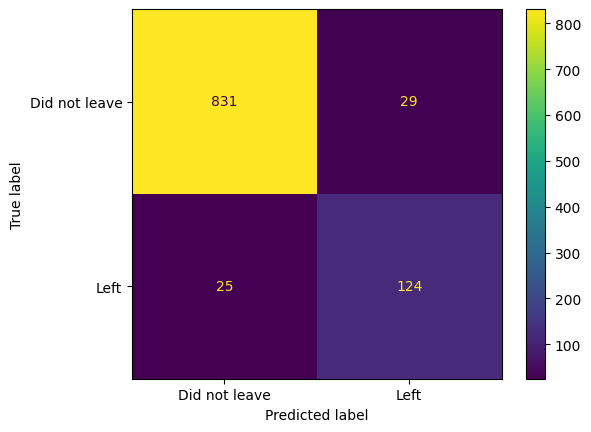

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib as plt

cm = confusion_matrix(y_true=y_test, y_pred=opt.predict(X_test))
disp= ConfusionMatrixDisplay(confusion_matrix=cm, 
                      display_labels=["Did not leave", "Left"])
disp.plot()
#plt.show()

In [ ]:
126/(126+23)

In [ ]:
#Draw the XGBoost Tree and Interpret it
clf_xgb_1 = XGBClassifier(
    objective='binary:logistic',
    colsample_bytree= 0.8495204039669483,
             learning_rate= 0.1794635004290892,
             max_depth= 15,
             n_estimators= 1, #drawing just 1 tree to see and interpret it
             reg_alpha= 8.43275422094576,
             scale_pos_weight= 5,
             subsample= 0.9,
    random_state=8)

clf_xgb_1.fit(X_train, y_train)

#now to print out the weight, gain, cover etc
#for a tree, 
#weight = no. of times a feature is used in a branch or root across all tree
#gain - average gain across all splits that the feature is used in
#cover = the average coverage across all splits a feature is used in
#total gain = total gain across al splits the feature is used in
#since, we're making only 1 tree rn, gain = total_gain and cover = toral_cover

bst = clf_xgb_1.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))

node_params = {'shape':'box', #rectangular nodes
               'style':'filled, rounded',
               'fillcolor':'#78cbe'}
leaf_params = {'shape':'box', #rectangular leaves
               'style':'filled',
               'fillcolor':'#e48038'}

#num_trees is NOT the number of trees to plot,but the specific tree you wanna plot
# default is 0

xgb.to_graphviz(clf_xgb_1, num_trees=0, size="10,10",
                condition_node_params=node_params,
                leaf_node_params=leaf_params)

#to save the figure
# graph_data = xgb.to_graphviz(clf_xgb_1, num_trees=0, size="10,10",
#                 condition_node_params=node_params,
#                 leaf_node_params=leaf_params)
# graph_data.view(filename='xgboost_tree_customer_churn')

In [32]:
from sklearn.metrics import roc_auc_score
print('AUC = %.4f' % roc_auc_score(y_test, opt.predict(X_test)))

AUC = 0.8992


Now load the test set

In [33]:
XTest = pd.read_csv('data/test.csv')
XTest.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,...,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,id
0,F,20.0,23/05/96,55.582251,3.0,CAT 200,WC95,513.0,1075.667903,110.0,...,167.242853,OK,0.116924,0.824189,0.173365,0.009823,0.020349,F,F,K751808
1,F,54.0,01/03/98,32.067010,0.0,Play 300,BS110,13.0,378.078657,93.0,...,136.404621,OK,0.120457,0.415020,0.532898,0.022391,0.124480,F,F,K837351
2,F,28.0,11/10/98,26.621954,0.0,CAT 200,ASAD170,1000.0,2064.343139,90.0,...,397.739114,OK,0.149435,0.960100,0.034434,0.006660,0.225763,F,F,K548114
3,F,26.0,12/08/98,27.652735,5.0,CAT 200,WC95,122.0,999.111887,126.0,...,196.789012,OK,0.137372,0.745483,0.263256,0.005870,0.108872,F,F,K736156
4,F,34.0,28/10/98,25.479355,0.0,CAT 100,WC95,164.0,742.647381,73.0,...,160.450386,OK,0.180704,0.771754,0.166995,0.056390,0.090896,F,F,K508080


In [34]:
XTest_id = XTest.iloc[:,-1]
XTest_id.head()

0    K751808
1    K837351
2    K548114
3    K736156
4    K508080
Name: id, dtype: object

In [36]:
XTest.columns = XTest.columns.str.replace(' ', '_')
XTest.head()

,Gender,Age,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,...,Total_call_cost,Total_Cost,Tariff_OK,average_cost_min,Peak_ratio,OffPeak_ratio,Weekend_ratio,Nat-InterNat_Ratio,high_Dropped_calls,No_Usage
0,F,20.0,55.582251,3.0,CAT 200,WC95,513.0,1075.667903,110.0,189.982227,...,9.195247,167.242853,OK,0.116924,0.824189,0.173365,0.009823,0.020349,F,F
1,F,54.0,32.067010,0.0,Play 300,BS110,13.0,378.078657,93.0,551.817423,...,56.143013,136.404621,OK,0.120457,0.415020,0.532898,0.022391,0.124480,F,F
2,F,28.0,26.621954,0.0,CAT 200,ASAD170,1000.0,2064.343139,90.0,152.731006,...,248.197508,397.739114,OK,0.149435,0.960100,0.034434,0.006660,0.225763,F,F
3,F,26.0,27.652735,5.0,CAT 200,WC95,122.0,999.111887,126.0,358.760706,...,55.896596,196.789012,OK,0.137372,0.745483,0.263256,0.005870,0.108872,F,F
4,F,34.0,25.479355,0.0,CAT 100,WC95,164.0,742.647381,73.0,141.180280,...,62.593087,160.450386,OK,0.180704,0.771754,0.166995,0.056390,0.090896,F,F


In [42]:
XTest.columns

Index(['Gender', 'Age', 'L_O_S', 'Dropped_Calls', 'tariff', 'Handset',
       'Peak_calls_Sum', 'Peak_mins_Sum', 'OffPeak_calls_Sum',
       'OffPeak_mins_Sum', 'Weekend_calls_Sum', 'Weekend_mins_Sum',
       'International_mins_Sum', 'Nat_call_cost_Sum', 'AvePeak', 'AveOffPeak',
       'AveWeekend', 'National_calls', 'National_mins', 'AveNational',
       'All_calls_mins', 'Dropped_calls_ratio', 'Usage_Band', 'Mins_charge',
       'call_cost_per_min', 'actual_call_cost', 'Total_call_cost',
       'Total_Cost', 'Tariff_OK', 'average_cost_min', 'Peak_ratio',
       'OffPeak_ratio', 'Weekend_ratio', 'Nat-InterNat_Ratio',
       'high_Dropped_calls', 'No_Usage'],
      dtype='object')

In [43]:
#XTest.drop(columns=['Connect_Date'], inplace=True)
XTest_encoded = pd.get_dummies(XTest, columns=['Gender',
                                        'tariff',
                                        'Handset',
                                        'Usage_Band',
                                        'Tariff_OK',
                                        'high_Dropped_calls',
                                        'No_Usage'])
X_encoded.head()

,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,...,Usage_Band_MedHigh,Usage_Band_MedLow,Tariff_OK_High CAT 100,Tariff_OK_High CAT 50,Tariff_OK_High Play 100,Tariff_OK_OK,high_Dropped_calls_F,high_Dropped_calls_T,No_Usage_F,No_Usage_T
0,50.0,29.200000,2.0,62.0,153.000000,185.0,438.600001,4.0,29.0,126.002615,...,False,False,False,False,False,True,True,False,True,False
1,25.0,46.533333,1.0,146.0,718.800000,98.0,164.700000,4.0,37.2,251.580636,...,False,False,False,False,False,True,True,False,True,False
2,46.0,38.066667,1.0,160.0,322.800000,7.0,123.900000,0.0,0.0,91.584877,...,False,True,False,False,False,True,True,False,True,False
3,59.0,27.400000,1.0,84.0,317.400001,57.0,161.699999,0.0,0.0,23.998036,...,False,True,False,False,False,True,True,False,True,False
4,25.0,21.433333,1.0,14.0,309.600000,326.0,637.800000,6.0,14.4,87.051515,...,False,False,False,False,False,True,True,False,True,False


In [58]:
predic = opt.predict(XTest_encoded)

In [65]:
predict = pd.DataFrame(predic)

In [73]:
predict.head(15)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [74]:
XTest_id.head(15)

0     K751808
1     K837351
2     K548114
3     K736156
4     K508080
5     K823422
6     K912220
7     K917925
8     K857768
9     K733855
10    K530927
11    K689281
12    K779910
13    K696152
14    K984423
Name: id, dtype: object

In [75]:
XTest_concat = pd.concat([XTest_id, predict], axis=1)

In [77]:
XTest_concat.head(15)

,id,0
0,K751808,0.0
1,K837351,0.0
2,K548114,0.0
3,K736156,0.0
4,K508080,0.0
5,K823422,0.0
6,K912220,0.0
7,K917925,1.0
8,K857768,0.0
9,K733855,0.0


In [103]:
len(XTest)

1682

In [79]:
XTest_concat_full = pd.concat([XTest, XTest_concat], axis=1)

In [84]:
XTest_concat_full.rename(columns={0:'pred'}, inplace=True)


Index(['Gender', 'Age', 'L_O_S', 'Dropped_Calls', 'tariff', 'Handset',
       'Peak_calls_Sum', 'Peak_mins_Sum', 'OffPeak_calls_Sum',
       'OffPeak_mins_Sum', 'Weekend_calls_Sum', 'Weekend_mins_Sum',
       'International_mins_Sum', 'Nat_call_cost_Sum', 'AvePeak', 'AveOffPeak',
       'AveWeekend', 'National_calls', 'National_mins', 'AveNational',
       'All_calls_mins', 'Dropped_calls_ratio', 'Usage_Band', 'Mins_charge',
       'call_cost_per_min', 'actual_call_cost', 'Total_call_cost',
       'Total_Cost', 'Tariff_OK', 'average_cost_min', 'Peak_ratio',
       'OffPeak_ratio', 'Weekend_ratio', 'Nat-InterNat_Ratio',
       'high_Dropped_calls', 'No_Usage', 'id', 'pred'],
      dtype='object')

In [86]:
XTest_concat_full.head(15)

,Gender,Age,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,...,Tariff_OK,average_cost_min,Peak_ratio,OffPeak_ratio,Weekend_ratio,Nat-InterNat_Ratio,high_Dropped_calls,No_Usage,id,pred
0,F,20.0,55.582251,3.0,CAT 200,WC95,513.0,1075.667903,110.0,189.982227,...,OK,0.116924,0.824189,0.173365,0.009823,0.020349,F,F,K751808,0.0
1,F,54.0,32.067010,0.0,Play 300,BS110,13.0,378.078657,93.0,551.817423,...,OK,0.120457,0.415020,0.532898,0.022391,0.124480,F,F,K837351,0.0
2,F,28.0,26.621954,0.0,CAT 200,ASAD170,1000.0,2064.343139,90.0,152.731006,...,OK,0.149435,0.960100,0.034434,0.006660,0.225763,F,F,K548114,0.0
3,F,26.0,27.652735,5.0,CAT 200,WC95,122.0,999.111887,126.0,358.760706,...,OK,0.137372,0.745483,0.263256,0.005870,0.108872,F,F,K736156,0.0
4,F,34.0,25.479355,0.0,CAT 100,WC95,164.0,742.647381,73.0,141.180280,...,OK,0.180704,0.771754,0.166995,0.056390,0.090896,F,F,K508080,0.0
5,M,56.0,10.919178,1.0,CAT 100,S50,436.0,712.455808,3.0,199.154165,...,OK,0.165463,0.792102,0.234195,0.008151,0.140578,F,F,K823422,0.0
6,F,58.0,29.213510,1.0,CAT 200,BS110,323.0,894.221666,28.0,115.963587,...,OK,0.167143,0.881027,0.086642,0.015298,0.071880,F,F,K912220,0.0
7,F,18.0,31.948351,0.0,CAT 200,S50,510.0,1113.167577,200.0,426.733147,...,OK,0.156774,0.699357,0.294767,0.017815,0.150190,F,F,K917925,1.0
8,M,11.0,19.797206,2.0,Play 300,ASAD170,330.0,791.823494,355.0,722.455601,...,OK,0.108974,0.494053,0.489971,0.011771,0.254147,F,F,K857768,0.0
9,F,12.0,51.517270,0.0,CAT 200,ASAD170,464.0,1366.492676,26.0,47.986490,...,OK,0.154209,0.928105,0.083510,0.042641,0.241730,F,F,K733855,0.0


In [87]:

XTest_concat_full_filter = XTest_concat_full.loc[XTest_concat_full['pred']==1.0]

In [88]:
XTest_concat_full_filter.sort_values(by=['average_cost_min'], ascending=False)
XTest_concat_full_filter.head(10)

,Gender,Age,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,...,Tariff_OK,average_cost_min,Peak_ratio,OffPeak_ratio,Weekend_ratio,Nat-InterNat_Ratio,high_Dropped_calls,No_Usage,id,pred
7,F,18.0,31.948351,0.0,CAT 200,S50,510.0,1113.167577,200.0,426.733147,...,OK,0.156774,0.699357,0.294767,0.017815,0.150190,F,F,K917925,1.0
11,M,31.0,24.731620,3.0,Play 100,S50,97.0,192.328490,160.0,278.152773,...,OK,0.131210,0.418507,0.630878,0.015795,0.020075,F,F,K689281,1.0
13,F,25.0,24.224592,4.0,CAT 200,ASAD90,352.0,882.983696,38.0,112.524367,...,OK,0.171211,0.868292,0.115919,0.053857,0.170159,F,F,K696152,1.0
35,M,39.0,39.098513,2.0,CAT 200,CAS30,423.0,880.935558,101.0,228.718803,...,OK,0.126510,0.709347,0.207496,0.054987,0.072847,F,F,K644620,1.0
42,M,23.0,31.748013,1.0,CAT 200,ASAD90,557.0,2378.696149,48.0,264.423917,...,OK,0.136450,0.911325,0.099319,0.018393,0.310057,F,F,K763596,1.0
43,F,28.0,56.059990,14.0,CAT 100,SOP10,251.0,612.114091,110.0,234.942625,...,OK,0.196314,0.691792,0.263374,0.039407,0.290759,T,F,K990929,1.0
44,M,52.0,29.024185,12.0,CAT 200,S50,679.0,1403.160402,123.0,265.970278,...,OK,0.142835,0.803619,0.152540,0.036931,0.136812,T,F,K954837,1.0
56,M,21.0,23.595344,0.0,CAT 200,ASAD90,274.0,1182.760977,79.0,217.278892,...,OK,0.162548,0.864971,0.111318,0.051198,0.312479,F,F,K890217,1.0
63,F,17.0,43.904715,12.0,CAT 100,SOP20,109.0,450.100197,90.0,184.383472,...,OK,0.169578,0.674909,0.218780,0.126912,0.144109,T,F,K937754,1.0
79,F,25.0,23.221958,13.0,CAT 200,S50,75.0,1371.451009,24.0,321.093332,...,OK,0.157574,0.767483,0.189507,0.044981,0.247857,T,F,K834937,1.0


In [90]:
XTest_concat_full_filter_sort=XTest_concat_full_filter.sort_values(by=['average_cost_min'], ascending=False)
XTest_concat_full_filter_sort.head(10)

,Gender,Age,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,...,Tariff_OK,average_cost_min,Peak_ratio,OffPeak_ratio,Weekend_ratio,Nat-InterNat_Ratio,high_Dropped_calls,No_Usage,id,pred
543,M,24.0,50.751697,2.0,CAT 50,CAS30,76.0,-0.083079,13.0,28.552059,...,OK,1.076039,0.576245,0.233435,0.143132,0.260958,F,F,K964330,1.0
1026,F,23.0,10.854344,0.0,CAT 50,CAS30,68.0,53.947128,25.0,18.233967,...,OK,0.866863,0.615830,0.331552,0.071065,0.122084,F,F,K625803,1.0
638,F,14.0,37.890972,0.0,CAT 50,CAS30,68.0,185.819540,29.0,13.416072,...,OK,0.622984,0.655353,0.277413,0.046523,0.307012,F,F,K504622,1.0
164,M,37.0,25.212464,13.0,Play 100,S50,34.0,47.366851,-8.0,-3.347763,...,OK,0.612778,0.473827,0.110825,0.476791,0.055180,T,F,K935230,1.0
1671,M,34.0,12.753348,9.0,Play 100,SOP10,11.0,52.674998,9.0,73.533904,...,OK,0.585446,0.460235,0.509926,-0.004448,0.107415,F,F,K813825,1.0
1114,F,13.0,33.309933,2.0,CAT 50,CAS30,7.0,55.901286,21.0,28.955733,...,OK,0.555762,0.789643,0.190233,0.000528,0.092494,F,F,K975484,1.0
750,F,14.0,43.203153,2.0,CAT 50,CAS30,12.0,69.199769,3.0,11.036566,...,OK,0.529856,0.521041,0.143212,0.336652,0.170404,F,F,K674012,1.0
378,M,39.0,20.304331,1.0,CAT 50,SOP20,2.0,120.053549,-20.0,4.132830,...,OK,0.479408,0.788482,0.069022,0.080500,0.060568,F,F,K562792,1.0
1390,F,35.0,52.097820,9.0,CAT 50,CAS30,31.0,160.382175,16.0,43.488319,...,OK,0.407517,0.589266,0.289073,0.128476,0.157378,F,F,K596680,1.0
615,F,30.0,42.187760,1.0,Play 100,BS110,35.0,-14.127182,48.0,119.018742,...,OK,0.377081,0.296332,0.533736,0.113218,0.144639,F,F,K624702,1.0


In [110]:
XTest_concat_full_filter_sort['average_cost_min'][:].sum()

47.90752

In [97]:
XTest_concat2 = XTest_concat_full.iloc[:, -2:]
XTest_concat2.head(15)

,id,pred
0,K751808,0.0
1,K837351,0.0
2,K548114,0.0
3,K736156,0.0
4,K508080,0.0
5,K823422,0.0
6,K912220,0.0
7,K917925,1.0
8,K857768,0.0
9,K733855,0.0


In [106]:
XTest_concat2 = XTest_concat2.iloc[:-1, :]

In [108]:
XTest_concat2.tail()

,id,pred
1677,K588314,0.0
1678,K826807,0.0
1679,K982731,0.0
1680,K623037,0.0
1681,K883413,0.0


In [109]:
XTest_concat2.to_csv('group8.csv', sep=',', index = False)